In [130]:
import numpy as np
import math
from sympy import *
import scipy.integrate as integral
import matplotlib
import matplotlib.pyplot as plt

plt.rc('font',**{'family':'serif','serif':['Palatino']})
plt.rc('text', usetex=True)
#plt.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]
axislabelfontsize='large'
matplotlib.mathtext.rcParams['legend.fontsize']='medium'

#defining constants
T = 2.7 #K
k = 1.38064852*(10**-23) #boltzmann
h = 6.62607004*(10**-34) #planck
c = 3.e8 #m/s
alpha = -2.1
Ghz = 1.e9 
vc = 140*Ghz #Hz 
delv = 20*Ghz #Hz 
v1 = 120*Ghz #Hz
v2 = 160*Ghz #Hz
v0 = (k*T)/h #where v = v0 * y
y1 = v1/v0
#print(y1)
y2 = v2/v0
#print(y2)
alphalist = np.linspace(-2.18, -1.98, 11)
#a = 1/(integral.quad(lambda y: (y*v0/vc)**alpha, y1, y2)[0]) #const k from notes #moved to later cell
FWHM = 1.4 #arcmin
rad = 0.0002909 #translate arcmin to rad
FWHM_rad = FWHM*rad
sigma = FWHM_rad/(math.sqrt(8*np.log(2))) 
Blist = []
yrange = np.linspace(0, 10, 1000)
#theta_deg = np.linspace(0, 180, 1000) 
#thetalist = theta_deg*(np.pi/180.)
#theta_arc = theta_deg*60

#defining functions

#f = lambda y: (y**3)/(np.exp(y)-1)


#m = lambda y: 2*h*((v0*y)**3)
#n = lambda y: ((c**2)*((np.exp((h*(v0*y))/(k*T))-1)))

#def g(y):
    #return (y**3)/((c**2)((np.exp((h*(v0*y))/(k*T))-1)))
# #(2*h*((v0*y)**3))/((c**2)*((np.exp(h*v0*y/(k*T))-1)))
#fBint = integral.quad((y**3)/(np.exp(y)-1), y1, y2)[0]

fBint = lambda y: (y**3)/(np.exp(y)-1)

def fB(y):
    return ((y**3)/((c**2)*((np.exp((h*(v0*y))/(k*T))-1))))/integral.quad(fBint, y1, y2)[0]

#def falpha(y): 
     #return a*((v0*y)/vc)**alpha

#def delf(y):
     #return falpha(y)-fB(y)

def Bg(theta, y): #gaussian beam
    sigmab = sigma*(vc/(v0*y))
    return (1./np.sqrt((2.*np.pi*(sigmab**2.))))*np.exp((-((theta)**2.))/(2.*(sigmab**2.)))

#def B(theta, y):
     #return Bg(theta, y)*delf(y)

#for i in range(np.size(theta)):
   # integrand = lambda y: B(theta[i], y)
   # Blist.append(integral.quad(integrand, y1, y2)[0])


fB(y1)

1.4722051422125495e-17

Delta beam as a function of theta for cell below (computed as Blist):

\begin{equation}
\delta B = \int_{\nu_{c}-\Delta\nu/2}^{\nu_{c}+\Delta\nu/2} B(\theta,\nu/\nu_{c})\Delta f_{\alpha}(\nu)d\nu 
\end{equation}

with delf, falpha, and fB:
\begin{equation}
\Delta f_{\alpha} = f_{\alpha}(\nu) - f_{BB}(\nu)
\end{equation}

Using Gaussian form of beam from White and Srednicki (defined Bg):
\begin{equation}
B\left(\boldsymbol{n}, \boldsymbol{n}^{\prime}\right)=\frac{1}{2 \pi \sigma^{2}} \exp \left(-\frac{\theta^{2}}{2 \sigma^{2}}\right)
\end{equation}



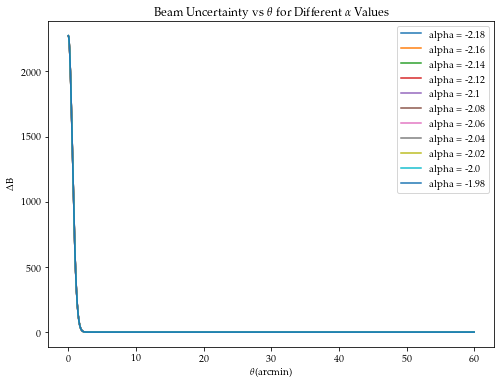

In [306]:
theta_deg = np.linspace(0, 1, 1000)
theta_arc = theta_deg*60
theta_rad = theta_deg*(np.pi/180.)
#loop that for each alpha value, defines new functions and resets Blist, 
for i in range(np.size(alphalist)):  
    alpha = alphalist[i]
    kint = lambda y: (y*v0/vc)**alpha
    a = 1./(integral.quad(kint, y1, y2)[0]) #const k from notes
    def falpha(y): 
        return a*((v0*y)/vc)**alpha

    def delf(y):
        return falpha(y)-fB(y)

    def B(theta, y):
        return Bg(theta, y)*delf(y)
       
    def listfxn(theta):
        integrand = lambda y: B(theta, y)
        return integral.quad(integrand, y1, y2)[0]
    
    #print(listfxn(0.0001)) 
   
    Blist = []
   
    
    #with another internal loop that appends Blist for each theta value, 
    #creating a separate theta dependent Blist for each alpha
    for j in range(np.size(theta_arc)):
        Blist.append(listfxn(theta_rad[j]))
        #print(integral.quad(integrand1, y1, y2)[0], listfxn(theta[j]))
    
    #and then plotting Blist still within the loop of alpha values 
    plt.plot(np.abs(theta_arc), np.abs(Blist), label = 'alpha = '+str(alpha))
    #plt.xlim([0.1, 5])
    #plt.ylim([1.e-12,2.e2])
    #plt.yscale('log')
    #plt.xscale('log')
    
    #print(alphalist[i])
    #print(Blist)
    

plt.title('Beam Uncertainty vs ' + r'$\theta$' + ' for Different ' + r'$\alpha$' + ' Values')
plt.xlabel(r'$\theta$' + '(arcmin)')
plt.ylabel(r'$\Delta$' + 'B')
plt.legend()
plt.savefig('thetaplot.pdf')
plt.show()

/var/folders/2w/zf6pxlvs2y1798_1xxp9wnd00000gn/T/ipykernel_8892/3167117348.py:23: RuntimeWarning: invalid value encountered in true_divide
  r218 = (B218-B21)/B21
/var/folders/2w/zf6pxlvs2y1798_1xxp9wnd00000gn/T/ipykernel_8892/3167117348.py:24: RuntimeWarning: invalid value encountered in true_divide
  r216 = (B216-B21)/B21
/var/folders/2w/zf6pxlvs2y1798_1xxp9wnd00000gn/T/ipykernel_8892/3167117348.py:25: RuntimeWarning: invalid value encountered in true_divide
  r214 = (B214-B21)/B21
/var/folders/2w/zf6pxlvs2y1798_1xxp9wnd00000gn/T/ipykernel_8892/3167117348.py:26: RuntimeWarning: invalid value encountered in true_divide
  r212 = (B212-B21)/B21
/var/folders/2w/zf6pxlvs2y1798_1xxp9wnd00000gn/T/ipykernel_8892/3167117348.py:27: RuntimeWarning: invalid value encountered in true_divide
  r208 = (B208-B21)/B21
/var/folders/2w/zf6pxlvs2y1798_1xxp9wnd00000gn/T/ipykernel_8892/3167117348.py:28: RuntimeWarning: invalid value encountered in true_divide
  r206 = (B206-B21)/B21
/var/folders/2w/zf6pxl

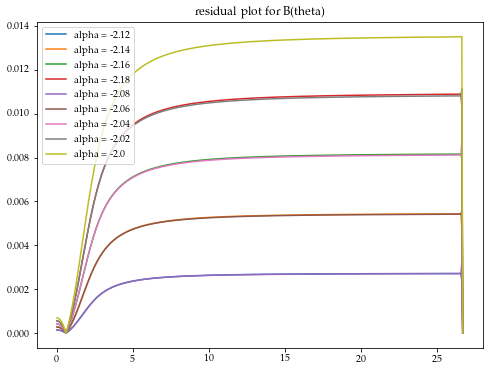

In [24]:
Btheta218 = [2272.3951832624857, 2260.93825284007, 2226.9222691281498, 2171.3929337577715, 2096.032090127499, 2003.0710331025637, 1895.1782561760297, 1775.3296807709005, 1646.6703290532614, 1512.3765133407508, 1375.5269586565591, 1238.9899663855972, 1105.3319426191576, 976.750565413821, 855.0337684187847, 741.543772734349, 637.2237635538582, 542.6235896825928, 457.9401116910985, 383.06753320568754, 317.65316948478625, 261.1545557989236, 212.89447574416204, 172.11129372921795, 138.0028121601957, 109.76266469437383, 86.60894601719822, 67.80533194647788, 52.67534794024568, 40.6107028985366, 31.0747344349799, 23.60203497817448, 17.795271716976828, 13.320103754502801, 9.898960305833782, 7.304293546015518, 5.351773172572951, 3.8937565954282842, 2.8132544969427933, 2.0185185942777184, 1.4383066251535486, 1.0178270901885371, 0.7153304284485941, 0.4992910156899511, 0.3461126133995335, 0.23828588365663703, 0.16292794230357283, 0.11063872143554622, 0.07461566138819865, 0.04997585689566059, 0.03324248051587943, 0.021959605322205016, 0.014406159859003453, 0.009385532771684852, 0.006072267383080989, 0.0039013801844773473, 0.002489173966400877, 0.0015770882928527017, 0.0009922356144109535, 0.0006199062660465711, 0.0003845777403374463, 0.00023691021790087666, 0.0001449171394132388, 8.802113437442622e-05, 5.3086062458117826e-05, 3.1790376117205224e-05, 1.8902873743313208e-05, 1.1160215665172623e-05, 6.542227626788888e-06, 3.8078768621524402e-06, 2.200596095230751e-06, 1.262682410073125e-06, 7.193505168135945e-07, 4.0688908579528053e-07, 2.285057378769789e-07, 1.274090924794191e-07, 7.053143918154211e-08, 3.8765104200644526e-08, 2.1153003042169306e-08, 1.145969483625712e-08, 6.163695740770652e-09, 3.2913473357488032e-09, 1.7448896853461543e-09, 9.183778648921815e-10, 4.798787616236446e-10, 2.489407163286734e-10, 1.2820716363801822e-10, 6.555085203217858e-11, 3.3272994562931434e-11, 1.6766824166025446e-11, 8.387896064290128e-12, 4.165782374632622e-12, 2.053900871288905e-12, 1.0053096599399952e-12, 4.884902211487672e-13, 2.3563823079676953e-13, 1.1284121712461452e-13, 5.3643884291700575e-14, 2.5316372828375083e-14, 1.1860690352448749e-14, 5.5162523392784794e-15, 2.5468446027284562e-15, 1.1673026449443277e-15, 5.311115740139102e-16, 2.3988768117585113e-16, 1.0755947140754707e-16, 4.7874757442184565e-17, 2.115341282299248e-17, 9.27831224221552e-18, 4.039903427837995e-18, 1.746164909013585e-18, 7.492222102222025e-19, 3.1911411504255454e-19, 1.349243290961304e-19, 5.662944778799931e-20, 2.359397654782062e-20, 9.758109635144951e-21, 4.0062216770345835e-21, 1.632706107348113e-21, 6.605167912609406e-22, 2.6525377981587766e-22, 1.057402333133763e-22, 4.184263475102949e-23, 1.643603246512792e-23, 6.4087498012653425e-24, 2.48054536407117e-24, 9.530545303871952e-25, 3.6348312504691137e-25, 1.376087050078141e-25, 5.171326466382205e-26, 1.9290862918643904e-26, 7.143224175750632e-27, 2.625603363600475e-27, 9.57977878841875e-28, 3.4695462508881784e-28, 1.2473262313952039e-28, 4.451198396813327e-29, 1.5767496062335053e-29, 5.544172932025291e-30, 1.9350778874294716e-30, 6.704203323699671e-31, 2.305591490869083e-31, 7.870519963463578e-32, 2.6669188736601205e-32, 8.970175648535551e-33, 2.994858510018194e-33, 9.92511069259385e-34, 3.2649578195750186e-34, 1.0661110516287215e-34, 3.455488633609633e-35, 1.1117269989524322e-35, 3.5503242191216525e-36, 1.1254302433926561e-36, 3.5411912946478874e-37, 1.106012353447921e-37, 3.428861187305849e-38, 1.0551609888182183e-38, 3.2230423650237654e-39, 9.77217743549424e-40, 2.9409950627485808e-40, 8.785661539498468e-41, 2.605142345324226e-41, 7.667695731889584e-42, 2.240135661762471e-42, 6.496200563125042e-43, 1.86990616076393e-43, 5.342630215222973e-44, 1.5151826013537824e-44, 4.265294615861569e-45, 1.1918097854822045e-45, 3.305509196339334e-46, 9.10003298381147e-47, 2.486682890187288e-47, 6.744819992199968e-48, 1.815902467660069e-48, 4.852734792263073e-49, 1.2872181937833792e-49, 3.3891364266407326e-50, 8.857209216043794e-51, 2.2976053343212635e-51, 5.915947950774802e-52, 1.51197064257377e-52, 3.8355901381062854e-53, 9.658074967965012e-54, 2.4138941571339777e-54, 5.988456234663228e-55, 1.4746205377503129e-55, 3.6042437930491607e-56, 8.744123196343129e-57, 2.10565081487465e-57, 5.032967972123805e-58, 1.1940691174751375e-58, 2.811913853167013e-59, 6.572666035964347e-60, 1.52492293798862e-60, 3.5117272367198987e-61, 8.027124087083145e-62, 1.8212320167784076e-62, 4.1014408875041565e-63, 9.167972480711124e-64, 2.0341154427260295e-64, 4.479640213898029e-65, 9.792097015707254e-66, 2.1245801136789906e-66, 4.5754640502944446e-67, 9.780512572307071e-68, 2.0751635086561e-68, 4.370257970690775e-69, 9.135360313962953e-70, 1.895430907883327e-70, 3.903495830366191e-71, 7.979263084213356e-72, 1.6189557285374365e-72, 3.260394172585174e-73, 6.517304557225385e-74, 1.293089320783729e-74, 2.546545643850047e-75, 4.9777911162177595e-76, 9.657928155731157e-77, 1.8599154766843388e-77, 3.5552015058962976e-78, 6.745231362939978e-79, 1.2702550792371874e-79, 2.374358731871876e-80, 4.405172138196842e-81, 8.112233356523337e-82, 1.4827872428603889e-82, 2.690159033029473e-83, 4.84437363668687e-84, 8.658800427449955e-85, 1.536165854711158e-85, 2.7050707340655064e-86, 4.728018284074095e-87, 8.202373411547766e-88, 1.412406343887086e-88, 2.4140117744586224e-89, 4.095232654623042e-90, 6.895680279060105e-91, 1.1524839057248864e-91, 1.9118407332689017e-92, 3.1479477564257442e-93, 5.144724982399928e-94, 8.345560937042638e-95, 1.3437160427796923e-95, 2.1474247528057203e-96, 3.406330422366706e-97, 5.3630746533977767e-98, 8.381061893122446e-99, 1.2999967819575294e-99, 2.0014438892048108e-100, 3.0584568905243074e-101, 4.638942628862084e-102, 6.983823031729529e-103, 1.0435780372303269e-103, 1.5477970349450666e-104, 2.2785594369274137e-105, 3.3293839551282144e-106, 4.828636028884377e-107, 6.950915780778427e-108, 9.931536686346854e-109, 1.408470148214976e-109, 1.9826018932865392e-110, 2.770001249690657e-111, 3.8413236274912324e-112, 5.287351960811865e-113, 7.223569282419374e-114, 9.795388631759047e-115, 1.318401282673883e-115, 1.761284811852647e-116, 2.3354334840197513e-117, 3.073698514295094e-118, 4.015233422161542e-119, 5.206141990689589e-120, 6.700031060616395e-121, 8.558410949970868e-122, 1.0850878154268778e-122, 1.3655008858057547e-123, 1.7055888722612221e-124, 2.1145205496306723e-125, 2.6019837265971328e-126, 3.1779881518322726e-127, 3.8526089222716214e-128, 4.635669409205787e-129, 5.536365972249717e-130, 6.562840553793897e-131, 7.721711479191829e-132, 9.017577205791016e-133, 1.0452512081763014e-133, 1.2025577061266534e-134, 1.3732371416986512e-135, 1.5564653436276804e-136, 1.7510058556407439e-137, 1.9551942127078076e-138, 2.1669370822153322e-139, 2.3837281621766216e-140, 2.6026820362904585e-141, 2.8205863379118408e-142, 3.0339716139371656e-143, 3.2391972606135694e-144, 3.432550891763917e-145, 3.6103575666995487e-146, 3.769094520851108e-147, 3.9055064714783684e-148, 4.016716266436567e-149, 4.1003256413910695e-150, 4.154501164734945e-151, 4.17804107101935e-152, 4.1704195810143503e-153, 4.131806425810589e-154, 4.06306056247155e-155, 3.965698406206683e-156, 3.84183821986926e-157, 3.694123508828509e-158, 3.5256292893391674e-159, 3.3397558682170414e-160, 3.1401152472281817e-161, 2.9304154261892136e-162, 2.7143477271104585e-163, 2.495481822825608e-164, 2.2771724718696327e-165, 2.0624810960742785e-166, 1.8541143567278452e-167, 1.654380860780266e-168, 1.4651661292978232e-169, 1.2879250473701333e-170, 1.1236902372737847e-171, 9.730941897842404e-173, 8.364025714106504e-174, 7.135559018365168e-175, 6.0421675602415124e-176, 5.078197678596566e-177, 4.2362196714946924e-178, 3.50751334608144e-179, 2.8825187389879073e-180, 2.351239408774792e-181, 1.9035900674144408e-182, 1.5296843802020068e-183, 1.2200623298086617e-184, 9.6585948462946e-186, 7.589227731538004e-187, 5.918789407074045e-188, 4.581627948780465e-189, 3.520127077034923e-190, 2.6844073422957868e-191, 2.0318423638561766e-192, 1.5264517629486753e-193, 1.1382236450084945e-194, 8.424100335919097e-196, 6.188292495097663e-197, 4.512003983224946e-198, 3.265272429605321e-199, 2.345420085573075e-200, 1.6721417749483865e-201, 1.1832506703000175e-202, 8.310584967052188e-204, 5.793454085415089e-205, 4.0086178257055583e-206, 2.7529784668458974e-207, 1.8765581276030812e-208, 1.2696155816465977e-209, 8.52576682488977e-211, 5.682580705305731e-212, 3.759314838113024e-213, 2.4684405990838695e-214, 1.6087461806949306e-215, 1.0406464674954895e-216, 6.681434398135074e-218, 4.2578169199509484e-219, 2.693115694562712e-220, 1.690728070009683e-221, 1.0535210379725466e-222, 6.515733789356275e-224, 3.9997614934876057e-225, 2.4369996920669165e-226, 1.4737623026363732e-227, 8.846061948108535e-229, 5.270150854835571e-230, 3.1163528790437266e-231, 1.8290294451868465e-232, 1.065479813239492e-233, 6.1605599749599695e-235, 3.535457036974437e-236, 2.0138231236200565e-237, 1.1385377709610119e-238, 6.388867747424413e-240, 3.558366397596422e-241, 1.9671057934864305e-242, 1.0793319494812494e-243, 5.8780406683077126e-245, 3.1773155940368017e-246, 1.704662126008358e-247, 9.077503735786747e-249, 4.797828312292353e-250, 2.5169413065907853e-251, 1.3105438854562648e-252, 6.7729850997964885e-254, 3.4742312283953093e-255, 1.7688350828277552e-256, 8.938527237613292e-258, 4.483266645504535e-259, 2.2318917411532268e-260, 1.102812324685402e-261, 5.408539473956834e-263, 2.6327418672508457e-264, 1.271997963342077e-265, 6.099783045025267e-267, 2.90330173658075e-268, 1.3715755940882682e-269, 6.43127513120415e-271, 2.99312029593657e-272, 1.3826140725652783e-273, 6.339098041130875e-275, 2.8847197988282194e-276, 1.302955096060562e-277, 5.841237778285605e-279, 2.5991414834251495e-280, 1.1479012560283908e-281, 5.031861651657289e-283, 2.1892853904982615e-284, 9.454217031374084e-286, 4.052268688169982e-287, 1.723932878069521e-288, 7.279338225176037e-290, 3.050793750206085e-291, 1.2690629790161401e-292, 5.2396569616046386e-294, 2.1471968525217114e-295, 8.73353712738269e-297, 3.525800670948739e-298, 1.4127801746258277e-299, 5.618762203429979e-301, 2.21797124480508e-302, 8.690011332844303e-304, 3.379355806429456e-305, 1.304357432484311e-306, 4.996989155655659e-308, 1.90006851943949e-309, 7.1709906634596e-311, 2.68619825822e-312, 9.987250736e-314, 3.685554246e-315, 1.3499216e-316, 4.90766e-318, 1.77e-319, 6.28e-321, 1.93e-322, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Btheta216 = [2272.7079590111975, 2261.2463113657936, 2227.216416184564, 2171.664678362762, 2096.274057250617, 2003.277297625916, 1895.3445769976963, 1775.4536228470488, 1646.7512708268869, 1512.415546359669, 1375.5266943100958, 1238.9542708568613, 1105.2656249007364, 976.6590444189255, 854.9227439831451, 741.4189220400508, 637.0904797808586, 542.4867741570545, 457.80402509859726, 382.93570614027186, 317.52836814837156, 261.0387953257577, 212.78907151421146, 172.01694011752062, 137.9196782968435, 109.69049775691035, 86.54717408419589, 67.75316024949595, 52.631844231862374, 40.57486942423598, 31.045565528927085, 23.578560524698116, 17.77658760655581, 13.30539102892237, 9.887494971899308, 7.295449095609457, 5.345017738789182, 3.8886464574785005, 2.809425370574438, 2.015675849602012, 1.4362152892914044, 1.0163022370652774, 0.7142283427801588, 0.4985013462757086, 0.3455516009859468, 0.23789065649250382, 0.16265181208021653, 0.11044737708958921, 0.0744841419848185, 0.04988618196263265, 0.033181822156314336, 0.021918897580095038, 0.014379054461168784, 0.009367624645703773, 0.006060527035512937, 0.0038937424069088616, 0.0024842430780496996, 0.0015739291404559112, 0.0009902269065073725, 0.0006186386844182196, 0.0003837838530231432, 0.0002364167314358642, 0.0001446126769781551, 8.783469314332357e-05, 5.297274239151666e-05, 3.1722011030125285e-05, 1.8861935424245717e-05, 1.113588250543183e-05, 6.527871274608083e-06, 3.799469291358846e-06, 2.195708659164738e-06, 1.2598622181105657e-06, 7.177351698560585e-07, 4.059706585602388e-07, 2.2798739466795347e-07, 1.2711869992729494e-07, 7.036994741634293e-08, 3.8675955836985724e-08, 2.1104151811565934e-08, 1.1433122015204142e-08, 6.149347436678173e-09, 3.2836566541061407e-09, 1.7407977296503372e-09, 9.162166437656918e-10, 4.787456571754674e-10, 2.4835099977186404e-10, 1.2790250083593478e-10, 6.539460984733157e-11, 3.319345560505569e-11, 1.672662989881196e-11, 8.36773326569835e-12, 4.155742234100202e-12, 2.0489380250633936e-12, 1.0028745217036745e-12, 4.873041304795656e-13, 2.35064757379554e-13, 1.1256597844581204e-13, 5.351275309520988e-14, 2.525435699779461e-14, 1.1831576567907416e-14, 5.50268502508758e-15, 2.5405685328720162e-15, 1.1644207386270347e-15, 5.297979542352124e-16, 2.392933113605929e-16, 1.0729251486399829e-16, 4.775573724718799e-17, 2.1100738797902934e-17, 9.255172015309936e-18, 4.029812444905741e-18, 1.7417967989469467e-18, 7.473452831086697e-19, 3.1831355397383543e-19, 1.3458538018828599e-19, 5.648699655385973e-20, 2.3534548715292728e-20, 9.733500023680333e-21, 3.9961056423062736e-21, 1.6285784270416767e-21, 6.588449636854172e-22, 2.6458162995994612e-22, 1.0547198967021595e-22, 4.1736372017459576e-23, 1.6394247479102963e-23, 6.392440070498403e-24, 2.474226193169155e-24, 9.506242313327903e-25, 3.6255534468260006e-25, 1.3725713160168784e-25, 5.1581021941546204e-26, 1.924148736048045e-26, 7.124924799697833e-27, 2.618871363234097e-27, 9.55519577441888e-28, 3.4606356120123393e-28, 1.2441202215702308e-28, 4.439748469639528e-29, 1.5726905781738812e-29, 5.529889833713591e-30, 1.9300890031034968e-30, 6.686906566886648e-31, 2.299638903684454e-31, 7.8501858004634e-32, 2.6600240065439696e-32, 8.94696944034037e-33, 2.9871056708242052e-33, 9.899401093437305e-34, 3.25649514956227e-34, 1.0633460415511386e-34, 3.4465213091271584e-35, 1.108840273013286e-35, 3.541100111087347e-36, 1.1225046159470413e-36, 3.5319806688344092e-37, 1.1031340644269902e-37, 3.419933181196595e-38, 1.0524121514358178e-38, 3.214641620254867e-39, 9.74669385840244e-40, 2.9333218625962395e-40, 8.762728273416949e-41, 2.5983389104806837e-41, 7.647661938608445e-42, 2.234280074054793e-42, 6.4792122660763285e-43, 1.865013997194835e-43, 5.32864646761487e-44, 1.5112150971980241e-44, 4.254121298488826e-45, 1.1886864578801904e-45, 3.2968431035274424e-46, 9.07616590533946e-47, 2.4801584229566366e-47, 6.727116438254445e-48, 1.811134369132326e-48, 4.8399880533199796e-49, 1.2838358182575828e-49, 3.380227750462845e-50, 8.833919033044527e-51, 2.291561663939381e-51, 5.900381251091882e-52, 1.5079908539995906e-52, 3.825490846683122e-53, 9.632636612430418e-54, 2.4075342003436332e-54, 5.972673360922227e-55, 1.4707329109367155e-55, 3.5947388523442527e-56, 8.721056765407545e-57, 2.100094621784921e-57, 5.019683631798311e-58, 1.1909165224300034e-58, 2.8044877373625287e-59, 6.555303211178926e-60, 1.5208935045133917e-60, 3.502445433688135e-61, 8.005902138044674e-62, 1.8164158384294892e-62, 4.0905920290062903e-63, 9.143715902506375e-64, 2.0287322632911304e-64, 4.467782203504242e-65, 9.7661702542092e-66, 2.11895348803908e-66, 4.563343819194204e-67, 9.754598435727694e-68, 2.069663981103753e-68, 4.3586734877958393e-69, 9.111139407514616e-70, 1.890404399161017e-70, 3.8931419143268344e-71, 7.958093865448777e-72, 1.614659702924128e-72, 3.2517406968688936e-73, 6.50000337294594e-74, 1.2896559360564173e-74, 2.5397827845973787e-75, 4.96456905021218e-76, 9.632269775146088e-77, 1.8549732805982047e-77, 3.5457528209124575e-78, 6.727301238788199e-79, 1.2668778882959718e-79, 2.368044970095451e-80, 4.39345609698458e-81, 8.090654243937206e-82, 1.4788422508167863e-82, 2.6830005926222213e-83, 4.83148074601177e-84, 8.635751980651908e-85, 1.5320761459513917e-85, 2.6978679179193068e-86, 4.715426960470144e-87, 8.180526028149282e-88, 1.4086437586778933e-88, 2.4075799821872868e-89, 4.084319851741768e-90, 6.87730224160298e-91, 1.1494119117385045e-91, 1.9067439063611353e-92, 3.1395543627699097e-93, 5.131005637516331e-94, 8.323302886683704e-95, 1.3401317892156622e-95, 2.141695894472408e-96, 3.397241862189365e-97, 5.3487633353064864e-98, 8.35869417799391e-99, 1.2965268500653167e-99, 1.996100983408332e-100, 3.0502912318377494e-101, 4.626555747713569e-102, 6.965172566805426e-103, 1.0407907982778237e-103, 1.5436626063433355e-104, 2.2724722946967054e-105, 3.3204885041826396e-106, 4.815733377500019e-107, 6.932340031479778e-108, 9.90499246362298e-109, 1.40470527904407e-109, 1.9773017710944402e-110, 2.762595348643367e-111, 3.8310523166767953e-112, 5.273212602636594e-113, 7.204250075464605e-114, 9.769188433102501e-115, 1.3148745261219947e-115, 1.7565728484797783e-116, 2.3291848688937362e-117, 3.0654737963854505e-118, 4.004488246145605e-119, 5.192208457219423e-120, 6.682097599002524e-121, 8.535501110581851e-122, 1.0821828903176588e-122, 1.3618449148205108e-123, 1.7010219315860507e-124, 2.1088581208028158e-125, 2.5950152984485886e-126, 3.1694763499121444e-127, 3.8422893254130765e-128, 4.6232512156274766e-129, 5.521533671585064e-130, 6.545256745195652e-131, 7.701020948057333e-132, 8.993412332191607e-133, 1.0424499602598845e-133, 1.1993346146657205e-134, 1.369556295156263e-135, 1.5522930320934571e-136, 1.7463116769682487e-137, 1.949952221224332e-138, 2.1611269401544183e-139, 2.3773362488880637e-140, 2.595702467041207e-141, 2.813021843122503e-142, 3.0258342313081114e-143, 3.2305087969391225e-144, 3.4233431182944546e-145, 3.6006721214810856e-146, 3.758982503151865e-147, 3.895027726629959e-148, 4.005938373459965e-149, 4.089322629834701e-150, 4.1433520003746224e-151, 4.1668279616306134e-152, 4.159226162585664e-153, 4.120715895723289e-154, 4.052153828922598e-155, 3.955052322310158e-156, 3.831523966498099e-157, 3.68420518263885e-158, 3.516162742056493e-159, 3.3307878308272606e-160, 3.131682758996536e-161, 2.9225455742711326e-162, 2.707057688759766e-163, 2.4887791896188776e-164, 2.2710558246040844e-165, 2.0569407905547803e-166, 1.849133474847686e-167, 1.6499362782394327e-168, 1.461229650925664e-169, 1.2844645630961604e-170, 1.1206708559578551e-171, 9.704793139183175e-173, 8.34154882629483e-174, 7.116382347039629e-175, 6.025928452020374e-176, 5.064548610808358e-177, 4.2248330304963066e-178, 3.498084901583196e-179, 2.8747699075624407e-180, 2.3449184336444008e-181, 1.8984722638053473e-182, 1.525571606832757e-183, 1.21678184877205e-184, 9.632623657005693e-186, 7.568819862436572e-187, 5.902872636271476e-188, 4.5693064451442435e-189, 3.510659826602777e-190, 2.6771873722579506e-191, 2.026377261949397e-192, 1.5223458244577948e-193, 1.1351618374896566e-194, 8.401438527199983e-196, 6.17164448007782e-197, 4.499865022081482e-198, 3.256487228166894e-199, 2.339109450955467e-200, 1.6676424700517995e-201, 1.180066701090766e-202, 8.288221284975006e-204, 5.777863273034778e-205, 3.997829721421047e-206, 2.7455692474997873e-207, 1.8715074381750308e-208, 1.2661983081117403e-209, 8.502818041830812e-211, 5.667284264601296e-212, 3.749195038888706e-213, 2.4617954587224667e-214, 1.6044151910294706e-215, 1.0378447726246774e-216, 6.663445473821944e-218, 4.246352813788832e-219, 2.685864228440761e-220, 1.6861754433438145e-221, 1.0506841066681497e-222, 6.498187465466885e-224, 3.988990048225239e-225, 2.4304365424418656e-226, 1.4697931198789547e-227, 8.822236541226968e-229, 5.255956032192814e-230, 3.107958858941071e-231, 1.8241026965543636e-232, 1.0626096860322806e-233, 6.143964403817407e-235, 3.5259327262790186e-236, 2.0083978059308177e-237, 1.1354703947893516e-238, 6.371654646041913e-240, 3.548778985122332e-241, 1.9618055737780418e-242, 1.076423667685974e-243, 5.8622016148194195e-245, 3.168753656178722e-246, 1.7000684009354806e-247, 9.053040833107164e-249, 4.784898238249674e-250, 2.510157959342556e-251, 1.3070117522107843e-252, 6.754730173861691e-254, 3.464866978014078e-255, 1.7640673064008938e-256, 8.914433252003397e-258, 4.471181516564416e-259, 2.2258752430426365e-260, 1.0998393849021192e-261, 5.393958778140446e-263, 2.6256441258344235e-264, 1.2685686129586792e-265, 6.083337310032199e-267, 2.8954738516438693e-268, 1.367877437690969e-269, 6.413934065397144e-271, 2.985049507782682e-272, 1.3788858164802332e-273, 6.322003985002752e-275, 2.876940613905388e-276, 1.2994413317976614e-277, 5.825484872327418e-279, 2.592131802518282e-280, 1.144805367588786e-281, 5.018290340172138e-283, 2.183380555416471e-284, 9.428716857544055e-286, 4.04133849343413e-287, 1.7192827809421398e-288, 7.259702565763596e-290, 3.0425641587850426e-291, 1.2656395577010084e-292, 5.2255220956398893e-294, 2.1414042693009396e-295, 8.709975673403091e-297, 3.516288468483899e-298, 1.4089685576598974e-299, 5.603602644721859e-301, 2.2119869499525167e-302, 8.66656426724959e-304, 3.370237523202762e-305, 1.3008378860788608e-306, 4.983505448064979e-308, 1.89494131137827e-309, 7.1516397479855e-311, 2.678949376353e-312, 9.960298833e-314, 3.675608057e-315, 1.34627844e-316, 4.89441e-318, 1.7652e-319, 6.265e-321, 1.93e-322, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Btheta214 = [2273.0208119084446, 2261.5544453592056, 2227.5106337775414, 2171.9364856473085, 2096.516076779338, 2003.4836025135187, 1895.510925110318, 1775.5775788705935, 1646.832213663287, 1512.4545686603099, 1375.5264090869648, 1238.918546282412, 1105.1992721596794, 976.5674846588615, 854.8116791722592, 741.2940312728914, 636.9571578440919, 542.3499236266429, 457.66790753527556, 382.8038526502836, 317.4035451179474, 260.9230177970466, 212.68365455933818, 171.92257765121536, 137.83653889682427, 109.61832800972408, 86.48540148270855, 67.70098947806041, 52.588342556881415, 40.53903867882587, 31.016399713232428, 23.55508926549428, 17.75790660680529, 13.29068120368609, 9.876032251472779, 7.286606934834159, 5.338264263109241, 3.8835379589679255, 2.8055975909453053, 2.0128341921606725, 1.4341248171747314, 1.0147780599213023, 0.7131267787226762, 0.4977120740022892, 0.34499088710892684, 0.23749565101434203, 0.16237584454965143, 0.11025615079320132, 0.07435270730070505, 0.04979656718295163, 0.03312120606560193, 0.021878219239831836, 0.014351969313174133, 0.009349730331548584, 0.006048796019290545, 0.003886110874949396, 0.00247931633169386, 0.0015707727101943877, 0.0009882199716935156, 0.000617372247573596, 0.0003829906984226321, 0.00023592370992057602, 0.00014430850707770565, 8.764843442109218e-05, 5.2859535241787134e-05, 3.165371522688796e-05, 1.88210392681317e-05, 1.1111574795319513e-05, 6.513530159678621e-06, 3.7910707701390045e-06, 2.190826554799542e-06, 1.2570451424380313e-06, 7.161216299115895e-07, 4.050532708901168e-07, 2.274696448256961e-07, 1.26828643413946e-07, 7.020864447741699e-08, 3.858691275521633e-08, 2.1055358827975368e-08, 1.1406581170739384e-08, 6.135016552182408e-09, 3.275975389189629e-09, 1.7367108255133873e-09, 9.140581118307031e-10, 4.776139734049854e-10, 2.4776202803813126e-10, 1.275982255592624e-10, 6.523856776019127e-11, 3.3114019184954835e-11, 1.6686487778698145e-11, 8.347596787067434e-12, 4.145715277748582e-12, 2.0439817333087046e-12, 1.0004426174834651e-12, 4.861196234998452e-13, 2.3449205366718323e-13, 1.1229111105214685e-13, 5.338179965407484e-14, 2.5192425631295333e-14, 1.1802502617736089e-14, 5.489136356760106e-15, 2.5343011256041286e-15, 1.1615428267448588e-15, 5.284861625873721e-16, 2.3869977197914513e-16, 1.0702593273274661e-16, 4.763688460199531e-17, 2.1048139192491434e-17, 9.232064596642558e-18, 4.0197358178734946e-18, 1.737434923807516e-18, 7.454710437321977e-19, 3.175141429042561e-19, 1.3424691966783417e-19, 5.634475118748836e-20, 2.3475207015846435e-20, 9.708926181480383e-21, 3.986004351365662e-21, 1.6244567788242337e-21, 6.571755856613605e-22, 2.639104674424766e-22, 1.0520414103575737e-22, 4.1630266142664427e-23, 1.6352524319329305e-23, 6.376154527695469e-24, 2.467916414921622e-24, 9.481975525430157e-25, 3.6162894933656176e-25, 1.3690608413308473e-25, 5.1448977452523253e-26, 1.9192185964544055e-26, 7.106652962958554e-27, 2.6121495133743025e-27, 9.5306498957016e-28, 3.451738458116011e-28, 1.240919072217944e-28, 4.428315931340609e-29, 1.5686377250053936e-29, 5.5156285000700044e-30, 1.9251077332491897e-30, 6.669636251966004e-31, 2.2936954305278997e-31, 7.829882818696605e-32, 2.653139728095906e-32, 8.923798922799265e-33, 2.9793647724132272e-33, 9.873731147296808e-34, 3.248045549825276e-34, 1.0605853076769879e-34, 3.437567871279655e-35, 1.1059580231836244e-35, 3.5318903239216563e-36, 1.1195835363181262e-36, 3.522784378143959e-37, 1.1002602604295437e-37, 3.4110191032163916e-38, 1.0496676072971181e-38, 3.206254010874722e-39, 9.721250171387899e-40, 2.925660686508125e-40, 8.739830982444124e-41, 2.591546159228348e-41, 7.627659637066375e-42, 2.2284337001766777e-42, 6.462250726664928e-43, 1.860129546554453e-43, 5.314684787588533e-44, 1.5072538599593413e-44, 4.242965646245816e-45, 1.1855680727396724e-45, 3.2881907363755933e-46, 9.052336661242086e-47, 2.4736443072229037e-47, 6.709440995738133e-48, 1.8063738481013847e-48, 4.827261588008853e-49, 1.2804588266717645e-49, 3.371333265893011e-50, 8.810665980104881e-51, 2.2855276358925093e-51, 5.8848394056902445e-52, 1.5040174243330272e-52, 3.815407703530854e-53, 9.607238960384332e-54, 2.4011844271038327e-54, 5.956915776008477e-55, 1.4668515174502798e-55, 3.5852491617434953e-56, 8.698027367331111e-57, 2.0945473548232507e-57, 5.006420646508895e-58, 1.187768998444564e-58, 2.7970735740440555e-59, 6.537968349071661e-60, 1.5168705642590082e-60, 3.4931785965400685e-61, 7.98471442675737e-62, 1.8116074345124455e-62, 4.0797606928665327e-63, 9.119498523464545e-64, 2.0233577879042625e-64, 4.45594337652465e-65, 9.740285458033378e-66, 2.1133359744293315e-66, 4.5512432261981015e-67, 9.728726308278396e-68, 2.0641733731936125e-68, 4.347107802859663e-69, 9.086957822863708e-70, 1.885386054670742e-70, 3.882804823343714e-71, 7.936959062400751e-72, 1.6103706647190108e-72, 3.2431013021792577e-73, 6.482730353768864e-74, 1.2862281430702409e-74, 2.5330309443246973e-75, 4.951368536537486e-76, 9.606653235894485e-77, 1.850039147112014e-77, 3.5363195565876276e-78, 6.709400389096271e-79, 1.263506213464368e-79, 2.3617415248772053e-80, 4.381759206912301e-81, 8.069110418144308e-82, 1.4749037121559732e-82, 2.675853866620164e-83, 4.81860896156097e-84, 8.612741278752102e-85, 1.5279931370139073e-85, 2.6906769056734212e-86, 4.702856278540573e-87, 8.158714472651782e-88, 1.404887345878824e-88, 2.4011587445958397e-89, 4.073424962843378e-90, 6.858954382528258e-91, 1.1463449638583661e-91, 1.901655454232668e-92, 3.131174764911784e-93, 5.117308849389119e-94, 8.301081443210606e-95, 1.3365534322988381e-95, 2.135976463793415e-96, 3.3881682629292914e-97, 5.334475582287743e-98, 8.336363304191268e-99, 1.2930626350330991e-99, 1.9907668827387536e-100, 3.042139033904491e-101, 4.6141892914076295e-102, 6.946552863104759e-103, 1.0380081576957145e-103, 1.539535000495138e-104, 2.266395200260168e-105, 3.3116077403697796e-106, 4.802852034890462e-107, 6.913794967810876e-108, 9.878492100697568e-109, 1.4009466322052262e-109, 1.972010410728422e-110, 2.7552016935013716e-111, 3.820797993849385e-112, 5.259096635399105e-113, 7.184962835957979e-114, 9.743031597799491e-115, 1.3113536079485741e-115, 1.75186868728849e-116, 2.3229466026685315e-117, 3.0572627031678136e-118, 3.9937608739579813e-119, 5.178298015362456e-120, 6.664193864263917e-121, 8.512629254982841e-122, 1.0792827824821122e-122, 1.358195007822386e-123, 1.6964625674189136e-124, 2.1032050877738892e-125, 2.5880584354718693e-126, 3.1609786774061925e-127, 3.8319868622031187e-128, 4.610853643970725e-129, 5.506726006451271e-130, 6.527702147715643e-131, 7.680364795495967e-132, 8.969287617404911e-133, 1.0396533684957841e-133, 1.1961168815012278e-134, 1.365881569009332e-135, 1.5481276593751846e-136, 1.741625306377221e-137, 1.944718950541037e-138, 2.1553264657523276e-139, 2.3709549730909634e-140, 2.588734515220542e-141, 2.805469941461433e-142, 3.017710397765728e-143, 3.2218348022855827e-144, 3.4141506811374506e-145, 3.591002810757912e-146, 3.748887333221873e-147, 3.884566443298283e-148, 3.995178443282513e-149, 4.078337959088157e-150, 4.132221423275422e-151, 4.15563354892837e-152, 4.148051410799036e-153, 4.109643863433354e-154, 4.041265289284214e-155, 3.9444240001029804e-156, 3.821226923671719e-157, 3.674303408699916e-158, 3.506711995299768e-159, 3.3218347639971875e-160, 3.1232643492685387e-161, 2.914688863306679e-162, 2.6997798248535196e-163, 2.4820877513907165e-164, 2.2649493949453406e-165, 2.0514097411104275e-166, 1.8441609155150744e-167, 1.6454991231084225e-168, 1.457299751708865e-169, 1.2810098631714837e-170, 1.1176565223061395e-171, 9.678688100301488e-173, 8.319109523689178e-174, 7.097237746337048e-175, 6.009716505020325e-176, 5.050922374948046e-177, 4.213465439158518e-178, 3.4886722325885095e-179, 2.867034042868417e-180, 2.3386080371351768e-181, 1.893363026211519e-182, 1.5214657180810811e-183, 1.2135068597535901e-184, 9.606695952292884e-186, 7.548446166847673e-187, 5.886982521474506e-188, 4.557005578745533e-189, 3.5012084345595424e-190, 2.6699794975452277e-191, 2.020921316489473e-192, 1.5182467659494064e-193, 1.1321051609302315e-194, 8.378814698981847e-196, 6.155024369518696e-197, 4.487746409671593e-198, 3.2477167550045616e-199, 2.3328093971060493e-200, 1.6631507097028897e-201, 1.1768880713731778e-202, 8.265895110326262e-204, 5.762298611474431e-205, 3.987059714026718e-206, 2.738172458212511e-207, 1.8664652228352797e-208, 1.2627867686513406e-209, 8.479907769717969e-211, 5.652013495650762e-212, 3.739092225126282e-213, 2.4551614728486737e-214, 1.6000914719984425e-215, 1.0350477815163914e-216, 6.64548675381323e-218, 4.234907958154365e-219, 2.6786249400606237e-220, 1.681630462799329e-221, 1.0478519403965413e-222, 6.480670615697993e-224, 3.978236698273789e-225, 2.423884419412631e-226, 1.4658306062187866e-227, 8.79845116962003e-229, 5.241785063962178e-230, 3.099578946165861e-231, 1.8191842286948246e-232, 1.0597443832670228e-233, 6.127396730692968e-235, 3.5164244277337787e-236, 2.0029816099455143e-237, 1.1324081762726278e-238, 6.354470489993478e-240, 3.539207695980375e-241, 1.956514268240725e-242, 1.0735202775594158e-243, 5.846389204323351e-245, 3.160206121515146e-246, 1.695482404171976e-247, 9.02861908897106e-249, 4.771989920520085e-250, 2.5033860266861406e-251, 1.303485563053348e-252, 6.736505970658219e-254, 3.4555184886460456e-255, 1.7593075552161173e-256, 8.89037982488836e-258, 4.459116732506294e-259, 2.21986887420227e-260, 1.0968714506567434e-261, 5.3794026335366215e-263, 2.6185583365315777e-264, 1.2651450377619777e-265, 6.066919272303473e-267, 2.8876591510117316e-268, 1.364185510419121e-269, 6.39662221058769e-271, 2.9769923157536425e-272, 1.3751638414606874e-273, 6.304938729432605e-275, 2.8691745364220117e-276, 1.2959334883863588e-277, 5.809758512414237e-279, 2.585133934736143e-280, 1.1417146968484326e-281, 5.004741902710514e-283, 2.1774856733650512e-284, 9.403259668752236e-286, 4.0304267245895506e-287, 1.7146405233238304e-288, 7.240100011716327e-290, 3.034348443131929e-291, 1.2622219088970006e-292, 5.211411065029405e-294, 2.1356214545716463e-295, 8.686453955266093e-297, 3.506792309047785e-298, 1.4051633696326107e-299, 5.588468656628034e-301, 2.2060127497665058e-302, 8.643156755772915e-304, 3.36113462295051e-305, 1.2973242776405811e-306, 4.970044490615731e-308, 1.88982275457415e-309, 7.132321485514e-311, 2.671712726997e-312, 9.933392414e-314, 3.66567865e-315, 1.3426415e-316, 4.88119e-318, 1.76045e-319, 6.245e-321, 1.93e-322, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Btheta212 = [2273.3337409464607, 2261.8626538274866, 2227.804920958352, 2172.2083547337356, 2096.75814793054, 2003.689947095784, 1895.6772999715733, 1775.7015484345497, 1646.9131572931801, 1512.4935801080426, 1375.5261029792837, 1238.8827927691718, 1105.132884602686, 976.4758864230281, 854.7005743401265, 741.1691008333181, 636.8237981730846, 542.2130385340602, 457.53175944307606, 382.6719731652493, 317.2787008013868, 260.8072235921796, 212.57822522588205, 171.82820664106083, 137.75339423452107, 109.54615569144264, 86.42362841731297, 67.64881980517414, 52.54484305970039, 40.50321078131797, 30.987237084797517, 23.531621278537106, 17.739228779754644, 13.275974327592445, 9.864572182529377, 7.277767092930446, 5.331512767816377, 3.878431116706325, 2.801771170610702, 2.0099936312403126, 1.432035215606964, 1.0132545636941597, 0.7120257398265133, 0.4969232013994384, 0.3444304735548815, 0.23710086847252412, 0.16210004057944807, 0.11006504314317729, 0.07422135774290589, 0.04970701283191829, 0.03306063242839306, 0.021837570424248057, 0.014324904496065076, 0.0093318498822625, 0.0060370743688524, 0.0038784856107810855, 0.0024743937415085807, 0.0015676190110558332, 0.000986214815623723, 0.0006161069590425007, 0.0003821982787225275, 0.00023543115469921695, 0.00014400463053195148, 8.746235870424313e-05, 5.2746441307280215e-05, 3.158548888542532e-05, 1.8780185380293564e-05, 1.1087292596713833e-05, 6.4992043180844434e-06, 3.782681319379094e-06, 2.1859497941351446e-06, 1.254231189899144e-06, 7.145099008543868e-07, 4.041369249619953e-07, 2.2695248956462682e-07, 1.2653892361183832e-07, 7.004753073440788e-08, 3.849797515703896e-08, 2.1006624200657013e-08, 1.1380072361615635e-08, 6.120703118646782e-09, 3.2683035576198483e-09, 1.73262898167908e-09, 9.119022736537211e-10, 4.764837126797686e-10, 2.4717380234606393e-10, 1.2729433843065736e-10, 6.508272608660518e-11, 3.303468546168322e-11, 1.664639788519976e-11, 8.327486667861411e-12, 4.135701525021977e-12, 2.0390320055357192e-12, 9.980139518977795e-13, 4.849367024360219e-13, 2.3392012072517795e-13, 1.120166154498618e-13, 5.3251024207075425e-14, 2.5130578840686674e-14, 1.1773468553910447e-14, 5.475606358282338e-15, 2.528042391913992e-15, 1.1586689142959526e-15, 5.271762013271871e-16, 2.381070640431224e-16, 1.0675972546396166e-16, 4.751819970547925e-17, 2.0995614093977143e-17, 9.208990024187299e-18, 4.00967356315452e-18, 1.7330792906380048e-18, 7.435994950927765e-19, 3.167158831024426e-19, 1.3390894806735002e-19, 5.620271191083791e-20, 2.3415951541309032e-20, 9.684388146260096e-21, 3.975917819590275e-21, 1.6203411689200537e-21, 6.555086596897998e-22, 2.632402932611158e-22, 1.0493668780505947e-22, 4.152431728194461e-23, 1.631086304641209e-23, 6.359893196335043e-24, 2.4616160383578865e-24, 9.457744974650384e-25, 3.6070394031524237e-25, 1.365555630935257e-25, 5.131713138032788e-26, 1.9142958798896484e-26, 7.088408690583064e-27, 2.6054378231735805e-27, 9.506141185462742e-28, 3.4428548011512853e-28, 1.2377227876102322e-28, 4.416900797073485e-29, 1.5645910520664935e-29, 5.5013889497597584e-30, 1.9201340843448884e-30, 6.652392401258321e-31, 2.287761079033531e-31, 7.809611044082383e-32, 2.6462660470515475e-32, 8.900664125138597e-33, 2.9716358244917844e-33, 9.848100886173089e-34, 3.2396090308368268e-34, 1.0578288534085581e-34, 3.4286283310390893e-35, 1.1030802529758355e-35, 3.52269486878612e-36, 1.116667008026772e-36, 3.513602433601467e-37, 1.097390944882507e-37, 3.402118963939116e-38, 1.0469273596407732e-38, 3.1978795467301176e-39, 9.69584640416888e-40, 2.918011543387544e-40, 8.716969693057466e-41, 2.584764099383484e-41, 7.607688850167758e-42, 2.22259654679058e-42, 6.445315964128185e-43, 1.855252814356582e-43, 5.300745190831362e-44, 1.503298894068154e-44, 4.231827671552832e-45, 1.1824546335169527e-45, 3.279552104431155e-46, 9.028545277697986e-47, 2.4671405501113645e-47, 6.691793683901728e-48, 1.8016209097299984e-48, 4.814555410073466e-49, 1.2770872226577027e-49, 3.362452982457466e-50, 8.787450082028249e-51, 2.2795032565910958e-51, 5.869322431015602e-52, 1.50005035776205e-52, 3.8053407192356948e-53, 9.581882038388905e-54, 2.3948448440302023e-54, 5.941183496277469e-55, 1.462976361304664e-55, 3.5757747310237777e-56, 8.675035025753677e-57, 2.089009019663409e-57, 4.993179029772585e-58, 1.1846265487153048e-58, 2.7896713707147873e-59, 6.520661467124947e-60, 1.5128541212687748e-60, 3.483926734557935e-61, 7.963560974373108e-62, 1.806806809811649e-62, 4.068946889826765e-63, 9.09532036752511e-64, 2.0179920218611812e-64, 4.444123744587631e-65, 9.714442652524558e-66, 2.107727578332959e-66, 4.539162283081095e-67, 9.70289621505839e-68, 2.058691690236205e-68, 4.3355609270352304e-69, 9.0628155832601e-70, 1.8803758792233945e-70, 3.872484567297938e-71, 7.915858695213987e-72, 1.606088617998615e-72, 3.23447599670458e-73, 6.4654855160198865e-74, 1.2828059450561042e-74, 2.526290129378715e-75, 4.938189587568724e-76, 9.581078561927014e-77, 1.845113080826858e-77, 3.526901721695374e-78, 6.691528830470142e-79, 1.2601400578621458e-79, 2.355448402034862e-80, 4.370081478748481e-81, 8.047601898929216e-82, 1.4709716304859757e-82, 2.668718861554348e-83, 4.805758295069005e-84, 8.589768342678126e-85, 1.5239168316033076e-85, 2.68349770383714e-86, 4.690306249637959e-87, 8.136938764708058e-88, 1.4011371088668112e-88, 2.394748067443841e-89, 4.062547997678314e-90, 6.840636718220204e-91, 1.1432830648172053e-91, 1.89657538140763e-92, 3.1228089702856713e-93, 5.103634630144141e-94, 8.278896626254744e-95, 1.33298097518391e-95, 2.130266465800598e-96, 3.3791096325529664e-97, 5.320211406860565e-98, 8.314069291241725e-99, 1.289604139884137e-99, 1.985441591842041e-100, 3.034000303811197e-101, 4.6018432706735924e-102, 6.927963936751358e-103, 1.035230117889073e-103, 1.5354142209613185e-104, 2.260328158850693e-105, 3.3027416713226207e-106, 4.789992012106952e-107, 6.895280605653215e-108, 9.85203562022413e-109, 1.3971942109057666e-109, 1.9667278166957488e-110, 2.747820290551714e-111, 3.8105606677134788e-112, 5.245004071061341e-113, 7.16570758021585e-114, 9.716918147940593e-115, 1.3078385311222296e-115, 1.74717233223847e-116, 2.3167186905865467e-117, 3.049065241531282e-118, 3.983051314584452e-119, 5.164410676752186e-120, 6.646319871350067e-121, 8.489795402241762e-122, 1.0763874943342609e-122, 1.3545511678448553e-123, 1.691910783543365e-124, 2.0975614552279243e-125, 2.5811131434227084e-126, 3.1524951413344865e-127, 3.8217015411402523e-128, 4.598476704447362e-129, 5.491942989027697e-130, 6.510176775771881e-131, 7.659743038448979e-132, 8.945203081189028e-133, 1.0368614351712018e-133, 1.1929045092611606e-134, 1.3622129662549528e-135, 1.5439692288654961e-136, 1.7369467476794818e-137, 1.9394944049088806e-138, 2.149535663714491e-139, 2.364584339955086e-140, 2.5817781864661463e-141, 2.7979306390308626e-142, 3.009600119865953e-143, 3.2131752836439483e-144, 3.404973587692389e-145, 3.581349642303619e-146, 3.738809019167005e-147, 3.874122629872824e-148, 3.9844364845226455e-149, 4.06737163793921e-150, 4.12110944233113e-151, 4.144457841846738e-152, 4.1368953345623405e-153, 4.0985903377564156e-154, 4.030394952215827e-155, 3.9338134480278666e-156, 3.81094709956031e-157, 3.664418194859341e-158, 3.497277056550713e-159, 3.31289667480662e-160, 3.114860024693806e-161, 2.9068452994949503e-162, 2.6925141411278205e-163, 2.47540751340931e-164, 2.2588531876958342e-165, 2.045887952086497e-166, 1.839196682632391e-167, 1.6410693988657775e-168, 1.4533764347250883e-169, 1.2775609502988154e-170, 1.114647238674415e-171, 9.652626801578285e-173, 8.296707823790814e-174, 7.078125231174027e-175, 5.993531731860384e-176, 5.037318981611495e-177, 4.202116906312173e-178, 3.47927534640243e-179, 2.8593111509037314e-180, 2.3323082241351e-181, 1.8882623585867545e-182, 1.517366717121326e-183, 1.210237365282865e-184, 9.580811752163912e-186, 7.528106660478596e-187, 5.871119074922508e-188, 4.54472535905044e-189, 3.4917729081719275e-190, 2.6627837236944135e-191, 2.015474531663695e-192, 1.5141545905666375e-193, 1.1290536176719915e-194, 8.356228868582035e-196, 6.138432176131066e-197, 4.475648155255396e-198, 3.2389610168143108e-199, 2.3265199288306336e-200, 1.6586664973251707e-201, 1.1737147835678979e-202, 8.243606460094013e-204, 5.74676011256745e-205, 3.976307811704003e-206, 2.7307881045984518e-207, 1.861431485407919e-208, 1.2593809658506785e-209, 8.45703602589887e-211, 5.636768410007965e-212, 3.729006404463489e-213, 2.4485386464738602e-214, 1.5957750268654813e-215, 1.0322554962802274e-216, 6.627558251643677e-218, 4.2234823616664846e-219, 2.671397834869959e-220, 1.6770931317938113e-221, 1.0450245412857668e-222, 6.463183253201713e-224, 3.967501451701192e-225, 2.4173433278914835e-226, 1.4618747646244898e-227, 8.774705851094253e-229, 5.227637960744899e-230, 3.0912131469825925e-231, 1.8142740452824746e-232, 1.056883907082678e-233, 6.110856967945813e-235, 3.506932148426787e-236, 1.997574539698919e-237, 1.1293511176904594e-238, 6.337315292062832e-240, 3.5296525372860413e-241, 1.9512318808054903e-242, 1.070621781257114e-243, 5.830603448551156e-245, 3.151672996383529e-246, 1.6909041391158325e-247, 9.004238521461873e-249, 4.759103368655536e-250, 2.49662551362943e-251, 1.2999653205899273e-252, 6.718312503645788e-254, 3.4461857671912846e-255, 1.7545558327843668e-256, 8.866366973999655e-258, 4.447072302218446e-259, 2.2138726390543644e-260, 1.0939085241331006e-261, 5.3648710508493466e-263, 2.6114845045497506e-264, 1.2617272402664908e-265, 6.050528943890467e-267, 2.879857640417177e-268, 1.360499814979513e-269, 6.37933957946078e-271, 2.9689487257497924e-272, 1.3714481502306935e-273, 6.287902286903027e-275, 2.861421572055439e-276, 1.292431568389588e-277, 5.794058710029728e-279, 2.5781478851858344e-280, 1.138629246061671e-281, 4.99121634914921e-283, 2.1716007486389992e-284, 9.377845483536544e-286, 4.0195333895778745e-287, 1.7100061085914296e-288, 7.220530577285732e-290, 3.0261466092165842e-291, 1.2588100350861911e-292, 5.197323880015968e-294, 2.1298484125292174e-295, 8.662971990027684e-297, 3.4973121995226786e-298, 1.4013646133003427e-299, 5.573360250105596e-301, 2.2000486485702187e-302, 8.619788815344417e-304, 3.352047112253351e-305, 1.2938166097082689e-306, 4.956606293029503e-308, 1.884712852721994e-309, 7.1130358899833e-311, 2.664488315375e-312, 9.906531498e-314, 3.655766045e-315, 1.3390107e-316, 4.86799e-318, 1.75566e-319, 6.23e-321, 1.93e-322, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Btheta21 = [2273.6467451164035, 2262.1709357767577, 2228.0992767772714, 2172.4802847434726, 2097.000269920332, 2003.8963307025117, 1895.8437010386926, 1775.8255311316593, 1646.9941014471817, 1512.5325805682892, 1375.5257759793626, 1238.8470104243734, 1105.0664624368592, 976.3842500012905, 854.5894298412508, 741.0441311222949, 636.690401197872, 542.0761193224942, 457.39558126438783, 382.5400681150942, 317.1538356069101, 260.6914130908389, 212.47278386042424, 171.73382739800755, 137.6702445844649, 109.4739810408032, 86.36185509266326, 67.59665140389158, 52.50134588474782, 40.46738585073955, 30.958077740528434, 23.508156641797633, 17.720554187425428, 13.261270449429501, 9.853114803032806, 7.2689295991276985, 5.3247632751831215, 3.8733259474938633, 2.7979461221176236, 2.0071541761205505, 1.429946491385788, 1.01173175331677, 0.7109252296383843, 0.49613473099406596, 0.3438703621080508, 0.23670631011579016, 0.16182440103596418, 0.10987405473542237, 0.07409009371782435, 0.04961751918437241, 0.033000101429012454, 0.02179695125594817, 0.014297860090729246, 0.009313983350780543, 0.006025362118563718, 0.003870866636536812, 0.002469475321636336, 0.0015644680520063839, 0.0009842114439382642, 0.0006148428223456378, 0.00038140659610361535, 0.00023493906711229113, 0.0001437010481586241, 8.727646648783391e-05, 5.263346088544766e-05, 3.151733218311785e-05, 1.8739373865718174e-05, 1.1063035971290553e-05, 6.4848937857883905e-06, 3.774300959893441e-06, 2.181078389129237e-06, 1.2514203673128367e-06, 7.128999865443512e-07, 4.032216229447393e-07, 2.2643593009448342e-07, 1.2624954119079013e-07, 6.988660655547365e-08, 3.840914324332921e-08, 2.0957948038413495e-08, 1.1353595646335348e-08, 6.106407167298572e-09, 3.2606411759439107e-09, 1.7285522068518493e-09, 9.097491337803458e-10, 4.753548773563631e-10, 2.46586323908482e-10, 1.2699084006977988e-10, 6.492708514087674e-11, 3.2955454593505354e-11, 1.6606360297431685e-11, 8.307402947342332e-12, 4.125700995263622e-12, 2.034088851205212e-12, 9.955885295403515e-13, 4.837553695024497e-13, 2.333489596132067e-13, 1.1174249214238248e-13, 5.3120426991645216e-14, 2.5068816737139422e-14, 1.1744474428105522e-14, 5.46209505350007e-15, 2.521792342725659e-15, 1.1557990062484826e-15, 5.258680726977557e-16, 2.375151885579269e-16, 1.0649389350501681e-16, 4.739968275526339e-17, 2.0943163589025292e-17, 9.185948335674278e-18, 3.9996256970555796e-18, 1.7287299064349474e-18, 7.417306401705209e-19, 3.159187758285306e-19, 1.3357146591580816e-19, 5.606087894434578e-20, 2.3356782382874805e-20, 9.659885955471999e-21, 3.965846062249616e-21, 1.6162316035092737e-21, 6.538441882538688e-22, 2.6257110840630807e-22, 1.046696303703037e-22, 4.141852558945961e-23, 1.6269263720507328e-23, 6.343656099720153e-24, 2.4553250724392182e-24, 9.433550695198309e-25, 3.5978031891508057e-25, 1.3620556897073633e-25, 5.11854839071061e-26, 1.909380593106568e-26, 7.070192007423638e-27, 2.5987363017115408e-27, 9.481669676631806e-28, 3.4339846529736615e-28, 1.2345313719842085e-28, 4.405503081870793e-29, 1.5605505646515567e-29, 5.4871712012928855e-30, 1.9151680628146955e-30, 6.635175036896049e-31, 2.281835856770681e-31, 7.789370502318541e-32, 2.6394029720714196e-32, 8.877565076331863e-33, 2.9639188366818867e-33, 9.82251034178651e-34, 3.231185602977394e-34, 1.055076682117959e-34, 3.4197026992795316e-35, 1.1002069658707813e-35, 3.5135137567415084e-36, 1.1137550345618669e-36, 3.5044348461311783e-37, 1.0945261211813312e-37, 3.3932327738409976e-38, 1.0441914116753627e-38, 3.1895182375759036e-39, 9.670482586184704e-40, 2.9103744420537823e-40, 8.694144431483287e-41, 2.5779927386878303e-41, 7.587749600597477e-42, 2.2167686204947794e-42, 6.4284079975172186e-43, 1.850383806061384e-43, 5.286827692877416e-44, 1.49935020391137e-44, 4.220707386707612e-45, 1.1793461436340676e-45, 3.270927217146402e-46, 9.00479178062386e-47, 2.460647158675674e-47, 6.674174521801578e-48, 1.7968755591285705e-48, 4.8018695331176135e-49, 1.2737210098100286e-49, 3.353586909584587e-50, 8.764271363362169e-51, 2.2734885323791892e-51, 5.853830343342629e-52, 1.4960896584308966e-52, 3.7952899042728665e-53, 9.556565872726681e-54, 2.388515457668457e-54, 5.925476537911174e-55, 1.4591074464707807e-55, 3.5663155698574825e-56, 8.652079764061447e-57, 2.0834796219180616e-57, 4.979958794960304e-58, 1.1814891764040363e-58, 2.782281134796232e-59, 6.503382582630169e-60, 1.5088441795416668e-60, 3.474689856921853e-61, 7.94244180181026e-62, 1.8020139690584751e-62, 4.058150630509485e-63, 9.071181458360617e-64, 2.0126349703983952e-64, 4.4323233191910546e-65, 9.688641862742143e-66, 2.1021283051712432e-66, 4.527101001484718e-67, 9.677108180881628e-68, 2.053218937481514e-68, 4.3240328713479945e-69, 9.03871271168701e-70, 1.875373877574525e-70, 3.86218115595662e-71, 7.894792783800104e-72, 1.6018135667921661e-72, 3.22586478853789e-73, 6.448268875834209e-74, 1.2793893452071023e-74, 2.5195603460316717e-75, 4.9250322155353334e-76, 9.555545776911774e-77, 1.8401950862893995e-77, 3.5174993249052016e-78, 6.673686579318276e-79, 1.25677942457188e-79, 2.349165607316601e-80, 4.3584229231325575e-81, 8.026128705838818e-82, 1.4670460093713666e-82, 2.6615955838769718e-83, 4.792928758128396e-84, 8.566833193103667e-85, 1.519847233379144e-85, 2.676330318840407e-86, 4.677776884976178e-87, 8.115198923730233e-88, 1.3973930509773408e-88, 2.3883479564199993e-89, 4.051688965876798e-90, 6.822349264860622e-91, 1.140226217313913e-91, 1.8915036923540032e-92, 3.1144569862334043e-93, 5.089982991756113e-94, 8.256748455202299e-95, 1.3294144209860806e-95, 2.1245659054627044e-96, 3.37006597892674e-97, 5.30597082138631e-98, 8.29181215842606e-99, 1.286151367603459e-99, 1.980125115305298e-100, 3.0258750485545646e-101, 4.589517696104319e-102, 6.909405803663569e-103, 1.032456681232264e-103, 1.5313002712571683e-104, 2.2542711756341047e-105, 3.2938903045761448e-106, 4.777153320058575e-107, 6.876796960683643e-108, 9.825623044563723e-109, 1.393448018311535e-109, 1.9614539934452927e-110, 2.7404511459998467e-111, 3.8003403468603933e-112, 5.23093492142947e-113, 7.14648432434173e-114, 9.690848105327723e-115, 1.304329298572715e-115, 1.7424837872374946e-116, 2.3105011378213485e-117, 3.0408814182743465e-118, 3.9723595768924215e-119, 5.15054645286861e-120, 6.6284756350128884e-121, 8.466999571174148e-122, 1.0734970282561258e-122, 1.3509133978811152e-123, 1.6873665836926465e-124, 2.0919272277865753e-125, 2.574179427980071e-126, 3.1440257486233293e-127, 3.8114333706092967e-128, 4.586120407132413e-129, 5.477184631330305e-130, 6.492680643588658e-131, 7.639155693629692e-132, 8.921158743035858e-133, 1.03407416254248e-133, 1.1896975005379977e-134, 1.3585504898496715e-135, 1.5398177439110618e-136, 1.7322760046351399e-137, 1.9342785885210727e-138, 2.143754538682337e-139, 2.358224354579786e-140, 2.5748334863388174e-141, 2.790403941849697e-142, 3.001503404075091e-143, 3.204530247909513e-144, 3.3958118452573316e-145, 3.5717126237851133e-146, 3.728747568981745e-147, 3.86369629462764e-148, 3.973712505680072e-149, 4.056423675054438e-150, 4.1100160663127255e-151, 4.1333008491963256e-152, 4.125757942660158e-153, 4.087555327385943e-154, 4.01954282625674e-155, 3.923220674410279e-156, 3.8006845022204566e-157, 3.6545495488555094e-158, 3.4878579331867784e-159, 3.3039735702365786e-160, 3.106469791829076e-161, 2.8990148889483656e-162, 2.6852606432384737e-163, 2.4687384808690203e-164, 2.252767207590629e-165, 2.0403754277672458e-166, 1.8342407800471567e-167, 1.636647108941089e-168, 1.4494597030086385e-169, 1.2741178271427555e-170, 1.1116430073852056e-171, 9.626609263106519e-173, 8.274343743853465e-174, 7.059044816255979e-175, 5.977374144980731e-176, 5.023738441244261e-177, 4.1907874406627213e-178, 3.469894250226173e-179, 2.8516012375809425e-180, 2.3260189994625387e-181, 1.8831702648284925e-182, 1.5132746070825475e-183, 1.2069733678533317e-184, 9.554971076340509e-186, 7.507801358811908e-187, 5.855282308679584e-188, 4.532465795389386e-189, 3.48235325460239e-190, 2.655600056162797e-191, 2.0100369115991764e-192, 1.5100693014074016e-193, 1.1260072100229937e-194, 8.33368105306837e-196, 6.121867912442393e-197, 4.463570267959344e-198, 3.230220020195394e-199, 2.320241050865539e-200, 1.6541898362926132e-201, 1.1705468400605126e-202, 8.221355351020069e-204, 5.731247787975573e-205, 3.965574022515546e-206, 2.7234161921904137e-207, 1.8564062296614295e-208, 1.255980902257408e-209, 8.434202827468467e-211, 5.621549019058307e-212, 3.718937584426646e-213, 2.4419269845362366e-214, 1.5914658588465374e-215, 1.0294679189949355e-216, 6.609659980649975e-218, 4.212076032817908e-219, 2.664182918236593e-220, 1.6725634536947217e-221, 1.0422019114326395e-222, 6.445725390936977e-224, 3.956784316456806e-225, 2.41081327271844e-226, 1.457925598020986e-227, 8.751000603193877e-229, 5.213514732985947e-230, 3.082861467563354e-231, 1.8093721499373207e-232, 1.0540282595866083e-233, 6.094345127752409e-235, 3.4974558953412604e-236, 1.9921765991660767e-237, 1.1262992212886958e-238, 6.320189064844211e-240, 3.52011351604928e-241, 1.9459584153450056e-242, 1.0677281809025913e-243, 5.814844359060133e-245, 3.143154287027067e-246, 1.6863336091144726e-247, 8.979899148393765e-249, 4.74623859206565e-250, 2.489876425105646e-251, 1.296451027387612e-252, 6.7001497860831706e-254, 3.436868820446794e-255, 1.7498121425641017e-256, 8.842394716803542e-258, 4.4350482344561276e-259, 2.207886541954934e-260, 1.0909506074822936e-261, 5.35036404062212e-263, 2.6044226350182606e-264, 1.2583152229489917e-265, 6.034166336663539e-267, 2.8720693255068857e-268, 1.3568203540382282e-269, 6.362086184510531e-271, 2.9609187435826405e-272, 1.3677387454732678e-273, 6.270894669708474e-275, 2.853681726397399e-276, 1.2889355743316103e-277, 5.778385476484177e-279, 2.5711736588973064e-280, 1.1355490174487692e-281, 4.977713689215646e-283, 2.1657257854683245e-284, 9.35247432015425e-286, 4.0086584962204465e-287, 1.705379540070595e-288, 7.200994276507217e-290, 3.0179586629182707e-291, 1.255403938712979e-292, 5.1832605506868056e-294, 2.1240851473052946e-295, 8.63952979448455e-297, 3.487848146686176e-298, 1.3975722913775225e-299, 5.5582774359447985e-301, 2.1940946506209715e-302, 8.596460462636197e-304, 3.3429749975915913e-305, 1.2903148847819885e-306, 4.943190864879503e-308, 1.879611609460214e-309, 7.093782975119e-311, 2.657276146627e-312, 9.8797161046e-314, 3.645870236e-315, 1.335386e-316, 4.854813e-318, 1.7509e-319, 6.215e-321, 1.93e-322, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Btheta208 = [2273.959823408365, 2262.4792902121, 2228.393700283593, 2172.7522747970625, 2097.2424419640683, 2004.102752662895, 1896.0101277684696, 1775.949526554396, 1647.0750458558068, 1512.5715699065265, 1375.5254280797064, 1238.8111993555594, 1105.000005869699, 976.2925756839755, 854.4782460306345, 740.9191225412978, 636.556967348994, 541.9391664356106, 457.2593734420404, 382.4081379301368, 317.02894994307843, 260.57558667299475, 212.36733080978144, 171.63944023319326, 137.58709022133058, 109.40180429664892, 86.30008171348815, 67.54448444731588, 52.457851176481086, 40.43156400613168, 30.928921777334278, 23.484695433242628, 17.70188289183041, 13.246569617974146, 9.84166015093472, 7.260094482643402, 5.318015807470941, 3.8682224681208415, 2.794122458004555, 2.0043158360738618, 1.4278586513030338, 1.0102096337173507, 0.709825251701294, 0.49534666531020455, 0.34331055455047843, 0.236311977191227, 0.16154892678433042, 0.1096831861649429, 0.07395891563121312, 0.04952808651468834, 0.03293961325145577, 0.021756361857306512, 0.01427083617789503, 0.009296130789928699, 0.006013659302715813, 0.003863253974299851, 0.002464561086186626, 0.0015613198419904635, 0.0009822098622632458, 0.0006135798409945557, 0.00038061565274081783, 0.00023444744849657984, 0.00014339776077311215, 8.709075826546041e-05, 5.25205942728371e-05, 3.1449245296791495e-05, 1.869860482905515e-05, 1.1038804980522029e-05, 6.470598598631631e-06, 3.765929712424174e-06, 2.176212351697026e-06, 1.2486126814732408e-06, 7.112918908270217e-07, 4.0230736699896385e-07, 2.2591996762030125e-07, 1.2596049681796074e-07, 6.972587230728067e-08, 3.832041721413242e-08, 2.0909330449588887e-08, 1.1327151083149682e-08, 6.092128729228406e-09, 3.25298826063519e-09, 1.7244805096966458e-09, 9.075986967351975e-10, 4.742274697802523e-10, 2.459995939324166e-10, 1.266877310932841e-10, 6.47716452357601e-11, 3.2876326737893463e-11, 1.6566375094106566e-11, 8.287345664569648e-12, 4.1157137077154554e-12, 2.029152279727691e-12, 9.931663549801625e-13, 4.825756269013835e-13, 2.3277857138506904e-13, 1.1146874163030848e-13, 5.299000824386744e-14, 2.5007139431183917e-14, 1.1715520291694845e-14, 5.448602466118238e-15, 2.515550988897859e-15, 1.1529331075405445e-15, 5.245617789284382e-16, 2.3692414652273116e-16, 1.0622843730048168e-16, 4.7281333947718774e-17, 2.089078776374577e-17, 9.162939568589188e-18, 3.989592235776656e-18, 1.7243867781485785e-18, 7.3986448192562e-19, 3.151228223341437e-19, 1.3323447373857443e-19, 5.591925250693051e-20, 2.329769963110354e-20, 9.635419646305513e-21, 3.955789094504902e-21, 1.6121280887277956e-21, 6.5218217381876405e-22, 2.6190291386127827e-22, 1.0440296912078738e-22, 4.1312891218225265e-23, 1.6227726401320868e-23, 6.3274432609779576e-24, 2.4490435260586835e-24, 9.40939272102114e-25, 3.5885808642248474e-25, 1.3585610224863837e-25, 5.105403521357207e-26, 1.9044727428044596e-26, 7.052002938134145e-27, 2.5920449579947466e-27, 9.457235401871396e-28, 3.4251280253418322e-28, 1.2313448295421365e-28, 4.394122800640643e-29, 1.5565162680107836e-29, 5.472975273023906e-30, 1.9102096750283672e-30, 6.617984180823125e-31, 2.275919771243777e-31, 7.769161218881066e-32, 2.632550511740794e-32, 8.85450180509919e-33, 2.956213818520862e-33, 9.7969595455765e-34, 3.2227752765349438e-34, 1.0523287971470686e-34, 3.410790986776961e-35, 1.0973381653177366e-35, 3.504346998747625e-36, 1.1108476193802663e-36, 3.495281626556459e-37, 1.0916657926899345e-37, 3.3843605433004214e-38, 1.041459766579334e-38, 3.18117009307482e-39, 9.645158746595199e-40, 2.902749391241952e-40, 8.671355223696279e-41, 2.5712320848084585e-41, 7.567841910820498e-42, 2.2109499278232654e-42, 6.411526845696605e-43, 1.8455225270752895e-43, 5.272932309107139e-44, 1.4954077938323008e-44, 4.209604803885099e-45, 1.1762426064787238e-45, 3.2623160838783395e-46, 8.981076195674004e-47, 2.454164139897745e-47, 6.656583528299332e-48, 1.7921378013550557e-48, 4.789203970604867e-49, 1.2703601916861583e-49, 3.3447350566047276e-50, 8.741129848397873e-51, 2.2674834695343215e-51, 5.8383631587746386e-52, 1.4921353304399909e-52, 3.7852552690063966e-53, 9.531290489400115e-54, 2.3821962744942797e-54, 5.9097949169177624e-55, 1.4552447768767281e-55, 3.556871687812293e-56, 8.629161605386537e-57, 2.077959167138668e-57, 4.96675995529662e-58, 1.1783568846378336e-58, 2.7749028736280717e-59, 6.486131712687392e-60, 1.5048407430322535e-60, 3.465467972709643e-61, 7.921356929753297e-62, 1.7972289169312175e-62, 4.047371925417606e-63, 9.047081819376222e-64, 2.0072866386930727e-64, 4.4205421117020645e-65, 9.66288311345971e-66, 2.0965381603034326e-66, 4.515059392916882e-67, 9.651362230276327e-68, 2.0477551201188834e-68, 4.3125236466956614e-69, 9.01464923086056e-70, 1.870380054424253e-70, 3.851894598972688e-71, 7.873761347837254e-72, 1.5975455150815107e-72, 3.217267685676774e-73, 6.43108044915622e-74, 1.2759783466784603e-74, 2.5128416004812114e-75, 4.911896432520908e-76, 9.530054904233826e-77, 1.835285167991782e-77, 3.5081123747823877e-78, 6.655873651851352e-79, 1.2534243166388875e-79, 2.342893146400953e-80, 4.346783550574718e-81, 8.004690858181942e-82, 1.463126852333194e-82, 2.654484039961252e-83, 4.780120362189423e-84, 8.543935850448133e-85, 1.5157843459558487e-85, 2.6691747570337e-86, 4.665268195630184e-87, 8.093494968889386e-88, 1.3936551755043844e-88, 2.381958417142055e-89, 4.040847876948644e-90, 6.804092038428538e-91, 1.1371744240134857e-91, 1.8864403914835323e-92, 3.106118820004211e-93, 5.076353946048367e-94, 8.234636949193866e-95, 1.3258537727810035e-95, 2.1188747876852647e-96, 3.3610373098166814e-97, 5.291753838068421e-98, 8.269591924778243e-99, 1.2827043211378097e-99, 1.9748174576566694e-100, 3.017763275041195e-101, 4.577212578155989e-102, 6.890878479553948e-103, 1.0296878500688972e-103, 1.5271931548523597e-104, 2.2482242557090627e-105, 3.2850536475671776e-106, 4.764335969512052e-107, 6.858344048374036e-108, 9.799254395784506e-109, 1.3897080575468342e-109, 1.9561889453674428e-110, 2.733094265969502e-111, 3.79013703976811e-112, 5.216889198153641e-113, 7.127293084225963e-114, 9.66482149147371e-115, 1.3008259131908705e-115, 1.7378030561413485e-116, 2.304293949477559e-117, 3.0327112401047465e-118, 3.961685669630727e-119, 5.136705355037988e-120, 6.610661169806428e-121, 8.444241780342747e-122, 1.0706113865976746e-122, 1.3472817008840254e-123, 1.6828299715496098e-124, 2.0863024100090194e-125, 2.567257294746038e-126, 3.135570506105104e-127, 3.801182358881212e-128, 4.573784761963892e-129, 5.4624509452114106e-130, 6.47521376519627e-131, 7.618602777523144e-132, 8.897154622170692e-133, 1.0312915528350555e-133, 1.1864958578886583e-134, 1.3548941427094236e-135, 1.5356732078125235e-136, 1.7276130809525172e-137, 1.9290715055129927e-138, 2.1379830952331942e-139, 2.351875021993898e-140, 2.5679004203223542e-141, 2.782889855853387e-142, 2.9934202567696714e-143, 3.1958997018817196e-144, 3.38666546102876e-145, 3.5620917627624524e-146, 3.718702990549028e-147, 3.853287445721195e-148, 3.963006515135617e-149, 4.0454940789790356e-150, 4.098941303868197e-151, 4.12216257966405e-152, 4.11463924375359e-153, 4.0765388408930624e-154, 4.008708919825937e-155, 3.912645687458238e-156, 3.790439139594966e-157, 3.6446974783173966e-158, 3.4784546324809964e-159, 3.2950654571691605e-160, 3.098093657138074e-161, 2.8911976376925363e-162, 2.678019336760878e-163, 2.462080658890279e-164, 2.2466914592973217e-165, 2.0348721723758218e-166, 1.8292932115519533e-167, 1.6322322567149247e-168, 1.4455495595504036e-169, 1.2706804963297354e-170, 1.1086438307277325e-171, 9.600635504690729e-173, 8.252017300882937e-174, 7.039996516076803e-175, 5.961243756642445e-176, 5.010180764141353e-177, 4.179477050790024e-178, 3.460528951156969e-179, 2.8439043087271494e-180, 2.3197403678661484e-181, 1.87808674877773e-182, 1.509189391048443e-183, 1.2037148699222696e-184, 9.529173944257986e-186, 7.487530277105104e-187, 5.839472234634293e-188, 4.520226896956913e-189, 3.472949480908982e-190, 2.6484285003280475e-191, 2.004608460362758e-192, 1.5059909015243347e-193, 1.1229659402575318e-194, 8.311171269258749e-196, 6.105331590796545e-197, 4.451512756776026e-198, 3.2214937716501874e-199, 2.3139727678775006e-200, 1.649720729929574e-201, 1.1673842432014986e-202, 8.199141799599644e-204, 5.7157616491886245e-205, 3.9548583544050367e-206, 2.7160567264395012e-207, 1.8513894593085988e-208, 1.2525865803815038e-209, 8.411408191268682e-211, 5.606355334018543e-212, 3.7088857724304854e-213, 2.4353264919007397e-214, 1.587163971109807e-215, 1.0266850517083742e-216, 6.591791953970471e-218, 4.2006889799749557e-219, 2.6569801954483945e-220, 1.6680414318193274e-221, 1.0393840529026933e-222, 6.428297041669274e-224, 3.946085300371223e-225, 2.4042942586611563e-226, 1.4539831092894384e-227, 8.727335443200458e-229, 5.199415390973789e-230, 3.0745239139876885e-231, 1.804478546225054e-232, 1.0511774428545339e-233, 6.077861222106259e-235, 3.487995675355416e-236, 1.9867877922622225e-237, 1.123252489279373e-238, 6.303091820742086e-240, 3.5105906391743464e-241, 1.940693875673504e-242, 1.0648394785873107e-243, 5.799111947232969e-245, 3.13464999959458e-246, 1.6817708174646767e-247, 8.95560098731122e-249, 4.733395600017511e-250, 2.4831387659732372e-251, 1.2929426859745562e-252, 6.682017831027905e-254, 3.427567655106349e-255, 1.7450764879612256e-256, 8.81846307050069e-258, 4.4230445378413793e-259, 2.2019105871936726e-260, 1.087997702822655e-261, 5.3358816132377145e-263, 2.5973727329881895e-264, 1.2549089882484515e-265, 6.017831462311781e-267, 2.8642942118412544e-268, 1.3531471302205889e-269, 6.344862038039929e-271, 2.9529023749747373e-272, 1.364035629830335e-273, 6.253915889954981e-275, 2.845955004953879e-276, 1.285445508697958e-277, 5.762738822914236e-279, 2.5642112608232545e-280, 1.1324740131958717e-281, 4.964233932487667e-283, 2.1598607880179543e-284, 9.327146196581566e-286, 3.9978020522181414e-287, 1.7007608210357348e-288, 7.181491123199775e-290, 3.009784610025554e-291, 1.2520036221840325e-292, 5.1692210869733675e-294, 2.1183316629676746e-295, 8.616127385173716e-297, 3.478400157211041e-298, 1.393786406536572e-299, 5.543220224768833e-301, 2.1881507601101278e-302, 8.573171714061961e-304, 3.333918285345049e-305, 1.2868191053230166e-306, 4.929798215590337e-308, 1.874519028370753e-309, 7.074562754432e-311, 2.650076225815e-312, 9.8529462524e-314, 3.63599123e-315, 1.33176754e-316, 4.841656e-318, 1.7462e-319, 6.196e-321, 1.93e-322, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Btheta206 = [2274.272974811391, 2262.7877161375663, 2228.6881905256423, 2173.024324014181, 2097.4846632763606, 2004.3092123055364, 1896.1765796172674, 1776.0735342949731, 1647.1559902494741, 1512.6105479882924, 1375.525059273013, 1238.7753596705795, 1104.933515109103, 976.2008637618679, 854.3670232637741, 740.7940754923097, 636.4234970574868, 541.8021803175466, 457.1231364192955, 382.2761830410815, 316.90404421878753, 260.45974471889895, 212.26186642100052, 171.54504545793813, 137.5039314199323, 109.32962569792537, 86.23830848458742, 67.49231910859633, 52.41435907938403, 40.39574536654732, 30.89976929212558, 23.46123773083333, 17.683214954972605, 13.231871881991296, 9.83020826417409, 7.251261772682688, 5.311270386929882, 3.863120695367422, 2.790300190801269, 2.001478620365429, 1.4257717021445642, 1.0086882098193357, 0.7087258095544798, 0.4945590068689697, 0.342751052661983, 0.2359178709442488, 0.16127361868843662, 0.10949243802583648, 0.07382782388816765, 0.04943871509677064, 0.03287916807938659, 0.02171580235046528, 0.014243832838130273, 0.009278292252423045, 0.006001965955525514, 0.003855647646103505, 0.0024596510492357424, 0.001558174389930638, 0.0009802100762105195, 0.0006123180184915922, 0.0003798254508031582, 0.0002339563001851198, 0.00014309476918844828, 8.690523452924881e-05, 5.240784176508723e-05, 3.138122840271481e-05, 1.865787837461514e-05, 1.1014599685676188e-05, 6.456318792333069e-06, 3.7575675976408943e-06, 2.171351693711036e-06, 1.2458081391495758e-06, 7.096856175335122e-07, 4.013941592769976e-07, 2.2540460334239358e-07, 1.2567179115783964e-07, 6.956532835499764e-08, 3.8231797268660315e-08, 2.0860771542066898e-08, 1.130073873005751e-08, 6.07786783538974e-09, 3.245344828093051e-09, 1.7204138988387948e-09, 9.054509670218409e-10, 4.731014922858187e-10, 2.454136136190897e-10, 1.2638501211480776e-10, 6.461640668245498e-11, 3.279730205152469e-11, 1.6526442353533554e-11, 8.267314858399538e-12, 4.105739681517791e-12, 2.0242223004632427e-12, 9.907474327613623e-13, 4.813974768229427e-13, 2.3220895708867777e-13, 1.1119536441140521e-13, 5.28597681984709e-14, 2.4945547032708155e-14, 1.1686606195749577e-14, 5.435128619700497e-15, 2.5093183412238016e-15, 1.150071223080081e-15, 5.232573222348193e-16, 2.363339389304615e-16, 1.0596335729211462e-16, 4.716315347796055e-17, 2.0838486703691574e-17, 9.139963760172647e-18, 3.9795731954106824e-18, 1.7200499126827158e-18, 7.380010232982868e-19, 3.143280238623722e-19, 1.328979720573963e-19, 5.577783281598789e-20, 2.3238703375918905e-20, 9.610989255686317e-21, 3.945746931408804e-21, 1.6080306306671778e-21, 6.505226188317028e-22, 2.612357106020147e-22, 1.0413670444291684e-22, 4.120741432011102e-23, 1.6186251148107365e-23, 6.311254703059336e-24, 2.442771408040994e-24, 9.385271085802973e-25, 3.579372441138106e-25, 1.3550716340734139e-25, 5.092278547900491e-26, 1.8995723356289967e-26, 7.03384150716959e-27, 2.5853638009565593e-27, 9.43283839357664e-28, 3.416284929917479e-28, 1.228163164451354e-28, 4.3827599681663374e-29, 1.5524881673501104e-29, 5.458801183151495e-30, 1.9052589273011976e-30, 6.600819854794577e-31, 2.2700128298922033e-31, 7.748983219023653e-32, 2.62570867456954e-32, 8.831474339906802e-33, 2.948520779461183e-33, 9.771448528700992e-34, 3.2143780617047475e-34, 1.0495852018074667e-34, 3.401893204209066e-35, 1.0944738547343239e-35, 3.495194605663106e-36, 1.1079447659067284e-36, 3.486142785599592e-37, 1.088809962740639e-37, 3.3755022825977455e-38, 1.0387324275009446e-38, 3.172835122797319e-39, 9.619874914280171e-40, 2.8951363996028338e-40, 8.648602095419006e-41, 2.5644821453376325e-41, 7.54796580308146e-42, 2.2051404752456153e-42, 6.394672527344e-43, 1.840668982750893e-43, 5.259059054747068e-44, 1.4914716681305865e-44, 4.1985199351372175e-45, 1.1731440254042337e-45, 3.2537187138885353e-46, 8.957398548239807e-47, 2.4476915006876147e-47, 6.639020722061574e-48, 1.7874076414148702e-48, 4.776558735858321e-49, 1.2670047718062287e-49, 3.335897432750035e-50, 8.718025561169827e-51, 2.2614880742673862e-51, 5.822920893243306e-52, 1.4881873778458697e-52, 3.775236823688931e-53, 9.506055914131079e-54, 2.3758873009131932e-54, 5.8941386491312836e-55, 1.4513883564077112e-55, 3.5474430943510254e-56, 8.606280572606539e-57, 2.072447660815368e-57, 4.953582523859492e-58, 1.1752296765089778e-58, 2.7675365944680203e-59, 6.468908874205017e-60, 1.5008438156506246e-60, 3.456261090896662e-61, 7.900306378652412e-62, 1.7924516580549943e-62, 4.036610784934256e-63, 9.023021473709239e-64, 2.0019470318629362e-64, 4.4087801333568535e-65, 9.637166429164502e-66, 2.09095714902663e-66, 4.5030374687516255e-67, 9.625658387484479e-68, 2.042300243276912e-68, 4.301033263847986e-69, 8.990625163229324e-70, 1.865394414417174e-70, 3.841624905884694e-71, 7.852764406769733e-72, 1.5932844668010348e-72, 3.208684696023224e-73, 6.4139202517391664e-74, 1.2725729525874705e-74, 2.5061338988502597e-75, 4.8987822504629555e-76, 9.504605966994743e-77, 1.8303833303715456e-77, 3.498740879787811e-78, 6.638090064081928e-79, 1.2500747370711717e-79, 2.3366310248966814e-80, 4.335163371455683e-81, 7.983288375028967e-82, 1.4592141628489153e-82, 2.6473842361013102e-83, 4.767333118559892e-84, 8.521076334876233e-85, 1.5117281729026588e-85, 2.6620310246878962e-86, 4.652780192535781e-87, 8.071826919115158e-88, 1.389923485700334e-88, 2.375579455156674e-89, 4.030024740283068e-90, 6.785865054699885e-91, 1.1341276875469699e-91, 1.8813854831516356e-92, 3.097794478754557e-93, 5.06274750469262e-94, 8.212562127124055e-95, 1.322299033604722e-95, 2.1131931173104998e-96, 3.3520236328884155e-97, 5.277560468952171e-98, 8.24740860908505e-99, 1.2792630033955825e-99, 1.969518623365258e-100, 3.009664990087444e-101, 4.564927927147889e-102, 6.872381979928938e-103, 1.0269236267117802e-103, 1.523092875170875e-104, 2.2421874041069548e-105, 3.2762317076342407e-106, 4.7515399710915107e-107, 6.839921883990985e-108, 9.772929695661306e-109, 1.3859743316943583e-109, 1.950932676794017e-110, 2.7257496565025702e-111, 3.7799507548011047e-112, 5.202866912727753e-113, 7.108133875545399e-114, 9.638838327601845e-115, 1.2973283778285627e-115, 1.7331301427537457e-116, 2.2980971305907473e-117, 3.0245547136393317e-118, 3.9510296014294676e-119, 5.122887394432599e-120, 6.592876490086562e-121, 8.421522048057143e-122, 1.0677305716767761e-122, 1.3436560797660462e-123, 1.6783009507466417e-124, 2.0806870063918637e-125, 2.5603467492456848e-126, 3.127129420518147e-127, 3.790948514112929e-128, 4.561469778742591e-129, 5.447741942359438e-130, 6.457776154430708e-131, 7.598084306385752e-132, 8.873190737551809e-133, 1.028513608243413e-133, 1.1832995838344494e-134, 1.3512439277094763e-135, 1.531535623824421e-136, 1.7229579802880674e-137, 1.9238731599621022e-138, 2.132221337880196e-139, 2.3455363471556376e-140, 2.56097899382344e-141, 2.7753883868938083e-142, 2.9853506842363203e-143, 3.187283652264016e-144, 3.377534442101425e-145, 3.5524870666886843e-146, 3.7086752916400655e-147, 3.84289609119618e-148, 3.952318521151021e-149, 4.034582858136642e-150, 4.087885163522364e-151, 4.111043041812948e-152, 4.1035392463800824e-153, 4.065540886726383e-154, 3.997893241221913e-155, 3.902088495262159e-156, 3.780211019512706e-157, 3.6348619907644205e-158, 3.469067161601818e-159, 3.286172342387399e-160, 3.089731626991373e-161, 2.8833935516661397e-162, 2.6707902271899002e-163, 2.4554340525194763e-164, 2.2406259474159443e-165, 2.0293781900741726e-166, 1.8243539808843456e-167, 1.6278248455187588e-168, 1.441646007297789e-169, 1.2672489604479633e-170, 1.105649710957866e-171, 9.574705545846646e-173, 8.229728511636787e-174, 7.020980344918596e-175, 5.945140578927233e-176, 4.99664596044703e-177, 4.168185745148181e-178, 3.451179456187913e-179, 2.8362203700838663e-180, 2.3134723340247723e-181, 1.8730118142189374e-182, 1.5051110720572876e-183, 1.200461873910725e-184, 9.503420375064826e-186, 7.467293430390291e-187, 5.823688864499418e-188, 4.5080086728114814e-189, 3.463561594045202e-190, 2.6412690614880982e-191, 1.9991891819609287e-192, 1.5019193939247263e-193, 1.1199298106160851e-194, 8.288699533720822e-196, 6.088823223353547e-197, 4.4394756305639816e-198, 3.2127822775840475e-199, 2.307715084463563e-200, 1.6452591815107254e-201, 1.1642269953061723e-202, 8.17696582208099e-204, 5.700301707524259e-205, 3.9441608151970357e-206, 2.708709712715002e-207, 1.8463811780064434e-208, 1.2491980026952053e-209, 8.388652133888025e-211, 5.591187365936512e-212, 3.698850975778001e-213, 2.428737173358935e-214, 1.582869366775665e-215, 1.0239068964374666e-216, 6.573954184544883e-218, 4.1893212113773636e-219, 2.649789671713171e-220, 1.6635270694346246e-221, 1.0365709677301393e-222, 6.410898217970353e-224, 3.9354044111561103e-225, 2.3977862904148244e-226, 1.450047301267185e-227, 8.703710388132513e-229, 5.185339944840174e-230, 3.0662004922424664e-231, 1.799593237656972e-232, 1.0483314589304874e-233, 6.061405262817654e-235, 3.47855149524232e-236, 1.9814081228426955e-237, 1.1202109238406621e-238, 6.286023571970906e-240, 3.5010839134596525e-241, 1.935438265546708e-242, 1.0619556763706288e-243, 5.783406224277498e-245, 3.126160140140364e-246, 1.6772157674125146e-247, 8.931344055488681e-249, 4.720574401635466e-250, 2.4764125410157663e-251, 1.2894402988399227e-252, 6.663916651336022e-254, 3.4182822777603534e-255, 1.7403488723290128e-256, 8.79457205202581e-258, 4.411061220862838e-259, 2.1959447789938607e-260, 1.0850498122397011e-261, 5.3214237789179666e-263, 2.5903348034322733e-264, 1.2515085385659886e-265, 6.00152433234275e-267, 2.8565323048942777e-268, 1.3494801461110955e-269, 6.327667152160548e-271, 2.9448996255595542e-272, 1.3603388059026676e-273, 6.236965959559921e-275, 2.8382414131450025e-276, 1.2819613739353805e-277, 5.747118760282693e-279, 2.5572606958390017e-280, 1.1294042354549554e-281, 4.950777088393331e-283, 2.1540057603876454e-284, 9.301861130513266e-286, 3.9869640651511976e-287, 1.6961499547099347e-288, 7.162021130965683e-290, 3.0016244562361727e-291, 1.2486090878682373e-292, 5.155205498651098e-294, 2.1125879635202287e-295, 8.592764778372169e-297, 3.4689682376650575e-298, 1.3900069614078469e-299, 5.528188627033585e-301, 2.1822169811630078e-302, 8.549922585776644e-304, 3.324876981792913e-305, 1.28332927375379e-306, 4.916428354437814e-308, 1.869435112978954e-309, 7.0553752412213e-311, 2.64288855791e-312, 9.8262219595e-314, 3.626129043e-315, 1.32815517e-316, 4.828523e-318, 1.74143e-319, 6.18e-321, 1.93e-322, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Btheta204 = [2274.586198313494, 2263.096212556196, 2228.982746550795, 2173.2964315136433, 2097.726933071087, 2004.5157089584516, 1896.3430560410256, 1776.1975539453474, 1647.2369343585096, 1512.6495146791806, 1375.5246695521764, 1238.7394914775898, 1104.86699036336, 976.1091145262059, 854.2557618966537, 740.6689903778109, 636.2899907548766, 541.6651614129033, 456.9868706398418, 382.1442038790125, 316.77911884326153, 260.3438876090792, 212.1563910413534, 171.45064338373982, 137.4207684552193, 109.2574454836765, 86.17653561082892, 67.44015556092558, 52.370869737964824, 40.359930051049396, 30.870620381812806, 23.43778361252425, 17.664550438844245, 13.217177290233138, 9.818759180676631, 7.242431498437855, 5.3045270357982135, 3.8580206460033653, 2.786479333028627, 1.998642538252995, 1.423685650690169, 1.0071674865412954, 0.7076269067333559, 0.49377175818851854, 0.34219185822012926, 0.2355239926185764, 0.1609984776109177, 0.10930181091128241, 0.07369681889311944, 0.04934940520404953, 0.03281876609613342, 0.02167527285733253, 0.01421685015184093, 0.0092604677908689, 0.005990282111134624, 0.0038480476739307474, 0.002454745224826543, 0.0015550317047274692, 0.0009782120913775889, 0.0006110573583298158, 0.00037903599245372413, 0.00023346562350718124, 0.0001427920742152955, 8.671989576984745e-05, 5.22952036569229e-05, 3.131328167659606e-05, 1.8617194606368117e-05, 1.099042014781553e-05, 6.442054402488746e-06, 3.7492146361403277e-06, 2.166496427000918e-06, 1.2430067470860376e-06, 7.08081170480448e-07, 4.0048200192284727e-07, 2.2488983845633193e-07, 1.2538342487223557e-07, 6.940497506228953e-08, 3.814328360528775e-08, 2.0812271423269092e-08, 1.1274358644804505e-08, 6.063624516598348e-09, 3.237710894642571e-09, 1.7163523828638484e-09, 9.033059491227119e-10, 4.719769471963033e-10, 2.4482838416389464e-10, 1.2608268374496188e-10, 6.44613697906014e-11, 3.2718380690278576e-11, 1.648656215361696e-11, 8.247310567484263e-12, 4.095778935709003e-12, 2.019298922721374e-12, 9.883317674031952e-13, 4.802209214450732e-13, 2.316401177660408e-13, 1.1092236098059534e-13, 5.272970708882613e-14, 2.4884039650955904e-14, 1.165773219103765e-14, 5.4216735376688306e-15, 2.503094410431005e-15, 1.147213357744797e-15, 5.219547048186705e-16, 2.3574456676778067e-16, 1.0569865391885498e-16, 4.704514153984473e-17, 2.078626049385741e-17, 9.117020947419568e-18, 3.969568591943258e-18, 1.7157193168946418e-18, 7.361402672087068e-19, 3.1353438164775187e-19, 1.3256196139039417e-19, 5.563662008738722e-20, 2.3179793706606936e-20, 9.586594820275706e-21, 3.9357195879051804e-21, 1.6039392353745312e-21, 6.488655257218783e-22, 2.6056949959725207e-22, 1.0387083672020056e-22, 4.1102095045837314e-23, 1.6144838019669217e-23, 6.295090448738495e-24, 2.436508727142347e-24, 9.361185822964193e-25, 3.570177932553389e-25, 1.3515875292313406e-25, 5.0791734881245557e-26, 1.8946793781721215e-26, 7.015707738785695e-27, 2.5786928394569803e-27, 9.4084786838746e-28, 3.4074553782650647e-28, 1.2249863808442003e-28, 4.3714145991061167e-29, 1.5484662678311135e-29, 5.444648949718153e-30, 1.900315825893906e-30, 6.583682080376124e-31, 2.2641150400901647e-31, 7.728836527777257e-32, 2.6188774689919695e-32, 8.808482708966525e-33, 2.9408397288702986e-33, 9.745977322035855e-34, 3.2059939685891978e-34, 1.0468458993803758e-34, 3.3930093621550517e-35, 1.0916140375064533e-35, 3.486056588245223e-36, 1.1050464775338513e-36, 3.4770183338815877e-37, 1.08595863463411e-37, 3.366658001915103e-38, 1.0360093975582016e-38, 3.1645133362213864e-39, 9.59463111783887e-40, 2.887535475702711e-40, 8.625885072121449e-41, 2.5577429277926683e-41, 7.52812129940426e-42, 2.199340269166876e-42, 6.377845060949809e-43, 1.8358231783868547e-43, 5.245207944869538e-44, 1.487541831062109e-44, 4.187452792392657e-45, 1.1700504037294572e-45, 3.2451351163429354e-46, 8.933758863449304e-47, 2.4412292478833117e-47, 6.621486121559488e-48, 1.7826850842607908e-48, 4.763933842060335e-49, 1.2636547536530274e-49, 3.3270740471542793e-50, 8.694958525455278e-51, 2.2555023527225235e-51, 5.807503562508341e-52, 1.4842458046611021e-52, 3.765234578461532e-53, 9.480862172360354e-54, 2.3695885432604427e-54, 5.878507750211363e-55, 1.4475381889059675e-55, 3.538029798831428e-56, 8.583436688344058e-57, 2.0669451083768837e-57, 4.9404265135800186e-58, 1.172107555074893e-58, 2.7601823044916837e-59, 6.451714083899463e-60, 1.496853401262312e-60, 3.44706922035562e-61, 7.879290168723076e-62, 1.7876821970016554e-62, 4.025867219322572e-63, 8.999000444228694e-64, 1.996616154966164e-64, 4.397037395260446e-65, 9.611491834056966e-66, 2.0853852765756988e-66, 4.4910352402289095e-67, 9.599996676461387e-68, 2.0368543120233545e-68, 4.2895617334465493e-69, 8.966640530973898e-70, 1.860416962142266e-70, 3.831372086116624e-71, 7.831801979807598e-72, 1.5890304258375866e-72, 3.200115827383465e-73, 6.396788299144833e-74, 1.2691731660134334e-74, 2.499437247186901e-75, 4.885689681152661e-76, 9.479198988012141e-77, 1.8254895778115336e-77, 3.4893848482777727e-78, 6.620335831824124e-79, 1.2467306888393566e-79, 2.330379248342671e-80, 4.323562396026505e-81, 7.961921275211427e-82, 1.455307944352325e-82, 2.6402961785120323e-83, 4.754567038404907e-84, 8.49825466629757e-85, 1.5076787177435446e-85, 2.654899127994153e-86, 4.6403128864894135e-87, 8.050194793095365e-88, 1.3861979847759335e-88, 2.3692110759393272e-89, 4.019219565148491e-90, 6.767668329247166e-91, 1.1310860105114081e-91, 1.8763389716573146e-92, 3.0894839695480027e-93, 5.049163679208731e-94, 8.190524007641096e-95, 1.3187502064536044e-95, 2.1075208991172183e-96, 3.3430249557069683e-97, 5.263390725924438e-98, 8.225262229885669e-99, 1.2758274172467646e-99, 1.964228616841022e-100, 3.0015802004192844e-101, 4.5526637532622e-102, 6.853916320088539e-103, 1.0241640134428685e-103, 1.5189994355909314e-104, 2.236160625791791e-105, 3.2674244920173907e-106, 4.738765335278267e-107, 6.82153048259547e-108, 9.74664896567513e-109, 1.3822468437951327e-109, 1.9456851919981678e-110, 2.7184173235589724e-111, 3.769781500210165e-112, 5.188868076489205e-113, 7.089006713763056e-114, 9.612898634645436e-115, 1.2938366952986231e-115, 1.7284650508262487e-116, 2.2919106861273253e-117, 3.0164118454039237e-118, 3.9403913807998226e-119, 5.10909258207052e-120, 6.5751216100106815e-121, 8.398840392373377e-122, 1.0648545857791482e-122, 1.340036537399175e-123, 1.6737795248655854e-124, 2.0750810213690483e-125, 2.5534477969269717e-126, 3.1187024985065885e-127, 3.780731844347173e-128, 4.5491754671318816e-129, 5.433057634298663e-130, 6.440367824933389e-131, 7.577600296244968e-132, 8.849267107870076e-133, 1.0257403309310393e-133, 1.1801086808610109e-134, 1.3475998476843628e-135, 1.5274049951551238e-136, 1.718310706246301e-137, 1.918683555887854e-138, 2.1264692710721834e-139, 2.3392083349524885e-140, 2.5540692121715252e-141, 2.7678995407391345e-142, 2.9772946926716203e-143, 3.178682105663714e-144, 3.368418795468195e-145, 3.5428985429096947e-146, 3.6986644799141863e-147, 3.832522238979346e-148, 3.94164853186878e-149, 4.023690020829153e-150, 4.076847653676685e-151, 4.0999422440819935e-152, 4.092457958953235e-153, 4.054561473211806e-154, 3.987095798622498e-155, 3.8915491057946683e-156, 3.770000149688429e-157, 3.6250430936062546e-158, 3.459695527612967e-159, 3.277294232575105e-160, 3.0813837076662546e-161, 2.875602636720788e-162, 2.6635733199397557e-163, 2.4487986667288534e-164, 2.2345706764788614e-165, 2.0238934849629564e-166, 1.8194230917267946e-167, 1.6234248786348955e-168, 1.4377490491546542e-169, 1.2638232220473673e-170, 1.1026606502980753e-171, 9.548819405800727e-173, 8.207477392623923e-174, 7.001996316851318e-175, 5.9290646237371726e-176, 4.983134040154571e-177, 4.156913532065337e-178, 3.4418457722078076e-179, 2.828549427306895e-180, 2.3072149025473367e-181, 1.867945464879981e-182, 1.5010396531018639e-183, 1.197214382203461e-184, 9.47771038762225e-186, 7.44709083347385e-187, 5.807932209811689e-188, 4.4958111318752734e-189, 3.454189600859835e-190, 2.6341217448610264e-191, 1.9937790803397317e-192, 1.497854781570456e-193, 1.1168988233052712e-194, 8.266265862771595e-196, 6.072342822089305e-197, 4.427458898047497e-198, 3.2040855443051776e-199, 2.3014680051509797e-200, 1.64080519426098e-201, 1.1610750986546396e-202, 8.154827434465043e-204, 5.684867974127723e-205, 3.933481412596801e-206, 2.7013751563042704e-207, 1.8413813893561294e-208, 1.2458151716329625e-209, 8.365934671661236e-211, 5.576045125690911e-212, 3.688833201660278e-213, 2.422159033628903e-214, 1.5785820489165952e-215, 1.0211334551681555e-216, 6.556146685114016e-218, 4.177972735138105e-219, 2.6426113521585463e-220, 1.659020369757275e-221, 1.0337626579178197e-222, 6.393528932217952e-224, 3.9247416564040345e-225, 2.39128937260207e-226, 1.4461181767476785e-227, 8.680125454745119e-229, 5.171288404559907e-230, 3.057891208221749e-231, 1.7947162276899003e-232, 1.045490309826769e-233, 6.044977261513392e-235, 3.4691233616697384e-236, 1.976037594702851e-237, 1.1171745271168219e-238, 6.268984330554803e-240, 3.491593345597615e-241, 1.9301915886617422e-242, 1.0590767762797489e-243, 5.7677272012264394e-245, 3.1176847146240587e-246, 1.6726684621532705e-247, 8.907128369930131e-249, 4.7077750059009195e-250, 2.469697754941809e-251, 1.285943868433827e-252, 6.645846259661741e-254, 3.4090126948956887e-255, 1.73562929896803e-256, 8.770721678047255e-258, 4.399098291875548e-259, 2.189989121512271e-260, 1.082106937786084e-261, 5.3069905477235245e-263, 2.5833088512447883e-264, 1.248113876264813e-265, 5.985244958082215e-267, 2.848783610053422e-268, 1.3458194042533715e-269, 6.310501538792283e-271, 2.9369105008813448e-272, 1.356648276249828e-273, 6.2200448902517e-275, 2.8305409563049093e-276, 1.2784831724517892e-277, 5.731525299378218e-279, 2.550321968742396e-280, 1.1263396863437755e-281, 4.937343166210688e-283, 2.1481607066118894e-284, 9.276619139362283e-286, 3.976144542479049e-287, 1.691546944264885e-288, 7.142584313190201e-290, 2.993478207156907e-291, 1.2452203380966426e-292, 5.1412137953392214e-294, 2.106854052902805e-295, 8.569441990096491e-297, 3.459552394510883e-298, 1.386233958579577e-299, 5.5131826530273934e-301, 2.176293317838797e-302, 8.526713093676058e-304, 3.3158510931136003e-305, 1.2798453924578483e-306, 4.903081290548726e-308, 1.86435986675349e-309, 7.036220448572e-311, 2.63571314782e-312, 9.7995432447e-314, 3.616283673e-315, 1.324549e-316, 4.81541e-318, 1.7367e-319, 6.16e-321, 1.93e-322, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Btheta202 = [2274.89949290167, 2263.404778470034, 2229.277367405489, 2173.5685964134254, 2097.969250561408, 2004.7222419490863, 1896.5095564952737, 1776.3215850972288, 1647.3178779131538, 1512.6884698448514, 1375.5242589102832, 1238.7035948850519, 1104.8004318411513, 976.0173282686768, 854.144462285741, 740.5438676007768, 636.1564488731744, 541.5281101667405, 456.85057654778734, 382.01220087538695, 316.65417422604673, 260.22801572433343, 212.05090501833175, 171.3562343222689, 137.33760160227206, 109.18526389304127, 86.11476329714529, 67.38799397753695, 52.32738329675359, 40.324118178709085, 30.841475143304876, 23.414333156261925, 17.645889405425873, 13.202485891438359, 9.807312938354183, 7.233603689087923, 5.297785776302076, 3.852922336787763, 2.7826598971983785, 1.995807598986717, 1.4216005037134551, 1.0056474687968608, 0.7065285467694566, 0.4929849217840104, 0.3416329730001994, 0.23513034345621767, 0.1607235044131399, 0.10911130541353221, 0.0735659010498298, 0.04926015710947656, 0.032758407484686766, 0.021634773499580245, 0.014189888199269815, 0.00924265745775997, 0.0059786078036093634, 0.0038404540797138675, 0.002449843626968221, 0.0015518917952593717, 0.0009762159133475229, 0.0006097978639929696, 0.0003782472798496346, 0.00023297541978824652, 0.0001424896766619344, 8.653474247641905e-05, 5.218268024215043e-05, 3.124540529358034e-05, 1.8576553627941688e-05, 1.0966266427796149e-05, 6.427805464571278e-06, 3.7408708484459927e-06, 2.1616465633532536e-06, 1.2402085120016864e-06, 7.064785534699053e-07, 3.9957089707216397e-07, 2.2437567415292648e-07, 1.2509539862026564e-07, 6.924481279131175e-08, 3.8054876421549503e-08, 2.076383020015317e-08, 1.1248010884882162e-08, 6.049398803531829e-09, 3.2300864765342857e-09, 1.7122959703174506e-09, 9.011636474990435e-10, 4.708538368237695e-10, 2.4424390675637627e-10, 1.2578074659132087e-10, 6.430653486827476e-11, 3.2639562809234524e-11, 1.644673457185501e-11, 8.227332830271534e-12, 4.085831489225215e-12, 2.0143821557608636e-12, 9.859193633999242e-13, 4.790459629335138e-13, 2.310720544532447e-13, 1.1064973182995083e-13, 5.259982514694152e-14, 2.4822617394524994e-14, 1.162889832802292e-14, 5.408237243303173e-15, 2.4968792071811158e-15, 1.144359516382081e-15, 5.206539288679139e-16, 2.35156031015072e-16, 1.0543432761681619e-16, 4.692729832596484e-17, 2.0734109218678266e-17, 9.094111167078543e-18, 3.959578441252388e-18, 1.7113949975949891e-18, 7.342822165569904e-19, 3.12741896916243e-19, 1.322264422520527e-19, 5.549561453546775e-20, 2.312097071181454e-20, 9.562236376469971e-21, 3.925707078828835e-21, 1.5998539088524155e-21, 6.4721089690042115e-22, 2.5990428180845506e-22, 1.0360536633324312e-22, 4.0996933544973015e-23, 1.6103487074355608e-23, 6.278950520612573e-24, 2.4302554920502804e-24, 9.337136965660906e-25, 3.5609973510325336e-25, 1.3481087126847626e-25, 5.066088359669364e-26, 1.889793876971925e-26, 6.997601657038483e-27, 2.5720320822824986e-27, 9.384156304623744e-28, 3.3986393818516317e-28, 1.2218144828179437e-28, 4.360086707992905e-29, 1.5444505745709217e-29, 5.430518590609903e-30, 1.8953803770125287e-30, 6.56657087894381e-31, 2.2582264091465656e-31, 7.708721169949664e-32, 2.612056903366689e-32, 8.785526940235276e-33, 2.9331706760304606e-33, 9.720545956174348e-34, 3.197623007197632e-34, 1.0441108931166064e-34, 3.3841394710954564e-35, 1.0887587169882618e-35, 3.47693295714969e-36, 1.1021527576220132e-36, 3.4679082819219922e-37, 1.0831118116392984e-37, 3.3578277113362316e-38, 1.0332906798388108e-38, 3.156204742732376e-39, 9.569427385589486e-40, 2.879946628023214e-40, 8.603204179020547e-41, 2.551014439615794e-41, 7.508308421591647e-42, 2.1935493159274435e-42, 6.3610444648168406e-43, 1.830985119227805e-43, 5.231378994392428e-44, 1.483618286838922e-44, 4.1764033874566406e-45, 1.1669617447387337e-45, 3.236565300311708e-46, 8.910157166166688e-47, 2.434777388250733e-47, 6.603979745068502e-48, 1.7779701347928706e-48, 4.7513293022522996e-49, 1.2603101406719324e-49, 3.3182649088526818e-50, 8.671928764773814e-51, 2.2495263109770063e-51, 5.792111182157208e-52, 1.480310614854216e-52, 3.7552485433534903e-53, 9.455709289247182e-54, 2.3633000078008727e-54, 5.8629022356429124e-55, 1.443694278170698e-55, 3.528631810506023e-56, 8.560629974966321e-57, 2.061451515190415e-57, 4.9272919372421865e-58, 1.1689905233580929e-58, 2.7528400107924256e-59, 6.434547358294847e-60, 1.4928695036882177e-60, 3.4378923698564186e-61, 7.858308319945703e-62, 1.7829205382897035e-62, 4.0151412387255085e-63, 8.975018753534876e-64, 1.9912940130012962e-64, 4.385313908386491e-65, 9.585859352050282e-66, 2.0798225481231563e-66, 4.479052718454399e-67, 9.574377120875205e-68, 2.031417331365024e-68, 4.278109066004559e-69, 8.942695356006459e-70, 1.855447702132804e-70, 3.8211361489777185e-71, 7.810874085926303e-72, 1.5847833960304037e-72, 3.191561087467825e-73, 6.379684606743255e-74, 1.2657789899975925e-74, 2.4927516514642627e-75, 4.8726187362346586e-76, 9.45383398981924e-77, 1.8206039146398094e-77, 3.480044288503851e-78, 6.602610970693314e-79, 1.2433921748766332e-79, 2.3241378222078227e-80, 4.311980634408372e-81, 7.940589577321668e-82, 1.4514082002334868e-82, 2.633219873328955e-83, 4.741822132746657e-84, 8.475470864366252e-85, 1.5036359839571412e-85, 2.647779073063779e-86, 4.62786628814794e-87, 8.028598609275651e-88, 1.382478675900219e-88, 2.362853284894189e-89, 4.008432360692372e-90, 6.749501877439163e-91, 1.1280493954697899e-91, 1.8713008612430715e-92, 3.0811872993550665e-93, 5.035602480964475e-94, 8.168522609146493e-95, 1.315207294284288e-95, 2.1018581378207227e-96, 3.334041285736618e-97, 5.249244620713443e-98, 8.203152805471344e-99, 1.2723975655228782e-99, 1.9589474424346978e-100, 2.9935089126721696e-101, 4.540420066543791e-102, 6.835481515126016e-103, 1.0214090125132223e-103, 1.5149128394449183e-104, 2.2301439256601093e-105, 3.2586320078580877e-106, 4.726012072410612e-107, 6.803169859042574e-108, 9.720412227012774e-109, 1.37852559684845e-109, 1.9404464951943013e-110, 2.7110972730165372e-111, 3.759629284132233e-112, 5.174892700618678e-113, 7.069911614127823e-114, 9.587002433247392e-115, 1.2903508683747952e-115, 1.7238077840581937e-116, 2.2857346209844457e-117, 3.0082826418331876e-118, 3.9297710161338726e-119, 5.0953209288153936e-120, 6.557396543537423e-121, 8.37619683109357e-122, 1.0619834311583146e-122, 1.3364230766148923e-123, 1.6692656974376706e-124, 2.06948445931176e-125, 2.54656044316063e-126, 3.1102897466202328e-127, 3.7705323575123057e-128, 4.536901836657507e-129, 5.418398032389e-130, 6.422988790150852e-131, 7.557150762898952e-132, 8.825383751548569e-133, 1.0229717230303769e-133, 1.1769231514182648e-134, 1.3439619054278286e-135, 1.5232813249667662e-136, 1.7136712623797117e-137, 1.9135026972516168e-138, 2.1207268991936146e-139, 2.3328909902011073e-140, 2.547171080618724e-141, 2.7604233230737167e-142, 2.96925228818199e-143, 3.170095068591852e-144, 3.359318528019913e-145, 3.533326198664049e-146, 3.688670562918676e-147, 3.8221658968813385e-148, 3.930996555311967e-149, 4.0128155752365555e-150, 4.0658287826090924e-151, 4.088860194785924e-152, 4.081395389762633e-153, 4.04360060855236e-154, 3.97631660008468e-155, 3.881027526910447e-156, 3.7598065377226205e-157, 3.6152407941427022e-158, 3.4503397374732924e-159, 3.268431134316745e-160, 3.073049905346587e-161, 2.8678248986209095e-162, 2.6563686203439048e-163, 2.4421745064164e-164, 2.2285256509506776e-165, 2.0184180610814593e-166, 1.814500547706588e-167, 1.619032359296407e-168, 1.4338586879812523e-169, 1.2604032836395419e-170, 1.0996766509373848e-171, 9.522977103489786e-173, 8.18526396010429e-174, 6.98304444573252e-175, 5.913015902794475e-176, 4.96964501310607e-177, 4.1456604197435163e-178, 3.432527906001023e-179, 2.820891485966213e-180, 2.3009680779727558e-181, 1.8628877044320406e-182, 1.496975137129404e-183, 1.193972397148908e-184, 9.452044000503838e-186, 7.426922500936145e-187, 5.792202281931556e-188, 4.4836342829340054e-189, 3.4448335080968214e-190, 2.6269865555849526e-191, 1.988378159384686e-192, 1.4937970673779315e-193, 1.1138729804977983e-194, 8.243870272477121e-196, 6.055890398795359e-197, 4.415462567816432e-198, 3.1954035780244877e-199, 2.2952315343971223e-200, 1.6363587713554262e-201, 1.1579285554917467e-202, 8.132726652505095e-204, 5.669460459971612e-205, 3.922820154190128e-206, 2.694053062412615e-207, 1.8363900969028917e-208, 1.242438089591386e-209, 8.343255820668939e-211, 5.560928623991057e-212, 3.678832457156351e-213, 2.4155920773551464e-214, 1.5743020205571263e-215, 1.0183647298553616e-216, 6.538369468219498e-218, 4.166643559243222e-219, 2.6354452418318525e-220, 1.6545213359535292e-221, 1.0309591254371674e-222, 6.376189196595545e-224, 3.914097043588309e-225, 2.3848035097728535e-226, 1.4421957384804262e-227, 8.656580659529577e-229, 5.157260779950636e-230, 3.049596067726666e-231, 1.78984751972612e-232, 1.0426539975239028e-233, 6.028577229636555e-235, 3.4597112811999953e-236, 1.9706762115779864e-237, 1.1141433012181528e-238, 6.251974108327363e-240, 3.482118942174515e-241, 1.924953848657057e-242, 1.0562027803096801e-243, 5.752074888937178e-245, 3.1092237289105287e-246, 1.668128904831378e-247, 8.882953947368774e-249, 4.694997421652145e-250, 2.4629944123848514e-251, 1.2824533971672855e-252, 6.627806668457216e-254, 3.3997589128955877e-255, 1.7309177711260702e-256, 8.746911964966691e-258, 4.387155759100782e-259, 2.1840436188390794e-260, 1.0791690814815499e-261, 5.2925819295536576e-263, 2.5762948812414497e-264, 1.244725003670178e-265, 5.968993350673917e-267, 2.841048132619509e-268, 1.3421649071501081e-269, 6.293365209663095e-271, 2.9289350063950433e-272, 1.3529640433901146e-273, 6.203152693569546e-275, 2.82285363968164e-276, 1.275010906616206e-277, 5.71595845081513e-279, 2.5433950842537043e-280, 1.1232803679458268e-281, 4.923932175067597e-283, 2.1423256306598285e-284, 9.251420240259325e-286, 3.9653434915401604e-287, 1.6869517928208137e-288, 7.123180683041283e-290, 2.985345868303465e-291, 1.2418373751624118e-292, 5.127245986500542e-294, 2.10112993499115e-295, 8.546159036102532e-297, 3.4501526341059074e-298, 1.3824674005978126e-299, 5.4982023128708515e-301, 2.1703797741304575e-302, 8.503543253396551e-304, 3.3068406253846273e-305, 1.2763674637797849e-306, 4.889757032900654e-308, 1.85929329310631e-309, 7.017098389354e-311, 2.628550000356e-312, 9.7729101256e-314, 3.60645513e-315, 1.320949e-316, 4.802323e-318, 1.732e-319, 6.146e-321, 1.93e-322, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Btheta20 = [2275.2128575619117, 2263.713412880142, 2229.5720521352355, 2173.840817830671, 2098.2116149597764, 2004.9288106043207, 1896.6760804351327, 1776.4456273420833, 1647.3988206435613, 1512.727413351026, 1375.5238273406153, 1238.6676700017294, 1104.7338397515425, 975.9255052814125, 854.0331247879807, 740.418707564669, 636.0228718448675, 541.3910270245684, 456.7142545876525, 381.88017446202826, 316.5292107770049, 260.11212944572327, 211.94540869964104, 171.2618185853636, 137.25443113629737, 109.11308116524964, 86.05299174853081, 67.33583453170174, 52.28389990030021, 40.28830986860375, 30.81233367350756, 23.39088643998368, 17.627231916685307, 13.187797734331363, 9.795869575104119, 7.224778373798151, 5.2910466306551305, 3.847825784468768, 2.7788418958129637, 1.9929738118090143, 1.4195162679817386, 1.0041281614946411, 0.705430733190378, 0.49219850016756483, 0.3410743987751646, 0.23473692469744734, 0.1604486999551865, 0.10892092212389984, 0.073435070761383, 0.04917097108552015, 0.03269809242769616, 0.021594304398642333, 0.014162947060495245, 0.009224861305477491, 0.005966943066939808, 0.0038328668853341128, 0.002444946269636078, 0.001548754670382466, 0.0009742215476888601, 0.0006085395389554136, 0.00037745931514200225, 0.00023248569034998824, 0.0001421875773342496, 8.634977513663246e-05, 5.207027181365269e-05, 3.1177599428246734e-05, 1.8535955542619403e-05, 1.0942138586266699e-05, 6.413572013929266e-06, 3.732536255007863e-06, 2.1568021145113615e-06, 1.2374134405903411e-06, 7.048777702893463e-07, 3.9866084685220625e-07, 2.2386211161820618e-07, 1.2480771305834454e-07, 6.908484190270401e-08, 3.796657591413694e-08, 2.071544797921116e-08, 1.1221695507526864e-08, 6.03519072672908e-09, 3.222471589943903e-09, 1.7082446697051914e-09, 8.990240665907907e-10, 4.69732163469064e-10, 2.4366018258021103e-10, 1.2547920125841248e-10, 6.415190222198046e-11, 3.256084856266915e-11, 1.6406959685338512e-11, 8.207381685003877e-12, 4.075897360899972e-12, 2.009472008789598e-12, 9.835102252207563e-13, 4.778726034417576e-13, 2.3050476818043667e-13, 1.103774774486845e-13, 5.247012260345937e-14, 2.4761280371365387e-14, 1.1600104656864336e-14, 5.3948197597410016e-15, 2.4906727420697255e-15, 1.1415097038089207e-15, 5.193549965565842e-16, 2.3456833264642214e-16, 1.0517037881927801e-16, 4.6809624027648757e-17, 2.068203296202795e-17, 9.07123445565121e-18, 3.9496027591082065e-18, 1.7070769615476221e-18, 7.324268742231221e-19, 3.119505708852092e-19, 1.3189141515321168e-19, 5.53548163730349e-20, 2.306223447954791e-20, 9.53791396039977e-21, 3.915709418905252e-21, 1.5957746570587367e-21, 6.455587347603555e-22, 2.5924005818980183e-22, 1.03340293659738e-22, 4.0891929965932807e-23, 1.606219837006144e-23, 6.2628349411012446e-24, 2.424011711383517e-24, 9.313124546784353e-25, 3.551830709036191e-25, 1.3446351891199052e-25, 5.053023180030449e-26, 1.8849158385125333e-26, 6.979523285783841e-27, 2.5653815381459314e-27, 9.35987128741335e-28, 3.389836952046598e-28, 1.2186474744347085e-28, 4.348776309234047e-29, 1.5404410926421225e-29, 5.4164101235559516e-30, 1.8904525868083053e-30, 6.54948627168362e-31, 2.2523469443048692e-31, 7.688637170125019e-32, 2.605246985976446e-32, 8.762607061414565e-33, 2.9255136301385665e-33, 9.695154461426568e-34, 3.189265187446149e-34, 1.0413801862364925e-34, 3.375283541411955e-35, 1.0859078965020519e-35, 3.467823722930467e-36, 1.0992636094993115e-36, 3.458812640138694e-37, 1.0802694969933771e-37, 3.349011420846274e-38, 1.0305762774001149e-38, 3.147909351622831e-39, 9.544263745568603e-40, 2.872369864961174e-40, 8.580559441079713e-41, 2.544296688174018e-41, 7.488527191224833e-42, 2.1877676218029483e-42, 6.344270757059981e-43, 1.8261548104642446e-43, 5.21757221807887e-44, 1.4797010396291636e-44, 4.1653717320107136e-45, 1.1638780516818285e-45, 3.2280092747690636e-46, 8.886593480991855e-47, 2.4283359284835185e-47, 6.58650161066796e-48, 1.7732627978583397e-48, 4.738745129334381e-49, 1.2569709362708424e-49, 3.309470026781746e-50, 8.648936302386907e-51, 2.243559955041123e-51, 5.7767437676048216e-52, 1.4763818123496232e-52, 3.745278728282137e-53, 9.430597289668752e-54, 2.3570217007288117e-54, 5.847322120735839e-55, 1.4398566279579906e-55, 3.5192491385219195e-56, 8.537860454584717e-57, 2.055966886561531e-57, 4.914178807482641e-58, 1.1658785843461196e-58, 2.7455097203812297e-59, 6.417408713722664e-60, 1.4888921267045396e-60, 3.42873054806598e-61, 7.837360852065237e-62, 1.7781666863841993e-62, 4.004432853165633e-63, 8.951076423958918e-64, 1.9859806109071333e-64, 4.373609683577038e-65, 9.560269006769908e-66, 2.0742689687790743e-66, 4.4670899143992366e-67, 9.54879974410647e-68, 2.025989306247694e-68, 4.2666752719066453e-69, 8.918789659970345e-70, 1.8504866388662696e-70, 3.810917103662292e-71, 7.789980743866297e-72, 1.5805433811710347e-72, 3.183020483890566e-73, 6.3626091897124145e-74, 1.2623904275430788e-74, 2.4860771175803975e-75, 4.859569427206805e-76, 9.42851099466441e-77, 1.8157263451295708e-77, 3.4707192086127217e-78, 6.584915496105822e-79, 1.2400591980786986e-79, 2.3179067518909413e-80, 4.300418096592394e-81, 7.919293299712455e-82, 1.447514933838666e-82, 2.626155326608142e-83, 4.729098412464187e-84, 8.452724948480495e-85, 1.4995999749766798e-85, 2.6406708659281192e-86, 4.615440408028432e-87, 8.007038385859093e-88, 1.3787655622004515e-88, 2.3565060873540265e-89, 3.997663135941e-90, 6.731365714440616e-91, 1.1250178449509978e-91, 1.8662711560948206e-92, 3.0729044750530797e-93, 5.022063921175312e-94, 8.146557949794629e-95, 1.3116703000136164e-95, 2.0962048380727104e-96, 3.3250726303407356e-97, 5.2351221648885304e-98, 8.18108035388498e-99, 1.268973451016922e-99, 1.953675104437703e-100, 2.985451133390905e-101, 4.52819687690002e-102, 6.817077579927589e-103, 1.0186586261429585e-103, 1.510833090019327e-104, 2.2241373085408706e-105, 3.2498542621990337e-106, 4.713280192683606e-107, 6.784840027981169e-108, 9.694219500566345e-109, 1.3748105938118104e-109, 1.9352165905379875e-110, 2.7037895106708876e-111, 3.7494941145902263e-112, 5.160940796139898e-113, 7.050848591674136e-114, 9.56114974375979e-115, 1.2868708997916736e-115, 1.7191583460966142e-116, 2.2795689399899064e-117, 3.0001671092704905e-118, 3.9191685157044335e-119, 5.081572445376211e-120, 6.539701304426366e-121, 8.35359138176556e-122, 1.0591171100355556e-122, 1.332815700204099e-123, 1.6647594719434367e-124, 2.0638973245283365e-125, 2.5396846932400488e-126, 3.1018911713144097e-127, 3.760350061422152e-128, 4.524648896707388e-129, 5.403763147825737e-130, 6.405639063334491e-131, 7.536735721916238e-132, 8.801540686742185e-133, 1.0202077866427817e-133, 1.1737429979203659e-134, 1.3403301036927695e-135, 1.5191646163751816e-136, 1.7090396521886993e-137, 1.9083305879565863e-138, 2.114994226564474e-139, 2.3265843176472194e-140, 2.5402846043396982e-141, 2.7529597394979675e-142, 2.9612234767835515e-143, 3.1615225474630593e-144, 3.350233646545251e-145, 3.523770041082843e-146, 3.6786935480886194e-147, 3.811827072596533e-148, 3.920362599384074e-149, 4.0019595294167497e-150, 4.054828558473813e-151, 4.077796902115069e-152, 4.0703515469736653e-153, 4.032658300828021e-154, 3.965555653544441e-155, 3.8705237663460615e-156, 3.749630191101331e-157, 3.6054550995635197e-158, 3.440999798036608e-159, 3.259583054097283e-160, 3.064730226122682e-161, 2.860060343043625e-162, 2.6491761336549304e-163, 2.4355615764057473e-164, 2.222490875228142e-165, 2.0129519224075022e-166, 1.809586352395757e-167, 1.6146472906870595e-168, 1.4299749265941696e-169, 1.2569891476976951e-170, 1.0966977150313236e-171, 9.497178657560576e-173, 8.163088230088498e-174, 6.964124745207034e-175, 5.896994427641211e-176, 4.956178888992223e-177, 4.134426416258439e-178, 3.423225864247352e-179, 2.8132465515458476e-180, 2.2947318647698355e-181, 1.8578385364895306e-182, 1.4929175270415214e-183, 1.19073592105911e-184, 9.426421231995112e-186, 7.40678844713119e-187, 5.776499092042939e-188, 4.471478134636743e-189, 3.4354933223950967e-190, 2.6198634987179216e-191, 1.9829864229207002e-192, 1.4897462542180239e-193, 1.1108522843324195e-194, 8.221512778652118e-196, 6.039465965078617e-197, 4.403486648326022e-198, 3.1867363848554673e-199, 2.289005676589377e-200, 1.6319199159192574e-201, 1.154787368027032e-202, 8.110663491706437e-204, 5.654079175855634e-205, 3.912177047443186e-206, 2.6867434361631852e-207, 1.8314073041359623e-208, 1.2390667589291927e-209, 8.320615596737292e-211, 5.545837871376656e-212, 3.668848749233039e-213, 2.409036309108486e-214, 1.5700292846737638e-215, 1.0156007224229414e-216, 6.5206225462035e-218, 4.1553336915516385e-219, 2.628291345700023e-220, 1.650029971139164e-221, 1.0281603722281606e-222, 6.358879023092061e-224, 3.903470580062815e-225, 2.3783287064043696e-226, 1.4382799891709308e-227, 8.633076018713041e-229, 5.143257080672634e-230, 3.0413150764652856e-231, 1.784987117113292e-232, 1.0398225239705949e-233, 6.0122051784462325e-235, 3.450315260289826e-236, 1.9653239771432497e-237, 1.1111172482209523e-238, 6.234992916931346e-240, 3.4726607096703486e-241, 1.9197250491123466e-242, 1.053333690423191e-243, 5.736449298091523e-245, 3.100777188769722e-246, 1.6635970985403475e-247, 8.858820804266633e-249, 4.682241657584086e-250, 2.456302517903187e-251, 1.2789688874121628e-252, 6.609797889972249e-254, 3.390520938039481e-255, 1.7262142919980776e-256, 8.723142928918707e-258, 4.3752336306258594e-259, 2.1781082749977767e-260, 1.0762362453128916e-261, 5.278197934146016e-263, 2.5692928981593018e-264, 1.2413419230693252e-265, 5.952769521079321e-267, 2.833325877806603e-268, 1.3385166572630078e-269, 6.276258176308747e-271, 2.920973147466126e-272, 1.3492861098005051e-273, 6.186289380863228e-275, 2.8151794684370182e-276, 1.27154457875871e-277, 5.70041822503317e-279, 2.536480047015508e-280, 1.1202262823102916e-281, 4.910544123941512e-283, 2.1365005364351637e-284, 9.22626445005251e-286, 3.954560919551872e-287, 1.682364503446415e-288, 7.103810253469273e-290, 2.9772274451003517e-291, 1.2384602013207696e-292, 5.1133020814412156e-294, 2.0954156135968167e-295, 8.522915931885033e-297, 3.4407689627021128e-298, 1.3787072899663653e-299, 5.483247616516549e-301, 2.1644763539646353e-302, 8.48041308031465e-304, 3.2978455845824684e-305, 1.2728954900251925e-306, 4.876455590321775e-308, 1.854235395392544e-309, 6.9980090762233e-311, 2.62139912026e-312, 9.74632262e-314, 3.59664342e-315, 1.3173551e-316, 4.78926e-318, 1.72725e-319, 6.13e-321, 1.93e-322, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

B218 = np.array(Btheta218)
B216 = np.array(Btheta216)
B214 = np.array(Btheta214)
B212 = np.array(Btheta212)
B21 = np.array(Btheta21)
B208 = np.array(Btheta208)
B206 = np.array(Btheta206)
B204 = np.array(Btheta204)
B202 = np.array(Btheta202)
B20 = np.array(Btheta20)

r218 = (B218-B21)/B21
r216 = (B216-B21)/B21
r214 = (B214-B21)/B21
r212 = (B212-B21)/B21
r208 = (B208-B21)/B21
r206 = (B206-B21)/B21
r204 = (B204-B21)/B21
r202 = (B202-B21)/B21
r20 = (B20-B21)/B21

plt.plot(theta_arc, np.abs(r212), label = 'alpha = -2.12')
plt.plot(theta_arc, np.abs(r214), label = 'alpha = -2.14')
plt.plot(theta_arc, np.abs(r216), label = 'alpha = -2.16')
plt.plot(theta_arc, np.abs(r218), label = 'alpha = -2.18')
plt.plot(theta_arc, np.abs(r208), label = 'alpha = -2.08')
plt.plot(theta_arc, np.abs(r206), label = 'alpha = -2.06')
plt.plot(theta_arc, np.abs(r204), label = 'alpha = -2.04')
plt.plot(theta_arc, np.abs(r202), label = 'alpha = -2.02')
plt.plot(theta_arc, np.abs(r20), label = 'alpha = -2.0')

#plt.ylim([1, 2])
#plt.xlim([50,100])
#plt.yscale("log")
plt.title("residual plot for B(theta)")
plt.legend()
plt.show()


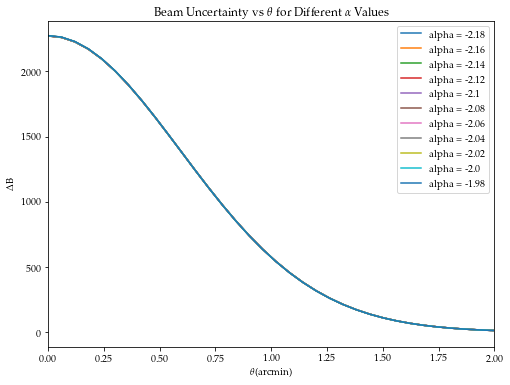

In [30]:
theta_deg = np.linspace(0, 1, 1000)
theta_arc = theta_deg*60
theta_rad = theta_deg*(np.pi/180.)
#loop that for each alpha value, defines new functions and resets Blist, 
for i in range(np.size(alphalist)):  
    alpha = alphalist[i]
    kint = lambda y: (y*v0/vc)**alpha
    a = 1./(integral.quad(kint, y1, y2)[0]) #const k from notes
    def falpha(y): 
        return a*((v0*y)/vc)**alpha

    def delf(y):
        return falpha(y)-fB(y)

    def B(theta, y):
        return Bg(theta, y)*delf(y)
       
    def listfxn(theta):
        integrand = lambda y: B(theta, y)
        return integral.quad(integrand, y1, y2)[0]
    
    #print(listfxn(0.0001)) 
   
    Blist = []
   
    
    #with another internal loop that appends Blist for each theta value, 
    #creating a separate theta dependent Blist for each alpha
    for j in range(np.size(theta_arc)):
        Blist.append(listfxn(theta_rad[j]))
        #print(integral.quad(integrand1, y1, y2)[0], listfxn(theta[j]))
    
    #and then plotting Blist still within the loop of alpha values 
    plt.plot(np.abs(theta_arc), np.abs(Blist), label = 'alpha = '+str(alpha))
    #plt.xlim([0.1, 5])
    #plt.ylim([1.e-12,2.e2])
    #plt.yscale('log')
    #plt.xscale('log')
    
    #print(Blist)
    

plt.title('Beam Uncertainty vs ' + r'$\theta$' + ' for Different ' + r'$\alpha$' + ' Values')
plt.xlabel(r'$\theta$' + '(arcmin)')
plt.ylabel(r'$\Delta$' + 'B')
plt.legend()
plt.xlim([0,2.])
plt.show()



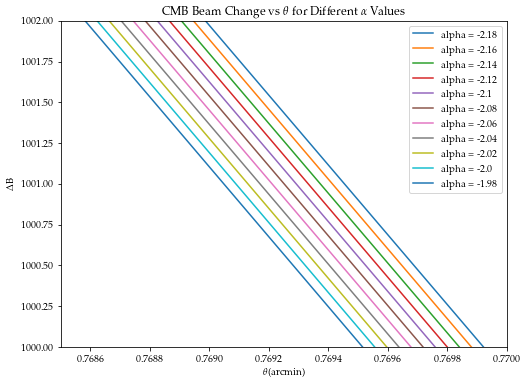

In [115]:
theta_deg = np.linspace(0, 1, 1000)
theta_arc = theta_deg*60
theta_rad = theta_deg*(np.pi/180.)
#loop that for each alpha value, defines new functions and resets Blist, 
for i in range(np.size(alphalist)):  
    alpha = alphalist[i]
    kint = lambda y: (y*v0/vc)**alpha
    a = 1./(integral.quad(kint, y1, y2)[0]) #const k from notes
    def falpha(y): 
        return a*((v0*y)/vc)**alpha

    def delf(y):
        return falpha(y)-fB(y)

    def B(theta, y):
        return Bg(theta, y)*delf(y)
       
    def listfxn(theta):
        integrand = lambda y: B(theta, y)
        return integral.quad(integrand, y1, y2)[0]
    
    #print(listfxn(0.0001)) 
   
    Blist = []
   
    
    #with another internal loop that appends Blist for each theta value, 
    #creating a separate theta dependent Blist for each alpha
    for j in range(np.size(theta_arc)):
        Blist.append(listfxn(theta_rad[j]))
        #print(integral.quad(integrand1, y1, y2)[0], listfxn(theta[j]))
    
    #and then plotting Blist still within the loop of alpha values 
    plt.plot(np.abs(theta_arc), np.abs(Blist), label = 'alpha = '+str(alpha))
    #plt.xlim([0.1, 5])
    #plt.ylim([1.e-12,2.e2])
    #plt.yscale('log')
    #plt.xscale('log')
    
    #print(Blist)
    

plt.title('CMB Beam Change vs '+ r'$\theta$' + ' for Different ' + r'$\alpha$' + ' Values')
plt.xlabel(r'$\theta$' + '(arcmin)')
plt.ylabel(r'$\Delta$' + 'B')
plt.xlim([0.7685,0.77])
plt.ylim([1000,1002])
plt.legend()
plt.show()

Now we add legendre polynomial to plot the beam in terms of the monopole moment l:

$$
\begin{aligned}
\delta B_{\ell} &=\sum_{n} B_{n} \int_{\nu_{c}-\Delta \nu / 2}^{\nu_{c}+\Delta \nu / 2} g_{\ell n}(\nu) \Delta f_{\alpha}(\nu) d \nu \\
g_{\ell n}(\nu) & \equiv \int P_{n}[\cos (\theta)] P_{\ell}\left[\cos \left(\theta \frac{\nu}{\nu_{c}}\right)\right] \sin \theta d \theta \\
\Delta f_{\alpha}(\nu) &=f_{\alpha}(\nu)-f_{\mathrm{BB}}(\nu)
\end{aligned}
$$


/var/folders/2w/zf6pxlvs2y1798_1xxp9wnd00000gn/T/ipykernel_98797/1482473896.py:360: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([0,20])


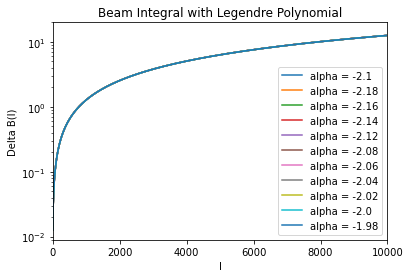

-2.18
[0.012670507477465355, 0.025341014550636188, 0.03801152081521796, 0.05068202586691631, 0.06335252930143692, 0.07602303071448559, 0.08869352970176853, 0.10136402585899186, 0.1140345187818623, 0.12670500806608667, 0.13937549330737217, 0.1520459741014265, 0.16471645004395774, 0.17738692073067447, 0.1900573857572857, 0.2027278447195012, 0.21539829721303114, 0.22806874283358633, 0.2407391811768782, 0.25340961183861926, 0.26608003441452205, 0.2787504485003009, 0.29142085369167015, 0.3040912495843456, 0.3167616357740434, 0.3294320118564807, 0.3421023774273764, 0.3547727320824494, 0.36744307541742044, 0.38011340702801105, 0.3927837265099437, 0.4054540334589426, 0.41812432747073297, 0.4307946081410411, 0.44346487506559445, 0.45613512784012233, 0.46880536606035556, 0.48147558932202533, 0.4941457972208653, 0.5068159893526101, 0.5194861653129963, 0.5321563246977624, 0.5448264671026476, 0.5574965921233932, 0.5701666993557425, 0.5828367883954397, 0.5955068588382316, 0.608176910279866, 0.620846

In [5]:
#legendre integral
from scipy.special import eval_legendre
    
theta_deg = np.linspace(0, 1, 1000)
theta_arc = theta_deg*60
theta_rad = theta_deg*(np.pi/180.)
lvalues = np.linspace(0, 10000, 1000)
final = []
fakeint = 0.

alpha = -2.1
a = 1./(integral.quad(lambda y: (y*v0/vc)**alpha, y1, y2)[0]) #const k from notes
def falpha(y): 
    return a*((v0*y)/vc)**alpha

def delf(y):
    return falpha(y)-fB(y)

def B(phi, y):
    return Bg(phi, y)*delf(y)
        
def listfxn(theta):
    integrand = lambda y: B(theta, y)
    return integral.quad(integrand, y1, y2)[0]


final = []
fakeint = 0.
#for l in range(np.size(lvalues)):
#for each l in range of l values, integrate delta B of l 
#which is from 0 to pi for old delta B(theta) * legendre 


test21 = []
for n in range(np.size(lvalues)):
    poly = lambda theta: eval_legendre(n, math.cos(theta))
    newint = lambda theta: poly(theta)*listfxn(theta)*np.sin(theta)
    for t in range(np.size(theta_rad)):
        fakeint = fakeint + ((newint(theta_rad[t]))*(np.pi/1000.))
    test21.append(fakeint)

plt.plot(lvalues, np.abs(test21), label = 'alpha = -2.1')


    
alpha = -2.18
a = 1./(integral.quad(lambda y: (y*v0/vc)**alpha, y1, y2)[0]) #const k from notes
def falpha(y): 
    return a*((v0*y)/vc)**alpha

def delf(y):
    return falpha(y)-fB(y)

def B(phi, y):
    return Bg(phi, y)*delf(y)
        
def listfxn(theta):
    integrand = lambda y: B(theta, y)
    return integral.quad(integrand, y1, y2)[0]

final = []
fakeint = 0.

test218 = []
for n in range(np.size(lvalues)):
    poly = lambda theta: eval_legendre(n, math.cos(theta))
    newint = lambda theta: poly(theta)*listfxn(theta)*np.sin(theta)
    for t in range(np.size(theta_rad)):
        fakeint = fakeint + ((newint(theta_rad[t]))*(np.pi/1000.))
    test218.append(fakeint)


plt.plot(lvalues, np.abs(test218), label = 'alpha = -2.18')





alpha = -2.16
a = 1./(integral.quad(lambda y: (y*v0/vc)**alpha, y1, y2)[0]) #const k from notes
def falpha(y): 
    return a*((v0*y)/vc)**alpha

def delf(y):
    return falpha(y)-fB(y)

def B(phi, y):
    return Bg(phi, y)*delf(y)
        
def listfxn(theta):
    integrand = lambda y: B(theta, y)
    return integral.quad(integrand, y1, y2)[0]

final = []
fakeint = 0.

test216 = []
for n in range(np.size(lvalues)):
    poly = lambda theta: eval_legendre(n, math.cos(theta))
    newint = lambda theta: poly(theta)*listfxn(theta)*np.sin(theta)
    for t in range(np.size(theta_rad)):
        fakeint = fakeint + ((newint(theta_rad[t]))*(np.pi/1000.))
    test216.append(fakeint)


plt.plot(lvalues, np.abs(test216), label = 'alpha = -2.16')




alpha = -2.14
a = 1./(integral.quad(lambda y: (y*v0/vc)**alpha, y1, y2)[0]) #const k from notes
def falpha(y): 
    return a*((v0*y)/vc)**alpha

def delf(y):
    return falpha(y)-fB(y)

def B(phi, y):
    return Bg(phi, y)*delf(y)
        
def listfxn(theta):
    integrand = lambda y: B(theta, y)
    return integral.quad(integrand, y1, y2)[0]

final = []
fakeint = 0.

test214 = []
for n in range(np.size(lvalues)):
    poly = lambda theta: eval_legendre(n, math.cos(theta))
    newint = lambda theta: poly(theta)*listfxn(theta)*np.sin(theta)
    for t in range(np.size(theta_rad)):
        fakeint = fakeint + ((newint(theta_rad[t]))*(np.pi/1000.))
    test214.append(fakeint)


plt.plot(lvalues, np.abs(test214), label = 'alpha = -2.14')





alpha = -2.12
a = 1./(integral.quad(lambda y: (y*v0/vc)**alpha, y1, y2)[0]) #const k from notes
def falpha(y): 
    return a*((v0*y)/vc)**alpha

def delf(y):
    return falpha(y)-fB(y)

def B(phi, y):
    return Bg(phi, y)*delf(y)
        
def listfxn(theta):
    integrand = lambda y: B(theta, y)
    return integral.quad(integrand, y1, y2)[0]

final = []
fakeint = 0.

test212 = []
for n in range(np.size(lvalues)):
    poly = lambda theta: eval_legendre(n, math.cos(theta))
    newint = lambda theta: poly(theta)*listfxn(theta)*np.sin(theta)
    for t in range(np.size(theta_rad)):
        fakeint = fakeint + ((newint(theta_rad[t]))*(np.pi/1000.))
    test212.append(fakeint)


plt.plot(lvalues, np.abs(test212), label = 'alpha = -2.12')


alpha = -2.08
a = 1./(integral.quad(lambda y: (y*v0/vc)**alpha, y1, y2)[0]) #const k from notes
def falpha(y): 
    return a*((v0*y)/vc)**alpha

def delf(y):
    return falpha(y)-fB(y)

def B(phi, y):
    return Bg(phi, y)*delf(y)
        
def listfxn(theta):
    integrand = lambda y: B(theta, y)
    return integral.quad(integrand, y1, y2)[0]

final = []
fakeint = 0.

test208 = []
for n in range(np.size(lvalues)):
    poly = lambda theta: eval_legendre(n, math.cos(theta))
    newint = lambda theta: poly(theta)*listfxn(theta)*np.sin(theta)
    for t in range(np.size(theta_rad)):
        fakeint = fakeint + ((newint(theta_rad[t]))*(np.pi/1000.))
    test208.append(fakeint)


plt.plot(lvalues, np.abs(test208), label = 'alpha = -2.08')



alpha = -2.06
a = 1./(integral.quad(lambda y: (y*v0/vc)**alpha, y1, y2)[0]) #const k from notes
def falpha(y): 
    return a*((v0*y)/vc)**alpha

def delf(y):
    return falpha(y)-fB(y)

def B(phi, y):
    return Bg(phi, y)*delf(y)
        
def listfxn(theta):
    integrand = lambda y: B(theta, y)
    return integral.quad(integrand, y1, y2)[0]

final = []
fakeint = 0.

test206 = []
for n in range(np.size(lvalues)):
    poly = lambda theta: eval_legendre(n, math.cos(theta))
    newint = lambda theta: poly(theta)*listfxn(theta)*np.sin(theta)
    for t in range(np.size(theta_rad)):
        fakeint = fakeint + ((newint(theta_rad[t]))*(np.pi/1000.))
    test206.append(fakeint)


plt.plot(lvalues, np.abs(test206), label = 'alpha = -2.06')


alpha = -2.04
a = 1./(integral.quad(lambda y: (y*v0/vc)**alpha, y1, y2)[0]) #const k from notes
def falpha(y): 
    return a*((v0*y)/vc)**alpha

def delf(y):
    return falpha(y)-fB(y)

def B(phi, y):
    return Bg(phi, y)*delf(y)
        
def listfxn(theta):
    integrand = lambda y: B(theta, y)
    return integral.quad(integrand, y1, y2)[0]

final = []
fakeint = 0.

test204 = []
for n in range(np.size(lvalues)):
    poly = lambda theta: eval_legendre(n, math.cos(theta))
    newint = lambda theta: poly(theta)*listfxn(theta)*np.sin(theta)
    for t in range(np.size(theta_rad)):
        fakeint = fakeint + ((newint(theta_rad[t]))*(np.pi/1000.))
    test204.append(fakeint)


plt.plot(lvalues, np.abs(test204), label = 'alpha = -2.04')



alpha = -2.02
a = 1./(integral.quad(lambda y: (y*v0/vc)**alpha, y1, y2)[0]) #const k from notes
def falpha(y): 
    return a*((v0*y)/vc)**alpha

def delf(y):
    return falpha(y)-fB(y)

def B(phi, y):
    return Bg(phi, y)*delf(y)
        
def listfxn(theta):
    integrand = lambda y: B(theta, y)
    return integral.quad(integrand, y1, y2)[0]

final = []
fakeint = 0.

test202 = []
for n in range(np.size(lvalues)):
    poly = lambda theta: eval_legendre(n, math.cos(theta))
    newint = lambda theta: poly(theta)*listfxn(theta)*np.sin(theta)
    for t in range(np.size(theta_rad)):
        fakeint = fakeint + ((newint(theta_rad[t]))*(np.pi/1000.))
    test202.append(fakeint)


plt.plot(lvalues, np.abs(test202), label = 'alpha = -2.02')



alpha = -2.0
a = 1./(integral.quad(lambda y: (y*v0/vc)**alpha, y1, y2)[0]) #const k from notes
def falpha(y): 
    return a*((v0*y)/vc)**alpha

def delf(y):
    return falpha(y)-fB(y)

def B(phi, y):
    return Bg(phi, y)*delf(y)
        
def listfxn(theta):
    integrand = lambda y: B(theta, y)
    return integral.quad(integrand, y1, y2)[0]

final = []
fakeint = 0.

test20 = []
for n in range(np.size(lvalues)):
    poly = lambda theta: eval_legendre(n, math.cos(theta))
    newint = lambda theta: poly(theta)*listfxn(theta)*np.sin(theta)
    for t in range(np.size(theta_rad)):
        fakeint = fakeint + ((newint(theta_rad[t]))*(np.pi/1000.))
    test20.append(fakeint)


plt.plot(lvalues, np.abs(test20), label = 'alpha = -2.0')



alpha = -1.98
a = 1./(integral.quad(lambda y: (y*v0/vc)**alpha, y1, y2)[0]) #const k from notes
def falpha(y): 
    return a*((v0*y)/vc)**alpha

def delf(y):
    return falpha(y)-fB(y)

def B(phi, y):
    return Bg(phi, y)*delf(y)
        
def listfxn(theta):
    integrand = lambda y: B(theta, y)
    return integral.quad(integrand, y1, y2)[0]

final = []
fakeint = 0.

test198 = []
for n in range(np.size(lvalues)):
    poly = lambda theta: eval_legendre(n, math.cos(theta))
    newint = lambda theta: poly(theta)*listfxn(theta)*np.sin(theta)
    for t in range(np.size(theta_rad)):
        fakeint = fakeint + ((newint(theta_rad[t]))*(np.pi/1000.))
    test198.append(fakeint)


plt.plot(lvalues, np.abs(test198), label = 'alpha = -1.98')


plt.yscale("log")
plt.xlim([0, 10000])
plt.ylim([0,20])
plt.xlabel("l")
plt.ylabel("Delta B(l)")
plt.title('Beam Integral with Legendre Polynomial')
plt.legend()
plt.show()

print("-2.18")
print(test218)

print("-2.16")
print(test216)

print("-2.14")
print(test214)

print("-2.12")
print(test212)

print("-2.1")
print(test21)

print("-2.08")
print(test208)

print("-2.06")
print(test206)

print("-2.04")
print(test204)

print("-2.02")
print(test202)

print("-2.0")
print(test20)

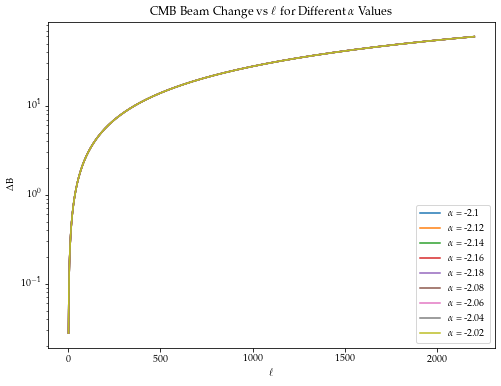

In [314]:
Bell21 = [0.027880590769667563, 0.05576118065123229, 0.08364176875659153, 0.11152235419764257, 0.13940293608628299, 0.1672835135344112, 0.1951640856539252, 0.22304465155672448, 0.2509252103547081, 0.2788057611597766, 0.30668630308383144, 0.334566835238774, 0.3624473567365079, 0.39032786668893643, 0.4182083642079648, 0.44608884840549956, 0.4739693183934481, 0.5018497732837195, 0.5297302121882239, 0.5576106342188737, 0.5854910384875833, 0.6133714241062678, 0.6412517901868429, 0.6691321358412301, 0.6970124601813488, 0.7248927623191234, 0.7527730413664787, 0.7806532964353428, 0.8085335266376453, 0.8364137310853198, 0.8642939088902994, 0.892174059164523, 0.9200541810199317, 0.947934273568467, 0.9758143359220758, 1.0036943671927079, 1.0315743664923132, 1.0594543329328496, 1.0873342656262728, 1.1152141636845458, 1.1430940262196336, 1.1709738523435047, 1.1988536411681316, 1.22673339180549, 1.2546131033675574, 1.28249277496632, 1.3103724057137638, 1.3382519947218812, 1.3661315411026662, 1.394011043968118, 1.4218905024302408, 1.4497699156010444, 1.477649282592541, 1.5055286025167465, 1.533407874485682, 1.5612870976113749, 1.5891662710058578, 1.6170453937811637, 1.6449244650493353, 1.672803483922419, 1.700682449512467, 1.728561360931535, 1.756440217291682, 1.7843190177049795, 1.8121977612834967, 1.8400764471393147, 1.8679550743845168, 1.8958336421311925, 1.9237121494914355, 1.9515905955773507, 1.9794689795010432, 2.007347300374627, 2.035225557310223, 2.0631037494199513, 2.090981875815949, 2.118859935610359, 2.1467379279153205, 2.1746158518429874, 2.2024937065055177, 2.230371491015075, 2.258249204483833, 2.286126846023974, 2.31400441474768, 2.341881909767144, 2.3697593301945714, 2.397636675142168, 2.425513943722144, 2.4533911350467266, 2.4812682482281487, 2.5091452823786478, 2.5370222366104653, 2.56489911003586, 2.5927759017670895, 2.6206526109164274, 2.648529236596147, 2.6764057779185375, 2.704282233995891, 2.732158603940512, 2.7600348868647093, 2.7879110818808046, 2.8157871881011225, 2.8436632046380037, 2.871539130603793, 2.89941496511084, 2.9272907072715126, 2.9551663561981814, 2.9830419110032333, 3.0109173707990515, 3.038792734698041, 3.066668001812606, 3.094543171255173, 3.122418242138167, 3.1502932135740283, 3.1781680846752036, 3.206042854554149, 3.233917522323331, 3.2617920870952313, 3.2896665479823355, 3.3175409040971404, 3.345415154552156, 3.3732892984599068, 3.401163334932917, 3.4290372630837216, 3.4569110820248725, 3.484784790868935, 3.512658388728477, 3.5405318747160854, 3.5684052479443498, 3.59627850752588, 3.6241516525732846, 3.652024682199193, 3.679897595516247, 3.707770391637094, 3.735643069674395, 3.7635156287408242, 3.791388067949061, 3.819260386411811, 3.8471325832417773, 3.8750046575516777, 3.9028766084542474, 3.9307484350622275, 3.958620136488377, 3.9864917118454635, 4.014363160246266, 4.042234480803583, 4.070105672630211, 4.097976734838983, 4.1258476665427235, 4.153718466854265, 4.181589134886477, 4.2094596697522295, 4.237330070564408, 4.2652003364359, 4.293070466479609, 4.320940459808469, 4.348810315535412, 4.376680032773386, 4.404549610635361, 4.432419048234304, 4.460288344683206, 4.488157499095082, 4.516026510582935, 4.543895378259811, 4.571764101238746, 4.599632678632808, 4.627501109555071, 4.655369393118621, 4.683237528436564, 4.711105514622014, 4.738973350788108, 4.766841036047995, 4.7947085695148335, 4.822575950301799, 4.850443177522083, 4.8783102502888935, 4.906177167715454, 4.9340439289150035, 4.961910533000789, 4.9897769790860895, 5.0176432662841846, 5.045509393708368, 5.073375360471962, 5.101241165688288, 5.1291068084706914, 5.156972287932544, 5.184837603187221, 5.212702753348108, 5.2405677375286235, 5.268432554842197, 5.296297204402271, 5.3241616853222995, 5.3520259967157635, 5.379890137696153, 5.407754107376978, 5.435617904871768, 5.463481529294061, 5.491344979757421, 5.519208255375424, 5.547071355261659, 5.5749342785297475, 5.6027970242933165, 5.630659591665997, 5.658521979761472, 5.686384187693416, 5.714246214575521, 5.742108059521513, 5.769969721645119, 5.797831200060101, 5.825692493880223, 5.85355360221927, 5.881414524191057, 5.909275258909407, 5.937135805488161, 5.964996163041176, 5.992856330682341, 6.020716307525544, 6.048576092684716, 6.076435685273788, 6.104295084406716, 6.132154289197464, 6.160013298760039, 6.187872112208449, 6.215730728656723, 6.243589147218914, 6.271447367009082, 6.299305387141327, 6.32716320672976, 6.355020824888501, 6.382878240731709, 6.410735453373547, 6.438592461928201, 6.466449265509878, 6.494305863232812, 6.522162254211251, 6.550018437559458, 6.57787441239173, 6.605730177822369, 6.633585732965723, 6.661441076936125, 6.68929620884795, 6.717151127815593, 6.74500583295346, 6.772860323375994, 6.800714598197644, 6.828568656532883, 6.856422497496214, 6.884276120202162, 6.912129523765253, 6.93998270730006, 6.967835669921157, 6.995688410743164, 7.023540928880691, 7.051393223448388, 7.079245293560931, 7.107097138333004, 7.134948756879334, 7.1628001483146475, 7.190651311753709, 7.218502246311296, 7.246352951102209, 7.274203425241283, 7.30205366784336, 7.329903678023311, 7.357753454896034, 7.38560299757644, 7.41345230517947, 7.441301376820091, 7.469150211613287, 7.496998808674066, 7.524847167117457, 7.552695286058522, 7.5805431646123385, 7.6083908018940045, 7.636238197018657, 7.664085349101437, 7.691932257257516, 7.719778920602101, 7.747625338250411, 7.775471509317687, 7.803317432919203, 7.831163108170254, 7.859008534186157, 7.886853710082248, 7.914698634973898, 7.942543307976503, 7.970387728205476, 7.9982318947762625, 8.026075806804327, 8.053919463405158, 8.081762863694252, 8.109606006787187, 8.137448891799524, 8.165291517846834, 8.193133884044757, 8.220975989508922, 8.248817833355016, 8.276659414698702, 8.304500732655711, 8.3323417863418, 8.360182574872734, 8.388023097364307, 8.415863352932348, 8.443703340692693, 8.47154305976122, 8.499382509253852, 8.527221688286492, 8.555060595975101, 8.58289923143567, 8.610737593784219, 8.63857568213674, 8.666413495609326, 8.694251033318062, 8.722088294379057, 8.749925277908462, 8.777761983022437, 8.805598408837179, 8.833434554468917, 8.861270419033913, 8.889106001648432, 8.916941301428785, 8.944776317491314, 8.972611048952366, 9.00044549492833, 9.028279654535643, 9.056113526890737, 9.083947111110101, 9.111780406310226, 9.139613411607654, 9.167446126118932, 9.19527854896064, 9.223110679249409, 9.250942516101874, 9.27877405863471, 9.30660530596462, 9.334436257208345, 9.362266911482642, 9.39009726790429, 9.417927325590133, 9.445757083657004, 9.473586541221762, 9.501415697401344, 9.529244551312653, 9.557073102072689, 9.584901348798427, 9.612729290606895, 9.640556926615163, 9.668384255940293, 9.696211277699405, 9.724037991009649, 9.75186439498821, 9.77969048875228, 9.807516271419093, 9.835341742105916, 9.863166899930048, 9.89099174400884, 9.918816273459614, 9.946640487399783, 9.974464384946753, 10.002287965217993, 10.03011122733096, 10.057934170403195, 10.085756793552228, 10.113579095895629, 10.14140107655101, 10.169222734636014, 10.1970440692683, 10.22486507956556, 10.252685764645557, 10.280506123626054, 10.308326155624831, 10.336145859759728, 10.363965235148598, 10.391784280909341, 10.419602996159886, 10.447421380018191, 10.475239431602233, 10.503057150030049, 10.530874534419699, 10.558691583889251, 10.58650829755684, 10.614324674540608, 10.642140713958767, 10.669956414929514, 10.6977717765711, 10.725586798001828, 10.753401478340011, 10.781215816703996, 10.80902981221218, 10.836843463982984, 10.864656771134847, 10.892469732786275, 10.920282348055762, 10.9480946160619, 10.97590653592326, 11.003718106758468, 11.031529327686167, 11.059340197825062, 11.08715071629388, 11.114960882211387, 11.142770694696358, 11.170580152867629, 11.198389255844075, 11.22619800274459, 11.254006392688108, 11.281814424793588, 11.309622098180048, 11.337429411966516, 11.365236365272072, 11.393042957215819, 11.420849186916927, 11.448655053494535, 11.476460556067888, 11.50426569375623, 11.53207046567884, 11.55987487095505, 11.587678908704204, 11.615482578045716, 11.643285878099006, 11.67108880798353, 11.698891366818813, 11.726693553724392, 11.75449536781984, 11.782296808224752, 11.810097874058801, 11.837898564441662, 11.86569887849305, 11.893498815332732, 11.921298374080495, 11.949097553856172, 11.97689635377964, 12.004694772970813, 12.03249281054962, 12.060290465636035, 12.088087737350115, 12.115884624811876, 12.143681127141438, 12.171477243458927, 12.1992729728845, 12.22706831453837, 12.254863267540772, 12.282657831012015, 12.310452004072395, 12.338245785842293, 12.366039175442104, 12.393832171992246, 12.421624774613203, 12.449416982425493, 12.477208794549673, 12.50500021010632, 12.53279122821608, 12.560581847999599, 12.588372068577595, 12.61616188907081, 12.643951308600036, 12.671740326286086, 12.69952894124984, 12.727317152612196, 12.755104959494085, 12.78289236101652, 12.810679356300485, 12.838465944467076, 12.866252124637366, 12.894037895932504, 12.921823257473672, 12.949608208382104, 12.97739274777904, 13.005176874785798, 13.032960588523704, 13.060743888114153, 13.08852677267857, 13.116309241338403, 13.14409129321518, 13.171872927430435, 13.199654143105748, 13.227434939362752, 13.255215315323108, 13.28299527010853, 13.31077480284077, 13.338553912641618, 13.366332598632917, 13.394110859936513, 13.421888695674342, 13.449666104968362, 13.47744308694056, 13.505219640712983, 13.532995765407717, 13.5607714601469, 13.588546724052655, 13.616321556247211, 13.644095955852835, 13.671869921991812, 13.699643453786472, 13.727416550359203, 13.755189210832423, 13.782961434328596, 13.810733219970212, 13.838504566879825, 13.86627547418005, 13.8940459409935, 13.921815966442853, 13.949585549650829, 13.977354689740194, 14.005123385833757, 14.03289163705438, 14.060659442524937, 14.088426801368378, 14.116193712707686, 14.143960175665889, 14.171726189366039, 14.199491752931259, 14.227256865484698, 14.255021526149575, 14.28278573404912, 14.310549488306636, 14.338312788045434, 14.366075632388903, 14.393838020460475, 14.421599951383607, 14.44936142428181, 14.477122438278657, 14.504882992497734, 14.532643086062693, 14.560402718097215, 14.588161887725049, 14.61592059406998, 14.643678836255821, 14.67143661340646, 14.6991939246458, 14.72695076909781, 14.754707145886501, 14.78246305413592, 14.810218492970172, 14.837973461513396, 14.865727958889808, 14.893481984223625, 14.921235536639143, 14.948988615260678, 14.976741219212638, 15.0044933476194, 15.032244999605465, 15.059996174295344, 15.087746870813596, 15.115497088284842, 15.143246825833737, 15.170996082584969, 15.198744857663298, 15.226493150193525, 15.254240959300489, 15.281988284109069, 15.309735123744222, 15.337481477330927, 15.365227343994226, 15.392972722859202, 15.420717613050964, 15.448462013694721, 15.476205923915675, 15.503949342839087, 15.531692269590296, 15.559434703294679, 15.587176643077644, 15.614918088064652, 15.642659037381211, 15.670399490152896, 15.698139445505312, 15.72587890256412, 15.753617860455028, 15.781356318303784, 15.809094275236218, 15.836831730378156, 15.864568682855513, 15.892305131794235, 15.920041076320336, 15.947776515559855, 15.97551144863889, 16.003245874683596, 16.03097979282018, 16.058713202174882, 16.08644610187399, 16.114178491043845, 16.14191036881087, 16.169641734301514, 16.19737258664225, 16.225102924959664, 16.25283274838033, 16.280562056030917, 16.308290847038098, 16.336019120528622, 16.363746875629285, 16.391474111466973, 16.419200827168563, 16.446927021860994, 16.474652694671263, 16.50237784472645, 16.53010247115367, 16.55782657308008, 16.585550149632844, 16.613273199939258, 16.64099572312664, 16.668717718322302, 16.696439184653684, 16.72416012124825, 16.751880527233503, 16.77960040173704, 16.80731974388648, 16.835038552809475, 16.86275682763375, 16.890474567487093, 16.918191771497334, 16.945908438792344, 16.973624568500053, 17.001340159748434, 17.029055211665554, 17.056769723379503, 17.08448369401841, 17.112197122710455, 17.139910008583936, 17.167622350767164, 17.195334148388397, 17.223045400576126, 17.2507561064588, 17.278466265164905, 17.306175875823, 17.333884937561745, 17.361593449509797, 17.389301410795884, 17.417008820548816, 17.44471567789739, 17.472421981970516, 17.50012773189712, 17.527832926806223, 17.555537565826892, 17.583241648088205, 17.610945172719344, 17.638648138849508, 17.666350545607973, 17.694052392124075, 17.721753677527197, 17.74945440094674, 17.777154561512184, 17.804854158353105, 17.832553190599107, 17.860251657379834, 17.887949557825, 17.91564689106437, 17.943343656227743, 17.971039852445017, 17.9987354788461, 18.02643053456101, 18.054125018719763, 18.08181893045248, 18.109512268889294, 18.137205033160406, 18.164897222396117, 18.192588835726728, 18.22027987228258, 18.247970331194182, 18.27566021159196, 18.303349512606477, 18.33103823336836, 18.358726373008274, 18.38641393065691, 18.414100905445036, 18.441787296503517, 18.469473102963185, 18.497158323955027, 18.52484295861004, 18.552527006059275, 18.580210465433844, 18.60789333586494, 18.635575616483777, 18.663257306421656, 18.690938404809913, 18.71861891077993, 18.74629882346318, 18.77397814199119, 18.801656865495552, 18.829334993107885, 18.85701252395988, 18.884689457183292, 18.912365791909938, 18.94004152727163, 18.96771666240039, 18.99539119642816, 19.023065128486966, 19.05073845770893, 19.078411183226198, 19.106083304171, 19.133754819675598, 19.161425728872352, 19.189096030893612, 19.216765724871927, 19.244434809939754, 19.27210328522969, 19.29977114987432, 19.32743840300636, 19.35510504375859, 19.3827710712638, 19.410436484654845, 19.43810128306472, 19.465765465626383, 19.49342903147287, 19.52109197973732, 19.548754309552855, 19.576416020052775, 19.60407711037034, 19.6317375796389, 19.659397426991873, 19.687056651562745, 19.714715252485075, 19.7423732288924, 19.77003057991842, 19.797687304696847, 19.82534340236145, 19.852998872046072, 19.880653712884595, 19.908307924011023, 19.935961504559366, 19.963614453663684, 19.991266770458175, 20.018918454077017, 20.04656950365448, 20.07421991832494, 20.101869697222728, 20.12951883948235, 20.157167344238278, 20.1848152106251, 20.21246243777748, 20.240109024830097, 20.267754970917764, 20.295400275175297, 20.323044936737553, 20.350688954739528, 20.37833232831624, 20.40597505660273, 20.433617138734157, 20.46125857384575, 20.48889936107278, 20.51653949955054, 20.544178988414465, 20.571817826799972, 20.59945601384261, 20.627093548677955, 20.654730430441703, 20.6823666582695, 20.710002231297153, 20.737637148660493, 20.76527140949546, 20.792905012937982, 20.820537958124127, 20.848170244189944, 20.87580187027163, 20.903432835505406, 20.931063139027525, 20.958692779974392, 20.9863217574824, 21.013950070688022, 21.041577718727822, 21.06920470073841, 21.09683101585648, 21.124456663218748, 21.15208164196203, 21.179705951223177, 21.207329590139178, 21.234952557846988, 21.26257485348368, 21.290196476186413, 21.31781742509237, 21.34543769933883, 21.373057298063102, 21.400676220402612, 21.428294465494787, 21.455912032477187, 21.483528920487387, 21.51114512866303, 21.53876065614185, 21.566375502061668, 21.593989665560343, 21.62160314577579, 21.649215941845966, 21.676828052908963, 21.704439478102902, 21.732050216565987, 21.759660267436487, 21.787269629852698, 21.814878302953, 21.84248628587589, 21.870093577759874, 21.89770017774354, 21.92530608496557, 21.952911298564644, 21.980515817679617, 22.008119641449344, 22.03572276901274, 22.06332519950882, 22.090926932076634, 22.118527965855307, 22.146128299984074, 22.173727933602194, 22.201326865848973, 22.228925095863843, 22.256522622786303, 22.284119445755916, 22.31171556391225, 22.339310976394966, 22.36690568234386, 22.39449968089876, 22.42209297119951, 22.449685552386107, 22.477277423598526, 22.504868583976908, 22.532459032661436, 22.560048768792264, 22.587637791509778, 22.615226099954306, 22.642813693266294, 22.67040057058628, 22.697986731054797, 22.725572173812516, 22.753156898000178, 22.780740902758524, 22.80832418722848, 22.835906750550926, 22.863488591866883, 22.891069710317424, 22.91865010504366, 22.946229775186854, 22.97380871988825, 23.00138693828923, 23.028964429531204, 23.05654119275565, 23.08411722710414, 23.111692531718294, 23.13926710573983, 23.16684094831055, 23.194414058572256, 23.22198643566689, 23.24955807873646, 23.27712898692301, 23.304699159368713, 23.332268595215734, 23.359837293606347, 23.387405253682918, 23.414972474587838, 23.44253895546366, 23.47010469545291, 23.497669693698207, 23.52523394934228, 23.552797461527906, 23.580360229397954, 23.607922252095328, 23.635483528763025, 23.663044058544134, 23.690603840581776, 23.718162874019207, 23.745721157999686, 23.773278691666565, 23.800835474163286, 23.828391504633345, 23.855946782220354, 23.883501306067945, 23.911055075319837, 23.938608089119846, 23.96616034661184, 23.993711846939775, 24.02126258924765, 24.048812572679573, 24.076361796379693, 24.103910259492277, 24.131457961161665, 24.159004900532214, 24.18655107674839, 24.214096488954734, 24.241641136295858, 24.26918501791645, 24.296728132961263, 24.324270480575134, 24.351812059902965, 24.379352870089793, 24.406892910280607, 24.434432179620586, 24.461970677254918, 24.489508402328894, 24.517045353987875, 24.54458153137728, 24.572116933642643, 24.599651559929505, 24.627185409383582, 24.654718481150592, 24.68225077437633, 24.70978228820669, 24.737313021787656, 24.764842974265246, 24.79237214478557, 24.819900532494817, 24.84742813653928, 24.874954956065267, 24.902480990219217, 24.93000623814764, 24.957530698997072, 24.985054371914174, 25.01257725604571, 25.040099350538423, 25.067620654539226, 25.095141167195017, 25.1226608876529, 25.150179815059957, 25.17769794856336, 25.205215287310388, 25.23273183044836, 25.260247577124694, 25.287762526486887, 25.315276677682547, 25.342790029859287, 25.370302582164847, 25.397814333747014, 25.425325283753676, 25.452835431332822, 25.48034477563245, 25.50785331580069, 25.535361050985735, 25.56286798033584, 25.590374102999377, 25.617879418124772, 25.645383924860525, 25.672887622355244, 25.700390509757558, 25.727892586216235, 25.75539385088008, 25.782894302897986, 25.810393941418937, 25.837892765592034, 25.86539077456634, 25.89288796749113, 25.920384343515654, 25.94787990178934, 25.97537464146159, 26.002868561681975, 26.030361661600097, 26.057853940365636, 26.085345397128346, 26.112836031038146, 26.14032584124492, 26.167814826898674, 26.195302987149507, 26.22279032114761, 26.250276828043194, 26.277762506986637, 26.305247357128323, 26.332731377618735, 26.36021456760848, 26.3876969262482, 26.4151784526886, 26.442659146080494, 26.470139005574843, 26.497618030322577, 26.525096219474754, 26.55257357218252, 26.58005008759709, 26.607525764869788, 26.635000603151955, 26.662474601595093, 26.68994775935075, 26.71742007557051, 26.744891549406105, 26.77236218000935, 26.799831966532093, 26.827300908126272, 26.85476900394394, 26.882236253137226, 26.909702654858297, 26.937168208259475, 26.96463291249311, 26.992096766711636, 27.019559770067573, 27.04702192171356, 27.07448322080227, 27.10194366648649, 27.12940325791911, 27.156861994253052, 27.18431987464136, 27.21177689823707, 27.239233064193456, 27.266688371663726, 27.29414281980127, 27.321596407759507, 27.349049134692006, 27.376500999752327, 27.403952002094197, 27.431402140871377, 27.458851415237707, 27.48629982434717, 27.513747367353766, 27.541194043411622, 27.568639851674906, 27.596084791297933, 27.623528861435034, 27.650972061240648, 27.678414389869335, 27.7058558464757, 27.733296430214484, 27.7607361402404, 27.788174975708344, 27.815612935773295, 27.843050019590237, 27.87048622631433, 27.897921555100787, 27.925356005104895, 27.95278957548206, 27.98022226538769, 28.00765407397738, 28.03508500040676, 28.062515043831553, 28.089944203407544, 28.11737247829063, 28.144799867636795, 28.17222637060211, 28.19965198634271, 28.22707671401485, 28.254500552774807, 28.28192350177902, 28.30934556018398, 28.33676672714628, 28.36418700182254, 28.391606383369563, 28.419024870944167, 28.44644246370327, 28.47385916080391, 28.50127496140316, 28.528689864658226, 28.556103869726343, 28.583516975764915, 28.61092918193139, 28.63834048738326, 28.665750891278197, 28.693160392773848, 28.720568991028042, 28.747976685198662, 28.77538347444369, 28.802789357921156, 28.83019433478921, 28.857598404206097, 28.885001565330125, 28.91240381731975, 28.9398051593334, 28.967205590529744, 28.994605110067397, 29.022003717105143, 29.049401410801806, 29.07679819031637, 29.104194054807817, 29.131589003435227, 29.158983035357895, 29.18637614973507, 29.213768345726134, 29.241159622490574, 29.268549979187902, 29.29593941497781, 29.323327929020014, 29.35071552047438, 29.378102188500794, 29.405487932259277, 29.432872750909898, 29.46025664361286, 29.48763960952841, 29.51502164781696, 29.542402757638946, 29.56978293815491, 29.597162188525495, 29.624540507911416, 29.651917895473463, 29.67929435037258, 29.706669871769723, 29.734044458825984, 29.76141811070256, 29.788790826560703, 29.81616260556177, 29.843533446867205, 29.87090334963855, 29.898272313037406, 29.925640336225513, 29.953007418364667, 29.98037355861676, 30.007738756143844, 30.035103010107974, 30.062466319671312, 30.089828683996135, 30.117190102244752, 30.14455057357965, 30.171910097163387, 30.19926867215856, 30.22662629772792, 30.253982973034248, 30.281338697240464, 30.3086934695096, 30.33604728900471, 30.36340015488897, 30.39075206632568, 30.41810302247822, 30.445453022509998, 30.472802065584624, 30.500150150865693, 30.527497277516943, 30.55484344470225, 30.582188651585533, 30.60953289733077, 30.636876181102085, 30.664218502063694, 30.69155985937986, 30.718900252214993, 30.74623967973357, 30.773578141100156, 30.80091563547943, 30.828252162036154, 30.855587719935173, 30.882922308341467, 30.910255926420003, 30.937588573335987, 30.964920248254593, 30.992250950341187, 31.019580678761187, 31.046909432680106, 31.07423721126354, 31.101564013677184, 31.12888983908684, 31.156214686658366, 31.183538555557725, 31.210861444951092, 31.238183354004583, 31.26550428188446, 31.292824227757098, 31.320143190788897, 31.347461170146495, 31.37477816499647, 31.402094174505592, 31.429409197840705, 31.456723234168738, 31.484036282656724, 31.511348342471745, 31.53865941278106, 31.56596949275196, 31.59327858155187, 31.6205866783483, 31.647893782308834, 31.675199892601196, 31.702505008393132, 31.729809128852555, 31.757112253147458, 31.78441438044592, 31.811715509916123, 31.83901564072632, 31.8663147720449, 31.893612903040314, 31.920910032881125, 31.94820616073599, 31.975501285773692, 32.00279540716302, 32.03008852407301, 32.05738063567264, 32.08467174113106, 32.11196183961757, 32.13925093030151, 32.16653901235223, 32.19382608493931, 32.221112147232404, 32.24839719840123, 32.27568123761558, 32.30296426404539, 32.33024627686064, 32.35752727523152, 32.384807258328216, 32.412086225321055, 32.43936417538043, 32.46664110767684, 32.49391702138089, 32.521191915663366, 32.54846578969495, 32.57573864264668, 32.60301047368951, 32.63028128199447, 32.65755106673281, 32.68481982707583, 32.71208756219494, 32.73935427126164, 32.766619953447496, 32.79388460792424, 32.82114823386361, 32.8484108304375, 32.87567239681794, 32.90293293217705, 32.930192435686955, 32.957450906519995, 32.98470834384844, 33.01196474684495, 33.03922011468205, 33.06647444653236, 33.09372774156871, 33.120979998964046, 33.148231217891315, 33.17548139752362, 33.20273053703405, 33.22997863559609, 33.257225692382896, 33.284471706568084, 33.31171667732524, 33.33896060382812, 33.36620348525042, 33.39344532076605, 33.42068610954899, 33.447925850773395, 33.475164543613424, 33.50240218724338, 33.52963878083758, 33.556874323570625, 33.58410881461708, 33.61134225315167, 33.63857463834914, 33.66580596938444, 33.69303624543258, 33.72026546566867, 33.74749362926788, 33.77472073540552, 33.80194678325705, 33.82917177199791, 33.85639570080378, 33.883618568850416, 33.91084037531358, 33.93806111936918, 33.96528080019321, 33.99249941696189, 34.01971696885146, 34.04693345503817, 34.074148874698466, 34.10136322700895, 34.12857651114622, 34.15578872628702, 34.182999871608175, 34.21020994628669, 34.23741894949962, 34.264626880424046, 34.29183373823728, 34.31903952211664, 34.346244231239645, 34.37344786478385, 34.40065042192695, 34.42785190184667, 34.45505230372093, 34.48225162672769, 34.509449870045046, 34.536647032851214, 34.56384311432443, 34.59103811364316, 34.618232029985926, 34.64542486253128, 34.67261661045798, 34.69980727294473, 34.72699684917062, 34.75418533831454, 34.78137273955566, 34.80855905207329, 34.835744275046714, 34.862928407655325, 34.89011144907877, 34.917293398496675, 34.94447425508881, 34.97165401803496, 34.99883268651518, 35.0260102597095, 35.05318673679812, 35.080362116961275, 35.10753639937947, 35.134709583233175, 35.161881667702964, 35.1890526519695, 35.21622253521365, 35.24339131661636, 35.270558995358606, 35.29772557062154, 35.3248910415864, 35.35205540743458, 35.37921866734746, 35.4063808205066, 35.43354186609376, 35.4607018032906, 35.487860631279055, 35.515018349241096, 35.542174956358856, 35.56933045181445, 35.596484834790246, 35.623638104468654, 35.65079026003218, 35.677941300663484, 35.70509122554524, 35.732240033860336, 35.7593877247917, 35.78653429752232, 35.81367975123548, 35.84082408511444, 35.86796729834248, 35.89510939010311, 35.92225035958002, 35.9493902059568, 35.97652892841736, 36.00366652614554, 36.03080299832538, 36.05793834414108, 36.08507256277674, 36.112205653416815, 36.13933761524581, 36.166468447448196, 36.193598149208654, 36.220726719712, 36.24785415814311, 36.27498046368707, 36.302105635528896, 36.32922967285387, 36.356352574847286, 36.38347434069458, 36.410594969581275, 36.437714460693144, 36.46483281321589, 36.4919500263353, 36.519066099237406, 36.54618103110836, 36.57329482113431, 36.60040746850164, 36.62751897239669, 36.65462933200605, 36.68173854651632, 36.70884661511429, 36.73595353698676, 36.76305931132078, 36.79016393730345, 36.817267414121844, 36.84436974096336, 36.87147091701539, 36.89857094146545, 36.92566981350115, 36.952767532310325, 36.979864097080764, 37.00695950700049, 37.034053761257525, 37.06114685904006, 37.08823879953641, 37.115329581934986, 37.1424192054243, 37.169507669193, 37.19659497242982, 37.223681114323625, 37.25076609406337, 37.277849910838185, 37.30493256383719, 37.33201405224984, 37.35909437526537, 37.386173532073336, 37.41325152186342, 37.44032834382539, 37.467403997149084, 37.4944784810245, 37.5215517946417, 37.54862393719089, 37.57569490786233, 37.60276470584653, 37.629833330333994, 37.65690078051533, 37.68396705558134, 37.71103215472293, 37.73809607713099, 37.76515882199676, 37.79222038851136, 37.819280775866126, 37.84633998325251, 37.87339800986207, 37.900454854886426, 37.927510517517426, 37.95456499694691, 37.9816182923669, 38.00867040296952, 38.03572132794702, 38.06277106649166, 38.08981961779602, 38.11686698105262, 38.14391315545415, 38.17095814019342, 38.198001934463385, 38.22504453745696, 38.25208594836734, 38.27912616638783, 38.30616519071181, 38.333203020532736, 38.36023965504423, 38.38727509344005, 38.41430933491391, 38.44134237865983, 38.46837422387184, 38.49540486974414, 38.522434315471045, 38.5494625602469, 38.576489603266246, 38.60351544372375, 38.63054008081413, 38.65756351373227, 38.684585741673196, 38.71160676383196, 38.73862657940376, 38.765645187583885, 38.792662587567904, 38.819678778551214, 38.8466937597296, 38.87370753029883, 38.90072008945485, 38.927731436393636, 38.954741570311356, 38.981750490404245, 39.00875819586868, 39.03576468590114, 39.0627699596983, 39.08977401645676, 39.11677685537345, 39.1437784756453, 39.1707788764694, 39.19777805704292, 39.22477601656317, 39.251772754227524, 39.278768269233595, 39.305762560778994, 39.33275562806151, 39.359747470279046, 39.38673808662958, 39.41372747631127, 39.44071563852236, 39.46770257246116, 39.49468827732618, 39.521672752316036, 39.548655996629385, 39.57563800946506, 39.60261879002207, 39.62959833749949, 39.65657665109644, 39.6835537300123, 39.71052957344639, 39.73750418059825, 39.764477550667664, 39.79144968285435, 39.818420576358136, 39.845390230379074, 39.8723586441173, 39.89932581677307, 39.926291747546735, 39.95325643563882, 39.98021988024996, 40.007182080580755, 40.03414303583212, 40.06110274520502, 40.088061207900495, 40.11501842311982, 40.14197439006429, 40.16892910793535, 40.19588257593459, 40.222834793263615, 40.24978575912426, 40.27673547271846, 40.30368393324822, 40.33063113991577, 40.35757709192331, 40.38452178847329, 40.411465228768165, 40.438407412010584, 40.465348337403384, 40.49228800414938, 40.5192264114516, 40.546163558513165, 40.573099444537235, 40.600034068727275, 40.626967430286676, 40.653899528419124, 40.680830362328265, 40.70775993121805, 40.73468823429235, 40.761615270755264, 40.788541039810994, 40.815465540663915, 40.842388772518426, 40.8693107345791, 40.89623142605067, 40.92315084613791, 40.9500689940457, 40.976985868979234, 41.0039014701436, 41.03081579674415, 41.057728847986226, 41.08464062307545, 41.11155112121743, 41.138460341617986, 41.165368283482955, 41.192274946018486, 41.219180328430646, 41.246084429925745, 41.27298724971021, 41.299888786990465, 41.3267890409732, 41.3536880108652, 41.38058569587332, 41.4074820952046, 41.43437720806616, 41.46127103366527, 41.488163571209306, 41.51505481990569, 41.541944778962126, 41.56883344758644, 41.59572082498641, 41.62260691036998, 41.64949170294532, 41.67637520192069, 41.70325740650449, 41.73013831590517, 41.75701792933129, 41.78389624599166, 41.81077326509508, 41.83764898585055, 41.86452340746715, 41.891396529154186, 41.91826835012102, 41.94513886957704, 41.972008086731904, 41.998876000795306, 42.02574261097709, 42.05260791648725, 42.07947191653594, 42.1063346103333, 42.13319599708977, 42.1600560760158, 42.18691484632187, 42.213772307218875, 42.24062845791758, 42.26748329762896, 42.29433682556416, 42.32118904093433, 42.34803994295083, 42.37488953082514, 42.40173780376885, 42.42858476099377, 42.45543040171173, 42.482274725134616, 42.50911773047456, 42.53595941694386, 42.562799783754755, 42.589638830119796, 42.6164765552516, 42.64331295836291, 42.67014803866654, 42.696981795375464, 42.7238142277028, 42.75064533486181, 42.77747511606586, 42.80430357052839, 42.83113069746305, 42.85795649608362, 42.88478096560388, 42.91160410523789, 42.93842591419975, 42.9652463917037, 42.9920655369641, 43.01888334919547, 43.04569982761246, 43.0725149714298, 43.09932877986236, 43.12614125212518, 43.15295238743338, 43.179762185002254, 43.20657064404709, 43.23337776378349, 43.260183543427125, 43.28698798219377, 43.31379107929929, 43.34059283395973, 43.36739324539122, 43.39419231281004, 43.42099003543268, 43.447786412475544, 43.4745814431554, 43.50137512668913, 43.52816746229352, 43.55495844918566, 43.581748086582735, 43.608536373702094, 43.63532330976119, 43.662108893977525, 43.68889312556883, 43.715676003752925, 43.74245752774775, 43.769237696771356, 43.79601651004209, 43.82279396677814, 43.84957006619806, 43.876344807520454, 43.903118189964054, 43.929890212747644, 43.956660875090314, 43.983430176211094, 44.01019811532932, 44.03696469166431, 44.063729904435576, 44.090493752862784, 44.11725623616564, 44.14401735356407, 44.17077710427811, 44.19753548752796, 44.22429250253376, 44.251048148516034, 44.277802424695324, 44.30455533029231, 44.33130686452778, 44.35805702662276, 44.38480581579819, 44.411553231275306, 44.43829927227546, 44.465043938020074, 44.491787227730676, 44.5185291406291, 44.54526967593729, 44.572008832877074, 44.598746610670595, 44.625483008540044, 44.65221802570797, 44.67895166139672, 44.70568391482898, 44.73241478522756, 44.759144271815316, 44.78587237381526, 44.81259909045056, 44.8393244209446, 44.86604836452075, 44.89277092040256, 44.91949208781374, 44.94621186597813, 44.97293025411963, 44.999647251462335, 45.02636285723049, 45.05307707064848, 45.07978989094068, 45.10650131733185, 45.13321134904666, 45.15991998530999, 45.18662722534688, 45.213333068382475, 45.24003751364206, 45.266740560350954, 45.293442207734806, 45.32014245501931, 45.34684130143026, 45.37353874619354, 45.40023478853526, 45.42692942768161, 45.45362266285893, 45.48031449329376, 45.50700491821269, 45.53369393684245, 45.56038154840995, 45.58706775214212, 45.61375254726613, 45.64043593300932, 45.667117908599074, 45.69379847326294, 45.72047762622856, 45.74715536672374, 45.77383169397647, 45.80050660721483, 45.827180105667004, 45.853852188561405, 45.88052285512646, 45.907192104590784, 45.93385993618318, 45.960526349132515, 45.987191342667806, 46.01385491601822, 46.04051706841298, 46.06717779908154, 46.09383710725354, 46.120494992158626, 46.14715145302662, 46.173806489087546, 46.20046009957146, 46.2271122837086, 46.253763040729304, 46.28041236986414, 46.3070602703437, 46.33370674139882, 46.36035178226043, 46.38699539215957, 46.41363757032733, 46.44027831599508, 46.46691762839425, 46.49355550675648, 46.52019195031349, 46.54682695829714, 46.57346052993948, 46.60009266447255, 46.62672336112866, 46.653352619140264, 46.679980437739864, 46.70660681616017, 46.73323175363396, 46.759855249394235, 46.786477302674086, 46.813097912706674, 46.83971707872545, 46.86633479996385, 46.89295107565558, 46.91956590503439, 46.94617928733415, 46.97279122178896, 46.99940170763293, 47.02601074410047, 47.05261833042602, 47.07922446584416, 47.10582914958965, 47.13243238089733, 47.15903415900229, 47.1856344831396, 47.2122333525446, 47.238830766452665, 47.265426724099385, 47.29202122472047, 47.31861426755171, 47.345205851829164, 47.371795976788846, 47.39838464166709, 47.42497184570031, 47.451557588124935, 47.47814186817766, 47.50472468509536, 47.5313060381149, 47.55788592647337, 47.584464349408066, 47.6110413061563, 47.63761679595554, 47.664190818043444, 47.690763371657766, 47.71733445603645, 47.74390407041754, 47.7704722140393, 47.79703888613998, 47.82360408595807, 47.85016781273218, 47.876730065701096, 47.90329084410362, 47.92985014717893, 47.95640797416605, 47.98296432430437, 48.009519196833345, 48.0360725909925, 48.06262450602162, 48.08917494116052, 48.11572389564927, 48.142271368728, 48.16881735963693, 48.195361867616604, 48.221904891907506, 48.24844643175036, 48.274986486386055, 48.30152505505554, 48.328062136999975, 48.354597731460586, 48.38113183767877, 48.40766445489614, 48.43419558235438, 48.46072521929531, 48.48725336496089, 48.51378001859328, 48.54030517943469, 48.566828846727496, 48.59335101971437, 48.619871697637834, 48.64639087974075, 48.6729085652661, 48.69942475345701, 48.725939443556705, 48.752452634808584, 48.7789643264561, 48.805474517743, 48.83198320791312, 48.85849039621035, 48.88499608187882, 48.91150026416274, 48.93800294230651, 48.964504115554604, 48.99100378315174, 49.01750194434268, 49.043998598372504, 49.07049374448612, 49.09698738192883, 49.12347950994605, 49.1499701277832, 49.17645923468599, 49.202946829900284, 49.22943291267196, 49.25591748224715, 49.28240053787206, 49.308882078793026, 49.33536210425663, 49.36184061350953, 49.38831760579848, 49.41479308037047, 49.44126703647252, 49.467739473351934, 49.494210390256036, 49.520679786432396, 49.54714766112867, 49.573614013592646, 49.600078843072254, 49.62654214881564, 49.65300393007102, 49.67946418608671, 49.70592291611127, 49.73238011939346, 49.75883579518197, 49.78528994272584, 49.811742561274116, 49.83819365007612, 49.86464320838113, 49.89109123543871, 49.9175377304986, 49.9439826928106, 49.9704261216247, 49.996868016190916, 50.02330837575956, 50.04974719958103, 50.07618448690595, 50.10262023698486, 50.129054449068754, 50.155487122408516, 50.181918256255265, 50.20834784986039, 50.234775902475164, 50.26120241335118, 50.28762738174015, 50.31405080689397, 50.340472688064594, 50.366893024504165, 50.39331181546495, 50.41972906019941, 50.446144757960155, 50.472558907999904, 50.49897150957152, 50.525382561928026, 50.55179206432251, 50.57820001600836, 50.604606416238994, 50.631011264268096, 50.6574145593493, 50.68381630073654, 50.71021648768391, 50.73661511944551, 50.76301219527569, 50.789407714428954, 50.81580167615991, 50.842194079723356, 50.86858492437418, 50.894974209367476, 50.92136193395847, 50.9477480974025, 50.97413269895509, 51.000515737871815, 51.026897213408596, 51.05327712482129, 51.079655471365996, 51.10603225229897, 51.132407466876586, 51.15878111435542, 51.18515319399216, 51.211523705043604, 51.23789264676674, 51.264260018418724, 51.29062581925683, 51.316990048538365, 51.34335270552106, 51.36971378946253, 51.396073299620674, 51.422431235253505, 51.44878759561921, 51.47514237997605, 51.50149558758255, 51.527847217697236, 51.55419726957891, 51.580545742486464, 51.60689263567895, 51.63323794841555, 51.659581679955636, 51.685923829558725, 51.71226439648446, 51.73860337999265, 51.7649407793432, 51.7912765937962, 51.81761082261195, 51.84394346505075, 51.87027452037319, 51.8966039878399, 51.922931866711856, 51.94925815624995, 51.97558285571531, 52.001905964369286, 52.028227481473245, 52.05454740628881, 52.08086573807768, 52.10718247610178, 52.13349761962313, 52.15981116790389, 52.1861231202065, 52.21243347579327, 52.23874223392698, 52.26504939387037, 52.291354954886366, 52.31765891623803, 52.34396127718856, 52.37026203700148, 52.396561194940254, 52.422858750268496, 52.44915470225012, 52.475449050149095, 52.50174179322954, 52.52803293075581, 52.55432246199228, 52.580610386203546, 52.606896702654296, 52.63318141060954, 52.659464509334235, 52.68574599809362, 52.71202587615305, 52.73830414277798, 52.764580797234025, 52.790855838787074, 52.81712926670309, 52.843401080248036, 52.86967127868824, 52.89593986129008, 52.9222068273202, 52.94847217604519, 52.97473590673199, 53.000998018647515, 53.027258511058996, 53.05351738323373, 53.07977463443922, 53.10603026394308, 53.132284271013035, 53.15853665491702, 53.184787414923115, 53.211036550299546, 53.23728406031475, 53.26352994423714, 53.28977420133552, 53.31601683087868, 53.34225783213554, 53.36849720437531, 53.39473494686727, 53.42097105888083, 53.447205539685676, 53.47343838855152, 53.4996696047483, 53.52589918754608, 53.552127136215, 53.57835345002542, 53.60457812824787, 53.630801170153035, 53.65702257501179, 53.683242342095056, 53.70946047067396, 53.73567696001977, 53.76189180940399, 53.7881050180982, 53.81431658537414, 53.84052651050368, 53.866734792758855, 53.89294143141191, 53.919146425735185, 53.94534977500125, 53.97155147848267, 53.99775153545239, 54.02394994518333, 54.050146706948574, 54.07634182002146, 54.102535283675394, 54.12872709718402, 54.154917259821076, 54.18110577086047, 54.20729262957627, 54.233477835242645, 54.259661387133946, 54.28584328452471, 54.31202352668967, 54.33820211290357, 54.36437904244146, 54.39055431457851, 54.41672792858996, 54.44289988375128, 54.46907017933808, 54.495238814626134, 54.521405788891315, 54.547571101409694, 54.573734751457565, 54.59989673831122, 54.62605706124727, 54.65221571954239, 54.67837271247345, 54.70452803931743, 54.730681699351464, 54.75683369185285, 54.78298401609913, 54.809132671367976, 54.83527965693712, 54.86142497208451, 54.8875686160882, 54.91371058822655, 54.93985088777785, 54.96598951402077, 54.99212646623393, 55.018261743696236, 55.04439534568677, 55.070527271484714, 55.096657520369384, 55.12278609162025, 55.14891298451708, 55.17503819833967, 55.20116173236793, 55.22728358588209, 55.25340375816239, 55.27952224848928, 55.30563905614333, 55.331754180405355, 55.357867620556256, 55.38397937587709, 55.41008944564913, 55.43619782915372, 55.4623045256724, 55.48840953448693, 55.51451285487911, 55.54061448613105, 55.566714427524836, 55.59281267834287, 55.61890923786764, 55.645004105381794, 55.67109728016812, 55.69718876150966, 55.723278548689386, 55.74936664099066, 55.77545303769695, 55.80153773809184, 55.827620741459086, 55.85370204708266, 55.87978165424662, 55.905859562235136, 55.93193577033263, 55.95801027782369, 55.98408308399303, 56.01015418812543, 56.03622358950599, 56.06229128741988, 56.08835728115247, 56.114421569989176, 56.14048415321576, 56.166545030118, 56.1926041999819, 56.218661662093595, 56.24471741573937, 56.270771460205694, 56.296823794779165, 56.322874418746565, 56.34892333139488, 56.374970532011105, 56.40101601988259, 56.42705979429671, 56.45310185454105, 56.47914219990335, 56.50518082967148, 56.531217743133546, 56.55725293957773, 56.58328641829242, 56.60931817856612, 56.635348219687586, 56.66137654094561, 56.68740314162925, 56.71342802102767, 56.73945117843023, 56.76547261312637, 56.7914923244058, 56.81751031155834, 56.84352657387392, 56.869541110642714, 56.89555392115498, 56.92156500470123, 56.94757436057209, 56.97358198805822, 56.99958788645069, 57.02559205504065, 57.05159449311926, 57.077595199977985, 57.10359417490836, 57.12959141720219, 57.1555869261513, 57.18158070104788, 57.20757274118415, 57.23356304585242, 57.25955161434529, 57.285538445955424, 57.311523539975774, 57.337506895699406, 57.36348851241948, 57.38946838942933, 57.415446526022485, 57.441422921492716, 57.46739757513375, 57.49337048623969, 57.519341654104664, 57.54531107802302, 57.57127875728924, 57.59724469119801, 57.623208879044135, 57.64917132012257, 57.675132013728515, 57.70109095915726, 57.72704815570429, 57.75300360266522, 57.77895729933585, 57.80490924501217, 57.83085943899029, 57.85680788056647, 57.88275456903716, 57.908699503699005, 57.93464268384875, 57.960584108783344, 57.98652377779988, 58.01246169019566, 58.038397845268015, 58.06433224231463, 58.09026488063326, 58.11619575952178, 58.14212487827826, 58.168052236200964, 58.1939778325883, 58.219901666738835, 58.24582373795129, 58.27174404552456, 58.29766258875773, 58.32357936695004, 58.349494379400845, 58.37540762540977, 58.401319104276496, 58.42722881530083, 58.45313675778285, 58.479042931022796, 58.504947334321116, 58.53084996697825, 58.55675082829495, 58.58264991757204, 58.608547234110524, 58.63444277721164, 58.66033654617677, 58.686228540307425, 58.7121187589053, 58.73800720127218, 58.76389386671017, 58.78977875452146, 58.815661864008334, 58.84154319447333, 58.86742274521914, 58.893300515548674, 58.919176504764835, 58.94505071217085, 58.970923137069995, 58.996793778765856, 59.022662636562075, 59.04852970976254, 59.074394997671206, 59.10025849959222, 59.12612021482993, 59.151980142688906, 59.17783828247362, 59.20369463348904, 59.22954919504021, 59.25540196643217, 59.281252946970355, 59.30710213596017, 59.33294953270738, 59.358795136517706, 59.3846389466972, 59.410480962551965, 59.43632118338837, 59.46215960851288, 59.48799623723221, 59.513831068853065, 59.539664102682615, 59.565495338027894, 59.59132477419623, 59.61715241049514, 59.64297824623224, 59.66880228071537, 59.69462451325251, 59.720444943151826, 59.74626356972171, 59.77208039227055]
Bell212 = [0.027884395871944672, 0.05576879085543006, 0.08365318406199694, 0.11153757460318628, 0.1394219615905394, 0.16730634413559778, 0.1951907213499036, 0.22307509234499914, 0.2509594562324281, 0.2788438121237336, 0.3067281591304606, 0.3346124963641549, 0.3624968229363625, 0.39038113795863105, 0.4182654405425091, 0.44614972979954687, 0.4740340048412956, 0.5019182647793076, 0.5298025087251367, 0.5576867357903382, 0.5855709450864703, 0.6134551357250909, 0.641339306817763, 0.6692234574760468, 0.6971075868115095, 0.7249916939357148, 0.752875777960235, 0.7807598379966388, 0.8086438731565019, 0.8365278825513984, 0.8644118652929088, 0.892295820492614, 0.9201797472620976, 0.9480636447129447, 0.9759475119567464, 1.0038313481050964, 1.0317151522695893, 1.059598923561823, 1.0874826610933996, 1.1153663639759268, 1.1432500313210094, 1.1711336622402633, 1.1990172558453016, 1.226900811247744, 1.254784327559214, 1.2826678038913395, 1.310551239355748, 1.3384346330640777, 1.3663179841279685, 1.3942012916590614, 1.422084554769005, 1.4499677725694495, 1.477850944172051, 1.5057340686884724, 1.533617145230378, 1.561500172909438, 1.5893831508373257, 1.6172660781257244, 1.6451489538863169, 1.6730317772307912, 1.700914547270845, 1.7287972631181772, 1.7566799238844937, 1.7845625286815048, 1.8124450766209268, 1.8403275668144816, 1.8682099983738965, 1.896092370410906, 1.923974682037247, 1.951856932364667, 1.979739120504917, 2.0076212455697515, 2.035503306670938, 2.0633853029202425, 2.091267233429442, 2.119149097310322, 2.1470308936746707, 2.1749126216342796, 2.2027942803009566, 2.2306758687865087, 2.2585573862027486, 2.2864388316615, 2.3143202042745927, 2.3422015031538646, 2.3700827274111638, 2.397963876158338, 2.4258449485072493, 2.453725943569764, 2.4816068604577546, 2.509487698283104, 2.5373684561577, 2.565249133193438, 2.5931297285022255, 2.6210102411959775, 2.6488906703866175, 2.676771015186071, 2.70465127470628, 2.7325314480591834, 2.7604115343567406, 2.7882915327109172, 2.8161714422336828, 2.844051262037019, 2.8719309912329125, 2.8998106289333667, 2.9276901742503854, 2.9555696262959836, 2.9834489841821865, 3.011328247021032, 3.039207413924566, 3.067086484004836, 3.094965456373907, 3.1228443301438493, 3.15072310442675, 3.1786017783346985, 3.2064803509798008, 3.234358821474161, 3.2622371889299036, 3.2901154524591623, 3.317993611174078, 3.345871664186805, 3.373749610609504, 3.4016274495543457, 3.429505180133516, 3.4573828014592114, 3.485260312643632, 3.513137712798998, 3.5410150010375325, 3.568892176471474, 3.596769238213074, 3.6246461853745924, 3.6525230170682965, 3.6803997324064697, 3.708276330501409, 3.736152810465415, 3.764029171410805, 3.7919054124499114, 3.8197815326950755, 3.8476575312586436, 3.875533407252983, 3.903409159790468, 3.9312847879834902, 3.9591602909444457, 3.9870356677857495, 4.014910917619833, 4.042786039559119, 4.070661032716066, 4.098535896203136, 4.126410629132805, 4.154285230617562, 4.182159699769898, 4.210034035702343, 4.237908237527412, 4.265782304357651, 4.293656235305619, 4.321530029483874, 4.349403686004993, 4.377277203981577, 4.405150582526235, 4.433023820751578, 4.4608969177702456, 4.488769872694888, 4.516642684638167, 4.544515352712763, 4.572387876031359, 4.6002602537066695, 4.6281324848514, 4.656004568578298, 4.683876504000103, 4.7117482902295835, 4.739619926379505, 4.767491411562668, 4.7953627448918725, 4.823233925479948, 4.851104952439726, 4.878975824884057, 4.906846541925809, 4.934717102677869, 4.962587506253123, 4.990457751764494, 5.018327838324904, 5.0461977650472996, 5.074067531044636, 5.1019371354299015, 5.12980657731607, 5.157675855816152, 5.185544970043184, 5.213413919110188, 5.241282702130225, 5.269151318216378, 5.297019766481716, 5.324888046039348, 5.352756156002396, 5.380624095484005, 5.40849186359732, 5.436359459455517, 5.464226882171774, 5.492094130859311, 5.519961204631337, 5.5478281026010965, 5.5756948238818484, 5.603561367586866, 5.631427732829434, 5.659293918722865, 5.6871599243804845, 5.715025748915634, 5.742891391441674, 5.77075685107199, 5.798622126919974, 5.826487218099042, 5.854352123722626, 5.882216842904182, 5.910081374757171, 5.93794571839508, 5.965809872931426, 5.993673837479736, 6.021537611153547, 6.049401193066421, 6.077264582331947, 6.105127778063715, 6.132990779375341, 6.16085358538047, 6.188716195192759, 6.216578607925882, 6.2444408226935435, 6.27230283860945, 6.3001646547873404, 6.328026270340965, 6.355887684384099, 6.383748896030534, 6.4116099043940835, 6.439470708588584, 6.467331307727889, 6.4951917009258695, 6.523051887296414, 6.550911865953452, 6.5787716360109085, 6.606631196582738, 6.634490546782913, 6.662349685725433, 6.690208612524311, 6.718067326293586, 6.745925826147318, 6.773784111199592, 6.801642180564501, 6.829500033356166, 6.857357668688728, 6.885215085676358, 6.913072283433228, 6.940929261073557, 6.968786017711574, 6.996642552461528, 7.024498864437684, 7.052354952754341, 7.080210816525816, 7.108066454866438, 7.135921866890568, 7.1637770517126, 7.191632008446929, 7.219486736207979, 7.2473412341102, 7.275195501268067, 7.3030495367960695, 7.3309033398087315, 7.3587569094205865, 7.386610244746197, 7.414463344900148, 7.442316208997055, 7.470168836151537, 7.498021225478253, 7.525873376091888, 7.55372528710713, 7.581576957638719, 7.609428386801403, 7.637279573709946, 7.6651305174791435, 7.692981217223812, 7.720831672058803, 7.748681881098982, 7.7765318434592325, 7.80438155825448, 7.832231024599657, 7.860080241609735, 7.887929208399701, 7.915777924084564, 7.943626387779365, 7.971474598599171, 7.999322555659064, 8.027170258074158, 8.05501770495959, 8.08286489543052, 8.110711828602135, 8.138558503589637, 8.166404919508276, 8.194251075473318, 8.222096970600054, 8.249942604003792, 8.277787974799867, 8.305633082103661, 8.333477925030545, 8.361322502695934, 8.389166814215276, 8.417010858704067, 8.444854635277785, 8.472698143051945, 8.500541381142105, 8.528384348663824, 8.556227044732713, 8.584069468464401, 8.611911618974531, 8.639753495378804, 8.667595096792914, 8.69543642233261, 8.723277471113644, 8.751118242251785, 8.778958734862861, 8.80679894806272, 8.83463888096725, 8.862478532692325, 8.890317902353878, 8.91815698906788, 8.94599579195028, 8.973834310117116, 9.001672542684389, 9.029510488768194, 9.057348147484614, 9.085185517949776, 9.113022599279821, 9.140859390590935, 9.168695890999318, 9.196532099621201, 9.224368015572859, 9.25220363797057, 9.280038965930665, 9.307873998569482, 9.3357087350034, 9.363543174348838, 9.39137731572223, 9.419211158240026, 9.447044701018733, 9.474877943174874, 9.502710883825008, 9.530543522085708, 9.558375857073596, 9.586207887905294, 9.614039613697502, 9.641871033566895, 9.669702146630218, 9.697532952004241, 9.725363448805744, 9.753193636151561, 9.781023513158537, 9.808853078943558, 9.83668233262353, 9.864511273315406, 9.892339900136147, 9.920168212202777, 9.94799620863231, 9.975823888541843, 10.003651251048446, 10.03147829526926, 10.059305020321444, 10.087131425322184, 10.114957509388711, 10.14278327163829, 10.170608711188201, 10.198433827155737, 10.226258618658283, 10.254083084813185, 10.28190722473786, 10.309731037549778, 10.33755452236641, 10.365377678305261, 10.393200504483858, 10.421023000019783, 10.448845164030642, 10.476666995634062, 10.504488493947747, 10.532309658089373, 10.560130487176687, 10.587950980327449, 10.615771136659463, 10.64359095529058, 10.671410435338647, 10.699229575921565, 10.727048376157283, 10.754866835163757, 10.78268495205899, 10.810502725961024, 10.838320155987912, 10.866137241257773, 10.893953980888721, 10.921770373998937, 10.949586419706618, 10.977402117130016, 11.005217465387394, 11.033032463597047, 11.060847110877337, 11.088661406346626, 11.116475349123323, 11.14428893832586, 11.17210217307275, 11.199915052482456, 11.227727575673555, 11.255539741764617, 11.283351549874245, 11.31116299912114, 11.338974088623951, 11.366784817501408, 11.394595184872264, 11.422405189855327, 11.4502148315694, 11.478024109133365, 11.505833021666133, 11.533641568286615, 11.561449748113793, 11.589257560266663, 11.617065003864269, 11.6448720780257, 11.672678781870076, 11.700485114516562, 11.728291075084307, 11.756096662692544, 11.78390187646055, 11.811706715507631, 11.83951117895309, 11.86731526591631, 11.895118975516702, 11.922922306873708, 11.950725259106806, 11.978527831335533, 12.006330022679432, 12.034131832258092, 12.06193325919113, 12.08973430259824, 12.117534961599112, 12.1453352353135, 12.173135122861181, 12.200934623361963, 12.228733735935714, 12.256532459702328, 12.284330793781734, 12.3121287372939, 12.339926289358836, 12.36772344909659, 12.395520215627245, 12.423316588070907, 12.451112565547774, 12.478908147178027, 12.506703332081916, 12.534498119379704, 12.562292508191728, 12.590086497638335, 12.617880086839897, 12.645673274916884, 12.673466060989746, 12.701258444179015, 12.729050423605234, 12.756841998388996, 12.78463316765093, 12.812423930511711, 12.840214286092031, 12.868004233512673, 12.89579377189441, 12.923582900358081, 12.951371618024558, 12.979159924014738, 13.006947817449586, 13.034735297450082, 13.062522363137257, 13.090309013632192, 13.118095248056001, 13.145881065529835, 13.173666465174906, 13.201451446112433, 13.229236007463692, 13.257020148349994, 13.284803867892698, 13.31258716521323, 13.340370039433012, 13.368152489673527, 13.395934515056293, 13.423716114702879, 13.45149728773491, 13.47927803327401, 13.507058350441875, 13.534838238360257, 13.5626176961509, 13.59039672293562, 13.618175317836302, 13.645953479974864, 13.673731208473212, 13.70150850245334, 13.729285361037267, 13.757061783347085, 13.784837768504898, 13.812613315632863, 13.840388423853177, 13.868163092288087, 13.89593732005987, 13.923711106290867, 13.951484450103438, 13.979257350620012, 14.007029806963025, 14.03480181825499, 14.062573383618451, 14.090344502175999, 14.118115173050267, 14.145885395363923, 14.173655168239694, 14.201424490800338, 14.229193362168667, 14.256961781467542, 14.284729747819854, 14.312497260348536, 14.340264318176574, 14.368030920426975, 14.395797066222837, 14.423562754687282, 14.451327984943482, 14.479092756114632, 14.506857067323965, 14.5346209176948, 14.56238430635049, 14.590147232414397, 14.617909695009969, 14.645671693260676, 14.673433226290058, 14.701194293221672, 14.728954893179147, 14.756715025286127, 14.784474688666316, 14.812233882443476, 14.839992605741406, 14.867750857683928, 14.89550863739495, 14.923265943998423, 14.951022776618313, 14.978779134378641, 15.006535016403488, 15.034290421816978, 15.062045349743277, 15.089799799306592, 15.117553769631195, 15.14530725984139, 15.173060269061532, 15.200812796416013, 15.228564841029302, 15.256316402025899, 15.28406747853034, 15.31181806966721, 15.339568174561155, 15.367317792336864, 15.395066922119058, 15.422815563032515, 15.450563714202074, 15.478311374752614, 15.506058543809063, 15.53380522049638, 15.561551403939612, 15.589297093263797, 15.617042287594066, 15.644786986055585, 15.672531187773561, 15.700274891873278, 15.728018097480035, 15.75576080371918, 15.783503009716135, 15.81124471459635, 15.838985917485342, 15.866726617508668, 15.89446681379192, 15.92220650546076, 15.949945691640867, 15.977684371458054, 16.00542254403806, 16.033160208506775, 16.060897363990062, 16.088634009613934, 16.116370144504348, 16.144105767787348, 16.171840878589087, 16.19957547603567, 16.2273095592533, 16.255043127368246, 16.28277617950677, 16.31050871479527, 16.338240732360127, 16.3659722313278, 16.393703210824796, 16.421433669977663, 16.449163607913, 16.476893023757476, 16.504621916637806, 16.532350285680725, 16.560078130013046, 16.58780544876164, 16.615532241053412, 16.64325850601532, 16.670984242774388, 16.69870945045769, 16.726434128192327, 16.75415827510549, 16.781881890324385, 16.809604972976306, 16.83732752218856, 16.865049537088517, 16.892771016803604, 16.920491960461316, 16.948212367189193, 16.975932236114794, 17.00365156636581, 17.0313703570699, 17.059088607354816, 17.086806316348365, 17.11452348317837, 17.142240106972736, 17.16995618685944, 17.197671721966486, 17.225386711421955, 17.253101154353935, 17.280815049890595, 17.308528397160156, 17.33624119529093, 17.363953443411205, 17.39166514064937, 17.419376286133854, 17.447086878993183, 17.474796918355885, 17.502506403350562, 17.530215333105854, 17.557923706750472, 17.58563152341317, 17.6133387822228, 17.641045482308165, 17.66875162279825, 17.696457202822018, 17.72416222150852, 17.751866677986825, 17.77957057138607, 17.807273900835494, 17.83497666546429, 17.862678864401797, 17.890380496777393, 17.91808156172044, 17.94578205836051, 17.97348198582708, 18.001181343249737, 18.028880129758132, 18.056578344481938, 18.0842759865509, 18.111973055094893, 18.13966954924371, 18.167365468127294, 18.195060810875642, 18.222755576618773, 18.25044976448678, 18.27814337360982, 18.305836403118096, 18.333528852141825, 18.361220719811328, 18.388912005257012, 18.416602707609307, 18.444292825998684, 18.47198235955569, 18.49967130741091, 18.527359668695023, 18.555047442538715, 18.582734628072807, 18.61042122442808, 18.63810723073543, 18.665792646125848, 18.693477469730283, 18.721161700679815, 18.74884533810556, 18.77652838113867, 18.8042108289104, 18.831892680552038, 18.859573935194934, 18.88725459197051, 18.914934650010228, 18.9426141084456, 18.970292966408188, 18.99797122302969, 19.025648877441732, 19.053325928776136, 19.081002376164694, 19.10867821873933, 19.13635345563191, 19.164028085974472, 19.191702108899026, 19.219375523537714, 19.247048329022704, 19.274720524486227, 19.302392109060566, 19.330063081878098, 19.357733442071225, 19.385403188772404, 19.41307232111418, 19.44074083822912, 19.46840873924989, 19.49607602330919, 19.5237426895398, 19.551408737074556, 19.579074165046322, 19.606738972588072, 19.634403158832825, 19.662066722913654, 19.689729663963654, 19.71739198111604, 19.745053673504103, 19.7727147402611, 19.800375180520444, 19.82803499341556, 19.855694178079947, 19.883352733647143, 19.911010659250802, 19.938667954024602, 19.966324617102288, 19.99398064761766, 20.02163604470459, 20.049290807497005, 20.076944935128882, 20.10459842673427, 20.132251281447303, 20.159903498402162, 20.18755507673305, 20.21520601557433, 20.242856314060354, 20.2705059713255, 20.29815498650428, 20.32580335873123, 20.353451087140993, 20.38109817086823, 20.408744609047666, 20.43639040081411, 20.46403554530244, 20.491680041647577, 20.51932388898451, 20.546967086448316, 20.574609633174106, 20.60225152829702, 20.62989277095233, 20.65753336027536, 20.685173295401455, 20.712812575466074, 20.740451199604692, 20.76808916695291, 20.79572647664633, 20.823363127820645, 20.850999119611608, 20.878634451155055, 20.906269121586845, 20.93390313004295, 20.961536475659397, 20.989169157572228, 21.016801174917596, 21.044432526831695, 21.07206321245082, 21.099693230911324, 21.127322581349567, 21.154951262902028, 21.182579274705247, 21.210206615895824, 21.23783328561042, 21.265459282985752, 21.293084607158633, 21.32070925726589, 21.348333232444453, 21.375956531831353, 21.403579154563598, 21.431201099778363, 21.45882236661279, 21.486442954204144, 21.514062861689773, 21.541682088207025, 21.569300632893363, 21.596918494886342, 21.62453567332349, 21.652152167342507, 21.679767976081095, 21.70738309867701, 21.73499753426816, 21.762611281992413, 21.79022434098782, 21.81783671039236, 21.84544838934419, 21.873059376981505, 21.90066967244253, 21.928279274865616, 21.95588818338915, 21.98349639715158, 22.01110391529143, 22.0387107369473, 22.066316861257846, 22.09392228736181, 22.121527014397973, 22.149131041505186, 22.17673436782242, 22.20433699248865, 22.231938914642946, 22.259540133424455, 22.287140647972347, 22.314740457425952, 22.34233956092457, 22.369937957607654, 22.39753564661466, 22.425132627085137, 22.452728898158714, 22.480324458975073, 22.50791930867392, 22.53551344639517, 22.56310687127869, 22.59069958246442, 22.618291579092404, 22.64588286030273, 22.673473425235606, 22.701063273031252, 22.728652402829987, 22.7562408137722, 22.783828504998336, 22.811415475648932, 22.83900172486456, 22.866587251785898, 22.89417205555366, 22.92175613530865, 22.94933949019179, 22.976922119343957, 23.004504021906214, 23.032085197019633, 23.059665643825358, 23.08724536146463, 23.114824349078734, 23.14240260580903, 23.169980130797, 23.197556923184123, 23.22513298211197, 23.25270830672226, 23.280282896156663, 23.307856749556965, 23.335429866065063, 23.363002244822876, 23.390573884972422, 23.41814478565581, 23.44571494601518, 23.47328436519273, 23.50085304233081, 23.528420976571784, 23.555988167058064, 23.583554612932193, 23.611120313336773, 23.63868526741442, 23.66624947430789, 23.69381293315999, 23.721375643113618, 23.74893760331172, 23.776498812897298, 23.804059271013497, 23.83161897680342, 23.85917792941038, 23.88673612797766, 23.914293571648646, 23.941850259566806, 23.969406190875667, 23.996961364718857, 24.024515780240066, 24.052069436583043, 24.07962233289161, 24.10717446830966, 24.13472584198126, 24.162276453050346, 24.18982630066113, 24.21737538395781, 24.24492370208461, 24.272471254185923, 24.30001803940618, 24.32756405688987, 24.355109305781554, 24.382653785225912, 24.41019749436764, 24.43774043235153, 24.46528259832246, 24.492823991425396, 24.520364610805373, 24.54790445560749, 24.575443524976908, 24.60298181805889, 24.63051933399871, 24.65805607194184, 24.6855920310337, 24.713127210419877, 24.74066160924598, 24.76819522665772, 24.79572806180088, 24.823260113821323, 24.85079138186497, 24.878321865077865, 24.905851562606035, 24.933380473595687, 24.960908597193036, 24.98843593254441, 25.015962478796133, 25.043488235094753, 25.0710132005868, 25.09853737441887, 25.126060755737672, 25.153583343689984, 25.181105137422662, 25.208626136082607, 25.236146338816855, 25.26366574477247, 25.291184353096607, 25.318702162936543, 25.34621917343955, 25.37373538375306, 25.401250793024488, 25.428765400401424, 25.456279205031535, 25.483792206062457, 25.51130440264199, 25.53881579391798, 25.56632637903843, 25.59383615715127, 25.621345127404656, 25.64885328894672, 25.67636064092577, 25.703867182490114, 25.73137291278814, 25.75887783096834, 25.78638193617929, 25.81388522756963, 25.841387704288096, 25.86888936548348, 25.896390210304716, 25.923890237900693, 25.951389447420503, 25.978887838013236, 26.006385408828113, 26.033882159014407, 26.06137808772148, 26.088873194098753, 26.11636747729577, 26.143860936462136, 26.171353570747524, 26.198845379301666, 26.226336361274416, 26.25382651581571, 26.281315842075564, 26.308804339204016, 26.33629200635125, 26.363778842667525, 26.39126484730315, 26.418750019408506, 26.446234358134085, 26.473717862630483, 26.50120053204831, 26.52868236553831, 26.556163362251276, 26.58364352133813, 26.611122841949797, 26.638601323237353, 26.666078964351925, 26.693555764444707, 26.721031722667036, 26.748506838170268, 26.775981110105896, 26.8034545376254, 26.830927119880457, 26.858398856022756, 26.885869745204094, 26.91333978657631, 26.94080897929137, 26.96827732250131, 26.99574481535825, 27.023211457014387, 27.05067724662198, 27.07814218333342, 27.105606266301162, 27.13306949467771, 27.1605318676157, 27.187993384267816, 27.215454043786828, 27.24291384532559, 27.27037278803707, 27.297830871074307, 27.325288093590384, 27.352744454738517, 27.380199953671955, 27.407654589544105, 27.435108361508384, 27.46256126871834, 27.490013310327537, 27.517464485489675, 27.544914793358593, 27.572364233088102, 27.599812803832197, 27.62726050474492, 27.654707334980372, 27.68215329369272, 27.7095983800363, 27.737042593165466, 27.764485932234642, 27.791928396398372, 27.819369984811328, 27.846810696628175, 27.87425053100376, 27.901689487092945, 27.929127564050642, 27.956564761031984, 27.98400107719205, 28.01143651168607, 28.038871063669383, 28.066304732297343, 28.093737516725447, 28.12116941610926, 28.14860042960444, 28.17603055636671, 28.20345979555188, 28.230888146315856, 28.25831560781466, 28.285742179204327, 28.31316785964106, 28.340592648281106, 28.368016544280785, 28.39543954679655, 28.42286165498489, 28.450282868002425, 28.47770318500584, 28.50512260515186, 28.532541127597387, 28.559958751499344, 28.587375476014792, 28.614791300300787, 28.642206223514656, 28.669620244813576, 28.697033363354997, 28.724445578296336, 28.751856888795185, 28.77926729400916, 28.806676793096035, 28.834085385213573, 28.86149306951971, 28.888899845172464, 28.916305711329873, 28.94371066715015, 28.971114711791547, 28.998517844412397, 29.025920064171135, 29.05332137022629, 29.08072176173647, 29.10812123786039, 29.135519797756828, 29.16291744058467, 29.190314165502873, 29.217709971670498, 29.24510485824668, 29.272498824390674, 29.299891869261813, 29.327283992019474, 29.354675191823166, 29.38206546783248, 29.409454819207113, 29.436843245106793, 29.464230744691438, 29.49161731712098, 29.519002961555454, 29.54638767715499, 29.573771463079794, 29.601154318490178, 29.628536242546556, 29.655917234409376, 29.6832972932393, 29.71067641819686, 29.738054608442962, 29.765431863138367, 29.792808181444048, 29.820183562521034, 29.847558005530406, 29.87493150963342, 29.902304073991388, 29.92967569776568, 29.95704638011778, 29.984416120209268, 30.011784917201833, 30.03915277025719, 30.066519678537226, 30.09388564120389, 30.121250657419182, 30.14861472634523, 30.175977847144278, 30.203340018978597, 30.230701241010614, 30.258061512402815, 30.285420832317797, 30.31277919991821, 30.34013661436684, 30.367493074826513, 30.394848580460224, 30.422203130430994, 30.449556723901942, 30.47690936003632, 30.504261037997473, 30.531611756948777, 30.55896151605374, 30.58631031447597, 30.613658151379195, 30.641005025927143, 30.668350937283723, 30.695695884612906, 30.723039867078747, 30.75038288384541, 30.77772493407714, 30.805066016938287, 30.83240613159331, 30.859745277206702, 30.887083452943134, 30.914420657967284, 30.941756891444008, 30.969092152538146, 30.99642644041475, 31.02375975423893, 31.05109209317584, 31.078423456390784, 31.105753843049115, 31.13308325231634, 31.16041168335797, 31.18773913533973, 31.215065607427338, 31.242391098786637, 31.2697156085836, 31.297039135984264, 31.324361680154748, 31.351683240261313, 31.379003815470238, 31.40632340494797, 31.43364200786101, 31.460959623376016, 31.488276250659627, 31.51559188887869, 31.542906537200075, 31.570220194790803, 31.597532860817957, 31.624844534448705, 31.652155214850335, 31.679464901190222, 31.70677359263584, 31.734081288354744, 31.76138798751463, 31.78869368928325, 31.815998392828416, 31.84330209731813, 31.870604801920415, 31.897906505803455, 31.92520720813547, 31.952506908084786, 31.979805604819845, 32.00710329750915, 32.03439998532141, 32.06169566742537, 32.08899034298967, 32.11628401118335, 32.14357667117549, 32.170868322135135, 32.198158963231535, 32.22544859363399, 32.252737212511875, 32.28002481903469, 32.307311412372115, 32.3345969916938, 32.36188155616952, 32.38916510496918, 32.416447637262806, 32.44372915222052, 32.471009649012416, 32.49828912680883, 32.525567584780184, 32.55284502209699, 32.58012143792971, 32.60739683144911, 32.63467120182604, 32.661944548231304, 32.68921686983581, 32.71648816581082, 32.74375843532736, 32.771027677556766, 32.79829589167043, 32.82556307683974, 32.85282923223629, 32.88009435703186, 32.90735845039808, 32.93462151150695, 32.96188353953034, 32.98914453364042, 33.01640449300931, 33.043663416809295, 33.07092130421276, 33.09817815439215, 33.125433966520006, 33.15268873976906, 33.179942473311975, 33.20719516632172, 33.23444681797131, 33.261697427433724, 33.28894699388217, 33.316195516489955, 33.34344299443039, 33.37068942687692, 33.39793481300317, 33.42517915198292, 33.45242244298984, 33.47966468519786, 33.50690587778086, 33.534146019913, 33.561385110768434, 33.58862314952144, 33.61586013534646, 33.64309606741793, 33.67033094491047, 33.69756476699868, 33.72479753285749, 33.752029241661695, 33.77925989258634, 33.80648948480642, 33.83371801749726, 33.86094548983413, 33.888171900992404, 33.91539725014761, 33.942621536475336, 33.969844759151364, 33.99706691735141, 34.0242880102514, 34.05150803702736, 34.07872699685541, 34.105944888911814, 34.13316171237291, 34.160377466415085, 34.18759215021486, 34.21480576294894, 34.242018303793984, 34.26922977192686, 34.29644016652455, 34.32364948676406, 34.35085773182258, 34.37806490087729, 34.4052709931056, 34.43247600768498, 34.45967994379302, 34.486882800607326, 34.51408457730568, 34.541285273066045, 34.56848488706634, 34.59568341848468, 34.62288086649919, 34.650077230288225, 34.67727250903017, 34.70446670190353, 34.73165980808691, 34.75885182675899, 34.78604275709862, 34.813232598284756, 34.840421349496395, 34.86760900991265, 34.89479557871278, 34.92198105507615, 34.949165438182206, 34.97634872721043, 35.00353092134057, 35.03071201975237, 35.05789202162567, 35.085070926140425, 35.11224873247679, 35.139425439814886, 35.16660104733505, 35.193775554217645, 35.22094895964318, 35.248121262792246, 35.27529246284557, 35.30246255898402, 35.32963155038849, 35.35679943624002, 35.38396621571976, 35.411131888008896, 35.43829645228887, 35.46545990774113, 35.492622253547154, 35.51978348888866, 35.54694361294748, 35.57410262490546, 35.601260523944646, 35.62841730924707, 35.655572979994936, 35.68272753537061, 35.70988097455645, 35.73703329673503, 35.764184501089055, 35.791334586801206, 35.81848355305433, 35.845631399031355, 35.872778123915374, 35.899923726889625, 35.927068207137275, 35.954211563841845, 35.98135379618674, 36.00849490335562, 36.035634884532115, 36.062773738900205, 36.08991146564371, 36.11704806394671, 36.14418353299335, 36.17131787196785, 36.19845108005458, 36.22558315643804, 36.252714100302825, 36.27984391083365, 36.30697258721529, 36.334100128632606, 36.36122653427066, 36.3883518033146, 36.41547593494965, 36.44259892836119, 36.46972078273461, 36.496841497255545, 36.523961071109575, 36.551079503482576, 36.5781967935604, 36.60531294052908, 36.63242794357474, 36.65954180188359, 36.68665451464191, 36.71376608103621, 36.74087650025304, 36.76798577147901, 36.795093893901004, 36.8222008667058, 36.849306689080485, 36.87641136021209, 36.90351487928791, 36.930617245495164, 36.957718458021326, 36.98481851605402, 37.01191741878083, 37.03901516538959, 37.06611175506815, 37.093207187004495, 37.12030146038672, 37.14739457440308, 37.17448652824181, 37.20157732109142, 37.228666952140536, 37.255755420577664, 37.28284272559173, 37.309928866371486, 37.33701384210599, 37.36409765198432, 37.39118029519577, 37.41826177092958, 37.44534207837527, 37.47242121672234, 37.49949918516051, 37.52657598287952, 37.55365160906922, 37.580726062919744, 37.607799343621146, 37.63487145036362, 37.661942382337585, 37.68901213873342, 37.71608071874178, 37.74314812155323, 37.77021434635868, 37.797279392348905, 37.82434325871508, 37.851405944648256, 37.87846744933966, 37.90552777198071, 37.93258691176288, 37.95964486787772, 37.986701639516866, 38.01375722587223, 38.0408116261358, 38.06786483949951, 38.09491686515551, 38.121967702296146, 38.14901735011378, 38.17606580780084, 38.20311307455002, 38.23015914955402, 38.25720403200568, 38.28424772109794, 38.311290216023856, 38.338331515976705, 38.365371620149695, 38.39241052773625, 38.41944823792989, 38.44648474992434, 38.47352006291331, 38.50055417609063, 38.52758708865036, 38.554618799786496, 38.581649308693294, 38.60867861456517, 38.63570671659647, 38.662733613981786, 38.68975930591588, 38.71678379159344, 38.74380707020945, 38.77082914095889, 38.79785000303689, 38.82486965563877, 38.851888097959815, 38.87890532919553, 38.90592134854159, 38.9329361551937, 38.95994974834767, 38.986962127199504, 39.01397329094519, 39.04098323878094, 39.06799196990307, 39.09499948350802, 39.12200577879232, 39.14901085495266, 39.17601471118567, 39.203017346688405, 39.2300187606578, 39.257018952290906, 39.28401792078504, 39.31101566533755, 39.33801218514591, 39.36500747940769, 39.39200154732061, 39.41899438808248, 39.445986000891246, 39.47297638494498, 39.49996553944183, 39.5269534635801, 39.55394015655823, 39.580925617574735, 39.60790984582828, 39.63489284051764, 39.66187460084163, 39.68885512599925, 39.715834415189676, 39.74281246761216, 39.769789282466064, 39.79676485895086, 39.823739196266104, 39.85071229361149, 39.8776841501869, 39.904654765192255, 39.93162413782769, 39.95859226729333, 39.98555915278948, 40.01252479351657, 40.03948918867517, 40.06645233746591, 40.09341423908953, 40.120374892747, 40.14733429763936, 40.17429245296771, 40.201249357933385, 40.22820501173769, 40.25515941358217, 40.28211256266839, 40.30906445819807, 40.336015099373135, 40.36296448539555, 40.38991261546743, 40.41685948879095, 40.443805104568504, 40.47074946200257, 40.49769256029566, 40.52463439865046, 40.55157497626986, 40.57851429235674, 40.60545234611427, 40.63238913674555, 40.659324663453845, 40.68625892544265, 40.713191921915445, 40.740123652076015, 40.76705411512802, 40.79398331027544, 40.82091123672231, 40.847837893672775, 40.87476328033114, 40.90168739590171, 40.928610239589084, 40.95553181059784, 40.982452108132705, 41.00937113139872, 41.036288879600725, 41.06320535194394, 41.0901205476335, 41.117034465874916, 41.143947105873586, 41.170858466835135, 41.197768547965346, 41.22467734847002, 41.25158486755512, 41.2784911044268, 41.30539605829123, 41.33229972835481, 41.35920211382398, 41.38610321390542, 41.41300302780572, 41.4399015547318, 41.46679879389056, 41.493694744489105, 41.52058940573466, 41.54748277683452, 41.57437485699616, 41.60126564542714, 41.62815514133521, 41.65504334392814, 41.681930252413885, 41.70881586600058, 41.73570018389633, 41.76258320530948, 41.7894649294485, 41.81634535552189, 41.84322448273839, 41.870102310306805, 41.896978837436066, 41.923854063335234, 41.9507279872135, 41.977600608280206, 42.004471925744696, 42.03134193881659, 42.058210646705604, 42.085078048621455, 42.11194414377416, 42.13880893137377, 42.16567241063039, 42.1925345807544, 42.21939544095622, 42.24625499044639, 42.273113228435534, 42.2999701541346, 42.32682576675436, 42.35368006550596, 42.38053304960061, 42.40738471824954, 42.43423507066424, 42.46108410605623, 42.48793182363718, 42.514778222618936, 42.54162330221347, 42.56846706163275, 42.59530950008902, 42.622150616794585, 42.64899041096187, 42.675828881803454, 42.70266602853201, 42.729501850360435, 42.75633634650162, 42.78316951616857, 42.81000135857455, 42.83683187293283, 42.863661058456955, 42.8904889143604, 42.91731543985699, 42.94414063416045, 42.97096449648471, 42.99778702604395, 43.024608222052336, 43.05142808372422, 43.07824661027405, 43.10506380091645, 43.131879654866125, 43.15869417133794, 43.185507349546796, 43.21231918870783, 43.2391296880363, 43.26593884674752, 43.292746664057084, 43.31955313918053, 43.346358271333536, 43.373162059732074, 43.39996450359202, 43.42676560212963, 43.45356535456104, 43.480363760102705, 43.507160817971105, 43.5339565273829, 43.56075088755486, 43.58754389770389, 43.61433555704694, 43.641125864801175, 43.66791482018396, 43.69470242241268, 43.72148867070486, 43.74827356427818, 43.77505710235032, 43.80183928413934, 43.82862010886324, 43.855399575740186, 43.88217768398854, 43.90895443282674, 43.9357298214733, 43.96250384914698, 43.98927651506657, 44.01604781845106, 44.04281775851952, 44.06958633449119, 44.09635354558542, 44.12311939102161, 44.149883870019465, 44.176646981798655, 44.20340872557912, 44.2301691005808, 44.25692810602387, 44.283685741128544, 44.310442005115256, 44.33719689720451, 44.363950416616916, 44.39070256257334, 44.4174533342946, 44.444202731001816, 44.47095075191607, 44.49769739625875, 44.52444266325125, 44.551186552115226, 44.57792906207226, 44.604670192344216, 44.6314099421531, 44.658148310720925, 44.68488529726996, 44.711620901022535, 44.738355121201195, 44.765087957028435, 44.79181940772715, 44.81854947252015, 44.84527815063044, 44.872005441281125, 44.898731343695545, 44.92545585709716, 44.95217898070937, 44.97890071375585, 45.00562105546052, 45.0323400050472, 45.05905756174007, 45.08577372476329, 45.112488493341196, 45.13920186669824, 45.16591384405897, 45.192624424648194, 45.219333607690785, 45.24604139241166, 45.27274777803599, 45.29945276378905, 45.32615634889621, 45.35285853258303, 45.37955931407516, 45.406258692598385, 45.43295666737862, 45.45965323764192, 45.48634840261447, 45.51304216152262, 45.53973451359288, 45.56642545805176, 45.59311499412606, 45.619803121042544, 45.64648983802824, 45.673175144310356, 45.69985903911615, 45.72654152167295, 45.75322259120836, 45.77990224695, 45.80658048812566, 45.833257313963294, 45.859932723690896, 45.88660671653673, 45.91327929172917, 45.939950448496674, 45.966620186067836, 45.99328850367137, 46.019955400536176, 46.04662087589129, 46.07328492896574, 46.09994755898892, 46.126608765190305, 46.153268546799296, 46.17992690304567, 46.20658383315923, 46.23323933636995, 46.259893411907896, 46.286546059003285, 46.313197276886484, 46.33984706478801, 46.36649542193849, 46.39314234756874, 46.41978784090957, 46.44643190119205, 46.47307452764739, 46.49971571950691, 46.52635547600205, 46.55299379636431, 46.57963067982558, 46.60626612561756, 46.632900132972374, 46.65953270112205, 46.68616382929891, 46.712793516735275, 46.73942176266377, 46.76604856631703, 46.79267392692787, 46.8192978437292, 46.84592031595425, 46.872541342836136, 46.89916092360823, 46.92577905750408, 46.95239574375727, 46.97901098160154, 47.00562477027082, 47.03223710899918, 47.05884799702079, 47.08545743357001, 47.11206541788128, 47.13867194918919, 47.16527702672846, 47.19188064973398, 47.218482817440744, 47.24508352908387, 47.271682783898775, 47.29828058112074, 47.32487691998535, 47.3514717997283, 47.3780652195854, 47.40465717879274, 47.431247676586366, 47.45783671220255, 47.48442428487769, 47.511010393848316, 47.53759503835106, 47.56417821762274, 47.590759930900305, 47.61734017742085, 47.64391895642161, 47.6704962671399, 47.69707210881323, 47.72364648067925, 47.75021938197581, 47.77679081194074, 47.80336076981213, 47.82992925482816, 47.85649626622721, 47.88306180324773, 47.9096258651283, 47.936188451107746, 47.96274956042484, 47.98930919231871, 48.01586734602852, 48.042424020793554, 48.06897921585332, 48.09553293044737, 48.12208516381541, 48.14863591519738, 48.17518518383331, 48.20173296896329, 48.2282792698276, 48.254824085666755, 48.28136741572128, 48.30790925923191, 48.33444961543944, 48.36098848358484, 48.38752586290942, 48.414061752654405, 48.4405961520611, 48.46712906037107, 48.4936604768261, 48.520190400668056, 48.54671883113891, 48.573245767480685, 48.59977120893571, 48.62629515474639, 48.65281760415533, 48.67933855640513, 48.705858010738666, 48.73237596639895, 48.758892422629, 48.785407378672154, 48.811920833771765, 48.83843278717139, 48.864943238114684, 48.89145218584551, 48.91795962960779, 48.944465568645676, 48.970970002203345, 48.9974729295253, 49.02397434985598, 49.05047426244012, 49.0769726665225, 49.103469561348085, 49.12996494616204, 49.15645882020952, 49.18295118273594, 49.20944203298685, 49.23593137020791, 49.26241919364502, 49.28890550254404, 49.31539029615107, 49.34187357371248, 49.368355334474515, 49.39483557768378, 49.4213143025869, 49.44779150843073, 49.474267194462236, 49.50074135992854, 49.5272140040768, 49.553685126154434, 49.5801547254091, 49.60662280108839, 49.63308935244015, 49.65955437871234, 49.68601787915305, 49.712479853010564, 49.73894029953331, 49.765399217969744, 49.7918566075686, 49.818312467578714, 49.84476679724911, 49.87121959582884, 49.8976708625672, 49.9241205967135, 49.9505687975174, 49.977015464228614, 50.00346059609697, 50.02990419237239, 50.056346252305104, 50.082786775145344, 50.10922576014351, 50.13566320655019, 50.16209911361609, 50.188533480592085, 50.21496630672921, 50.24139759127855, 50.267827333491375, 50.29425553261924, 50.32068218791366, 50.34710729862631, 50.37353086400922, 50.399952883314256, 50.42637335579362, 50.4527922806997, 50.479209657284876, 50.50562548480177, 50.53203976250321, 50.55845248964195, 50.58486366547116, 50.61127328924401, 50.63768136021378, 50.664087877634, 50.690492840758225, 50.71689624884032, 50.7432981011341, 50.76969839689369, 50.79609713537333, 50.82249431582742, 50.84888993751034, 50.87528399967679, 50.901676501581576, 50.928067442479666, 50.954456821626195, 50.98084463827635, 51.007230891685495, 51.03361558110922, 51.059998705803174, 51.08638026502323, 51.11276025802529, 51.13913868406549, 51.16551554240019, 51.19189083228574, 51.218264552978695, 51.24463670373583, 51.271007283813915, 51.297376292470105, 51.32374372896141, 51.350109592545245, 51.37647388247902, 51.40283659802031, 51.42919773842691, 51.455557302956684, 51.48191529086772, 51.5082717014182, 51.53462653386652, 51.56097978747108, 51.58733146149051, 51.61368155518367, 51.64003006780948, 51.66637699862699, 51.69272234689552, 51.71906611187438, 51.745408292823114, 51.77174888900145, 51.79808789966915, 51.82442532408622, 51.850761161512814, 51.87709541120919, 51.90342807243579, 51.929759144453186, 51.95608862652208, 51.98241651790336, 52.00874281785805, 52.03506752564734, 52.061390640532565, 52.08771216177515, 52.11403208863678, 52.14035042037918, 52.166667156264296, 52.19298229555422, 52.219295837511154, 52.245607781397425, 52.27191812647564, 52.298226872008435, 52.324534017258685, 52.350839561489245, 52.3771435039633, 52.40344584394418, 52.429746580695316, 52.45604571348017, 52.48234324156252, 52.50863916420625, 52.53493348067543, 52.56122619023418, 52.58751729214688, 52.61380678567794, 52.64009467009205, 52.66638094465399, 52.69266560862871, 52.71894866128128, 52.7452301018769, 52.771509929680995, 52.7977881439591, 52.82406474397694, 52.85033972900032, 52.87661309829522, 52.90288485112776, 52.92915498676431, 52.95542350447131, 52.98169040351531, 53.007955683163075, 53.03421934268161, 53.06048138133782, 53.086741798398975, 53.11300059313245, 53.13925776480578, 53.16551331268656, 53.19176723604265, 53.21801953414199, 53.24427020625273, 53.27051925164321, 53.29676666958174, 53.32301245933689, 53.34925662017752, 53.375499151372416, 53.401740052190654, 53.42797932190138, 53.45421695977401, 53.48045296507804, 53.506687337083044, 53.53292007505886, 53.55915117827547, 53.58538064600295, 53.611608477511574, 53.63783467207181, 53.664059228954144, 53.69028214742936, 53.71650342676826, 53.742723066241936, 53.768941065121496, 53.79515742267838, 53.82137213818408, 53.8475852109102, 53.87379664012848, 53.90000642511094, 53.926214565129676, 53.95242105945698, 53.978625907365185, 54.00482910812688, 54.031030661014825, 54.0572305653019, 54.08342882026115, 54.109625425165696, 54.13582037928891, 54.16201368190428, 54.188205332285484, 54.21439532970631, 54.2405836734407, 54.26677036276284, 54.29295539694701, 54.31913877526749, 54.34532049699895, 54.371500561416134, 54.397678967793915, 54.42385571540738, 54.45003080353166, 54.476204231442104, 54.502375998414315, 54.528546103723876, 54.55471454664662, 54.58088132645859, 54.607046442435816, 54.633209893854634, 54.65937167999139, 54.68553180012287, 54.711690253525695, 54.73784703947688, 54.7640021572534, 54.7901556061325, 54.81630738539156, 54.84245749430811, 54.86860593215985, 54.894752698224636, 54.920897791780455, 54.94704121210547, 54.97318295847799, 54.999323030176505, 55.025461426479666, 55.051598146666194, 55.07773319001509, 55.10386655580543, 55.12999824331644, 55.15612825182761, 55.18225658061851, 55.20838322896878, 55.23450819615839, 55.2606314814673, 55.286753084175764, 55.31287300356415, 55.33899123891292, 55.36510778950282, 55.39122265461461, 55.41733583352927, 55.44344732552796, 55.46955712989194, 55.49566524590277, 55.52177167284199, 55.547876409991396, 55.573979456632905, 55.60008081204867, 55.626180475520805, 55.652278446331835, 55.67837472376426, 55.704469307100865, 55.730562195624415, 55.756653388618034, 55.782742885364925, 55.808830685148365, 55.83491678725194, 55.86100119095927, 55.88708389555426, 55.91316490032084, 55.93924420454316, 55.96532180750556, 55.991397708492485, 56.017471906788465, 56.0435444016784, 56.06961519244718, 56.09568427837991, 56.12175165876188, 56.147817332878496, 56.17388130001536, 56.1999435594581, 56.22600411049269, 56.25206295240517, 56.27812008448174, 56.30417550600877, 56.33022921627283, 56.35628121456062, 56.382331500158934, 56.408380072354895, 56.43442693043555, 56.46047207368833, 56.48651550140062, 56.51255721286012, 56.53859720735461, 56.56463548417213, 56.59067204260078, 56.61670688192882, 56.64274000144476, 56.66877140043713, 56.69480107819477, 56.72082903400662, 56.74685526716174, 56.77287977694937, 56.798902562659, 56.82492362358009, 56.85094295900243, 56.87696056821593, 56.90297645051066, 56.92899060517672, 56.95500303150466, 56.981013728784916, 57.00702269630827, 57.03302993336543, 57.059035439247516, 57.085039213245764, 57.11104125465141, 57.1370415627561, 57.16304013685137, 57.189036976229076, 57.21503208018123, 57.241025448000016, 57.267017078977695, 57.293006972406786, 57.318995127579875, 57.344981543789764, 57.37096622032946, 57.39694915649205, 57.422930351570834, 57.448909804859234, 57.47488751565087, 57.50086348323957, 57.52683770691916, 57.552810185983844, 57.578780919727826, 57.60474990744552, 57.63071714843153, 57.65668264198056, 57.68264638738752, 57.70860838394752, 57.73456863095581, 57.76052712770776, 57.78648387349886, 57.81243886762488, 57.83839210938177, 57.86434359806551, 57.89029333297233, 57.91624131339856, 57.94218753864081, 57.96813200799569, 57.99407472076007, 58.02001567623107, 58.04595487370571, 58.07189231248152, 58.097827991855986, 58.12376191112669, 58.149694069591554, 58.17562446654858, 58.201553101295936, 58.22747997313191, 58.253405081355005, 58.27932842526392, 58.305250004157465, 58.3311698173346, 58.35708786409452, 58.38300414373652, 58.4089186555601, 58.434831398864915, 58.46074237295072, 58.486651577117534, 58.51255901066547, 58.53846467289487, 58.564368563106115, 58.59027068059989, 58.61617102467702, 58.642069594638464, 58.6679663897853, 58.69386140941885, 58.71975465284053, 58.74564611935194, 58.77153580825498, 58.797423718851434, 58.823309850443565, 58.84919420233357, 58.87507677382392, 58.90095756421724, 58.926836572816356, 58.952713798924044, 58.97858924184357, 59.004462900878174, 59.03033477533123, 59.0562048645063, 59.082073167707264, 59.10793968423802, 59.133804413402636, 59.15966735450542, 59.18552850685077, 59.21138786974332, 59.23724544248779, 59.26310122438914, 59.28895521475246, 59.31480741288302, 59.34065781808618, 59.36650642966758, 59.392353246933, 59.41819826918828, 59.44404149573956, 59.469882925893124, 59.4957225589554, 59.52156039423292, 59.54739643103254, 59.573230668661054, 59.599063106425675, 59.624893743633585, 59.65072257959225, 59.67654961360923, 59.702374844992335, 59.7281982730494, 59.75401989708861, 59.779839716418145]
Bell214 = [0.027888200480662304, 0.05577640007250888, 0.08366459788672405, 0.1115527930344924, 0.13944098462699875, 0.167329171775428, 0.1952173535909661, 0.22310552918479912, 0.2509936976681137, 0.27888185815209715, 0.3067700097479374, 0.3346581515668239, 0.36254628271994643, 0.3904344023184965, 0.4183225094736661, 0.4462106032966489, 0.4740986828986394, 0.5019867473908329, 0.5298747958844279, 0.5577628274906239, 0.5856508413206221, 0.6135388364856239, 0.6414268120968336, 0.6693147672654576, 0.6972027011027057, 0.725090612719787, 0.752978501227915, 0.7808663657383027, 0.8087542053621688, 0.836642019210734, 0.8645298063952185, 0.8924175660268475, 0.9203052972168494, 0.9481929990764546, 0.9760806707168956, 1.0039683112494093, 1.0318559197852328, 1.0597434954356089, 1.0876310373117852, 1.1155185445250086, 1.143406016186533, 1.1712934514076139, 1.199180849299509, 1.2270682089734841, 1.2549555295408037, 1.2828428101127372, 1.3107300498005614, 1.3386172477155571, 1.366504402969003, 1.3943915146721866, 1.4222785819363988, 1.4501656038729365, 1.4780525795930979, 1.5059395082081883, 1.5338263888295154, 1.5617132205683932, 1.589600002536143, 1.6174867338440861, 1.6453734136035503, 1.67326004092587, 1.7011466149223844, 1.7290331347044339, 1.7569195993833717, 1.7848060080705512, 1.812692359877331, 1.8405786539150784, 1.8684648892951634, 1.8963510651289657, 1.924237180527866, 1.9521232346032507, 1.980009226466518, 2.007895155229069, 2.035781020002308, 2.063666819897649, 2.091552554026511, 2.1194382215003222, 2.147323821430515, 2.17520935292853, 2.20309481510581, 2.230980207073813, 2.2588655279439935, 2.286750776827824, 2.3146359528367735, 2.3425210550823254, 2.3704060826759643, 2.398291034729186, 2.4261759103534972, 2.454060708660402, 2.4819454287614273, 2.5098300697680935, 2.5377146307919323, 2.5655991109444876, 2.593483509337312, 2.621367825081953, 2.6492520572899827, 2.677136205072974, 2.7050202675425083, 2.732904243810175, 2.7607881329875767, 2.788671934186316, 2.816555646518007, 2.8444392690942757, 2.872322801026757, 2.9002062414270924, 2.9280895894069348, 2.955972844077943, 2.9838560045517855, 3.0117390699401394, 3.0396220393546973, 3.0675049119071534, 3.095387686709215, 3.1232703628725984, 3.151152939509025, 3.1790354157302376, 3.206917790647981, 3.2348000633740086, 3.262682233020088, 3.2905642986979924, 3.318446259519513, 3.3463281145964396, 3.3742098630405826, 3.402091503963759, 3.429973036477795, 3.4578544596945253, 3.4857357727258, 3.5136169746834867, 3.5414980646794496, 3.569379041825572, 3.597259905233746, 3.6251406540158744, 3.6530212872838734, 3.680901804149672, 3.7087822037252054, 3.736662485122422, 3.764542647453284, 3.792422689829761, 3.820302611363842, 3.8481824111675222, 3.8760620883528114, 3.903941642031728, 3.931821071316296, 3.9597003753185733, 3.987579553150609, 4.015458603924475, 4.043337526752248, 4.07121632074603, 4.099094985017919, 4.126973518680041, 4.15485192084453, 4.182730190623525, 4.210608327129189, 4.238486329473681, 4.266364196769205, 4.2942419281279545, 4.322119522662128, 4.349996979483954, 4.377874297705677, 4.405751476439545, 4.433628514797823, 4.461505411892791, 4.489382166836741, 4.517258778741982, 4.545135246720831, 4.573011569885621, 4.600887747348699, 4.628763778222445, 4.656639661619224, 4.684515396651424, 4.712390982431456, 4.740266418071747, 4.768141702684729, 4.796016835382851, 4.823891815278576, 4.8517666414844, 4.879641313112807, 4.907515829276302, 4.935390189087423, 4.963264391658709, 4.99113843610271, 5.019012321532005, 5.046886047059179, 5.0747596117968365, 5.1026330148576, 5.130506255354106, 5.158379332398996, 5.18625224510494, 5.214124992584632, 5.241997573950758, 5.26986998831604, 5.297742234793211, 5.325614312495026, 5.35348622053424, 5.3813579580236315, 5.409229524076014, 5.437100917804195, 5.464972138321007, 5.4928431847392964, 5.520714056171935, 5.548584751731807, 5.576455270531805, 5.604325611684856, 5.6321957743038915, 5.660065757501863, 5.687935560391753, 5.715805182086535, 5.743674621699217, 5.77154387834283, 5.799412951130413, 5.827281839175021, 5.855150541589735, 5.883019057487654, 5.910887385981896, 5.93875552618558, 5.966623477211877, 5.994491238173941, 6.022358808184963, 6.0502261863581595, 6.078093371806748, 6.105960363643965, 6.1338271609830946, 6.1616937629374124, 6.189560168620212, 6.217426377144815, 6.245292387624565, 6.273158199172831, 6.301023810902979, 6.328889221928419, 6.356754431362575, 6.384619438318869, 6.412484241910773, 6.440348841251758, 6.468213235455325, 6.496077423634992, 6.523941404904302, 6.5518051783768, 6.5796687431660725, 6.607532098385727, 6.63539524314938, 6.663258176570667, 6.691120897763256, 6.718983405840828, 6.746845699917086, 6.774707779105753, 6.802569642520573, 6.830431289275316, 6.858292718483776, 6.886153929259751, 6.914014920717078, 6.9418756919696, 6.969736242131203, 6.99759657031577, 7.025456675637231, 7.053316557209516, 7.081176214146587, 7.109035645562426, 7.136894850571048, 7.164753828286465, 7.192612577822735, 7.22047109829393, 7.248329388814146, 7.276187448497492, 7.304045276458115, 7.331902871810177, 7.359760233667858, 7.38761736114537, 7.415474253356942, 7.443330909416825, 7.471187328439307, 7.499043509538672, 7.526899451829251, 7.554755154425393, 7.582610616441468, 7.610465836991869, 7.638320815191012, 7.666175550153341, 7.694030040993318, 7.721884286825435, 7.749738286764208, 7.7775920399241665, 7.805445545419875, 7.833298802365924, 7.86115180987692, 7.889004567067494, 7.916857073052314, 7.944709326946055, 7.972561327863426, 8.000413074919155, 8.028264567228023, 8.056115803904794, 8.083966784064273, 8.1118175068213, 8.139667971290732, 8.167518176587452, 8.195368121826375, 8.223217806122426, 8.251067228590584, 8.278916388345827, 8.306765284503149, 8.334613916177606, 8.362462282484243, 8.390310382538164, 8.418158215454474, 8.44600578034833, 8.47385307633489, 8.50170010252935, 8.52954685804693, 8.557393342002875, 8.585239553512457, 8.613085491690986, 8.640931155653783, 8.6687765445162, 8.696621657393626, 8.724466493401462, 8.752311051655155, 8.78015533127015, 8.807999331361948, 8.835843051046053, 8.863686489438022, 8.891529645653444, 8.919372518807887, 8.94721510801699, 8.975057412396415, 9.00289943106183, 9.030741163128958, 9.058582607713529, 9.086423763931318, 9.114264630898127, 9.142105207729768, 9.16994549354209, 9.197785487451002, 9.225625188572383, 9.253464596022178, 9.281303708916356, 9.30914252637091, 9.336981047501872, 9.364819271425295, 9.392657197257268, 9.420494824113888, 9.4483321511113, 9.476169177365675, 9.504005901993233, 9.53184232411019, 9.559678442832793, 9.587514257277336, 9.615349766560136, 9.643184969797552, 9.67101986610597, 9.698854454601786, 9.726688734401435, 9.754522704621397, 9.78235636437816, 9.810189712788272, 9.83802274896827, 9.865855472034768, 9.893687881104377, 9.921519975293762, 9.949351753719585, 9.977183215498568, 10.005014359747463, 10.032845185583028, 10.060675692122098, 10.088505878481486, 10.116335743778075, 10.144165287128764, 10.171994507650489, 10.199823404460213, 10.227651976674926, 10.255480223411658, 10.283308143787483, 10.311135736919494, 10.3389630019248, 10.36678993792056, 10.394616544023966, 10.422442819352247, 10.450268763022635, 10.478094374152434, 10.50591965185896, 10.53374459525955, 10.561569203471597, 10.589393475612509, 10.617217410799755, 10.645041008150814, 10.672864266783176, 10.700687185814415, 10.728509764362103, 10.756332001543859, 10.78415389647733, 10.81197544828022, 10.839796656070199, 10.867617518965037, 10.89543803608252, 10.923258206540462, 10.951078029456728, 10.978897503949185, 11.00671662913577, 11.03453540413441, 11.062353828063113, 11.090171900039895, 11.117989619182808, 11.145806984609948, 11.173623995439444, 11.201440650789444, 11.229256949778154, 11.25707289152382, 11.284888475144676, 11.31270369975903, 11.340518564485233, 11.368333068441636, 11.396147210746662, 11.423960990518738, 11.45177440687634, 11.479587458938003, 11.507400145822249, 11.535212466647664, 11.563024420532873, 11.59083600659655, 11.618647223957364, 11.646458071734033, 11.674268549045339, 11.702078655010075, 11.729888388747082, 11.75769774937524, 11.785506736013446, 11.813315347780643, 11.841123583795818, 11.868931443177985, 11.896738925046208, 11.924546028519591, 11.95235275271724, 11.980159096758333, 12.007965059762077, 12.035770640847709, 12.063575839134511, 12.091380653741798, 12.119185083788928, 12.146989128395292, 12.174792786680317, 12.202596057763463, 12.230398940764236, 12.258201434802187, 12.286003538996912, 12.313805252468006, 12.341606574335135, 12.369407503718016, 12.397208039736354, 12.42500818150991, 12.452807928158531, 12.480607278802045, 12.50840623256036, 12.536204788553395, 12.564002945901095, 12.591800703723482, 12.6195980611406, 12.647395017272546, 12.675191571239429, 12.702987722161419, 12.73078346915872, 12.758578811351557, 12.786373747860234, 12.814168277805054, 12.841962400306379, 12.86975611448461, 12.897549419460193, 12.925342314353605, 12.953134798285367, 12.980926870376036, 13.008718529746211, 13.036509775516562, 13.064300606807741, 13.092091022740476, 13.11988102243554, 13.14767060501372, 13.17545976959587, 13.203248515302873, 13.231036841255651, 13.258824746575186, 13.286612230382477, 13.314399291798576, 13.342185929944563, 13.369972143941583, 13.397757932910814, 13.425543295973467, 13.453328232250797, 13.481112740864095, 13.508896820934712, 13.53668047158403, 13.564463691933478, 13.592246481104528, 13.620028838218667, 13.647810762397468, 13.67559225276251, 13.703373308435427, 13.731153928537916, 13.75893411219169, 13.78671385851851, 13.81449316664018, 13.84227203567855, 13.870050464755527, 13.89782845299304, 13.925605999513042, 13.953383103437597, 13.981159763888735, 14.008935979988584, 14.036711750859295, 14.064487075623061, 14.092261953402103, 14.120036383318734, 14.147810364495252, 14.175583896054048, 14.203356977117537, 14.231129606808171, 14.258901784248446, 14.286673508560924, 14.314444778868186, 14.342215594292862, 14.369985953957654, 14.397755856985274, 14.425525302498485, 14.453294289620105, 14.481062817473003, 14.508830885180066, 14.536598491864236, 14.564365636648528, 14.592132318655977, 14.61989853700968, 14.64766429083276, 14.67542957924837, 14.703194401379738, 14.730958756350148, 14.758722643282887, 14.786486061301336, 14.814249009528877, 14.842011487088973, 14.869773493105123, 14.897535026700856, 14.925296086999772, 14.953056673125497, 14.980816784201714, 15.008576419352138, 15.036335577700555, 15.064094258370801, 15.09185246048671, 15.119610183172215, 15.14736742555126, 15.17512418674787, 15.20288046588609, 15.230636262090018, 15.258391574483825, 15.286146402191687, 15.313900744337849, 15.34165460004659, 15.369407968442271, 15.397160848649262, 15.424913239792005, 15.45266514099497, 15.4804165513827, 15.50816747007976, 15.535917896210787, 15.563667828900453, 15.591417267273481, 15.61916621045462, 15.646914657568713, 15.674662607740608, 15.70241006009522, 15.73015701375755, 15.757903467852564, 15.785649421505344, 15.813394873841004, 15.841139823984697, 15.868884271061637, 15.896628214197067, 15.924371652516307, 15.952114585144708, 15.979857011207676, 16.007598929830685, 16.03534034013923, 16.06308124125883, 16.09082163231514, 16.11856151243374, 16.146300880740398, 16.17403973636088, 16.201778078420958, 16.229515906046487, 16.25725321836337, 16.284990014497588, 16.312726293575142, 16.340462054722025, 16.36819729706444, 16.39593201972847, 16.423666221840346, 16.451399902526333, 16.479133060912744, 16.506865696125946, 16.534597807292318, 16.562329393538334, 16.59006045399053, 16.617790987775464, 16.645520994019734, 16.673250471850007, 16.70097942039303, 16.728707838775556, 16.756435726124415, 16.784163081566472, 16.811889904228675, 16.83961619323799, 16.867341947721442, 16.895067166806122, 16.92279184961918, 16.950515995287784, 16.97823960293919, 17.005962671700658, 17.033685200699562, 17.061407189063306, 17.089128635919323, 17.116849540395137, 17.144569901618304, 17.17228971871642, 17.200008990817167, 17.227727717048246, 17.255445896537417, 17.283163528412523, 17.310880611801423, 17.338597145832082, 17.36631312963245, 17.39402856233056, 17.421743443054538, 17.44945777093251, 17.477171545092688, 17.50488476466332, 17.53259742877269, 17.560309536549173, 17.58802108712119, 17.61573207961724, 17.643442513165823, 17.671152386895486, 17.698861699934923, 17.726570451412783, 17.754278640457834, 17.781986266198842, 17.809693327764684, 17.837399824284297, 17.865105754886567, 17.8928111187006, 17.9205159148554, 17.94822014248014, 17.975923800703992, 18.003626888656196, 18.03132940546605, 18.059031350262895, 18.086732722176173, 18.114433520335325, 18.14213374386986, 18.169833391909386, 18.197532463583507, 18.22523095802196, 18.252928874354442, 18.28062621171074, 18.30832296922075, 18.336019146014387, 18.363714741221596, 18.39140975397243, 18.419104183396968, 18.446798028625327, 18.474491288787753, 18.502183963014463, 18.52987605043578, 18.55756755018208, 18.585258461383795, 18.612948783171397, 18.640638514675413, 18.668327655026467, 18.69601620335521, 18.723704158792405, 18.75139152046878, 18.779078287515144, 18.806764459062407, 18.834450034241545, 18.862135012183554, 18.889819392019458, 18.917503172880412, 18.945186353897622, 18.972868934202268, 19.000550912925668, 19.028232289199185, 19.055913062154247, 19.08359323092232, 19.111272794634942, 19.138951752423676, 19.16663010342021, 19.194307846756242, 19.221984981563548, 19.249661506973926, 19.277337422119324, 19.30501272613165, 19.33268741814291, 19.36036149728518, 19.388034962690575, 19.415707813491284, 19.443380048819595, 19.471051667807767, 19.498722669588183, 19.526393053293265, 19.55406281805552, 19.58173196300747, 19.609400487281732, 19.637068390010977, 19.66473567032796, 19.69240232736544, 19.72006836025627, 19.747733768133354, 19.775398550129704, 19.803062705378334, 19.83072623301233, 19.85838913216485, 19.886051401969105, 19.91371304155841, 19.94137405006607, 19.969034426625495, 19.996694170370123, 20.02435328043354, 20.052011755949252, 20.07966959605096, 20.107326799872396, 20.134983366547285, 20.16263929520949, 20.190294584992934, 20.21794923503151, 20.24560324445929, 20.27325661241034, 20.3009093380188, 20.328561420418904, 20.356212858744897, 20.383863652131115, 20.411513799711965, 20.439163300621903, 20.46681215399545, 20.49446035896724, 20.522107914671857, 20.549754820244047, 20.577401074818592, 20.605046677530318, 20.632691627514113, 20.660335923904984, 20.687979565837924, 20.71562255244804, 20.74326488287051, 20.770906556240526, 20.79854757169341, 20.826187928364508, 20.853827625389187, 20.881466661902977, 20.909105037041392, 20.936742749940063, 20.964379799734658, 20.99201618556091, 21.019651906554603, 21.047286961851604, 21.07492135058789, 21.10255507189944, 21.130188124922284, 21.15782050879256, 21.18545222264648, 21.2130832656203, 21.240713636850323, 21.268343335472938, 21.295972360624624, 21.323600711441873, 21.351228387061266, 21.37885538661949, 21.40648170925322, 21.43410735409925, 21.461732320294402, 21.489356606975658, 21.516980213279965, 21.54460313834438, 21.572225381305973, 21.59984694130196, 21.627467817469597, 21.655088008946173, 21.68270751486906, 21.710326334375722, 21.73794446660369, 21.76556191069053, 21.793178665773855, 21.82079473099141, 21.848410105480976, 21.876024788380434, 21.90363877882765, 21.93125207596057, 21.958864678917358, 21.98647658683605, 22.014087798854856, 22.04169831411202, 22.06930813174588, 22.096917250894816, 22.124525670697317, 22.152133390291848, 22.17974040881703, 22.20734672541153, 22.234952339214082, 22.26255724936349, 22.290161454998593, 22.31776495525835, 22.345367749281774, 22.372969836207915, 22.400571215175933, 22.428171885325042, 22.455771845794484, 22.483371095723673, 22.510969634251985, 22.538567460518898, 22.566164573664004, 22.59376097282691, 22.621356657147317, 22.648951625764973, 22.676545877819738, 22.704139412451507, 22.731732228800265, 22.759324326006023, 22.786915703208933, 22.814506359549156, 22.84209629416695, 22.869685506202668, 22.89727399479666, 22.924861759089424, 22.95244879822152, 22.980035111333535, 23.007620697566093, 23.03520555606003, 23.062789685956094, 23.090373086395207, 23.11795575651834, 23.145537695466516, 23.173118902380814, 23.200699376402444, 23.228279116672613, 23.25585812233265, 23.28343639252395, 23.311013926387986, 23.338590723066268, 23.366166781700443, 23.39374210143214, 23.4213166814031, 23.448890520755207, 23.476463618630284, 23.504035974170336, 23.53160758651737, 23.5591784548135, 23.586748578200915, 23.614317955821875, 23.641886586818682, 23.669454470333747, 23.69702160550954, 23.724587991488615, 23.752153627413563, 23.779718512427106, 23.807282645671954, 23.834846026290997, 23.86240865342712, 23.889970526223326, 23.917531643822624, 23.945092005368206, 23.972651610003215, 24.00021045687095, 24.027768545114764, 24.055325873878083, 24.0828824423044, 24.11043824953727, 24.137993294720342, 24.165547576997344, 24.19310109551208, 24.220653849408414, 24.248205837830266, 24.27575705992168, 24.303307514826734, 24.330857201689593, 24.3584061196545, 24.385954267865767, 24.413501645467754, 24.441048251604983, 24.468594085421966, 24.496139146063314, 24.523683432673728, 24.551226944397943, 24.578769680380834, 24.606311639767288, 24.633852821702344, 24.66139322533102, 24.688932849798466, 24.716471694249925, 24.744009757830664, 24.771547039686073, 24.799083538961572, 24.82661925480272, 24.854154186355068, 24.881688332764323, 24.909221693176228, 24.936754266736614, 24.96428605259141, 24.99181704988654, 25.019347257768064, 25.04687667538215, 25.074405301875007, 25.101933136392866, 25.12946017808218, 25.156986426089343, 25.18451187956087, 25.212036537643357, 25.23956039948349, 25.267083464227998, 25.294605731023697, 25.32212719901752, 25.34964786735646, 25.377167735187562, 25.40468680165795, 25.432205065914843, 25.45972252710555, 25.48723918437743, 25.514755036877947, 25.54227008375464, 25.569784324155062, 25.59729775722694, 25.624810382118003, 25.65232219797613, 25.67983320394924, 25.7073433991853, 25.734852782832412, 25.76236135403873, 25.78986911195247, 25.817376055721976, 25.844882184495617, 25.872387497421865, 25.899891993649273, 25.92739567232649, 25.954898532602186, 25.98240057362519, 26.009901794544355, 26.037402194508612, 26.064901772667028, 26.092400528168692, 26.119898460162805, 26.14739556779861, 26.17489185022546, 26.202387306592797, 26.229881936050123, 26.257375737747015, 26.28486871083314, 26.312360854458284, 26.339852167772253, 26.36734264992496, 26.394832300066398, 26.422321117346602, 26.44980910091576, 26.47729624992412, 26.504782563521974, 26.532268040859737, 26.559752681087854, 26.587236483356897, 26.614719446817535, 26.642201570620433, 26.669682853916445, 26.69716329585639, 26.724642895591302, 26.752121652272212, 26.77959956505023, 26.80707663307656, 26.834552855502515, 26.86202823147946, 26.889502760158873, 26.916976440692252, 26.94444927223128, 26.971921253927597, 26.999392384933007, 27.02686266439939, 27.054332091478685, 27.081800665322948, 27.109268385084263, 27.136735249914885, 27.16420125896707, 27.19166641139316, 27.219130706345624, 27.24659414297699, 27.274056720439855, 27.301518437886944, 27.328979294471036, 27.356439289344998, 27.383898421661755, 27.411356690574383, 27.438814095235955, 27.466270634799674, 27.493726308418875, 27.521181115246875, 27.548635054437153, 27.576088125143215, 27.60354032651869, 27.630991657717292, 27.65844211789281, 27.685891706199097, 27.713340421790154, 27.74078826382, 27.768235231442755, 27.79568132381265, 27.823126540083955, 27.850570879411084, 27.878014340948507, 27.90545692385074, 27.932898627272433, 27.9603394503683, 27.987779392293177, 28.015218452201907, 28.042656629249528, 28.070093922591077, 28.097530331381687, 28.124965854776637, 28.152400491931225, 28.179834242000858, 28.20726710414105, 28.234699077507344, 28.26213016125541, 28.289560354541027, 28.316989656520004, 28.344418066348297, 28.371845583181898, 28.39927220617691, 28.42669793448949, 28.45412276727595, 28.481546703692615, 28.508969742895932, 28.53639188404248, 28.56381312628882, 28.591233468791664, 28.618652910707834, 28.646071451194175, 28.673489089407692, 28.700905824505426, 28.728321655644528, 28.755736581982184, 28.783150602675754, 28.810563716882626, 28.837975923760286, 28.86538722246633, 28.89279761215844, 28.920207091994335, 28.94761566113189, 28.97502331872904, 29.002430063943788, 29.029835895934255, 29.057240813858613, 29.084644816875148, 29.11204790414228, 29.139450074818438, 29.166851328062194, 29.19425166303217, 29.221651078887096, 29.249049574785797, 29.2764471498872, 29.303843803350315, 29.331239534334195, 29.358634341998012, 29.386028225501057, 29.413421184002647, 29.440813216662278, 29.468204322639433, 29.495594501093773, 29.52298375118501, 29.550372072072925, 29.577759462917424, 29.6051459228785, 29.63253145111621, 29.659916046790745, 29.68729970906232, 29.714682437091287, 29.742064230038096, 29.76944508706326, 29.79682500732743, 29.82420398999125, 29.851582034215564, 29.878959139161232, 29.90633530398927, 29.93371052786074, 29.96108480993678, 29.98845814937866, 30.015830545347715, 30.043201997005355, 30.070572503513148, 30.09794206403269, 30.125310677725693, 30.15267834375396, 30.180045061279397, 30.20741082946396, 30.234775647469746, 30.262139514458934, 30.289502429593743, 30.316864392036543, 30.344225400949774, 30.371585455496003, 30.398944554837822, 30.42630269813798, 30.45365988455925, 30.481016113264573, 30.50837138341693, 30.535725694179426, 30.563079044715263, 30.59043143418768, 30.617782861760055, 30.645133326595857, 30.67248282785864, 30.699831364712054, 30.727178936319834, 30.75452554184585, 30.781871180453994, 30.809215851308295, 30.836559553572876, 30.863902286411918, 30.891244048989797, 30.918584840470853, 30.945924660019628, 30.973263506800645, 31.000601379978583, 31.027938278718253, 31.055274202184524, 31.082609149542346, 31.109943119956757, 31.137276112592932, 31.164608126616113, 31.19193916119162, 31.21926921548492, 31.246598288661506, 31.273926379887005, 31.301253488327184, 31.328579613147802, 31.355904753514793, 31.383228908594155, 31.41055207755198, 31.43787425955446, 31.46519545376789, 31.492515659358705, 31.519834875493302, 31.547153101338314, 31.574470336060397, 31.60178657882632, 31.629101828802956, 31.656416085157225, 31.683729347056232, 31.711041613667085, 31.738352884157077, 31.765663157693506, 31.79297243344385, 31.820280710575638, 31.847587988256496, 31.874894265654152, 31.90219954193642, 31.92950381627127, 31.95680708782668, 31.984109355770787, 32.011410619271814, 32.038710877498, 32.066010129617815, 32.09330837479979, 32.120605612212486, 32.147901841024556, 32.17519706040488, 32.202491269522326, 32.22978446754588, 32.257076653644674, 32.28436782698781, 32.31165798674462, 32.33894713208447, 32.36623526217687, 32.39352237619138, 32.42080847329768, 32.44809355266558, 32.47537761346485, 32.50266065486553, 32.52994267603768, 32.55722367615147, 32.58450365437717, 32.61178260988517, 32.63906054184594, 32.66633744942997, 32.693613331807995, 32.720888188150745, 32.748162017629056, 32.77543481941392, 32.802706592676444, 32.82997733658772, 32.85724705031902, 32.88451573304164, 32.91178338392711, 32.93905000214699, 32.96631558687289, 32.99358013727659, 33.020843652529976, 33.04810613180493, 33.075367574273564, 33.10262797910794, 33.12988734548046, 33.1571456725634, 33.1844029595292, 33.21165920555046, 33.238914409799776, 33.266168571449924, 33.29342168967376, 33.32067376364424, 33.347924792534414, 33.375174775517465, 33.40242371176665, 33.42967160045532, 33.45691844075697, 33.48416423184508, 33.51140897289339, 33.53865266307566, 33.565895301565725, 33.59313688753759, 33.62037742016528, 33.647616898622964, 33.674855322085, 33.7020926897257, 33.72932900071946, 33.756564254240985, 33.78379844946486, 33.811031585565964, 33.83826366171914, 33.86549467709935, 33.892724630881666, 33.91995352224134, 33.947181350353624, 33.97440811439391, 34.00163381353773, 34.02885844696064, 34.05608201383832, 34.08330451334664, 34.11052594466147, 34.13774630695885, 34.16496559941489, 34.19218382120581, 34.21940097150792, 34.24661704949763, 34.27383205435152, 34.301045985246176, 34.32825884135839, 34.3554706218649, 34.38268132594272, 34.40989095276886, 34.43709950152052, 34.46430697137489, 34.49151336150932, 34.51871867110137, 34.54592289932853, 34.57312604536845, 34.60032810839896, 34.627529087597914, 34.6547289821433, 34.68192779121319, 34.7091255139858, 34.73632214963941, 34.76351769735239, 34.79071215630324, 34.817905525670646, 34.84509780463324, 34.8722889923699, 34.89947908805948, 34.92666809088114, 34.9538560000139, 34.98104281463704, 35.00822853392988, 35.035413157071986, 35.06259668324277, 35.08977911162193, 35.11696044138925, 35.14414067172468, 35.17131980180806, 35.19849783081951, 35.22567475793927, 35.25285058234763, 35.280025303224996, 35.30719891975187, 35.3343714311089, 35.36154283647671, 35.388713135036205, 35.4158823259683, 35.44305040845406, 35.47021738167467, 35.497383244811274, 35.52454799704537, 35.55171163755832, 35.5788741655317, 35.606035580147235, 35.63319588058675, 35.660355066032125, 35.68751313566533, 35.71467008866846, 35.74182592422377, 35.76898064151356, 35.796134239720345, 35.82328671802659, 35.85043807561485, 35.877588311668106, 35.90473742536911, 35.931885415900865, 35.95903228244638, 35.98617802418891, 36.01332264031171, 36.04046612999819, 36.067608492431916, 36.09474972679645, 36.121889832275556, 36.149028808053124, 36.17616665331301, 36.20330336723933, 36.23043894901626, 36.257573397828025, 36.28470671285901, 36.31183889329373, 36.3389699383168, 36.366099847112906, 36.39322861886683, 36.42035625276359, 36.44748274798821, 36.47460810372582, 36.50173231916163, 36.52885539348108, 36.55597732586959, 36.58309811551276, 36.61021776159631, 36.63733626330609, 36.66445361982796, 36.69156983034791, 36.718684894052146, 36.74579881012692, 36.7729115777585, 36.800023196133445, 36.82713366443823, 36.854242981859635, 36.88135114758446, 36.90845816079956, 36.93556402069204, 36.962668726448946, 36.98977227725749, 37.0168746723051, 37.04397591077926, 37.07107599186751, 37.098174914757486, 37.125272678637096, 37.15236928269419, 37.17946472611677, 37.20655900809294, 37.23365212781099, 37.260744084459255, 37.28783487722625, 37.31492450530054, 37.34201296787075, 37.36910026412578, 37.39618639325441, 37.42327135444582, 37.450355146889095, 37.47743776977346, 37.50451922228823, 37.53159950362294, 37.558678612967206, 37.585756549510656, 37.61283331244319, 37.63990890095469, 37.66698331423515, 37.694056551474766, 37.72112861186379, 37.748199494592626, 37.7752691988517, 37.80233772383168, 37.8294050687232, 37.856471232717126, 37.8835362150045, 37.91060001477625, 37.937662631223574, 37.964724063537815, 37.99178431091032, 38.01884337253257, 38.045901247596305, 38.072957935293154, 38.100013434814954, 38.12706774535378, 38.154120866101586, 38.18117279625068, 38.20822353499327, 38.2352730815218, 38.262321435028824, 38.28936859470705, 38.316414559749134, 38.34345932934803, 38.37050290269676, 38.397545278988375, 38.424586457416154, 38.45162643717338, 38.47866521745352, 38.50570279745009, 38.53273917635692, 38.559774353367764, 38.586808327676394, 38.61384109847692, 38.64087266496355, 38.667903026330485, 38.69493218177215, 38.72196013048299, 38.74898687165758, 38.77601240449073, 38.80303672817724, 38.830059841912075, 38.85708174489025, 38.88410243630701, 38.911121915357676, 38.9381401812376, 38.9651572331423, 38.99217307026757, 39.01918769180906, 39.046201096962676, 39.07321328492443, 39.10022425489044, 39.12723400605692, 39.15424253762026, 39.181249848776936, 39.208255938723475, 39.23526080665656, 39.262264451773135, 39.289266873270016, 39.31626807034436, 39.34326804219327, 39.37026678801405, 39.39726430700405, 39.42426059836087, 39.451255661282076, 39.47824949496551, 39.50524209860898, 39.53223347141054, 39.55922361256825, 39.58621252128041, 39.61320019674529, 39.64018663816138, 39.66717184472724, 39.69415581564168, 39.721138550103404, 39.74812004731141, 39.7751003064647, 39.80207932676248, 39.82905710740407, 39.85603364758885, 39.88300894651638, 39.909983003386316, 39.93695581739846, 39.96392738775261, 39.99089771364878, 40.01786679428717, 40.044834628867974, 40.07180121659155, 40.09876655665837, 40.12573064826909, 40.1526934906244, 40.17965508292512, 40.20661542437226, 40.233574514166925, 40.26053235151025, 40.28748893560361, 40.3144442656484, 40.341398340846155, 40.368351160398674, 40.395302723507726, 40.42225302937515, 40.44920207720298, 40.476149866193516, 40.50309639554892, 40.53004166447167, 40.55698567216426, 40.58392841782933, 40.61086990066957, 40.63781011988798, 40.664749074687556, 40.69168676427132, 40.71862318784262, 40.7455583446048, 40.7724922337614, 40.799424854515934, 40.82635620607225, 40.853286287634106, 40.88021509840554, 40.90714263759061, 40.93406890439352, 40.96099389801864, 40.987917617670426, 41.0148400625535, 41.04176123187259, 41.06868112483237, 41.095599740637915, 41.122517078494326, 41.1494331376067, 41.17634791718036, 41.20326141642077, 41.23017363453356, 41.2570845707243, 41.2839942241989, 41.31090259416322, 41.33780967982334, 41.3647154803854, 41.391619995055756, 41.4185232230408, 41.44542516354704, 41.472325815781176, 41.49922517895, 41.52612325226041, 41.553020034919435, 41.57991552613423, 41.606809725112136, 41.63370263106045, 41.66059424318676, 41.6874845606987, 41.71437358280413, 41.74126130871088, 41.76814773762696, 41.795032868760515, 41.82191670131983, 41.8487992345133, 41.87568046754952, 41.90256039963704, 41.92943902998465, 41.956316357801214, 41.983192382295826, 42.0100671026775, 42.0369405181556, 42.06381262793946, 42.09068343123861, 42.1175529272627, 42.144421115221526, 42.17128799432495, 42.198153563782974, 42.225017822805775, 42.251880770603556, 42.278742406386726, 42.30560272936583, 42.33246173875148, 42.35931943375442, 42.386175813585574, 42.41303087745595, 42.43988462457659, 42.46673705415891, 42.493588165414224, 42.520437957554066, 42.547286429790056, 42.57413358133401, 42.60097941139777, 42.62782391919346, 42.65466710393304, 42.681508964829, 42.70834950109362, 42.735188711939415, 42.76202659657914, 42.78886315422551, 42.81569838409134, 42.84253228538973, 42.86936485733388, 42.89619609913705, 42.92302601001268, 42.94985458917426, 42.97668183583546, 43.00350774921009, 43.03033232851213, 43.05715557295556, 43.08397748175454, 43.11079805412343, 43.1376172892766, 43.164435186428584, 43.19125174479412, 43.21806696358809, 43.24488084202531, 43.271693379320865, 43.29850457469001, 43.32531442734803, 43.352122936510405, 43.37893010139268, 43.405735921210564, 43.43254039517988, 43.45934352251664, 43.486145302436924, 43.51294573415691, 43.53974481689298, 43.56654254986159, 43.59333893227931, 43.62013396336296, 43.6469276423294, 43.67371996839559, 43.70051094077862, 43.727300558695795, 43.754088821364476, 43.78087572800214, 43.807661277826426, 43.834445470055144, 43.86122830390613, 43.88800977859741, 43.914789893347226, 43.94156864737377, 43.96834603989555, 43.99512207013103, 44.02189673729888, 44.048670040617964, 44.075441979307136, 44.10221255258553, 44.128981759672264, 44.1557495997867, 44.18251607214829, 44.209281175976585, 44.23604491049133, 44.26280727491236, 44.289568268459696, 44.316327890353364, 44.3430861398136, 44.36984301606083, 44.3965985183155, 44.423352645798225, 44.45010539772987, 44.47685677333123, 44.50360677182325, 44.530355392427154, 44.55710263436429, 44.58384849685602, 44.61059297912388, 44.63733608038952, 44.664077799874796, 44.69081813680161, 44.717557090392006, 44.744294659868245, 44.77103084445259, 44.79776564336757, 44.82449905583577, 44.85123108107982, 44.87796171832265, 44.90469096678729, 44.93141882569684, 44.95814529427451, 44.984870371743746, 45.01159405732805, 45.03831635025102, 45.0650372497365, 45.09175675500841, 45.11847486529078, 45.145191579807765, 45.17190689778367, 45.19862081844295, 45.225333341010256, 45.25204446471026, 45.27875418876783, 45.30546251240792, 45.33216943485562, 45.35887495533614, 45.38557907307493, 45.412281787297516, 45.438983097229475, 45.46568300209664, 45.492381501124875, 45.519078593540215, 45.54577427856892, 45.57246855543721, 45.59916142337156, 45.62585288159859, 45.652542929345, 45.6792315658376, 45.705918790303365, 45.73260460196946, 45.75928900006312, 45.78597198381174, 45.81265355244281, 45.839333705184025, 45.8660124412631, 45.89268975990801, 45.91936566034675, 45.94604014180758, 45.972713203518765, 45.99938484470885, 46.026055064606375, 46.05272386244005, 46.07939123743879, 46.10605718883153, 46.13272171584744, 46.15938481771576, 46.18604649366598, 46.212706742927566, 46.2393655647302, 46.266022958303736, 46.29267892287812, 46.31933345768339, 46.34598656194978, 46.372638234907704, 46.399288475787536, 46.42593728381997, 46.45258465823577, 46.479230598265765, 46.50587510314113, 46.532518172092914, 46.5591598043525, 46.58579999915117, 46.612438755720675, 46.63907607329271, 46.66571195109902, 46.692346388371696, 46.71897938434279, 46.7456109382446, 46.772241049309535, 46.79886971677013, 46.82549693985901, 46.85212271780907, 46.878747049853224, 46.905369935224535, 46.93199137315618, 46.95861136288158, 46.98522990363417, 47.011846994647684, 47.03846263515572, 47.06507682439229, 47.09168956159141, 47.11830084598733, 47.14491067681429, 47.17151905330685, 47.19812597469951, 47.22473144022701, 47.251335449124255, 47.27793800062621, 47.30453909396804, 47.331138728385085, 47.35773690311267, 47.384333617386424, 47.410928870442056, 47.43752266151536, 47.464114989842344, 47.490705854659076, 47.517295255201816, 47.543883190706985, 47.5704696604111, 47.5970546635508, 47.62363819936301, 47.65022026708455, 47.676800865952515, 47.703379995204145, 47.729957654076884, 47.756533841808114, 47.783108557635614, 47.80968180079704, 47.83625357053034, 47.86282386607364, 47.889392686665076, 47.915960031543044, 47.94252589994596, 47.969090291112444, 47.9956532042813, 48.02221463869148, 48.04877459358194, 48.07533306819189, 48.10189006176056, 48.12844557352751, 48.1549996027323, 48.18155214861472, 48.208103210414585, 48.23465278737195, 48.26120087872693, 48.28774748371989, 48.3142926015913, 48.34083623158162, 48.36737837293164, 48.39391902488225, 48.42045818667443, 48.446995857549275, 48.47353203674816, 48.500066723512504, 48.526599917083836, 48.55313161670383, 48.57966182161436, 48.6061905310575, 48.632717744275325, 48.6592434605101, 48.68576767900428, 48.712290399000345, 48.73881161974114, 48.765331340469366, 48.79184956042803, 48.81836627886032, 48.84488149500942, 48.8713952081188, 48.897907417432044, 48.92441812219277, 48.95092732164486, 48.97743501503227, 49.00394120159907, 49.03044588058955, 49.056949051248175, 49.08345071281951, 49.109950864548125, 49.13644950567896, 49.16294663545693, 49.18944225312722, 49.21593635793503, 49.2424289491258, 49.26892002594506, 49.29540958763845, 49.321897633451854, 49.34838416263127, 49.37486917442283, 49.401352668072704, 49.427834642827314, 49.45431509793326, 49.480794032637284, 49.50727144618619, 49.53374733782684, 49.56022170680646, 49.58669455237228, 49.61316587377176, 49.63963567025244, 49.666103941061984, 49.69257068544829, 49.71903590265927, 49.745499591943144, 49.771961752548144, 49.79842238372264, 49.82488148471527, 49.85133905477469, 49.87779509314976, 49.904249599089454, 49.93070257184294, 49.95715401065947, 49.98360391478858, 50.01005228347972, 50.03649911598276, 50.06294441154749, 50.08938816942386, 50.1158303888621, 50.14227106911245, 50.168710209425385, 50.19514780905156, 50.22158386724165, 50.248018383246546, 50.27445135631723, 50.30088278570492, 50.32731267066098, 50.35374101043675, 50.38016780428394, 50.40659305145429, 50.43301675119962, 50.459438902772064, 50.48585950542384, 50.51227855840715, 50.53869606097462, 50.56511201237879, 50.59152641187252, 50.61793925870869, 50.644350552140345, 50.670760291420706, 50.69716847580317, 50.72357510454117, 50.749980176888386, 50.77638369209875, 50.80278564942608, 50.82918604812452, 50.85558488744827, 50.88198216665179, 50.90837788498951, 50.93477204171619, 50.96116463608662, 50.987555667355785, 51.01394513477883, 51.04033303761099, 51.06671937510774, 51.093104146524574, 51.11948735111726, 51.14586898814167, 51.1722490568538, 51.19862755650974, 51.225004486365904, 51.25137984567859, 51.27775363370456, 51.304125849700505, 51.33049649292332, 51.35686556263, 51.38323305807776, 51.40959897852396, 51.43596332322611, 51.46232609144178, 51.488687282428835, 51.51504689544518, 51.541404929748886, 51.56776138459817, 51.59411625925143, 51.62046955296715, 51.64682126500401, 51.6731713946209, 51.69951994107676, 51.72586690363069, 51.75221228154195, 51.77855607407006, 51.804898280474454, 51.83123890001491, 51.85757793195136, 51.8839153755438, 51.91025123005235, 51.93658549473734, 51.962918168859176, 51.98924925167853, 52.015578742456164, 52.04190664045301, 52.068232944930095, 52.09455765514863, 52.120880770370064, 52.1472022898558, 52.17352221286753, 52.19984053866711, 52.22615726651649, 52.25247239567776, 52.27878592541324, 52.305097854985235, 52.331408183656386, 52.35771691068938, 52.384024035347096, 52.410329556892535, 52.436633474588874, 52.46293578769943, 52.48923649548774, 52.51553559721731, 52.54183309215197, 52.568128979555624, 52.59442325869232, 52.62071592882634, 52.647006989222035, 52.673296439143854, 52.69958427785656, 52.725870504624986, 52.75215511871407, 52.77843811938898, 52.8047195059149, 52.83099927755737, 52.85727743358196, 52.88355397325433, 52.90982889584045, 52.93610220060635, 52.96237388681818, 52.98864395374232, 53.01491240064522, 53.041179226793574, 53.06744443145416, 53.093708013893945, 53.11996997337999, 53.146230309179614, 53.172489020560185, 53.19874610678929, 53.2250015671346, 53.25125540086402, 53.27750760724555, 53.30375818554737, 53.330007135037775, 53.35625445498524, 53.38250014465841, 53.408744203326115, 53.4349866302573, 53.46122742472093, 53.487466585986304, 53.513704113322845, 53.53994000600011, 53.566174263287735, 53.592406884455684, 53.618637868773796, 53.64486721551239, 53.671094923941745, 53.697320993332326, 53.723545422954686, 53.74976821207969, 53.775989359978176, 53.8022088659213, 53.82842672918027, 53.85464294902645, 53.88085752473139, 53.90707045556682, 53.933281740804574, 53.959491379716674, 53.985699371575265, 54.01190571565268, 54.03811041122134, 54.064313457554, 54.09051485392325, 54.11671459960217, 54.14291269386379, 54.16910913598134, 54.195303925228224, 54.221497060877994, 54.247688542204386, 54.27387836848129, 54.300066538982655, 54.32625305298262, 54.35243790975558, 54.37862110857596, 54.40480264871847, 54.43098252945792, 54.45716075006919, 54.483337309827384, 54.50951220800775, 54.53568544388573, 54.561857016736916, 54.58802692583698, 54.61419517046186, 54.64036174988763, 54.66652666339035, 54.69268991024642, 54.71885148973233, 54.7450114011248, 54.77116964370063, 54.79732621673676, 54.82348111951032, 54.84963435129857, 54.87578591137897, 54.90193579902918, 54.928084013526885, 54.95423055415004, 54.98037542017665, 55.00651861088497, 55.03266012555336, 55.05879996346042, 55.08493812388481, 55.111074606105355, 55.13720940940108, 55.16334253305115, 55.18947397633486, 55.215603738531684, 55.24173181892133, 55.26785821678359, 55.29398293139838, 55.32010596204575, 55.34622730800601, 55.37234696855961, 55.39846494298712, 55.42458123056922, 55.45069583058681, 55.47680874232092, 55.50291996505287, 55.52902949806395, 55.555137340635746, 55.5812434920499, 55.60734795158818, 55.633450718532686, 55.65955179216552, 55.685651171769045, 55.71174885662573, 55.73784484601814, 55.7639391392291, 55.79003173554163, 55.81612263423879, 55.84221183460378, 55.86829933592004, 55.89438513747123, 55.920469238541074, 55.946551638413396, 55.97263233637235, 55.998711331702076, 56.02478862368703, 56.050864211611625, 56.07693809476067, 56.10301027241893, 56.12908074387147, 56.155149508403454, 56.18121656530025, 56.20728191384733, 56.23334555333032, 56.259407483034956, 56.285467702247246, 56.31152621025338, 56.337583006339635, 56.363638089792474, 56.38969145989854, 56.41574311594447, 56.441793057217275, 56.467841283004034, 56.49388779259189, 56.5199325852684, 56.54597566032108, 56.57201701703761, 56.598056654705914, 56.624094572614034, 56.65013077005018, 56.67616524630271, 56.702198000660125, 56.728229032411214, 56.754258340844764, 56.78028592524974, 56.806311784915415, 56.83233591913097, 56.85835832718607, 56.88437900837027, 56.910397961973416, 56.936415187285434, 56.96243068359653, 56.988444450196944, 57.014456486377114, 57.040466791427754, 57.06647536463955, 57.09248220530348, 57.1184873127107, 57.14449068615237, 57.17049232491995, 57.19649222830504, 57.222490395599436, 57.24848682609499, 57.27448151908385, 57.30047447385808, 57.32646568971026, 57.352455165932845, 57.37844290181858, 57.404428896660384, 57.430413149751246, 57.45639566038438, 57.482376427853154, 57.508355451451095, 57.53433273047195, 57.56030826420946, 57.5862820519577, 57.61225409301094, 57.63822438666337, 57.66419293220963, 57.69015972894429, 57.71612477616221, 57.742088073158456, 57.768049619228115, 57.79400941366648, 57.819967455769074, 57.84592374483148, 57.87187828014957, 57.897831061019374, 57.9237820867369, 57.94973135659849, 57.97567886990055, 58.00162462593973, 58.02756862401284, 58.053510863416875, 58.07945134344893, 58.10539006340626, 58.13132702258628, 58.15726222028666, 58.1831956558051, 58.20912732843953, 58.235057237488064, 58.260985382249, 58.28691176202071, 58.31283637610181, 58.33875922379101, 58.36468030438725, 58.39059961718963, 58.41651716149745, 58.44243293661001, 58.468346941826866, 58.494259176447855, 58.52016963977281, 58.546078331101846, 58.57198524973516, 58.59789039497314, 58.62379376611637, 58.649695362465565, 58.675595183321626, 58.7014932279856, 58.72738949575863, 58.7532839859422, 58.7791766978378, 58.80506763074719, 58.83095678397226, 58.85684415681492, 58.88272974857753, 58.90861355856246, 58.934495586072195, 58.96037583040943, 58.98625429087707, 59.01213096677814, 59.038005857415854, 59.06387896209351, 59.089750280114735, 59.115619810783116, 59.14148755340267, 59.1673535072773, 59.19321767171123, 59.21908004600882, 59.244940629474655, 59.270799421413436, 59.296656421129924, 59.32251162792921, 59.348365041116494, 59.37421665999707, 59.40006648387658, 59.42591451206061, 59.451760743855054, 59.47760517856591, 59.503447815499435, 59.529288653961956, 59.55512769326, 59.580964932700255, 59.60680037158956, 59.63263400923498, 59.65846584494363, 59.68429587802292, 59.71012410778041, 59.735950533523685, 59.76177515456073, 59.78759797019955]
Bell216 = [0.027892004583409312, 0.05578400827764649, 0.08367601019353937, 0.11156800944191621, 0.13946000513360518, 0.16735199637943524, 0.1952439822902353, 0.22313596197683508, 0.2510279345500651, 0.2789198991207561, 0.3068118547997398, 0.33470380069784916, 0.3625957359259173, 0.3904876595947794, 0.4183795708152707, 0.4462714686982282, 0.47416335235449064, 0.5020552208948972, 0.5299470734302886, 0.5578389090715091, 0.5857307269294025, 0.6136225261148146, 0.641514305738594, 0.669406064911591, 0.697297802744656, 0.7251895183486442, 0.7530812108344117, 0.7809728793128157, 0.8088645228947188, 0.8367561406909833, 0.8646477318124748, 0.892539295370063, 0.9204308304746178, 0.9483223362370136, 0.9762138117681257, 1.004105256178835, 1.0319966685800255, 1.0598880480825794, 1.0877793937973903, 1.1156707048353496, 1.1435619803073516, 1.1714532193242957, 1.1993444209970865, 1.2272355844366292, 1.2551267087538363, 1.2830177930596194, 1.3109088364648966, 1.338799838080592, 1.3666907970176303, 1.3945817123869435, 1.4224725832994662, 1.4503634088661352, 1.478254188197895, 1.5061449204056951, 1.5340356046004868, 1.5619262398932283, 1.5898168253948814, 1.6177073602164116, 1.6455978434687915, 1.673488274263002, 1.7013786517100218, 1.7292689749208383, 1.7571592430064449, 1.7850494550778395, 1.8129396102460271, 1.8408297076220155, 1.868719746316821, 1.896609725441463, 1.9244996441069675, 1.9523895014243686, 1.980279296504705, 2.0081690284590192, 2.0360586963983627, 2.0639482994337937, 2.091837836676375, 2.119727307237177, 2.1476167102272763, 2.1755060447577517, 2.2033953099396983, 2.2312845048842105, 2.2591736287023916, 2.287062680505356, 2.314951659404219, 2.3428405645101043, 2.37072939493414, 2.3986181497874712, 2.4265068281812416, 2.454395429226608, 2.482283952034728, 2.5101723957167743, 2.5380607593839204, 2.565949042147357, 2.5938372431182737, 2.621725361407874, 2.6496133961273625, 2.6775013463879582, 2.705389211300887, 2.733276989977385, 2.761164681528695, 2.7890522850660653, 2.816939799700751, 2.844827224544029, 2.8727145587071727, 2.9006018013014683, 2.9284889514382084, 2.956376008228703, 2.9842629707842607, 3.012149838216206, 3.040036609635866, 3.0679232841545843, 3.0958098608837163, 3.12369633893462, 3.1515827174186652, 3.179468995447228, 3.2073551721317015, 3.235241246583483, 3.2631272179139863, 3.2910130852346278, 3.318898847656836, 3.3467845042920543, 3.374670054251734, 3.40255549664733, 3.4304408305903187, 3.458326055192182, 3.4862111695644122, 3.5140961728185145, 3.5419810640660025, 3.5698658424184058, 3.5977505069872513, 3.6256350568840925, 3.653519491220492, 3.681403809108018, 3.7092880096582492, 3.7371720919827798, 3.7650560551932175, 3.7929398984011775, 3.820823620718287, 3.84870722125619, 3.8765906991265364, 3.904474053440992, 3.93235728331123, 3.960240387848939, 3.988123366165824, 4.016006217373595, 4.043888940583981, 4.0717715349087165, 4.099653999459551, 4.127536333348251, 4.155418535686597, 4.183300605586369, 4.211182542159374, 4.239064344517433, 4.266946011772367, 4.294827543036021, 4.322708937420254, 4.3505901940369265, 4.378471311997921, 4.406352290415139, 4.434233128400486, 4.462113825065891, 4.4899943795232815, 4.517874790884621, 4.54575505826187, 4.573635180766999, 4.6015151575120115, 4.629394987608917, 4.657274670169722, 4.685154204306476, 4.713033589131225, 4.740912823756042, 4.768791907293002, 4.796670838854198, 4.824549617551746, 4.852428242497761, 4.880306712804392, 4.908185027583792, 4.936063185948135, 4.963941187009603, 4.991819029880404, 5.01969671367274, 5.0475742374988535, 5.075451600470993, 5.103328801701426, 5.131205840302432, 5.159082715386299, 5.18695942606534, 5.214835971451886, 5.2427123506582864, 5.270588562796894, 5.298464606980086, 5.326340482320261, 5.35421618792982, 5.382091722921206, 5.409967086406846, 5.437842277499208, 5.4657172953107604, 5.493592138954007, 5.521466807541457, 5.549341300185637, 5.577215615999084, 5.605089754094373, 5.632963713584079, 5.660837493580804, 5.688711093197167, 5.716584511545783, 5.744457747739318, 5.77233080089044, 5.80020367011183, 5.8280763545162, 5.855948853216267, 5.883821165324777, 5.91169328995448, 5.939565226218156, 5.967436973228607, 5.995308530098649, 6.023179895941109, 6.051051069868841, 6.078922050994722, 6.106792838431632, 6.134663431292485, 6.162533828690218, 6.190404029737766, 6.2182740335480915, 6.246143839234182, 6.27401344590905, 6.301882852685716, 6.329752058677223, 6.357621062996639, 6.385489864757048, 6.413358463071553, 6.441226857053276, 6.469095045815366, 6.496963028470972, 6.524830804133287, 6.552698371915515, 6.580565730930874, 6.6084328802926215, 6.636299819114017, 6.664166546508345, 6.692033061588914, 6.719899363469053, 6.74776545126211, 6.775631324081453, 6.803496981040474, 6.831362421252588, 6.859227643831221, 6.887092647889833, 6.914957432541902, 6.942821996900913, 6.970686340080395, 6.998550461193879, 7.0264143593549475, 7.054278033677171, 7.082141483274156, 7.110004707259526, 7.137867704746937, 7.165730474850058, 7.193593016682596, 7.22145532935826, 7.24931741199079, 7.27717926369394, 7.3050408835814995, 7.332902270767283, 7.360763424365119, 7.388624343488859, 7.416485027252376, 7.44434547476958, 7.472205685154384, 7.500065657520736, 7.5279253909826, 7.555784884653977, 7.5836441376488795, 7.611503149081351, 7.639361918065448, 7.667220443715265, 7.6950787251449055, 7.722936761468508, 7.750794551800229, 7.778652095254258, 7.806509390944791, 7.834366437986068, 7.862223235492345, 7.8900797825779, 7.917936078357034, 7.945792121944086, 7.973647912453408, 8.00150344899936, 8.029358730696377, 8.057213756658864, 8.085068526001287, 8.11292303783812, 8.140777291283866, 8.16863128545306, 8.196485019460248, 8.224338492420035, 8.252191703446998, 8.28004465165579, 8.307897336161053, 8.33574975607748, 8.363601910519767, 8.391453798602653, 8.41930541944092, 8.447156772149352, 8.475007855842746, 8.502858669635943, 8.530709212643814, 8.558559483981252, 8.586409482763175, 8.614259208104544, 8.642108659120323, 8.669957834925508, 8.697806734635135, 8.725655357364241, 8.753503702227928, 8.781351768341288, 8.809199554819482, 8.837047060777651, 8.86489428533099, 8.892741227594712, 8.920587886684078, 8.948434261714343, 8.976280351800831, 9.00412615605886, 9.031971673603776, 9.059816903550992, 9.087661845015894, 9.115506497113941, 9.143350858960615, 9.171194929671387, 9.199038708361801, 9.22688219414742, 9.254725386143804, 9.282568283466569, 9.310410885231382, 9.338253190553912, 9.366095198549841, 9.39393690833489, 9.421778319024847, 9.449619429735494, 9.47746023958263, 9.505300747682124, 9.533140953149848, 9.560980855101693, 9.588820452653627, 9.616659744921586, 9.644498731021576, 9.672337410069613, 9.700175781181764, 9.728013843474121, 9.755851596062785, 9.783689038063912, 9.811526168593685, 9.839362986768284, 9.867199491703975, 9.89503568251702, 9.922871558323706, 9.950707118240386, 9.9785423613834, 10.00637728686915, 10.034211893814055, 10.062046181334594, 10.089880148547211, 10.117713794568449, 10.145547118514859, 10.173380119503012, 10.201212796649537, 10.22904514907105, 10.256877175884233, 10.284708876205807, 10.312540249152514, 10.340371293841116, 10.368202009388433, 10.396032394911272, 10.423862449526505, 10.451692172351047, 10.479521562501825, 10.50735061909582, 10.535179341250014, 10.563007728081432, 10.590835778707167, 10.618663492244291, 10.646490867809932, 10.674317904521265, 10.702144601495467, 10.729970957849792, 10.757796972701499, 10.785622645167878, 10.813447974366253, 10.841272959414002, 10.869097599428502, 10.896921893527205, 10.924745840827574, 10.952569440447093, 10.980392691503292, 11.008215593113757, 11.036038144396091, 11.06386034446792, 11.091682192446902, 11.119503687450752, 11.147324828597212, 11.175145615004052, 11.202966045789088, 11.230786120070158, 11.258605836965138, 11.286425195591944, 11.314244195068508, 11.34206283451282, 11.369881113042911, 11.397699029776835, 11.425516583832678, 11.453333774328556, 11.48115060038265, 11.508967061113141, 11.536783155638272, 11.564598883076288, 11.592414242545523, 11.620229233164283, 11.648043854050963, 11.67585810432399, 11.70367198310179, 11.731485489502855, 11.75929862264571, 11.787111381648891, 11.81492376563101, 11.842735773710698, 11.870547405006624, 11.898358658637498, 11.926169533722065, 11.953980029379073, 11.98179014472736, 12.009599878885782, 12.037409230973225, 12.065218200108614, 12.093026785410917, 12.120834985999133, 12.148642800992304, 12.176450229509518, 12.204257270669881, 12.232063923592555, 12.259870187396723, 12.287676061201639, 12.31548154412655, 12.343286635290756, 12.371091333813611, 12.398895638814494, 12.426699549412835, 12.454503064728097, 12.482306183879784, 12.510108905987416, 12.537911230170577, 12.565713155548883, 12.593514681241983, 12.621315806369571, 12.649116530051394, 12.67691685140721, 12.704716769556835, 12.73251628362013, 12.760315392716974, 12.788114095967297, 12.815912392491093, 12.84371028140834, 12.871507761839108, 12.899304832903477, 12.927101493721578, 12.954897743413579, 12.982693581099689, 13.010489005900174, 13.038284016935323, 13.066078613325457, 13.093872794190945, 13.121666558652205, 13.149459905829701, 13.177252834843916, 13.2050453448154, 13.232837434864699, 13.26062910411245, 13.288420351679315, 13.316211176685995, 13.34400157825322, 13.371791555501773, 13.399581107552478, 13.427370233526215, 13.45515893254389, 13.482947203726436, 13.510735046194867, 13.538522459070197, 13.566309441473493, 13.594095992525888, 13.62188211134855, 13.649667797062664, 13.67745304878946, 13.705237865650245, 13.733022246766366, 13.76080619125916, 13.788589698250057, 13.816372766860525, 13.844155396212049, 13.871937585426176, 13.899719333624502, 13.92750063992864, 13.955281503460258, 13.983061923341092, 14.010841898692883, 14.038621428637438, 14.066400512296607, 14.094179148792282, 14.121957337246398, 14.149735076780924, 14.177512366517895, 14.205289205579362, 14.233065593087435, 14.260841528164278, 14.288617009932093, 14.316392037513092, 14.344166610029594, 14.371940726603924, 14.39971438635845, 14.42748758841561, 14.455260331897842, 14.483032615927671, 14.510804439627654, 14.538575802120377, 14.566346702528508, 14.594117139974719, 14.621887113581751, 14.649656622472374, 14.677425665769434, 14.705194242595793, 14.732962352074365, 14.760729993328113, 14.788497165480045, 14.816263867653225, 14.844030098970748, 14.871795858555767, 14.899561145531484, 14.927325959021111, 14.955090298147951, 14.982854162035341, 15.01061754980664, 15.038380460585289, 15.066142893494744, 15.093904847658544, 15.121666322200241, 15.149427316243436, 15.177187828911814, 15.204947859329078, 15.232707406618966, 15.260466469905285, 15.288225048311869, 15.315983140962642, 15.343740746981542, 15.371497865492524, 15.39925449561967, 15.427010636487047, 15.454766287218773, 15.482521446939046, 15.51027611477209, 15.5380302898422, 15.565783971273682, 15.593537158190923, 15.62128984971833, 15.649042044980385, 15.676793743101591, 15.70454494320654, 15.732295644419835, 15.76004584586614, 15.787795546670177, 15.815544745956688, 15.843293442850504, 15.871041636476491, 15.898789325959555, 15.926536510424643, 15.954283188996772, 15.982029360801, 16.009775024962455, 16.037520180606247, 16.065264826857625, 16.09300896284181, 16.12075258768415, 16.14849570050999, 16.17623830044473, 16.203980386613825, 16.23172195814277, 16.25946301415713, 16.28720355378254, 16.314943576144604, 16.342683080369106, 16.37042206558176, 16.398160530908353, 16.425898475474806, 16.453635898406993, 16.481372798830872, 16.50910917587247, 16.53684502865781, 16.564580356313083, 16.5923151579644, 16.62004943273802, 16.647783179760193, 16.67551639815722, 16.70324908705554, 16.730981245581503, 16.75871287286165, 16.78644396802248, 16.814174530190567, 16.84190455849254, 16.869634052055105, 16.897363010004977, 16.925091431468964, 16.952819315573887, 16.980546661446642, 17.008273468214217, 17.03599973500358, 17.063725460941786, 17.09145064515596, 17.119175286773228, 17.146899384920836, 17.17462293872603, 17.202345947316136, 17.230068409818504, 17.257790325360588, 17.285511693069854, 17.313232512073814, 17.340952781500082, 17.36867250047628, 17.396391668130082, 17.42411028358929, 17.451828345981646, 17.47954585443504, 17.50726280807737, 17.534979206036596, 17.562695047440723, 17.59041033141783, 17.618125057096034, 17.645839223603517, 17.67355283006855, 17.701265875619388, 17.728978359384367, 17.756690280491917, 17.784401638070513, 17.812112431248565, 17.83982265915472, 17.867532320917583, 17.895241415665847, 17.922949942528206, 17.95065790063345, 17.978365289110435, 18.00607210708804, 18.03377835369524, 18.061484028061013, 18.089189129314445, 18.116893656584622, 18.144597609000762, 18.172300985692083, 18.20000378578787, 18.22770600841748, 18.25540765271032, 18.283108717795837, 18.310809202803505, 18.338509106862947, 18.36620842910378, 18.393907168655662, 18.421605324648343, 18.449302896211638, 18.476999882475393, 18.50469628256953, 18.53239209562399, 18.56008732076881, 18.587781957134084, 18.615476003849967, 18.643169460046625, 18.670862324854333, 18.69855459740342, 18.726246276824224, 18.753937362247203, 18.781627852802835, 18.809317747621645, 18.83700704583426, 18.86469574657135, 18.892383848963597, 18.920071352141836, 18.947758255236863, 18.975444557379582, 19.003130257700946, 19.030815355332006, 19.058499849403788, 19.086183739047424, 19.113867023394143, 19.141549701575173, 19.169231772721815, 19.196913235965436, 19.22459409043747, 19.252274335269394, 19.279953969592754, 19.30763299253914, 19.335311403240254, 19.36298920082779, 19.390666384433555, 19.4183429531894, 19.446018906227227, 19.47369424267895, 19.501368961676626, 19.5290430623524, 19.556716543838313, 19.584389405266624, 19.612061645769593, 19.639733264479545, 19.667404260528894, 19.695074633050055, 19.722744381175538, 19.750413504037933, 19.77808200076983, 19.805749870503977, 19.833417112373084, 19.861083725509985, 19.888749709047502, 19.916415062118645, 19.944079783856406, 19.97174387339383, 19.999407329864024, 20.02707015240019, 20.05473234013555, 20.082393892203424, 20.110054807737185, 20.137715085870255, 20.165374725736115, 20.193033726468343, 20.220692087200575, 20.24834980706646, 20.276006885199727, 20.30366332073423, 20.331319112803843, 20.358974260542457, 20.386628763084047, 20.414282619562684, 20.441935829112488, 20.46958839086765, 20.497240303962425, 20.524891567531125, 20.55254218070812, 20.580192142627826, 20.60784145242474, 20.635490109233437, 20.663138112188573, 20.690785460424788, 20.718432153076858, 20.7460781892796, 20.773723568167913, 20.80136828887671, 20.829012350541007, 20.856655752295925, 20.884298493276564, 20.911940572618125, 20.939581989455835, 20.96722274292508, 20.99486283216126, 21.02250225629983, 21.050141014476303, 21.077779105826266, 21.105416529485392, 21.133053284589376, 21.160689370274042, 21.18832478567522, 21.21595952992882, 21.24359360217085, 21.27122700153731, 21.298859727164377, 21.32649177818819, 21.354123153744993, 21.381753852971126, 21.40938387500292, 21.437013218976844, 21.464641884029415, 21.492269869297164, 21.51989717391678, 21.547523797024954, 21.575149737758494, 21.602774995254187, 21.630399568648947, 21.65802345707976, 21.685646659683666, 21.713269175597755, 21.740891003959238, 21.768512143905337, 21.79613259457336, 21.823752355100673, 21.851371424624716, 21.87898980228301, 21.906607487213122, 21.934224478552686, 21.961840775439466, 21.989456377011177, 22.017071282405688, 22.044685490760944, 22.07229900121493, 22.099911812905656, 22.127523924971268, 22.15513533654991, 22.182746046779872, 22.210356054799494, 22.237965359747154, 22.265573960761287, 22.29318185698044, 22.320789047543187, 22.34839553158825, 22.37600130825434, 22.40360637668022, 22.431210736004807, 22.45881438536705, 22.486417323905926, 22.514019550760533, 22.541621065070018, 22.569221865973628, 22.596821952610608, 22.624421324120366, 22.65201997964227, 22.679617918315873, 22.707215139280713, 22.73481164167642, 22.76240742464272, 22.7900024873194, 22.817596828846238, 22.84519044836324, 22.872783345010355, 22.90037551792761, 22.9279669662552, 22.955557689133254, 22.98314768570209, 23.010736955102047, 23.038325496473515, 23.065913308956997, 23.093500391693027, 23.12108674382223, 23.148672364485297, 23.176257252822978, 23.203841407976164, 23.23142482908573, 23.259007515292687, 23.286589465737993, 23.314170679562892, 23.34175115590853, 23.369330893916143, 23.3969098927271, 23.4244881514828, 23.45206566932476, 23.4796424453945, 23.507218478833632, 23.53479376878387, 23.562368314387026, 23.589942114784904, 23.617515169119454, 23.64508747653263, 23.672659036166497, 23.700229847163197, 23.72779990866493, 23.755369219813993, 23.782937779752707, 23.81050558762352, 23.838072642568942, 23.865638943731522, 23.893204490253936, 23.92076928127887, 23.94833331594913, 23.975896593407604, 24.003459112797202, 24.031020873260953, 24.058581873941925, 24.086142113983314, 24.11370159252832, 24.141260308720284, 24.168818261702533, 24.196375450618586, 24.22393187461194, 24.251487532826243, 24.279042424405127, 24.306596548492383, 24.33414990423181, 24.36170249076736, 24.38925430724294, 24.41680535280265, 24.444355626590657, 24.4719051277511, 24.499453855428335, 24.527001808766627, 24.554548986910454, 24.58209538900431, 24.609641014192775, 24.637185861620505, 24.66472993043225, 24.69227321977282, 24.719815728787015, 24.74735745661991, 24.774898402416465, 24.80243856532182, 24.829977944481175, 24.857516539039793, 24.885054348142997, 24.912591370936187, 24.940127606564886, 24.967663054174672, 24.995197712911178, 25.02273158192013, 25.050264660347285, 25.077796947338566, 25.105328442039934, 25.13285914359738, 25.16038905115703, 25.18791816386508, 25.215446480867797, 25.242974001311484, 25.270500724342536, 25.298026649107534, 25.32555177475296, 25.353076100425508, 25.38059962527192, 25.408122348438976, 25.435644269073563, 25.463165386322636, 25.49068569933326, 25.51820520725251, 25.545723909227608, 25.573241804405804, 25.60075889193447, 25.628275170961036, 25.655790640633004, 25.683305300097956, 25.710819148503578, 25.73833218499758, 25.76584440872785, 25.793355818842223, 25.820866414488716, 25.84837619481535, 25.875885158970316, 25.903393306101794, 25.9309006353581, 25.95840714588761, 25.98591283683878, 26.013417707360148, 26.040921756600326, 26.068424983708027, 26.095927387832038, 26.123428968121175, 26.150929723724357, 26.178429653790662, 26.20592875746914, 26.23342703390899, 26.260924482259465, 26.288421101669925, 26.315916891289735, 26.34341185026843, 26.370905977755587, 26.398399272900853, 26.42589173485399, 26.453383362764797, 26.48087415578319, 26.50836411305915, 26.535853233742728, 26.5633415169841, 26.59082896193343, 26.61831556774109, 26.64580133355746, 26.673286258533, 26.700770341818266, 26.728253582563866, 26.755735979920562, 26.783217533039092, 26.810698241070405, 26.838178103165426, 26.865657118475212, 26.8931352861509, 26.920612605343667, 26.948089075204837, 26.97556469488578, 27.00303946353791, 27.03051338031279, 27.05798644436207, 27.085458654837417, 27.11293001089061, 27.140400511673565, 27.167870156338207, 27.195338944036564, 27.22280687392077, 27.250273945143025, 27.277740156855604, 27.305205508210893, 27.332669998361318, 27.36013362645944, 27.387596391657876, 27.415058293109322, 27.44251932996659, 27.469979501382518, 27.497438806510072, 27.524897244502274, 27.552354814512256, 27.579811515693237, 27.607267347198484, 27.63472230818142, 27.66217639779546, 27.689629615194157, 27.71708195953115, 27.744533429960153, 27.771984025634982, 27.79943374570953, 27.82688258933771, 27.854330555673585, 27.881777643871327, 27.90922385308515, 27.936669182469355, 27.964113631178325, 27.991557198366543, 28.0189998831886, 28.046441684799127, 28.073882602352842, 28.10132263500462, 28.12876178190933, 28.15620004222194, 28.18363741509758, 28.211073899691414, 28.238509495158656, 28.26594420065467, 28.293378015334866, 28.320810938354768, 28.34824296886998, 28.37567410603618, 28.403104349009137, 28.430533696944693, 28.45796214899877, 28.48538970432747, 28.512816362086838, 28.540242121433128, 28.56766698152262, 28.595090941511653, 28.622514000556738, 28.649936157814423, 28.677357412441314, 28.70477776359417, 28.732197210429828, 28.759615752105134, 28.787033387777136, 28.814450116602867, 28.841865937739495, 28.869280850344282, 28.896694853574584, 28.92410794658783, 28.951520128541553, 28.978931398593335, 29.006341755900877, 29.03375119962194, 29.061159728914433, 29.08856734293631, 29.11597404084558, 29.143379821800437, 29.170784684959088, 29.19818862947984, 29.225591654521114, 29.252993759241388, 29.280394942799244, 29.307795204353344, 29.335194543062467, 29.362592958085457, 29.38999044858125, 29.417387013708886, 29.444782652627495, 29.472177364496236, 29.499571148474487, 29.52696400372157, 29.554355929396998, 29.58174692466031, 29.609136988671192, 29.636526120589366, 29.663914319574705, 29.691301584787105, 29.71868791538663, 29.746073310533347, 29.773457769387473, 29.800841291109297, 29.82822387485921, 29.85560551979766, 29.882986225085236, 29.910365989882596, 29.93774481335046, 29.9651226946497, 29.9924996329412, 30.019875627386025, 30.04725067714526, 30.07462478138013, 30.101997939251874, 30.129370149921936, 30.15674141255176, 30.184111726302884, 30.211481090337056, 30.238849503815963, 30.266216965901467, 30.29358347575549, 30.32094903254008, 30.348313635417373, 30.37567728354957, 30.40303997609895, 30.430401712227916, 30.457762491098965, 30.485122311874683, 30.51248117371778, 30.53983907579097, 30.56719601725714, 30.594551997279233, 30.621907015020312, 30.649261069643497, 30.67661416031205, 30.70396628618927, 30.731317446438574, 30.758667640223504, 30.786016866707637, 30.813365125054673, 30.840712414428427, 30.86805873399279, 30.89540408291173, 30.922748460349307, 30.95009186546971, 30.97743429743722, 31.004775755416176, 31.03211623857104, 31.059455746066327, 31.086794277066705, 31.1141318307369, 31.14146840624173, 31.168804002746146, 31.196138619415127, 31.223472255413817, 31.250804909907405, 31.2781365820612, 31.305467271040605, 31.332796976011107, 31.360125696138304, 31.38745343058789, 31.414780178525643, 31.442105939117397, 31.469430711529142, 31.496754494926947, 31.524077288476967, 31.55139909134546, 31.57871990269877, 31.60603972170335, 31.63335854752576, 31.660676379332617, 31.687993216290625, 31.71530905756669, 31.7426239023277, 31.769937749740688, 31.79725059897274, 31.82456244919111, 31.85187329956311, 31.879183149256153, 31.906491997437747, 31.933799843275462, 31.961106685937008, 31.9884125245902, 32.01571735840294, 32.043021186543214, 32.07032400817907, 32.09762582247872, 32.12492662861041, 32.1522264257426, 32.17952521304371, 32.20682298968232, 32.23411975482713, 32.2614155076469, 32.28871024731049, 32.31600397298689, 32.343296683845075, 32.37058837905437, 32.39787905778392, 32.42516871920313, 32.45245736248136, 32.479744986788276, 32.5070315912935, 32.534317175166684, 32.561601737577824, 32.58888527769678, 32.616167794693624, 32.64344928773854, 32.670729756001755, 32.69800919865359, 32.72528761486443, 32.7525650038049, 32.77984136464564, 32.80711669655741, 32.83439099871099, 32.861664270277345, 32.88893651042753, 32.91620771833266, 32.94347789316395, 32.97074703409278, 32.998015140290576, 33.025282210928886, 33.05254824517932, 33.07981324221359, 33.10707720120355, 33.13434012132118, 33.1616020017385, 33.18886284162762, 33.21612264016077, 33.24338139651036, 33.27063910984879, 33.29789577934859, 33.32515140418241, 33.352405983523, 33.37965951654317, 33.40691200241587, 33.43416344031413, 33.46141382941117, 33.48866316888017, 33.51591145789452, 33.543158695627646, 33.57040488125306, 33.59765001394441, 33.624894092875564, 33.652137117220235, 33.679379086152466, 33.70661999884628, 33.73385985447592, 33.76109865221557, 33.78833639123957, 33.815573070722415, 33.842808689838705, 33.870043247763086, 33.8972767436703, 33.9245091767352, 33.95174054613286, 33.97897085103831, 34.006200090626756, 34.033428264073436, 34.060655370553775, 34.0878814092432, 34.115106379317396, 34.14233027995206, 34.16955311032294, 34.196774869605925, 34.22399555697711, 34.25121517161253, 34.27843371268843, 34.305651179381066, 34.33286757086693, 34.36008288632253, 34.38729712492448, 34.4145102858495, 34.44172236827449, 34.46893337137633, 34.49614329433205, 34.523352136318834, 34.550559896513946, 34.57776657409468, 34.60497216823855, 34.63217667812306, 34.65938010292595, 34.68658244182488, 34.71378369399788, 34.740983858622876, 34.76818293487794, 34.795380921941245, 34.82257781899116, 34.849773625206, 34.876968339764296, 34.90416196184464, 34.93135449062587, 34.95854592528666, 34.98573626500603, 35.012925508962965, 35.04011365633662, 35.06730070630626, 35.09448665805123, 35.12167151075098, 35.148855263585055, 35.17603791573314, 35.203219466374975, 35.23039991469043, 35.25757925985957, 35.28475750106239, 35.311934637479176, 35.3391106682902, 35.366285592675865, 35.39345940981663, 35.42063211889323, 35.447803719086345, 35.47497420957683, 35.50214358954562, 35.529311858173784, 35.55647901464241, 35.58364505813286, 35.6108099878264, 35.63797380290458, 35.66513650254896, 35.69229808594128, 35.71945855226333, 35.74661790069702, 35.773776130424274, 35.80093324062727, 35.82808923048833, 35.85524409918975, 35.88239784591387, 35.909550469843346, 35.936701970160875, 35.96385234604911, 35.991001596691014, 36.01814972126951, 36.04529671896781, 36.07244258896898, 36.09958733045642, 36.126730942613534, 36.153873424623875, 36.18101477567104, 36.20815499493879, 36.235294081610974, 36.262432034871615, 36.28956885390475, 36.31670453789452, 36.34383908602529, 36.37097249748137, 36.39810477144737, 36.425235907107826, 36.45236590364755, 36.479494760251285, 36.506622476104006, 36.53374905039084, 36.560874482296924, 36.58799877100755, 36.61512191570808, 36.642243915584, 36.66936476982095, 36.696484477604656, 36.72360303812095, 36.75072045055567, 36.777836714094995, 36.80495182792504, 36.832065791232026, 36.85917860320239, 36.88629026302256, 36.913400769879225, 36.94051012295902, 36.96761832144883, 36.99472536453556, 37.02183125140623, 37.04893598124801, 37.07603955324819, 37.10314196659417, 37.130243220473425, 37.157343314073586, 37.18444224658228, 37.211540017187346, 37.23863662507675, 37.26573206943859, 37.292826349460995, 37.31991946433214, 37.347011413240544, 37.37410219537464, 37.401191809923056, 37.428280256074494, 37.455367533017785, 37.48245363994183, 37.509538576035744, 37.53662234048871, 37.56370493249002, 37.590786351229006, 37.6178665958952, 37.64494566567825, 37.672023559767794, 37.69910027735379, 37.72617581762614, 37.75325017977496, 37.780323362990394, 37.807395366462764, 37.834466189382425, 37.86153583093988, 37.88860429032582, 37.915671566731014, 37.94273765934629, 37.96980256736268, 37.99686628997122, 38.023928826363154, 38.0509901757298, 38.07805033726253, 38.105109310152905, 38.13216709359266, 38.15922368677362, 38.18627908888753, 38.21333329912643, 38.24038631668247, 38.2674381407478, 38.29448877051488, 38.321538205176104, 38.34858644392408, 38.375633485951475, 38.40267933045113, 38.42972397661595, 38.4567674236389, 38.483809670713214, 38.51085071703215, 38.53789056178909, 38.56492920417755, 38.59196664339108, 38.61900287862346, 38.64603790906847, 38.67307173392006, 38.7001043523724, 38.727135763619636, 38.75416596685604, 38.78119496127605, 38.80822274607423, 38.835249320445186, 38.862274683583735, 38.88929883468472, 38.91632177294312, 38.94334349755408, 38.97036400771288, 38.997383302614836, 39.02440138145539, 39.05141824343017, 39.07843388773483, 39.10544831356526, 39.132461520117296, 39.15947350658704, 39.18648427217063, 39.213493816064386, 39.2405021374647, 39.26750923556809, 39.29451510957118, 39.32151975867074, 39.348523182063595, 39.375525378946755, 39.40252634851734, 39.42952608997261, 39.456524602509845, 39.48352188532651, 39.51051793762014, 39.53751275858846, 39.56450634742939, 39.59149870334075, 39.618489825520584, 39.64547971316703, 39.67246836547848, 39.699455781653256, 39.7264419608899, 39.753426902387076, 39.78041060534347, 39.80739306895801, 39.83437429242967, 39.86135427495763, 39.888333015741026, 39.91531051397927, 39.94228676887183, 39.969261779618215, 39.99623554541827, 40.02320806547174, 40.05017933897854, 40.07714936513884, 40.104118143152725, 40.13108567222049, 40.1580519515426, 40.18501698031964, 40.211980757752215, 40.23894328304113, 40.26590455538729, 40.292864573991686, 40.3198233380555, 40.34678084678004, 40.37373709936664, 40.400692095016765, 40.427645832932114, 40.45459831231436, 40.48154953236541, 40.50849949228723, 40.535448191281944, 40.562395628551755, 40.58934180329904, 40.616286714726236, 40.64323036203593, 40.67017274443078, 40.697113861113685, 40.72405371128769, 40.750992294155715, 40.777929608921056, 40.804865654787, 40.83180043095693, 40.85873393663445, 40.88566617102323, 40.91259713332714, 40.939526822749976, 40.966455238495826, 40.993382379768875, 41.02030824577337, 41.047232835713764, 41.07415614879458, 41.1010781842205, 41.127998941196246, 41.15491841892676, 41.18183661661709, 41.20875353347233, 41.23566916869766, 41.2625835214986, 41.28949659108061, 41.31640837664942, 41.34331887741061, 41.37022809257014, 41.39713602133403, 41.42404266290835, 41.45094801649939, 41.47785208131354, 41.504754856557284, 41.53165634143717, 41.55855653516002, 41.58545543693273, 41.61235304596221, 41.63924936145551, 41.666144382620004, 41.693038108662954, 41.719930538791864, 41.746821672214374, 41.77371150813821, 41.80060004577117, 41.827487284321265, 41.854373222996585, 41.88125786100536, 41.90814119755594, 41.93502323185689, 41.96190396311666, 41.988783390544015, 42.0156615133478, 42.042538330737, 42.06941384192071, 42.09628804610814, 42.12316094250863, 42.150032530331735, 42.17690280878695, 42.203771777084064, 42.230639434432845, 42.2575057800433, 42.28437081312551, 42.31123453288972, 42.33809693854632, 42.36495802930574, 42.391817804378555, 42.41867626297546, 42.44553340430732, 42.47238922758513, 42.49924373202006, 42.52609691682319, 42.55294878120605, 42.57979932437998, 42.60664854555655, 42.633496443947585, 42.660343018764934, 42.687188269220535, 42.71403219452653, 42.74087479389512, 42.76771606653872, 42.79455601166977, 42.8213946285009, 42.848231916244835, 42.875067874114485, 42.9019025013228, 42.928735797082965, 42.95556776060818, 42.982398391111836, 43.00922768780742, 43.03605564990855, 43.062882276629, 43.08970756718268, 43.11653152078356, 43.14335413664578, 43.17017541398362, 43.196995352011534, 43.22381394994393, 43.25063120699553, 43.27744712238108, 43.30426169531552, 43.331074925013866, 43.357886810691284, 43.384697351563084, 43.41150654684462, 43.438314395751476, 43.465120897499354, 43.49192605130391, 43.518729856381256, 43.545532311947376, 43.57233341721848, 43.599133171410884, 43.625931573741035, 43.652728623425496, 43.67952431968101, 43.7063186617243, 43.73311164877237, 43.759903280042415, 43.78669355475157, 43.81348247211718, 43.84027003135668, 43.867056231687734, 43.893841072328115, 43.92062455249564, 43.947406671408324, 43.97418742828429, 44.00096682234177, 44.02774485279913, 44.05452151887494, 44.08129681978781, 44.10807075475657, 44.134843323000055, 44.16161452373731, 44.1883843561875, 44.21515281956992, 44.24191991310399, 44.26868563600936, 44.29544998750556, 44.32221296681248, 44.34897457315007, 44.37573480573844, 44.402493663797785, 44.4292511465484, 44.4560072532108, 44.482761983005595, 44.50951533515345, 44.53626730887521, 44.56301790339199, 44.58976711792486, 44.61651495169513, 44.64326140392411, 44.67000647383328, 44.69675016064436, 44.723492463579134, 44.75023338185956, 44.77697291470757, 44.803711061345425, 44.8304478209954, 44.85718319287995, 44.88391717622166, 44.91064977024323, 44.937380974167496, 44.964110787217386, 44.99083920861606, 45.017566237586735, 45.044291873352726, 45.07101611513763, 45.097738962165, 45.12446041365863, 45.15118046884238, 45.17789912694039, 45.2046163871767, 45.23133224877564, 45.25804671096169, 45.2847597729594, 45.31147143399347, 45.33818169328861, 45.36489055006988, 45.391598003562365, 45.41830405299133, 45.44500869758209, 45.471711936560105, 45.498413769151, 45.525114194580674, 45.5518132120749, 45.57851082085977, 45.6052070201614, 45.631901809206056, 45.65859518722018, 45.68528715343038, 45.71197770706337, 45.738666847345975, 45.765354573505114, 45.79204088476797, 45.818725780361675, 45.845409259513694, 45.8720913214515, 45.89877196540267, 45.92545119059501, 45.952128996256555, 45.97880538161518, 46.00548034589915, 46.032153888336744, 46.058826008156394, 46.08549670458672, 46.112165976856446, 46.13883382419443, 46.16550024582962, 46.19216524099117, 46.21882880890831, 46.24549094881051, 46.27215165992723, 46.29881094148818, 46.3254687927231, 46.352125212862, 46.37878020113485, 46.40543375677199, 46.43208587900373, 46.458736567060505, 46.485385820172944, 46.512033637571776, 46.53868001848799, 46.56532496215248, 46.59196846779654, 46.61861053465142, 46.645251161948465, 46.67189034891936, 46.69852809479574, 46.725164398809476, 46.751799260192556, 46.77843267817714, 46.80506465199543, 46.831695180879805, 46.8583242640628, 46.884951900777146, 46.91157809025562, 46.938202831731125, 46.96482612443679, 46.9914479676058, 47.01806836047147, 47.04468730226729, 47.07130479222699, 47.097920829584254, 47.12453541357298, 47.15114854342728, 47.17776021838124, 47.204370437669255, 47.23097920052571, 47.25758650618528, 47.28419235388263, 47.31079674285265, 47.337399672330385, 47.36400114155094, 47.39060114974957, 47.41719969616179, 47.44379678002304, 47.47039240056908, 47.496986557035804, 47.52357924865917, 47.55017047467523, 47.57676023432019, 47.603348526830565, 47.62993535144282, 47.65652070739363, 47.68310459391983, 47.70968701025838, 47.73626795564632, 47.76284742932087, 47.78942543051948, 47.816001958479596, 47.84257701243892, 47.86915059163515, 47.895722695306276, 47.922293322690365, 47.94886247302554, 47.975430145550185, 48.00199633950284, 48.02856105412209, 48.05512428864672, 48.08168604231557, 48.108246314367754, 48.13480510404244, 48.16136241057895, 48.18791823321679, 48.21447257119547, 48.24102542375482, 48.26757679013467, 48.29412666957505, 48.320675061316216, 48.347221964598354, 48.37376737866196, 48.40031130274765, 48.42685373609616, 48.453394677948324, 48.47993412754513, 48.50647208412781, 48.533008546937666, 48.55954351521605, 48.58607698820459, 48.612608965145014, 48.63913944527911, 48.665668427849, 48.69219591209678, 48.71872189726471, 48.745246382595234, 48.771769367330954, 48.798290850714515, 48.82481083198884, 48.85132931039689, 48.87784628518179, 48.90436175558681, 48.93087572085544, 48.95738818023115, 48.983899132957646, 49.01040857827886, 49.03691651543877, 49.06342294368144, 49.08992786225123, 49.11643127039256, 49.142933167349916, 49.16943355236803, 49.19593242469175, 49.222429783566085, 49.248925628236165, 49.27541995794727, 49.30191277194481, 49.328404069474324, 49.354893849781526, 49.38138211211226, 49.40786885571254, 49.434354079828545, 49.46083778370651, 49.48731996659285, 49.51380062773414, 49.54027976637707, 49.566757381768525, 49.59323347315549, 49.6197080397851, 49.64618108090459, 49.67265259576148, 49.69912258360331, 49.72559104367778, 49.75205797523284, 49.77852337751635, 49.804987249776545, 49.8314495912617, 49.85791040122028, 49.884369678900846, 49.910827423552135, 49.93728363442302, 49.9637383107625, 49.99019145181975, 50.01664305684406, 50.04309312508491, 50.069541655791916, 50.09598864821476, 50.122434101603375, 50.14887801520782, 50.17532038827823, 50.201761220064895, 50.22820050981833, 50.254638256789114, 50.28107446022803, 50.30750911938601, 50.33394223351416, 50.36037380186352, 50.38680382368552, 50.41323229823169, 50.43965922475356, 50.46608460250301, 50.49250843073192, 50.51893070869233, 50.54535143563649, 50.57177061081678, 50.59818823348567, 50.624604302895825, 50.65101881830009, 50.6774317789514, 50.70384318410283, 50.730253033007635, 50.75666132491922, 50.78306805909107, 50.80947323477688, 50.83587685123056, 50.86227890770602, 50.88867940345735, 50.91507833773889, 50.941475709805, 50.96787151891031, 50.9942657643095, 51.02065844525743, 51.04704956100907, 51.07343911081963, 51.09982709394437, 51.126213509638774, 51.152598357158425, 51.178981635759044, 51.205363344696565, 51.23174348322702, 51.25812205060657, 51.2844990460916, 51.310874468938486, 51.33724831840397, 51.36362059374476, 51.389991294217836, 51.41636041908025, 51.44272796758925, 51.469093939002164, 51.49545833257662, 51.52182114757012, 51.5481823832406, 51.57454203884604, 51.600900113644485, 51.62725660689424, 51.653611517853705, 51.679964845781434, 51.706316589936165, 51.73266674957674, 51.75901532396217, 51.78536231235162, 51.81170771400437, 51.83805152817993, 51.86439375413787, 51.89073439113792, 51.91707343844005, 51.94341089530429, 51.96974676099083, 51.99608103476002, 52.02241371587237, 52.048744803588576, 52.07507429716934, 52.10140219587565, 52.127728498968686, 52.15405320570966, 52.18037631535998, 52.20669782718115, 52.23301774043491, 52.25933605438309, 52.285652768287726, 52.31196788141097, 52.33828139301506, 52.36459330236255, 52.39090360871599, 52.41721231133813, 52.44351940949193, 52.46982490244035, 52.49612878944669, 52.522431069774264, 52.54873174268658, 52.57503080744733, 52.60132826332036, 52.62762410956958, 52.65391834545913, 52.680210970253185, 52.70650198321624, 52.7327913836129, 52.759079170707786, 52.78536534376587, 52.81164990205209, 52.83793284483166, 52.86421417136997, 52.89049388093238, 52.91677197278455, 52.943048446192314, 52.9693233004216, 52.9955965347385, 53.02186814840918, 53.048138140700075, 53.074406510877665, 53.10067325820874, 53.126938381960116, 53.153201881398736, 53.1794637557919, 53.205724004406754, 53.231982626510835, 53.25823962137176, 53.28449498825725, 53.31074872643526, 53.33700083517378, 53.363251313741074, 53.38950016140549, 53.4157473774356, 53.441992961100084, 53.46823691166775, 53.49447922840764, 53.52071991058874, 53.54695895748052, 53.57319636835229, 53.59943214247371, 53.62566627911453, 53.65189877754469, 53.67812963703416, 53.70435885685316, 53.73058643627221, 53.75681237456169, 53.78303667099228, 53.80925932483483, 53.835480335360316, 53.861699701839925, 53.887917423544884, 53.91413349974662, 53.9403479297168, 53.96656071272712, 53.99277184804947, 54.018981334955974, 54.04518917271882, 54.0713953606104, 54.09759989790325, 54.12380278387005, 54.15000401778356, 54.17620359891679, 54.20240152654297, 54.22859779993534, 54.25479241836732, 54.28098538111257, 54.307176687444816, 54.33336633663801, 54.35955432796627, 54.3857406607037, 54.41192533412471, 54.438108347503935, 54.464289700116005, 54.49046939123575, 54.516647420138234, 54.54282378609862, 54.56899848839219, 54.59517152629445, 54.62134289908095, 54.64751260602755, 54.67368064641019, 54.699847019504894, 54.72601172458797, 54.75217476093579, 54.77833612782493, 54.804495824532204, 54.83065385033439, 54.85681020450852, 54.882964886331834, 54.9091178950817, 54.935269230035516, 54.96141889047103, 54.98756687566604, 55.01371318489844, 55.03985781744644, 55.06600077258835, 55.09214204960259, 55.11828164776768, 55.144419566362494, 55.17055580466586, 55.19669036195694, 55.22282323751485, 55.248954430619044, 55.275083940549095, 55.301211766584665, 55.32733790800562, 55.353462364091946, 55.37958513412384, 55.405706217381635, 55.4318256131458, 55.457943320696984, 55.48405933931595, 55.51017366828373, 55.536286306881415, 55.56239725439032, 55.588506510091825, 55.61461407326754, 55.64071994319923, 55.666824119168794, 55.69292660045829, 55.719027386349985, 55.745126476126224, 55.77122386906957, 55.7973195644627, 55.823413561588445, 55.849505859729874, 55.875596458170186, 55.90168535619262, 55.92777255308081, 55.95385804811833, 55.97994184058895, 56.00602392977671, 56.032104314965665, 56.05818299544015, 56.08425997048458, 56.11033523938366, 56.136408801422085, 56.162480655884806, 56.188550802056895, 56.214619239223566, 56.24068596667026, 56.26675098368254, 56.29281428954606, 56.31887588354682, 56.34493576497082, 56.37099393310417, 56.397050387233286, 56.423105126644764, 56.44915815062523, 56.47520945846149, 56.50125904944058, 56.52730692284974, 56.55335307797613, 56.57939751410741, 56.605440230531116, 56.631481226535065, 56.657520501407255, 56.68355805443574, 56.709593884908834, 56.73562799211499, 56.761660375342814, 56.78769103388107, 56.81371996701872, 56.83974717404476, 56.865772654248545, 56.89179640691944, 56.91781843134698, 56.94383872682094, 56.96985729263125, 56.995874128067825, 57.02188923242101, 57.04790260498117, 57.07391424503881, 57.099924151884665, 57.1259323248095, 57.15193876310444, 57.17794346606062, 57.20394643296941, 57.22994766312231, 57.25594715581098, 57.28194491032725, 57.30794092596305, 57.33393520201063, 57.35992773776233, 57.385918532510544, 57.411907585547894, 57.437894896167286, 57.46388046366162, 57.48986428732405, 57.51584636644782, 57.54182670032637, 57.567805288253425, 57.59378212952269, 57.6197572234281, 57.64573056926374, 57.67170216632393, 57.69767201390305, 57.723640111295694, 57.74960645779664, 57.77557105270076, 57.80153389530318, 57.82749498489909, 57.853454320783975, 57.879411902253324, 57.90536772860291, 57.93132179912863, 57.95727411312651, 57.98322466989283, 58.009173468723866, 58.035120508916265, 58.061065789766765, 58.08700931057208, 58.112951070629364, 58.13889106923583, 58.16482930568883, 58.19076577928583, 58.216700489324595, 58.242633435102995, 58.26856461591902, 58.29449403107083, 58.32042167985683, 58.346347561575456, 58.372271675525504, 58.3981940210057, 58.424114597315096, 58.45003340375282, 58.47595043961831, 58.50186570421099, 58.52777919683055, 58.55369091677684, 58.57960086334977, 58.60550903584957, 58.631415433576514, 58.65732005583115, 58.68322290191411, 58.70912397112617, 58.735023262768365, 58.76092077614184, 58.786816510547865, 58.81271046528799, 58.83860263966382, 58.864493032977116, 58.89038164452985, 58.916268473624214, 58.942153519562574, 58.96803678164724, 58.993918259180965, 59.01979795146654, 59.04567585780692, 59.07155197750526, 59.09742630986482, 59.12329885418905, 59.14916960978158, 59.175038575946246, 59.20090575198698, 59.22677113720789, 59.25263473091328, 59.27849653240765, 59.30435654099561, 59.330214755981984, 59.35607117667177, 59.381925802369985, 59.407778632382, 59.43362966601319, 59.4594789025692, 59.48532634135586, 59.51117198167912, 59.53701582284509, 59.562857864160094, 59.58869810493057, 59.61453654446316, 59.64037318206456, 59.66620801704187, 59.69204104870215, 59.71787227635268, 59.743701699300956, 59.76952931685462, 59.795355128321404]
Bell218 = [0.02789580816778386, 0.05579161544603912, 0.08368742094523739, 0.11158322377585027, 0.13947902304834933, 0.16737481787320746, 0.19527060736089694, 0.22316639062189153, 0.25106216676666493, 0.2789579349056913, 0.3068536941494466, 0.3347494436084066, 0.362645182393048, 0.39054090961385, 0.4184366243812914, 0.44633232580585286, 0.47422801299801687, 0.5021236850682658, 0.5300193411270844, 0.5579149802849592, 0.5858106016523796, 0.6137062043398338, 0.6416017874578138, 0.6694973501168121, 0.6973928914273256, 0.7252884104998513, 0.7531839064448891, 0.7810793783729418, 0.8089748253945127, 0.8368702466201096, 0.8647656411602413, 0.8926610081254192, 0.9205563466261586, 0.9484516557729776, 0.976346934676396, 1.0042421824469379, 1.0321373981951287, 1.0600325810314972, 1.0879277300665764, 1.1158228444109042, 1.1437179231750194, 1.1716129654694656, 1.1995079704047895, 1.2274029370915398, 1.2552978646402708, 1.283192752161539, 1.311087598765907, 1.338982403563944, 1.3668771656662158, 1.3947718841832977, 1.422666558225768, 1.4505611869042108, 1.4784557693292117, 1.5063503046113624, 1.5342447918612614, 1.5621392301895058, 1.5900336187067032, 1.617927956523465, 1.6458222427504066, 1.67371647649815, 1.7016106568773188, 1.7295047829985446, 1.7573988539724659, 1.7852928689097227, 1.8131868269209626, 1.8410807271168383, 1.8689745686080073, 1.8968683505051378, 1.9247620719188985, 1.9526557319599638, 1.9805493297390173, 2.0084428643667476, 2.0363363349538446, 2.0642297406110184, 2.0921230804489706, 2.1200163535784124, 2.1479095591100688, 2.1758026961546655, 2.2036957638229313, 2.231588761225614, 2.259481687473454, 2.2873745416772127, 2.315267322947648, 2.3431600303955245, 2.3710526631316244, 2.398945220266727, 2.4268377009116224, 2.454730104177111, 2.4826224291739942, 2.5105146750130887, 2.538406840805212, 2.5662989256611968, 2.5941909286918814, 2.622082849008106, 2.649974685720726, 2.677866437940597, 2.705758104778594, 2.7336496853455974, 2.7615411787524873, 2.7894325841101635, 2.817323900529524, 2.8452151271214836, 2.873106262996969, 2.9009973072669046, 2.9288882590422265, 2.956779117433886, 2.984669881552837, 3.0125605505100514, 3.0404511234165024, 3.0683415993831717, 3.096231977521061, 3.1241222569411695, 3.1520124367545126, 3.1799025160721146, 3.2077924940050053, 3.2356823696642323, 3.2635721421608483, 3.291461810605917, 3.319351374110514, 3.3472408317857205, 3.3751301827426303, 3.403019426092353, 3.4309085609459986, 3.4587975864146983, 3.4866865016095865, 3.5145753056418063, 3.542463997622524, 3.5703525766629083, 3.5982410418741346, 3.6261293923673987, 3.6540176272539036, 3.6819057456448636, 3.709793746651508, 3.737681629385066, 3.7655693929567953, 3.79345703647795, 3.8213445590598063, 3.84923195981365, 3.877119237850776, 3.90500639228249, 3.932893422220114, 3.9607803267749837, 3.98866710505844, 4.016553756181844, 4.044440279256562, 4.072326673393975, 4.1002129377054795, 4.128099071302485, 4.155985073296416, 4.183870942798706, 4.211756678920795, 4.239642280774147, 4.267527747470237, 4.295413078120548, 4.3232982718365704, 4.351183327729836, 4.3790682449118545, 4.406953022494174, 4.4348376595883465, 4.462722155305939, 4.490606508758536, 4.518490719057729, 4.546374785315126, 4.574258706642355, 4.602142482151043, 4.630026110952853, 4.657909592159451, 4.685792924882518, 4.7136761082337495, 4.741559141324854, 4.769442023267558, 4.797324753173593, 4.825207330154723, 4.8530897533227195, 4.880972021789357, 4.908854134666438, 4.936736091065783, 4.964617890099217, 4.992499530878587, 5.020381012515759, 5.048262334122608, 5.076143494811027, 5.104024493692915, 5.1319053298802055, 5.159786002484846, 5.18766651061878, 5.21554685339398, 5.243427029922451, 5.271307039316185, 5.2991868806872064, 5.327066553147548, 5.3549460558092665, 5.382825387784434, 5.4107045481851355, 5.438583536123484, 5.466462350711604, 5.494340991061614, 5.5222194562856926, 5.550097745496003, 5.57797585780473, 5.60585379232408, 5.633731548166287, 5.661609124443591, 5.689486520268254, 5.717363734752545, 5.745240767008763, 5.773117616149231, 5.800994281286271, 5.828870761532239, 5.856747055999504, 5.884623163800446, 5.9124990840474645, 5.940374815852981, 5.9682503583294455, 5.996125710589318, 6.024000871745074, 6.051875840909205, 6.07975061719423, 6.10762519971269, 6.1354995875771365, 6.163373779900138, 6.191247775794292, 6.219121574372206, 6.246995174746509, 6.274868576029853, 6.302741777334913, 6.330614777774368, 6.358487576460932, 6.386360172507333, 6.414232565026319, 6.442104753130667, 6.469976735933159, 6.4978485125466, 6.525720082083824, 6.553591443657672, 6.581462596381026, 6.609333539366769, 6.637204271727812, 6.665074792577086, 6.692945101027542, 6.720815196192162, 6.748685077183929, 6.7765547431158595, 6.804424193100993, 6.832293426252385, 6.860162441683112, 6.888031238506273, 6.915899815834994, 6.943768172782411, 6.971636308461705, 6.999504221986049, 7.027371912468653, 7.055239379022746, 7.083106620761573, 7.110973636798415, 7.138840426246564, 7.166706988219336, 7.194573321830083, 7.222439426192165, 7.2503053004189555, 7.278170943623871, 7.306036354920341, 7.333901533421813, 7.361766478241771, 7.389631188493708, 7.417495663291149, 7.445359901747641, 7.473223902976753, 7.501087666092069, 7.528951190207202, 7.556814474435797, 7.5846775178915165, 7.612540319688043, 7.640402878939082, 7.668265194758375, 7.696127266259677, 7.72398909255676, 7.7518506727634335, 7.779712005993525, 7.807573091360897, 7.835433927979412, 7.863294514962981, 7.891154851425531, 7.91901493648101, 7.946874769243389, 7.974734348826674, 8.002593674344888, 8.030452744912077, 8.058311559642329, 8.086170117649718, 8.114028418048402, 8.141886459952504, 8.169744242476217, 8.19760176473374, 8.225459025839289, 8.253316024907122, 8.281172761051522, 8.309029233386793, 8.336885441027261, 8.364741383087274, 8.392597058681218, 8.420452466923491, 8.448307606928546, 8.476162477810838, 8.504017078684857, 8.531871408665102, 8.559725466866123, 8.587579252402461, 8.615432764388748, 8.643286001939575, 8.671138964169618, 8.698991650193529, 8.726844059126012, 8.754696190081802, 8.782548042175641, 8.810399614522312, 8.83825090623662, 8.86610191643343, 8.89395264422759, 8.921803088733983, 8.949653249067541, 8.977503124343206, 9.00535271367598, 9.03320201618083, 9.061051030972797, 9.088899757166958, 9.11674819387841, 9.144596340222241, 9.172444195313611, 9.200291758267692, 9.228139028199688, 9.255986004224823, 9.283832685458357, 9.31167907101559, 9.339525160011837, 9.367370951562442, 9.39521644478278, 9.423061638788264, 9.450906532694331, 9.478751125616427, 9.506595416670063, 9.534439404970758, 9.562283089634068, 9.590126469775578, 9.617969544510892, 9.645812312955652, 9.673654774225545, 9.701496927436256, 9.729338771703521, 9.75718030614311, 9.78502152987081, 9.81286244200245, 9.84070304165389, 9.868543327941, 9.896383299979718, 9.924222956885982, 9.952062297775756, 9.979901321765052, 10.007740027969922, 10.035578415506425, 10.063416483490657, 10.091254231038782, 10.119091657266937, 10.146928761291315, 10.17476554222816, 10.20260199919373, 10.230438131304323, 10.258273937676242, 10.286109417425857, 10.313944569669548, 10.341779393523733, 10.369613888104874, 10.397448052529448, 10.425281885913977, 10.453115387374988, 10.480948556029084, 10.508781390992857, 10.536613891382974, 10.564446056316108, 10.592277884908954, 10.620109376278274, 10.647940529540847, 10.675771343813473, 10.703601818213013, 10.731431951856333, 10.759261743860332, 10.787091193341983, 10.814920299418235, 10.842749061206106, 10.870577477822652, 10.898405548384929, 10.926233272010084, 10.954060647815233, 10.981887674917566, 11.009714352434308, 11.0375406794827, 11.065366655180018, 11.09319227864359, 11.121017548990793, 11.148842465338976, 11.176667026805564, 11.20449123250803, 11.232315081563861, 11.260138573090583, 11.287961706205747, 11.31578448002697, 11.343606893671868, 11.371428946258101, 11.399250636903385, 11.427071964725451, 11.454892928842078, 11.482713528371063, 11.510533762430263, 11.53835363013755, 11.566173130610851, 11.5939922629681, 11.621811026327304, 11.649629419806484, 11.677447442523697, 11.705265093597042, 11.733082372144644, 11.760899277284672, 11.788715808135338, 11.81653196381489, 11.84434774344162, 11.872163146133818, 11.899978171009838, 11.927792817188088, 11.955607083786985, 11.983420969924998, 12.011234474720627, 12.039047597292418, 12.066860336758934, 12.094672692238797, 12.122484662850653, 12.150296247713191, 12.178107445945146, 12.205918256665301, 12.233728678992433, 12.26153871204538, 12.28934835494303, 12.317157606804312, 12.344966466748165, 12.372774933893583, 12.400583007359614, 12.428390686265326, 12.456197969729825, 12.48400485687225, 12.511811346811792, 12.539617438667694, 12.567423131559185, 12.5952284246056, 12.623033316926273, 12.650837807640595, 12.678641895867978, 12.706445580727895, 12.734248861339847, 12.76205173682334, 12.789854206297992, 12.817656268883407, 12.845457923699241, 12.873259169865202, 12.90106000650103, 12.928860432726498, 12.956660447661434, 12.98446005042569, 13.012259240139183, 13.040058015921833, 13.06785637689361, 13.095654322174575, 13.12345185088476, 13.15124896214428, 13.179045655073288, 13.206841928791968, 13.234637782420522, 13.262433215079238, 13.290228225888416, 13.318022813968412, 13.345816978439602, 13.373610718422448, 13.401404033037391, 13.429196921404984, 13.45698938264576, 13.484781415880327, 13.512573020229304, 13.540364194813405, 13.568154938753331, 13.595945251169862, 13.623735131183809, 13.651524577916021, 13.679313590487387, 13.707102168018853, 13.734890309631394, 13.762678014446042, 13.79046528158385, 13.818252110165925, 13.846038499313421, 13.873824448147543, 13.9016099557895, 13.929395021360593, 13.957179643982142, 13.984963822775503, 14.012747556862088, 14.040530845363381, 14.06831368740084, 14.096096082096016, 14.123878028570505, 14.151659525945938, 14.179440573343962, 14.2072211698863, 14.235001314694733, 14.262781006891045, 14.290560245597081, 14.318339029934767, 14.346117359026021, 14.373895231992817, 14.401672647957177, 14.429449606041205, 14.457226105367003, 14.485002145056711, 14.512777724232551, 14.540552842016782, 14.568327497531698, 14.596101689899628, 14.62387541824296, 14.65164868168414, 14.679421479345624, 14.707193810349953, 14.734965673819692, 14.762737068877447, 14.790507994645901, 14.818278450247737, 14.846048434805702, 14.87381794744263, 14.901586987281338, 14.929355553444715, 14.957123645055697, 14.984891261237301, 15.012658401112526, 15.040425063804442, 15.068191248436175, 15.095956954130925, 15.123722180011882, 15.151486925202317, 15.179251188825534, 15.207014970004924, 15.234778267863863, 15.262541081525802, 15.29030341011424, 15.318065252752728, 15.345826608564858, 15.373587476674293, 15.401347856204701, 15.429107746279831, 15.456867146023463, 15.484626054559419, 15.5123844710116, 15.54014239450394, 15.567899824160397, 15.595656759105, 15.623413198461828, 15.651169141355005, 15.678924586908701, 15.706679534247154, 15.734433982494606, 15.762187930775386, 15.789941378213857, 15.81769432393444, 15.8454467670616, 15.87319870671986, 15.900950142033755, 15.928701072127922, 15.956451496127006, 15.984201413155734, 16.01195082233889, 16.039699722801235, 16.06744811366764, 16.095195994063015, 16.122943363112334, 16.150690219940596, 16.178436563672868, 16.20618239343425, 16.23392770834989, 16.261672507545036, 16.28941679014493, 16.317160555274906, 16.344903802060273, 16.372646529626486, 16.40038873709899, 16.428130423603307, 16.455871588264998, 16.483612230209687, 16.511352348563033, 16.539091942450785, 16.56683101099865, 16.594569553332516, 16.622307568578222, 16.65004505586167, 16.677782014308885, 16.70551844304588, 16.73325434119874, 16.76098970789356, 16.78872454225656, 16.816458843413923, 16.844192610492, 16.871925842617088, 16.89965853891561, 16.92739069851398, 16.9551223205387, 16.98285340411633, 17.010583948373476, 17.03831395243674, 17.066043415432908, 17.093772336488694, 17.121500714730942, 17.149228549286477, 17.176955839282208, 17.204682583845184, 17.232408782102365, 17.260134433180852, 17.287859536207772, 17.31558409031032, 17.34330809461572, 17.37103154825126, 17.398754450344285, 17.42647680002221, 17.454198596412514, 17.481919838642682, 17.509640525840254, 17.53736065713285, 17.565080231648167, 17.592799248513924, 17.62051770685793, 17.648235605807987, 17.675952944491975, 17.703669722037855, 17.731385937573616, 17.759101590227328, 17.78681667912708, 17.81453120340101, 17.842245162177424, 17.869958554584528, 17.897671379750676, 17.925383636804202, 17.95309532487364, 17.98080644308742, 18.008516990574126, 18.036226966462316, 18.063936369880704, 18.091645199957956, 18.119353455822925, 18.147061136604382, 18.174768241431234, 18.202474769432435, 18.23018071973697, 18.257886091473885, 18.285590883772326, 18.313295095761436, 18.340998726570447, 18.368701775328653, 18.396404241165367, 18.42410612320999, 18.45180742059203, 18.479508132440916, 18.50720825788627, 18.534907796057727, 18.56260674608489, 18.59030510709758, 18.618002878225568, 18.64570005859868, 18.673396647346888, 18.701092643600116, 18.728788046488443, 18.756482855141893, 18.78417706869063, 18.811870686264857, 18.839563706994877, 18.86725613001094, 18.894947954443484, 18.922639179422895, 18.950329804079686, 18.97801982754442, 19.005709248947685, 19.033398067420173, 19.061086282092607, 19.088773892095798, 19.116460896560532, 19.144147294617767, 19.171833085398465, 19.199518268033604, 19.22720284165433, 19.254886805391735, 19.282570158377034, 19.31025289974149, 19.337935028616446, 19.36561654413329, 19.393297445423446, 19.42097773161843, 19.44865740184976, 19.476336455249093, 19.504014890948117, 19.531692708078573, 19.559369905772236, 19.587046483160965, 19.614722439376727, 19.642397773551494, 19.670072484817275, 19.6977465723062, 19.72542003515041, 19.753092872482178, 19.780765083433767, 19.808436667137507, 19.836107622725837, 19.86377794933124, 19.89144764608622, 19.91911671212342, 19.94678514657544, 19.974452948575003, 20.00212011725492, 20.029786651747997, 20.057452551187154, 20.085117814705356, 20.112782441435634, 20.140446430511094, 20.168109781064874, 20.195772492230176, 20.223434563140273, 20.251095992928523, 20.2787567807283, 20.30641692567308, 20.334076426896406, 20.361735283531857, 20.389393494713058, 20.417051059573772, 20.444707977247763, 20.472364246868867, 20.500019867570995, 20.527674838488075, 20.55532915875418, 20.582982827503393, 20.61063584386987, 20.63828820698783, 20.66593991599158, 20.693590970015432, 20.72124136819385, 20.748891109661226, 20.776540193552172, 20.804188619001287, 20.83183638514324, 20.859483491112726, 20.887129936044584, 20.914775719073656, 20.942420839334876, 20.970065295963206, 20.997709088093757, 21.025352214861595, 21.05299467540194, 21.08063646885005, 21.108277594341228, 21.13591805101085, 21.163557837994357, 21.191196954427294, 21.2188353994452, 21.246473172183737, 21.274110271778607, 21.301746697365573, 21.329382448080477, 21.35701752305922, 21.384651921437786, 21.41228564235223, 21.439918684938615, 21.467551048333142, 21.49518273167201, 21.522813734091553, 21.550444054728082, 21.57807369271811, 21.60570264719809, 21.633330917304608, 21.66095850217427, 21.68858540094382, 21.716211612749998, 21.743837136729645, 21.77146197201967, 21.79908611775701, 21.82670957307874, 21.85433233712193, 21.881954409023773, 21.90957578792147, 21.937196472952383, 21.964816463253864, 21.99243575796334, 22.020054356218335, 22.047672257156417, 22.075289459915222, 22.102905963632445, 22.13052176744593, 22.158136870493486, 22.18575127191299, 22.2133649708425, 22.240977966420044, 22.26859025778373, 22.296201844071742, 22.323812724422353, 22.351422897973883, 22.379032363864738, 22.406641121233402, 22.434249169218372, 22.46185650695826, 22.489463133591748, 22.51706904825755, 22.544674250094516, 22.572278738241515, 22.599882511837503, 22.62748557002148, 22.655087911932572, 22.682689536709926, 22.71029044349276, 22.737890631420377, 22.765490099632157, 22.793088847267498, 22.820686873465945, 22.84828417736707, 22.87588075811053, 22.903476614836052, 22.931071746683397, 22.958666152792436, 22.986259832303144, 23.01385278435549, 23.04144500808952, 23.069036502645435, 23.096627267163434, 23.12421730078375, 23.151806602646797, 23.179395171892974, 23.20698300766282, 23.23457010909688, 23.262156475335807, 23.28974210552032, 23.317326998791167, 23.344911154289242, 23.37249457115549, 23.40007724853087, 23.427659185556475, 23.455240381373446, 23.48282083512303, 23.510400545946496, 23.5379795129852, 23.565557735380573, 23.593135212274113, 23.620711942807443, 23.648287926122176, 23.675863161360084, 23.70343764766293, 23.731011384172596, 23.758584370031013, 23.786156604380185, 23.81372808636222, 23.84129881511929, 23.86886878979364, 23.896438009527547, 23.92400647346343, 23.951574180743727, 23.979141130510975, 24.00670732190779, 24.034272754076802, 24.061837426160817, 24.089401337302625, 24.11696448664516, 24.14452687333135, 24.172088496504273, 24.199649355307034, 24.227209448882864, 24.254768776374984, 24.282327336926784, 24.309885129681675, 24.33744215378313, 24.364998408374735, 24.392553892600137, 24.420108605603055, 24.447662546527273, 24.475215714516693, 24.502768108715212, 24.530319728266893, 24.55787057231581, 24.585420640006152, 24.612969930482144, 24.640518442888155, 24.66806617636849, 24.69561313006771, 24.723159303130284, 24.750704694700925, 24.778249303924305, 24.805793129945158, 24.833336171908364, 24.860878428958852, 24.888419900241615, 24.915960584901754, 24.943500482084428, 24.97103959093487, 24.998577910598385, 25.026115440220384, 25.053652178946297, 25.081188125921702, 25.108723280292217, 25.136257641203517, 25.163791207801363, 25.191323979231637, 25.218855954640233, 25.246387133173187, 25.273917513976595, 25.30144709619659, 25.328975878979392, 25.356503861471346, 25.384031042818844, 25.41155742216835, 25.439082998666425, 25.466607771459692, 25.49413173969483, 25.521654902518662, 25.54917725907804, 25.576698808519872, 25.604219549991225, 25.631739482639148, 25.659258605610844, 25.686776918053575, 25.714294419114655, 25.741811107941494, 25.769326983681587, 25.796842045482524, 25.824356292491945, 25.851869723857565, 25.879382338727208, 25.90689413624875, 25.934405115570147, 25.961915275839466, 25.989424616204815, 26.016933135814405, 26.04444083381651, 26.07194770935951, 26.099453761591842, 26.126958989662032, 26.154463392718704, 26.18196696991053, 26.209469720386267, 26.236971643294755, 26.264472737784935, 26.29197300300577, 26.319472438106384, 26.346971042235985, 26.374468814543736, 26.401965754179, 26.429461860291205, 26.456957132029807, 26.484451568544415, 26.51194516898467, 26.539437932500306, 26.566929858241096, 26.59442094535696, 26.6219111929979, 26.64940060031397, 26.676889166455307, 26.704376890572114, 26.731863771814716, 26.7593498093335, 26.78683500227892, 26.814319349801522, 26.84180285105195, 26.86928550518089, 26.89676731133919, 26.92424826867769, 26.951728376347372, 26.97920763349926, 27.0066860392845, 27.03416359285427, 27.061640293359872, 27.089116139952708, 27.116591131784197, 27.144065268005917, 27.171538547769444, 27.199010970226507, 27.226482534528927, 27.25395323982852, 27.28142308527727, 27.30889207002722, 27.336360193230497, 27.363827454039296, 27.391293851605898, 27.41875938508271, 27.44622405362217, 27.473687856376795, 27.50115079249925, 27.528612861142218, 27.5560740614585, 27.583534392600974, 27.61099385372263, 27.63845244397649, 27.665910162515665, 27.693367008493396, 27.720822981063005, 27.748278079377826, 27.775732302591354, 27.803185649857138, 27.83063812032882, 27.858089713160144, 27.8855404275049, 27.912990262516995, 27.940439217350402, 27.96788729115918, 27.9953344830975, 28.02278079231959, 28.050226217979773, 28.07767075923245, 28.10511441523212, 28.13255718513338, 28.159999068090848, 28.1874400632593, 28.214880169793595, 28.242319386848646, 28.269757713579445, 28.2971951491411, 28.324631692688794, 28.352067343377797, 28.37950210036346, 28.40693596280124, 28.434368929846656, 28.46180100065532, 28.489232174382984, 28.51666245018536, 28.54409182721835, 28.57152030463789, 28.59894788160012, 28.62637455726112, 28.653800330777127, 28.68122520130444, 28.70864916799948, 28.736072230018728, 28.763494386518715, 28.79091563665618, 28.818335979587836, 28.84575541447052, 28.87317394046118, 28.900591556716808, 28.928008262394528, 28.9554240566515, 28.982838938645056, 29.010252907532536, 29.03766596247139, 29.065078102619193, 29.09248932713356, 29.1198996351722, 29.147309025892966, 29.174717498453706, 29.202125052012416, 29.22953168572722, 29.256937398756257, 29.2843421902578, 29.311746059390167, 29.33914900531178, 29.366551027181217, 29.39395212415706, 29.421352295398044, 29.44875154006294, 29.476149857310634, 29.503547246300084, 29.53094370619036, 29.558339236140615, 29.585733835310137, 29.613127502858195, 29.640520237944248, 29.667912039727803, 29.695302907368493, 29.722692840025967, 29.750081836860044, 29.777469897030564, 29.804857019697533, 29.832243204020987, 29.859628449161068, 29.887012754278032, 29.914396118532224, 29.941778541084027, 29.96916002109395, 29.996540557722636, 30.023920150130767, 30.051298797479117, 30.078676498928562, 30.106053253640102, 30.13342906077478, 30.160803919493734, 30.188177828958242, 30.215550788329608, 30.242922796769285, 30.27029385343879, 30.297663957499704, 30.325033108113775, 30.35240130444277, 30.37976854564858, 30.407134830893224, 30.434500159338732, 30.4618645301473, 30.48922794248119, 30.51659039550272, 30.54395188837435, 30.57131242025863, 30.598671990318163, 30.626030597715705, 30.653388241614064, 30.680744921176153, 30.708100635564982, 30.73545538394362, 30.762809165475318, 30.790161979323308, 30.81751382465098, 30.84486470062181, 30.872214606399343, 30.899563541147277, 30.92691150402931, 30.95425849420933, 30.98160451085128, 31.0089495531192, 31.036293620177215, 31.063636711189503, 31.090978825320423, 31.118319961734425, 31.14566011959595, 31.172999298069644, 31.20033749632016, 31.227674713512325, 31.25501094881102, 31.282346201381213, 31.309680470387974, 31.33701375499652, 31.364346054372074, 31.39167736768003, 31.419007694085817, 31.44633703275498, 31.47366538285321, 31.500992743546206, 31.52831911399981, 31.555644493379983, 31.582968880852743, 31.61029227558424, 31.637614676740657, 31.66493608348833, 31.69225649499368, 31.719575910423206, 31.746894328943544, 31.774211749721353, 31.801528171923447, 31.828843594716737, 31.856158017268218, 31.88347143874496, 31.910783858314176, 31.93809527514312, 31.965405688399184, 31.992715097249864, 32.02002350086272, 32.047330898405384, 32.07463728904569, 32.10194267195148, 32.12924704629074, 32.15655041123148, 32.18385276594187, 32.211154109590225, 32.2384544413448, 32.26575376037409, 32.293052065846695, 32.32034935693123, 32.347645632796414, 32.374940892611114, 32.402235135544224, 32.42952836076487, 32.4568205674421, 32.48411175474522, 32.51140192184355, 32.53869106790644, 32.565979192103576, 32.59326629360448, 32.62055237157894, 32.64783742519674, 32.67512145362782, 32.702404456042146, 32.72968643160992, 32.756967379501305, 32.784247298886704, 32.811526188936504, 32.83880404882124, 32.86608087771144, 32.89335667477797, 32.92063143919154, 32.94790517012309, 32.97517786674369, 33.002449528224396, 33.029720153736456, 33.0569897424512, 33.084258293540024, 33.111525806174505, 33.138792279526214, 33.166057712766914, 33.19332210506837, 33.220585455602496, 33.24784776354135, 33.27510902805706, 33.302369248321845, 33.32962842350802, 33.356886552787984, 33.38414363533434, 33.41139967031959, 33.438654656916576, 33.465908594298085, 33.49316148163702, 33.52041331810642, 33.54766410287947, 33.57491383512936, 33.60216251402943, 33.62941013875314, 33.65665670847403, 33.68390222236569, 33.71114667960191, 33.738390079356506, 33.76563242080347, 33.792873703116804, 33.82011392547067, 33.84735308703934, 33.87459118699717, 33.90182822451859, 33.92906419877815, 33.95629910895054, 33.98353295421047, 34.010765733732875, 34.0379974466927, 34.065228092265066, 34.09245766962507, 34.11968617794807, 34.14691361640936, 34.17413998418449, 34.201365280449046, 34.228589504378746, 34.25581265514933, 34.283034731936695, 34.31025573391682, 34.337475660265966, 34.3646945101602, 34.39191228277582, 34.41912897728929, 34.446344592877125, 34.47355912871598, 34.50077258398256, 34.527984957853704, 34.55519624950636, 34.582406458117475, 34.60961558286432, 34.63682362292409, 34.664030577474186, 34.69123644569197, 34.7184412267551, 34.74564491984122, 34.772847524128096, 34.800049038793624, 34.82724946301579, 34.854448795972594, 34.88164703684232, 34.90884418480319, 34.936040239033716, 34.96323519871237, 34.9904290630178, 35.01762183112863, 35.04481350222376, 35.072004075482155, 35.09919355008277, 35.126381925204754, 35.15356920002743, 35.18075537373008, 35.20794044549216, 35.235124414493285, 35.2623072799131, 35.2894890409314, 35.31666969672804, 35.34384924648307, 35.37102768937657, 35.39820502458871, 35.425381251299875, 35.45255636869039, 35.47973037594085, 35.50690327223188, 35.53407505674421, 35.56124572865862, 35.58841528715618, 35.61558373141791, 35.64275106062496, 35.669917273958625, 35.6970823706003, 35.72424634973147, 35.75140921053372, 35.778570952188744, 35.805731573878305, 35.83289107478445, 35.860049454089115, 35.88720671097445, 35.91436284462273, 35.9415178542163, 35.96867173893761, 35.99582449796925, 36.022976130493824, 36.05012663569425, 36.0772760127533, 36.104424260854096, 36.13157137917959, 36.15871736691316, 36.1858622232381, 36.21300594733775, 36.24014853839575, 36.267289995595696, 36.29443031812139, 36.32156950515678, 36.34870755588574, 36.375844469492435, 36.40298024516098, 36.430114882075735, 36.45724837942108, 36.4843807363816, 36.51151195214192, 36.53864202588682, 36.56577095680113, 36.59289874406984, 36.62002538687799, 36.64715088441083, 36.67427523585356, 36.701398440391685, 36.72852049721074, 36.75564140549625, 36.782761164434035, 36.80987977320989, 36.83699723100986, 36.86411353701997, 36.89122869042638, 36.91834269041542, 36.94545553617353, 36.972567226887136, 36.99967776174287, 37.02678713992757, 37.053895360628026, 37.08100242303117, 37.10810832632405, 37.13521306969393, 37.16231665232809, 37.18941907341392, 37.21652033213895, 37.24362042769075, 37.27071935925713, 37.29781712602594, 37.3249137271851, 37.35200916192276, 37.37910342942702, 37.40619652888623, 37.433288459488814, 37.4603792204233, 37.48746881087832, 37.51455723004255, 37.541644477104896, 37.568730551254376, 37.59581545168011, 37.62289917757123, 37.64998172811705, 37.67706310250695, 37.704143299930564, 37.731222319577526, 37.75830016063757, 37.785376822300556, 37.81245230375655, 37.839526604195584, 37.86659972280792, 37.893671658783845, 37.92074241131386, 37.947811979588515, 37.97488036279846, 38.0019475601345, 38.02901357078752, 38.05607839394856, 38.0831420288087, 38.110204474559204, 38.13726573039144, 38.16432579549687, 38.19138466906712, 38.21844235029389, 38.24549883836895, 38.27255413248423, 38.29960823183171, 38.326661135603665, 38.35371284299234, 38.38076335319006, 38.407812665389386, 38.434860778782884, 38.46190769256337, 38.4889534059236, 38.51599791805659, 38.543041228155396, 38.57008333541324, 38.597124239023366, 38.624163938179265, 38.6512024320745, 38.67823971990262, 38.70527580085744, 38.732310674132954, 38.759344338922965, 38.78637679442173, 38.81340803982341, 38.84043807432245, 38.86746689711325, 38.89449450739044, 38.921520904348654, 38.948546087182706, 38.97557005508751, 39.00259280725818, 39.02961434288983, 39.05663466117779, 39.083653761317414, 39.110671642504265, 39.13768830393396, 39.164703744802196, 39.19171796430484, 39.21873096163796, 39.245742735997595, 39.27275328657992, 39.29976261258141, 39.32677071319838, 39.35377758762742, 39.38078323506526, 39.4077876547087, 39.434790845754634, 39.46179280740011, 39.48879353884223, 39.51579303927836, 39.54279130790582, 39.56978834392223, 39.596784146525145, 39.623778714912284, 39.65077204828153, 39.67776414583089, 39.704755006758454, 39.731744630262426, 39.758733015541154, 39.78572016179313, 39.81270606821691, 39.8396907340112, 39.866674158374785, 39.89365634050657, 39.920637279605636, 39.94761697487121, 39.97459542550254, 40.001572630699016, 40.028548589660176, 40.05552330158564, 40.0824967656752, 40.10946898112877, 40.1364399471463, 40.16340966292791, 40.190378127673895, 40.21734534058465, 40.244311300860566, 40.27127600770231, 40.29823946031066, 40.3252016578864, 40.352162599630425, 40.3791222847439, 40.406080712428036, 40.4330378818841, 40.45999379231365, 40.486948442918134, 40.51390183289928, 40.54085396145896, 40.567804827798994, 40.59475443112145, 40.62170277062859, 40.64864984552258, 40.675595655005885, 40.70254019828107, 40.72948347455074, 40.75642548301766, 40.78336622288484, 40.810305693355204, 40.83724389363197, 40.864180822918286, 40.89111648041752, 40.91805086533333, 40.94498397686924, 40.97191581422897, 40.99884637661645, 41.02577566323566, 41.05270367329067, 41.07963040598575, 41.106555860525305, 41.133480036113745, 41.16040293195569, 41.18732454725587, 41.214244881219095, 41.24116393305045, 41.26808170195493, 41.29499818713781, 41.321913387804294, 41.34882730316002, 41.37573993241048, 41.40265127476135, 41.42956132941848, 41.456470095587854, 41.483377572475476, 41.510283759287645, 41.53718865523063, 41.56409225951083, 41.59099457133488, 41.61789558990944, 41.6447953144414, 41.671693744137634, 41.69859087820519, 41.725486715851254, 41.75238125628315, 41.77927449870838, 41.80616644233442, 41.833057086368996, 41.85994643001988, 41.886834472495025, 41.913721213002475, 41.940606650750354, 41.96749078494703, 41.99437361480096, 42.02125513952068, 42.04813535831483, 42.07501427039222, 42.1018918749618, 42.128768171232615, 42.15564315841383, 42.182516835714765, 42.20938920234485, 42.23626025751363, 42.26313000043074, 42.28999843030602, 42.31686554634944, 42.34373134777096, 42.370595833780826, 42.397459003589326, 42.42432085640692, 42.451181391444166, 42.47804060791165, 42.50489850502029, 42.53175508198096, 42.55861033800472, 42.58546427230276, 42.61231688408643, 42.639168172567125, 42.66601813695639, 42.69286677646598, 42.719714090307626, 42.74656007769332, 42.773404737835115, 42.80024806994526, 42.82709007323607, 42.85393074691996, 42.88077009020953, 42.90760810231743, 42.93444478245656, 42.96128012983987, 42.98811414368038, 43.014946823191345, 43.04177816758612, 43.06860817607818, 43.09543684788105, 43.12226418220851, 43.14909017827441, 43.17591483529269, 43.2027381524775, 43.22956012904304, 43.25638076420366, 43.28320005717389, 43.310018007168345, 43.3368346134017, 43.363649875088875, 43.390463791444915, 43.4172763616849, 43.44408758502412, 43.470897460677875, 43.4977059878617, 43.52451316579128, 43.55131899368235, 43.57812347075083, 43.604926596212785, 43.63172836928428, 43.658528789181744, 43.68532785512146, 43.712125566319976, 43.73892192199404, 43.76571692136045, 43.79251056363611, 43.81930284803803, 43.84609377378345, 43.872883340089665, 43.89967154617419, 43.92645839125455, 43.953243874548484, 43.98002799527376, 44.00681075264841, 44.03359214589048, 44.06037217421827, 44.08715083685006, 44.11392813300433, 44.14070406189976, 44.16747862275511, 44.19425181478919, 44.22102363722103, 44.247794089269846, 44.27456317015475, 44.30133087909524, 44.328097215310876, 44.35486217802125, 44.381625766446156, 44.40838797980558, 44.43514881731952, 44.46190827820819, 44.4886663616919, 44.51542306699105, 44.54217839332633, 44.568932339918305, 44.59568490598786, 44.622436090756075, 44.64918589344393, 44.675934313272705, 44.702681349463795, 44.72942700123863, 44.756171267818836, 44.782914148426244, 44.80965564228269, 44.83639574861027, 44.86313446663103, 44.88987179556736, 44.916607734641666, 44.94334228307645, 44.97007544009439, 44.996807204918355, 45.023537576771204, 45.050266554876124, 45.076994138456335, 45.10372032673509, 45.13044511893598, 45.15716851428254, 45.18389051199855, 45.21061111130786, 45.237330311434526, 45.264048111602655, 45.29076451103652, 45.317479508960524, 45.34419310459931, 45.37090529717744, 45.397616085919765, 45.42432547005121, 45.45103344879689, 45.47774002138202, 45.50444518703191, 45.53114894497211, 45.557851294428175, 45.58455223462581, 45.61125176479095, 45.63794988414953, 45.66464659192782, 45.69134188735208, 45.718035769648665, 45.74472823804416, 45.771419291765206, 45.79810893003872, 45.82479715209162, 45.851483957150926, 45.8781693444439, 45.904853313197926, 45.93153586264045, 45.958216991999144, 45.984896700501764, 46.011574987376214, 46.038251851850546, 46.06492729315287, 46.09160131051144, 46.11827390315483, 46.144945070311515, 46.17161481121021, 46.19828312507983, 46.22495001114928, 46.25161546864774, 46.27827949680441, 46.304942094848705, 46.33160326201013, 46.358262997518345, 46.38492130060314, 46.411578170494415, 46.438233606422266, 46.464887607616895, 46.4915401733086, 46.518191302727985, 46.54484099510552, 46.57148924967205, 46.598136065658345, 46.62478144229553, 46.65142537881466, 46.67806787444716, 46.70470892842433, 46.731348539977816, 46.75798670833929, 46.78462343274057, 46.81125871241364, 46.83789254659068, 46.86452493450389, 46.89115587538564, 46.91778536846851, 46.944413412985156, 46.97104000816835, 46.99766515325103, 47.0242888474663, 47.05091109004735, 47.07753188022748, 47.104151217240236, 47.13076910031924, 47.15738552869826, 47.18400050161113, 47.210614018292034, 47.23722607797501, 47.26383667989442, 47.2904458232847, 47.31705350738046, 47.34365973141645, 47.37026449462754, 47.3968677962487, 47.42346963551509, 47.450070011662, 47.476668923924855, 47.50326637153924, 47.52986235374082, 47.55645686976542, 47.58304991884904, 47.609641500227816, 47.63623161313799, 47.66282025681597, 47.68940743049822, 47.7159931334215, 47.742577364822544, 47.76916012393833, 47.79574141000596, 47.82232122226271, 47.84889955994589, 47.87547642229305, 47.90205180854185, 47.928625717930025, 47.95519814969556, 47.98176910307646, 48.00833857731091, 48.03490657163735, 48.06147308529424, 48.08803811752027, 48.1146016675542, 48.14116373463481, 48.16772431800123, 48.19428341689267, 48.22084103054843, 48.24739715820801, 48.27395179911095, 48.300504952497086, 48.32705661760632, 48.353606793678665, 48.38015547995425, 48.406702675673436, 48.43324838007665, 48.459792592404504, 48.48633531189773, 48.51287653779727, 48.5394162693441, 48.56595450577941, 48.592491246344444, 48.619026490280724, 48.64556023682978, 48.67209248523338, 48.69862323473337, 48.72515248457179, 48.751680233990776, 48.778206482232626, 48.80473122853978, 48.831254472154875, 48.857776212320566, 48.884296448279706, 48.910815179275346, 48.93733240455056, 48.9638481233488, 48.99036233491334, 49.016875038487804, 49.04338623331599, 49.06989591864169, 49.09640409370894, 49.12291075776182, 49.14941591004464, 49.17591954980188, 49.202421676278156, 49.228922288718, 49.25542138636647, 49.28191896846847, 49.30841503426921, 49.33490958301392, 49.36140261394809, 49.38789412631727, 49.4143841193672, 49.44087259234374, 49.467359544492886, 49.49384497506081, 49.52032888329379, 49.546811268438304, 49.57329212974089, 49.59977146644831, 49.62624927780734, 49.652725563065104, 49.679200321468734, 49.705673552265615, 49.732145254703006, 49.75861542802865, 49.7850840714902, 49.81155118433564, 49.83801676581291, 49.86448081517015, 49.89094333165576, 49.91740431451815, 49.94386376300598, 49.97032167636794, 49.996778053853006, 50.02323289471016, 50.04968619818857, 50.07613796353757, 50.10258819000664, 50.129036876845404, 50.155484023303615, 50.18192962863118, 50.20837369207823, 50.23481621289491, 50.261257190331584, 50.28769662363875, 50.314134512066964, 50.34057085486709, 50.36700565129001, 50.39343890058683, 50.41987060200879, 50.44630075480722, 50.47272935823362, 50.499156411539715, 50.52558191397728, 50.55200586479827, 50.57842826325476, 50.60484910859898, 50.63126840008341, 50.65768613696054, 50.68410231848302, 50.71051694390369, 50.73693001247553, 50.763341523451636, 50.78975147608536, 50.8161598696301, 50.842566703339344, 50.86897197646687, 50.895375688266526, 50.92177783799225, 50.94817842489835, 50.974577448238996, 51.0009749072687, 51.02737080124205, 51.05376512941375, 51.08015789103868, 51.10654908537193, 51.13293871166873, 51.15932676918427, 51.18571325717408, 51.21209817489382, 51.23848152159924, 51.26486329654634, 51.291243498991115, 51.31762212818982, 51.34399918339873, 51.37037466387449, 51.39674856887377, 51.42312089765329, 51.449491649470055, 51.475860823581144, 51.50222841924386, 51.52859443571558, 51.55495887225387, 51.58132172811648, 51.607683002561195, 51.634042694846066, 51.66040080422919, 51.6867573299689, 51.71311227132367, 51.73946562755199, 51.76581739791278, 51.79216758166477, 51.81851617806707, 51.844863186378895, 51.87120860585961, 51.8975524357687, 51.92389467536571, 51.95023532391058, 51.976574380663195, 52.00291184488365, 52.02924771583211, 52.05558199276908, 52.081914674955, 52.10824576165063, 52.134575252116804, 52.16090314561451, 52.18722944140488, 52.21355413874921, 52.239877236908946, 52.26619873514564, 52.2925186327212, 52.31883692889732, 52.34515362293612, 52.37146871409985, 52.397782201650706, 52.42409408485127, 52.45040436296419, 52.47671303525231, 52.50302010097855, 52.52932555940603, 52.555629409797916, 52.581931651417655, 52.60823228352884, 52.63453130539513, 52.660828716280406, 52.68712451544869, 52.713418702164134, 52.73971127569106, 52.766002235293875, 52.792291580237226, 52.81857930978585, 52.84486542320468, 52.87114991975877, 52.89743279871334, 52.923714059333825, 52.949993700885706, 52.97627172263465, 53.00254812384649, 53.02882290378714, 53.055096061722814, 53.08136759691987, 53.10763750864462, 53.13390579616368, 53.16017245874384, 53.186437495651894, 53.21270090615499, 53.23896268952029, 53.265222845015145, 53.291481371907096, 53.317738269463746, 53.34399353695293, 53.37024717364256, 53.396499178800795, 53.42274955169594, 53.448998291596375, 53.47524539777071, 53.50149086948764, 53.527734706016055, 53.55397690662502, 53.58021747058368, 53.606456397161416, 53.632693685627686, 53.658929335252225, 53.68516334530475, 53.71139571505523, 53.73762644377382, 53.76385553073073, 53.790082975196405, 53.81630877644143, 53.84253293373656, 53.86875544635254, 53.894976313560505, 53.921195534631686, 53.94741310883736, 53.97362903544905, 53.9998433137384, 54.0260559429773, 54.052266922437596, 54.07847625139145, 54.10468392911111, 54.130889954869005, 54.157094327937784, 54.18329704759012, 54.20949811309888, 54.23569752373721, 54.26189527877821, 54.28809137749531, 54.31428581916191, 54.34047860305176, 54.366669728438694, 54.39285919459667, 54.41904700079982, 54.44523314632241, 54.47141763043889, 54.49760045242384, 54.52378161155212, 54.549961107098504, 54.57613893833813, 54.60231510454623, 54.628489604998094, 54.65466243896934, 54.68083360573562, 54.70700310457279, 54.73317093475677, 54.75933709556387, 54.78550158627029, 54.811664406152644, 54.83782555448738, 54.863985030551426, 54.89014283362164, 54.916298962975105, 54.9424534178891, 54.96860619764105, 54.99475730150851, 55.020906728769155, 55.04705447870095, 55.07320055058185, 55.09934494369015, 55.12548765730407, 55.15162869070228, 55.177768043163326, 55.203905713966, 55.23004170238933, 55.25617600771248, 55.28230862921476, 55.308439566175515, 55.33456881787442, 55.360696383591254, 55.386822262605946, 55.41294645419858, 55.43906895764936, 55.465189772238716, 55.49130889724715, 55.51742633195542, 55.543542075644375, 55.569656127595096, 55.59576848708866, 55.62187915340647, 55.64798812583007, 55.67409540364111, 55.70020098612138, 55.726304872552866, 55.75240706221774, 55.778507554398224, 55.80460634837686, 55.83070344343619, 55.856798838859035, 55.88289253392828, 55.90898452792704, 55.935074820138574, 55.961163409846186, 55.98725029633357, 56.01333547888438, 56.03941895678259, 56.065500729312106, 56.091580795757245, 56.117659155402364, 56.1437358075319, 56.16981075143051, 56.195883986383194, 56.221955511674764, 56.2480253265905, 56.27409343041566, 56.30015982243575, 56.32622450193642, 56.3522874682035, 56.378348720522865, 56.40440825818068, 56.430466080463226, 56.456522186656876, 56.4825765760483, 56.50862924792427, 56.53468020157167, 56.56072943627751, 56.58677695132912, 56.61282274601388, 56.63886681961934, 56.66490917143322, 56.690949800743404, 56.71698870683792, 56.74302588900499, 56.76906134653296, 56.79509507871036, 56.82112708482589, 56.84715736416833, 56.873185916026756, 56.89921273969027, 56.92523783444829, 56.95126119959019, 56.97728283440569, 57.003302738184644, 57.029320910216924, 57.05533734979275, 57.08135205620236, 57.107365028736226, 57.133376266685, 57.15938576933945, 57.18539353599048, 57.211399565929234, 57.23740385844692, 57.26340641283505, 57.28940722838517, 57.31540630438903, 57.341403640138516, 57.36739923492575, 57.39339308804292, 57.419385198782486, 57.44537556643692, 57.47136419029902, 57.49735106966164, 57.523336203817856, 57.54931959206089, 57.5753012336841, 57.601281127980975, 57.62725927424527, 57.653235671770844, 57.67921031985169, 57.70518321778197, 57.731154364856145, 57.757123760368685, 57.78309140361426, 57.809057293887676, 57.83502143048394, 57.86098381269819, 57.88694443982585, 57.91290331116229, 57.93886042600323, 57.96481578364454, 57.99076938338212, 58.01672122451213, 58.04267130633087, 58.06861962813487, 58.094566189220714, 58.120510988885236, 58.146454026425396, 58.172395301138266, 58.198334812321235, 58.224272559271725, 58.25020854128735, 58.27614275766585, 58.30207520770517, 58.32800589070348, 58.35393480595904, 58.379861952770305, 58.40578733043584, 58.43171093825439, 58.457632775525, 58.48355284154667, 58.50947113561869, 58.53538765704051, 58.5613024051117, 58.58721537913204, 58.613126578401406, 58.639036002219925, 58.66494364988779, 58.690849520705484, 58.716753613973566, 58.74265592899276, 58.76855646506406, 58.79445522148844, 58.820352197567146, 58.84624739260164, 58.872140805893544, 58.89803243674448, 58.9239222844564, 58.9498103483314, 58.97569662767172, 59.00158112177972, 59.02746382995799, 59.05334475150925, 59.079223885736425, 59.105101231942506, 59.13097678943077, 59.15685055750464, 59.18272253546764, 59.20859272262353, 59.234461118276144, 59.2603277217296, 59.286192532288155, 59.31205554925617, 59.33791677193818, 59.363776199638906, 59.3896338316633, 59.415489667316336, 59.44134370590331, 59.467195946729596, 59.493046389100726, 59.51889503232245, 59.544741875700645, 59.570586918541395, 59.596430160150945, 59.62227159983561, 59.64811123690204, 59.67394907065685, 59.69978510040699, 59.72561932545958, 59.751451745121784, 59.77728235870102, 59.80311116550487]
Bell208 = [0.02787678518625104, 0.0557535694847557, 0.08363035200776772, 0.11150713186754095, 0.13938390817632976, 0.1672606800463883, 0.1951374465899715, 0.22301420691933496, 0.25089096014673434, 0.27876770538442724, 0.3066444417446707, 0.33452116833972284, 0.3623978842818435, 0.3902745886832932, 0.41815128065633284, 0.4460279593132251, 0.47390462376623443, 0.5017812731276264, 0.5296579065096675, 0.5575345230246267, 0.5854111217847748, 0.6132877019023821, 0.6411642624897234, 0.6690408026590744, 0.6969173215227122, 0.7247938181929168, 0.7526702917819705, 0.7805467414021572, 0.8084231661657625, 0.8362995651850754, 0.8641759375723896, 0.8920522824399966, 0.9199285989001945, 0.9478048860652825, 0.975681143047563, 1.00355736895934, 1.0314335629129263, 1.059309724020629, 1.0871858513947648, 1.11506194414765, 1.1429380013916093, 1.1708140222389658, 1.198690005802048, 1.226565951193187, 1.2544418575247196, 1.2823177239089858, 1.3101935494583308, 1.3380693332851004, 1.3659450745016464, 1.3938207722203262, 1.4216964255534994, 1.4495720336135296, 1.4774475955127861, 1.5053231103636426, 1.5331985772784762, 1.5610739953696722, 1.5889493637496166, 1.6168246815307024, 1.6446999478253257, 1.672575161745889, 1.7004503224048029, 1.728325428914478, 1.7562004803873301, 1.7840754759357866, 1.8119504146722762, 1.839825295709233, 1.8677001181590966, 1.8955748811343116, 1.9234495837473329, 1.9513242251106169, 1.9791988043366262, 2.0070733205378333, 2.0349477728267122, 2.062822160315744, 2.090696482117419, 2.118570737344232, 2.146444925108683, 2.1743190445232825, 2.2021930947005455, 2.2300670747529896, 2.257940983793149, 2.2858148209335534, 2.313688585286753, 2.3415622759652908, 2.369435892081727, 2.3973094327486253, 2.4251828970785563, 2.453056284184099, 2.4809295931778452, 2.508802823172383, 2.5366759732803126, 2.5645490426142508, 2.5924220302868113, 2.620294935410621, 2.648167757098311, 2.676040494462525, 2.7039131466159163, 2.7317857126711385, 2.759658191740863, 2.7875305829377632, 2.815402885374527, 2.843275098163842, 2.871147220418415, 2.899019251250955, 2.926891189774178, 2.954763035100819, 2.982634786343609, 3.010506442615296, 3.0383780030286425, 3.066249466696404, 3.094120832731365, 3.1219921002463074, 3.1498632683540264, 3.1777343361673203, 3.205605302799009, 3.2334761673619123, 3.261346928968868, 3.289217586732721, 3.317088139766319, 3.3449585871825316, 3.3728289280942336, 3.4006991616143094, 3.428569286855653, 3.4564393029311735, 3.4843092089537846, 3.5121790040364136, 3.5400486872920016, 3.567918257833499, 3.5957877147738664, 3.623657057226074, 3.6515262843031024, 3.67939539511795, 3.707264388783621, 3.7351332644131365, 3.7630020211195188, 3.7908706580158125, 3.8187391742150667, 3.846607568830346, 3.8744758409747324, 3.902343989761305, 3.9302120143031707, 3.958079913713435, 3.9859476871052255, 4.013815333591674, 4.041682852285939, 4.069550242301187, 4.0974175027505755, 4.125284632747303, 4.153151631404557, 4.181018497835565, 4.2088852311535465, 4.23675183047174, 4.2646182949034035, 4.292484623561791, 4.320350815560182, 4.34821687001188, 4.376082786030177, 4.403948562728402, 4.431814199219878, 4.4596796946179555, 4.4875450480360035, 4.5154102585873765, 4.543275325385471, 4.571140247543697, 4.599005024175465, 4.6268696543942065, 4.654734137313361, 4.682598472046397, 4.710462657706779, 4.7383266934079975, 4.766190578263559, 4.794054311386978, 4.8219178918917915, 4.849781318891539, 4.877644591499793, 4.905507708830123, 4.933370669996121, 4.961233474111397, 4.989096120289583, 5.016958607644314, 5.044820935289242, 5.072683102338038, 5.100545107904387, 5.128406951101989, 5.1562686310445685, 5.184130146845853, 5.2119914976195965, 5.239852682479563, 5.267713700539534, 5.29557455091331, 5.323435232714709, 5.351295745057557, 5.379156087055707, 5.407016257823017, 5.434876256473373, 5.4627360821206805, 5.490595733878841, 5.518455210861798, 5.546314512183496, 5.574173636957903, 5.602032584299007, 5.629891353320805, 5.657749943137319, 5.685608352862578, 5.713466581610637, 5.741324628495575, 5.769182492631485, 5.797040173132465, 5.824897669112643, 5.852754979686162, 5.880612103967181, 5.908469041069893, 5.936325790108485, 5.964182350197181, 5.992038720450209, 6.0198948999818205, 6.047750887906292, 6.075606683337917, 6.103462285391008, 6.131317693179892, 6.159172905818912, 6.18702792242244, 6.214882742104866, 6.24273736398059, 6.270591787164041, 6.298446010769663, 6.326300033911921, 6.354153855705303, 6.382007475264299, 6.409860891703443, 6.43771410413728, 6.465567111680365, 6.49341991344728, 6.521272508552638, 6.549124896111057, 6.576977075237184, 6.604829045045685, 6.6326808046512316, 6.660532353168548, 6.688383689712358, 6.716234813397399, 6.744085723338449, 6.77193641865028, 6.799786898447723, 6.82763716184559, 6.85548720795874, 6.883337035902056, 6.911186644790419, 6.939036033738754, 6.966885201861991, 6.994734148275092, 7.0225828720930386, 7.050431372430846, 7.078279648403522, 7.106127699126116, 7.133975523713713, 7.161823121281382, 7.18967049094425, 7.217517631817447, 7.24536454301613, 7.273211223655476, 7.3010576728507, 7.328903889717018, 7.356749873369681, 7.38459562292396, 7.41244113749515, 7.440286416198572, 7.468131458149563, 7.495976262463487, 7.523820828255734, 7.551665154641702, 7.579509240736838, 7.6073530856565865, 7.635196688516437, 7.663040048431888, 7.690883164518475, 7.718726035891749, 7.746568661667292, 7.774411040960693, 7.802253172887572, 7.8300950565635885, 7.857936691104409, 7.885778075625732, 7.91361920924328, 7.941460091072806, 7.969300720230072, 7.997141095830874, 8.024981216991026, 8.052821082826384, 8.080660692452813, 8.108500044986219, 8.136339139542505, 8.164177975237639, 8.192016551187569, 8.219854866508312, 8.247692920315872, 8.275530711726306, 8.303368239855697, 8.331205503820128, 8.35904250273573, 8.386879235718663, 8.414715701885097, 8.442551900351235, 8.4703878302333, 8.498223490647545, 8.52605888071027, 8.553893999537754, 8.581728846246365, 8.609563419952442, 8.6373977197724, 8.665231744822623, 8.693065494219582, 8.720898967079725, 8.748732162519536, 8.776565079655569, 8.804397717604376, 8.832230075482519, 8.8600621524066, 8.887893947493264, 8.91572545985916, 8.943556688620973, 8.971387632895434, 8.999218291799274, 9.027048664449284, 9.054878749962242, 9.08270854745498, 9.110538056044357, 9.138367274847267, 9.166196202980629, 9.194024839561358, 9.22185318370643, 9.24968123453285, 9.277508991157656, 9.305336452697894, 9.333163618270628, 9.360990486993007, 9.38881705798215, 9.416643330355244, 9.444469303229486, 9.472294975722097, 9.500120346950347, 9.52794541603152, 9.555770182082933, 9.583594644221925, 9.611418801565895, 9.639242653232238, 9.667066198338395, 9.694889436001835, 9.722712365340062, 9.750534985470594, 9.778357295511004, 9.80617929457887, 9.834000981791823, 9.86182235626749, 9.889643417123573, 9.917464163477762, 9.945284594447813, 9.9731047091515, 10.000924506706625, 10.028743986231031, 10.056563146842572, 10.08438198765914, 10.112200507798667, 10.140018706379127, 10.167836582518499, 10.195654135334797, 10.223471363946095, 10.251288267470482, 10.279104845026069, 10.306921095730992, 10.334737018703445, 10.36255261306164, 10.390367877923818, 10.418182812408272, 10.445997415633302, 10.473811686717248, 10.501625624778505, 10.529439228935452, 10.557252498306546, 10.585065432010259, 10.612878029165106, 10.640690288889612, 10.668502210302353, 10.696313792521945, 10.72412503466701, 10.751935935856226, 10.779746495208299, 10.807556711841967, 10.835366584876002, 10.863176113429219, 10.890985296620462, 10.918794133568596, 10.94660262339251, 10.97441076521117, 11.002218558143547, 11.030026001308627, 11.057833093825474, 11.085639834813165, 11.113446223390829, 11.14125225867759, 11.169057939792626, 11.196863265855166, 11.224668235984462, 11.252472849299782, 11.280277104920467, 11.30808100196586, 11.33588453955536, 11.363687716808391, 11.391490532844415, 11.419292986782919, 11.447095077743446, 11.47489680484556, 11.502698167208864, 11.530499163952994, 11.558299794197625, 11.586100057062476, 11.61389995166727, 11.641699477131812, 11.669498632575916, 11.697297417119426, 11.725095829882251, 11.752893869984298, 11.780691536545541, 11.808488828685974, 11.836285745525643, 11.864082286184615, 11.891878449782999, 11.919674235440944, 11.947469642278627, 11.975264669416289, 12.003059315974179, 12.030853581072584, 12.058647463831843, 12.086440963372326, 12.114234078814425, 12.14202680927859, 12.169819153885323, 12.197611111755124, 12.225402682008578, 12.25319386376626, 12.280984656148808, 12.308775058276892, 12.336565069271233, 12.364354688252577, 12.39214391434171, 12.419932746659446, 12.447721184326646, 12.47550922646424, 12.503296872193138, 12.531084120634338, 12.558870970908853, 12.586657422137757, 12.614443473442133, 12.642229123943112, 12.670014372761884, 12.697799219019643, 12.725583661837657, 12.753367700337213, 12.781151333639642, 12.808934560866318, 12.836717381138676, 12.864499793578139, 12.892281797306206, 12.920063391444412, 12.94784457511432, 12.975625347437559, 13.003405707535762, 13.031185654530653, 13.058965187543912, 13.08674430569735, 13.114523008112775, 13.142301293912054, 13.170079162217055, 13.197856612149732, 13.22563364283205, 13.25341025338604, 13.281186442933732, 13.308962210597256, 13.336737555498742, 13.364512476760387, 13.392286973504394, 13.42006104485304, 13.44783468992864, 13.475607907853517, 13.50338069775009, 13.531153058740784, 13.558924989948068, 13.586696490494448, 13.614467559502508, 13.642238196094826, 13.670008399394055, 13.697778168522877, 13.725547502604014, 13.753316400760255, 13.781084862114401, 13.808852885789307, 13.836620470907858, 13.86438761659302, 13.892154321967759, 13.91992058615511, 13.947686408278145, 13.97545178745996, 14.003216722823728, 14.030981213492645, 14.058745258589955, 14.086508857238945, 14.114272008562963, 14.142034711685353, 14.169796965729546, 14.197558769818997, 14.225320123077227, 14.253081024627788, 14.280841473594268, 14.308601469100294, 14.336361010269552, 14.364120096225776, 14.391878726092747, 14.419636898994266, 14.44739461405419, 14.475151870396433, 14.502908667144943, 14.530665003423717, 14.558420878356804, 14.586176291068279, 14.613931240682268, 14.641685726322962, 14.669439747114565, 14.697193302181358, 14.724946390647649, 14.752699011637791, 14.780451164276204, 14.80820284768731, 14.835954060995611, 14.863704803325662, 14.891455073802035, 14.919204871549374, 14.946954195692348, 14.974703045355682, 15.002451419664165, 15.030199317742605, 15.057946738715842, 15.085693681708827, 15.1134401458465, 15.141186130253864, 15.168931634055973, 15.19667665637793, 15.224421196344867, 15.252165253081989, 15.279908825714543, 15.307651913367797, 15.33539451516709, 15.363136630237818, 15.390878257705397, 15.418619396695298, 15.44636004633305, 15.474100205744248, 15.501839874054482, 15.52957905038943, 15.557317733874818, 15.585055923636407, 15.6127936188, 15.640530818491477, 15.668267521836727, 15.696003727961722, 15.723739435992455, 15.75147464505499, 15.779209354275435, 15.806943562779937, 15.834677269694696, 15.862410474145962, 15.890143175260057, 15.917875372163293, 15.945607063982083, 15.973338249842879, 16.001068928872165, 16.0287991001965, 16.056528762942484, 16.084257916236734, 16.111986559205988, 16.139714690976977, 16.167442310676492, 16.19516941743138, 16.222896010368512, 16.250622088614875, 16.278347651297413, 16.306072697543193, 16.333797226479348, 16.36152123723298, 16.389244728931285, 16.416967700701576, 16.44469015167107, 16.472412080967114, 16.50013348771717, 16.527854371048697, 16.55557473008915, 16.58329456396609, 16.611013871807103, 16.63873265273989, 16.66645090589214, 16.694168630391605, 16.721885825366073, 16.749602489943474, 16.777318623251674, 16.80503422441864, 16.8327492925724, 16.860463826841027, 16.88817782635263, 16.91589129023539, 16.94360421761754, 16.97131660762736, 16.99902845939317, 17.02673977204337, 17.054450544706373, 17.08216077651072, 17.109870466584876, 17.137579614057493, 17.1652882180572, 17.192996277712705, 17.220703792152726, 17.24841076050609, 17.276117181901693, 17.303823055468435, 17.331528380335246, 17.35923315563118, 17.386937380485296, 17.414641054026735, 17.44234417538466, 17.470046743688332, 17.497748758067047, 17.5254502176501, 17.553151121566945, 17.58085146894701, 17.608551258919782, 17.63625049061486, 17.66394916316182, 17.691647275690354, 17.719344827330186, 17.74704181721109, 17.774738244462924, 17.802434108215547, 17.83012940759893, 17.857824141743016, 17.885518309777922, 17.91321191083371, 17.94090494404057, 17.968597408528726, 17.99628930342845, 18.023980627870092, 18.051671380984, 18.07936156190063, 18.107051169750477, 18.134740203664123, 18.162428662772154, 18.190116546205214, 18.217803853094072, 18.245490582569477, 18.273176733762266, 18.30086230580333, 18.328547297823647, 18.356231708954187, 18.383915538326004, 18.41159878507024, 18.439281448318035, 18.466963527200654, 18.494645020849376, 18.522325928395567, 18.550006248970604, 18.57768598170595, 18.605365125733126, 18.63304368018368, 18.660721644189294, 18.68839901688165, 18.716075797392435, 18.743751984853542, 18.771427578396768, 18.799102577154045, 18.82677698025738, 18.854450786838814, 18.882123996030394, 18.909796606964296, 18.937468618772737, 18.965140030587946, 18.99281084154233, 19.020481050768208, 19.048150657398065, 19.075819660564406, 19.103488059399766, 19.13115585303678, 19.158823040608137, 19.18648962124656, 19.214155594084872, 19.24182095825592, 19.269485712892582, 19.297149857127902, 19.32481339009489, 19.352476310926612, 19.380138618756284, 19.407800312717086, 19.435461391942287, 19.463121855565227, 19.490781702719303, 19.518440932537995, 19.546099544154767, 19.573757536703255, 19.601414909317047, 19.629071661129867, 19.65672779127548, 19.684383298887695, 19.712038183100365, 19.739692443047424, 19.767346077862904, 19.794999086680836, 19.822651468635407, 19.850303222860735, 19.8779543484911, 19.905604844660783, 19.93325471050416, 19.96090394515567, 19.98855254774979, 20.0162005174211, 20.04384785330416, 20.07149455453367, 20.099140620244338, 20.126786049571027, 20.15443084164857, 20.18207499561187, 20.20971851059596, 20.237361385735824, 20.265003620166585, 20.29264521302342, 20.320286163441587, 20.34792647055637, 20.375566133503117, 20.403205151417254, 20.430843523434273, 20.458481248689683, 20.486118326319158, 20.513754755458358, 20.541390535243004, 20.56902566480889, 20.596660143291867, 20.62429396982791, 20.651927143552964, 20.67955966360309, 20.707191529114404, 20.734822739223134, 20.762453293065477, 20.790083189777754, 20.81771242849634, 20.845341008357675, 20.872968928498242, 20.900596188054628, 20.928222786163452, 20.95584872196144, 20.98347399458529, 21.011098603171877, 21.038722546858104, 21.06634582478086, 21.093968436077187, 21.121590379884196, 21.14921165533898, 21.176832261578802, 21.20445219774093, 21.2320714629627, 21.25969005638153, 21.287307977134873, 21.314925224360284, 21.342541797195363, 21.370157694777774, 21.397772916245255, 21.425387460735617, 21.453001327386716, 21.480614515336498, 21.50822702372297, 21.53583885168418, 21.563449998358262, 21.591060462883434, 21.61867024439793, 21.6462793420401, 21.67388775494833, 21.701495482261105, 21.729102523116953, 21.756708876654464, 21.78431454201229, 21.81191951832917, 21.839523804743905, 21.86712740039537, 21.894730304422488, 21.922332515964303, 21.94993403415983, 21.977534858148193, 22.005134987068644, 22.032734420060446, 22.060333156262914, 22.087931194815468, 22.115528534857575, 22.143125175528755, 22.170721115968647, 22.198316355316944, 22.22591089271337, 22.253504727297756, 22.28109785820997, 22.308690284589947, 22.336282005577694, 22.36387302031336, 22.3914633279371, 22.41905292758909, 22.446641818409645, 22.474229999539137, 22.501817470118, 22.529404229286733, 22.556990276185935, 22.584575609956207, 22.612160229738254, 22.639744134672892, 22.66732732390094, 22.694909796563344, 22.722491551801074, 22.750072588755177, 22.777652906566793, 22.80523250437713, 22.832811381327453, 22.860389536559076, 22.887966969213444, 22.91554367843199, 22.94311966335632, 22.970694923128, 22.998269456888753, 23.02584326378035, 23.05341634294457, 23.080988693523334, 23.108560314658632, 23.136131205492497, 23.163701365167075, 23.191270792824497, 23.218839487607056, 23.246407448657095, 23.273974675116985, 23.301541166129176, 23.329106920836253, 23.356671938380813, 23.384236217905556, 23.411799758553204, 23.439362559466623, 23.466924619788685, 23.49448593866239, 23.522046515230734, 23.549606348636914, 23.57716543802407, 23.604723782535466, 23.632281381314417, 23.65983823350436, 23.687394338248772, 23.714949694691192, 23.74250430197524, 23.77005815924463, 23.797611265643127, 23.825163620314576, 23.852715222402885, 23.880266071052045, 23.90781616540613, 23.935365504609262, 23.962914087805665, 23.990461914139615, 24.018008982755468, 24.04555529279764, 24.073100843410657, 24.100645633739102, 24.128189662927596, 24.155732930120863, 24.183275434463745, 24.21081717510109, 24.238358151177856, 24.265898361839014, 24.293437806229722, 24.320976483495144, 24.34851439278047, 24.376051533231106, 24.403587903992392, 24.43112350420979, 24.458658333028875, 24.486192389595253, 24.51372567305459, 24.541258182552706, 24.568789917235403, 24.59632087624862, 24.623851058738357, 24.65138046385065, 24.67890909073169, 24.70643693852769, 24.733964006384927, 24.76149029344979, 24.789015798868736, 24.816540521788248, 24.84406446135498, 24.871587616715573, 24.89910998701679, 24.926631571405473, 24.954152369028492, 24.981672379032855, 25.009191600565618, 25.036710032773936, 25.064227674804982, 25.09174452580607, 25.11926058492454, 25.146775851307854, 25.17429032410355, 25.20180400245917, 25.229316885522408, 25.256828972441035, 25.28434026236287, 25.311850754435795, 25.33936044780785, 25.36686934162704, 25.39437743504151, 25.42188472719948, 25.44939121724925, 25.476896904339146, 25.504401787617677, 25.53190586623339, 25.559409139334797, 25.586911606070668, 25.614413265589707, 25.641914117040788, 25.669414159572824, 25.69691339233479, 25.724411814475765, 25.7519094251449, 25.779406223491446, 25.80690220866471, 25.834397379814078, 25.861891736089017, 25.88938527663908, 25.916878000613913, 25.944369907163175, 25.971860995436703, 25.99935126458435, 26.02684071375601, 26.054329342101745, 26.081817148771687, 26.109304132916, 26.136790293684918, 26.16427563022881, 26.19176014169812, 26.219243827243318, 26.246726686014988, 26.2742087171638, 26.301689919840495, 26.32917029319591, 26.356649836380935, 26.384128548546556, 26.411606428843843, 26.439083476423942, 26.466559690438086, 26.494035070037597, 26.521509614373834, 26.54898332259829, 26.576456193862466, 26.60392822731806, 26.631399422116747, 26.658869777410334, 26.68633929235076, 26.71380796608988, 26.741275797779757, 26.76874278657253, 26.796208931620402, 26.823674232075646, 26.851138687090636, 26.87860229581782, 26.906065057409762, 26.93352697101901, 26.96098803579829, 26.98844825090039, 27.015907615478152, 27.0433661286845, 27.0708237896725, 27.098280597595238, 27.125736551605932, 27.153191650857806, 27.180645894504245, 27.208099281698686, 27.23555181159465, 27.263003483345745, 27.290454296105644, 27.3179042490281, 27.345353341267014, 27.372801571976286, 27.400248940309933, 27.4276954454221, 27.455141086466956, 27.482585862598757, 27.510029772971873, 27.537472816740735, 27.564914993059897, 27.59235630108394, 27.619796739967548, 27.6472363088655, 27.67467500693268, 27.70211283332402, 27.72954978719453, 27.75698586769934, 27.784421073993634, 27.811855405232688, 27.83928886057189, 27.866721439166696, 27.89415314017265, 27.921583962745338, 27.949013906040527, 27.976442969213952, 28.00387115142153, 28.031298451819186, 28.058724869563015, 28.08615040380913, 28.11357505371373, 28.140998818433157, 28.168421697123804, 28.195843688942094, 28.223264793044628, 28.250685008588047, 28.278104334729093, 28.305522770624595, 28.332940315431415, 28.360356968306625, 28.387772728407256, 28.415187594890444, 28.442601566913496, 28.470014643633718, 28.49742682420854, 28.52483810779549, 28.552248493552163, 28.579657980636235, 28.60706656820549, 28.6344742554178, 28.661881041431077, 28.689286925403383, 28.716691906492834, 28.744095983857676, 28.77149915665615, 28.798901424046655, 28.82630278518765, 28.853703239237753, 28.88110278535556, 28.90850142269982, 28.935899150429357, 28.963295967703072, 28.990691873680007, 29.018086867519223, 29.045480948379865, 29.072874115421243, 29.100266367802686, 29.127657704683628, 29.155048125223654, 29.182437628582317, 29.209826213919364, 29.23721388039455, 29.264600627167802, 29.291986453399044, 29.319371358248414, 29.346755340875998, 29.37413840044208, 29.401520536106982, 29.42890174703115, 29.456282032375046, 29.48366139129928, 29.511039822964573, 29.538417326531658, 29.565793901161452, 29.593169546014874, 29.620544260252984, 29.647918043036913, 29.6752908935279, 29.70266281088726, 29.730033794276412, 29.757403842856824, 29.784772955790118, 29.812141132237976, 29.839508371362125, 29.866874672324464, 29.894240034286963, 29.92160445641161, 29.948967937860584, 29.976330477796107, 30.003692075380467, 30.03105272977605, 30.05841244014542, 30.08577120565115, 30.113129025455905, 30.140485898722467, 30.167841824613692, 30.195196802292532, 30.222550830922014, 30.249903909665342, 30.27725603768568, 30.30460721414637, 30.331957438210825, 30.35930670904256, 30.386655025805172, 30.414002387662343, 30.441348793777856, 30.468694243315575, 30.496038735439498, 30.523382269313647, 30.550724844102227, 30.578066458969452, 30.605407113079668, 30.632746805597282, 30.660085535686854, 30.68742330251297, 30.71476010524036, 30.742095943033803, 30.76943081505823, 30.796764720478585, 30.824097658459994, 30.851429628167633, 30.878760628766756, 30.90609065942273, 30.933419719300996, 30.96074780756715, 30.98807492338682, 31.01540106592571, 31.04272623434967, 31.07005042782462, 31.09737364551661, 31.12469588659174, 31.1520171502162, 31.179337435556345, 31.206656741778538, 31.233975068049315, 31.261292413535188, 31.288608777402867, 31.315924158819172, 31.343238556950926, 31.37055197096513, 31.397864400028833, 31.42517584330917, 31.452486299973415, 31.479795769188915, 31.50710425012312, 31.534411741943558, 31.56171824381786, 31.589023754913786, 31.616328274399116, 31.6436318014418, 31.670934335209854, 31.698235874871365, 31.725536419594583, 31.752835968547757, 31.780134520899345, 31.807432075817818, 31.83472863247178, 31.862024190029935, 31.889318747661044, 31.91661230453397, 31.94390485981771, 31.971196412681376, 31.99848696229411, 32.02577650782514, 32.053065048443834, 32.08035258331977, 32.10763911162238, 32.134924632521454, 32.162209145186644, 32.189492648787834, 32.21677514249493, 32.244056625478024, 32.27133709690723, 32.298616555952854, 32.3258950017852, 32.35317243357465, 32.38044885049182, 32.40772425170729, 32.434998636391796, 32.462272003716194, 32.4895443528514, 32.516815682968456, 32.54408599323843, 32.57135528283261, 32.59862355092228, 32.62589079667888, 32.65315701927393, 32.68042221787898, 32.70768639166583, 32.73494953980627, 32.762211661472165, 32.789472755835575, 32.81673282206855, 32.843991859343326, 32.87124986683226, 32.898506843707764, 32.92576278914232, 32.953017702308564, 32.98027158237915, 33.00752442852688, 33.03477623992468, 33.0620270157456, 33.08927675516266, 33.116525457349184, 33.143773121478354, 33.171019746723616, 33.19826533225855, 33.2255098772567, 33.25275338089168, 33.27999584233745, 33.30723726076781, 33.33447763535683, 33.361716965278625, 33.38895524970739, 33.41619248781739, 33.44342867878311, 33.47066382177896, 33.49789791597961, 33.525130960559785, 33.55236295469431, 33.57959389755808, 33.60682378832609, 33.63405262617348, 33.66128041027548, 33.688507139807406, 33.715732813944655, 33.74295743186278, 33.77018099273736, 33.797403495744184, 33.82462494005907, 33.85184532485792, 33.879064649316824, 33.90628291261188, 33.933500113919294, 33.960716252415395, 33.98793132727675, 34.01514533767977, 34.04235828280119, 34.06957016181776, 34.09678097390626, 34.123990718243725, 34.15119939400717, 34.17840700037373, 34.205613536520765, 34.23281900162554, 34.26002339486562, 34.2872267154184, 34.31442896246179, 34.341630135173425, 34.36883023273126, 34.39602925431324, 34.42322719909741, 34.45042406626203, 34.47761985498539, 34.5048145644459, 34.532008193822065, 34.5592007422925, 34.5863922090359, 34.61358259323111, 34.64077189405706, 34.66796011069268, 34.69514724231717, 34.72233328810979, 34.7495182472498, 34.7767021189167, 34.803884902290065, 34.831066596549526, 34.85824720087488, 34.88542671444592, 34.91260513644264, 34.93978246604515, 34.966958702433544, 34.99413384478811, 35.02130789228933, 35.04848084411766, 35.0756526994537, 35.10282345747812, 35.12999311737177, 35.157161678315575, 35.18432913949049, 35.21149550007771, 35.23866075925843, 35.26582491621399, 35.29298797012584, 35.32014992017555, 35.347310765544805, 35.37447050541532, 35.40162913896893, 35.42878666538774, 35.45594308385371, 35.48309839354907, 35.51025259365611, 35.53740568335728, 35.56455766183504, 35.59170852827203, 35.61885828185094, 35.646006921754626, 35.67315444716605, 35.7003008572682, 35.72744615124428, 35.75459032827754, 35.78173338755133, 35.80887532824912, 35.83601614955451, 35.86315585065116, 35.89029443072292, 35.917431888953644, 35.94456822452734, 35.971703436628204, 35.99883752444034, 36.02597048714814, 36.05310232393605, 36.08023303398866, 36.10736261649059, 36.13449107062663, 36.16161839558165, 36.18874459054065, 36.21586965468877, 36.242993587211075, 36.27011638729292, 36.2972380541198, 36.32435858687722, 36.3514779847508, 36.378596246926286, 36.40571337258951, 36.43282936092646, 36.45994421112325, 36.487057922366034, 36.51417049384109, 36.54128192473486, 36.568392214233846, 36.59550136152465, 36.62260936579397, 36.64971622622871, 36.67682194201578, 36.703926512342306, 36.73102993639541, 36.75813221336241, 36.78523334243062, 36.81233332278758, 36.83943215362088, 36.866529834118325, 36.893626363467675, 36.92072174085692, 36.94781596547406, 36.97490903650729, 37.00200095314489, 37.02909171457521, 37.05618131998679, 37.08326976856828, 37.110357059508296, 37.13744319199571, 37.164528165219416, 37.19161197836856, 37.21869463063228, 37.24577612119978, 37.272856449260566, 37.29993561400409, 37.327013614619894, 37.354090450297726, 37.38116612022748, 37.40824062359902, 37.43531395960248, 37.46238612742797, 37.48945712626586, 37.516526955306475, 37.54359561374027, 37.570663100757976, 37.59772941555026, 37.62479455730802, 37.651858525222075, 37.67892131848358, 37.70598293628373, 37.73304337781381, 37.760102642265196, 37.787160728829434, 37.814217636698174, 37.84127336506313, 37.868327913116126, 37.89538128004923, 37.92243346505443, 37.949484467323956, 37.97653428605018, 38.00358292042547, 38.03063036964237, 38.05767663289353, 38.08472170937171, 38.111765598269734, 38.13880829878071, 38.165849810097704, 38.19289013141393, 38.21992926192271, 38.246967200817494, 38.27400394729184, 38.301039500539424, 38.328073859754056, 38.35510702412967, 38.38213899286023, 38.40916976513984, 38.43619934016289, 38.463227717123644, 38.490254895216566, 38.517280873636324, 38.544305651577524, 38.57132922823506, 38.598351602803845, 38.625372774479025, 38.65239274245567, 38.67941150592905, 38.70642906409468, 38.73344541614792, 38.76046056128449, 38.78747449870017, 38.814487227590774, 38.84149874715225, 38.86850905658078, 38.89551815507249, 38.92252604182378, 38.949532716031, 38.9765381768908, 39.003542423599804, 39.03054545535487, 39.05754727135282, 39.08454787079075, 39.11154725286577, 39.13854541677505, 39.165542361716035, 39.19253808688625, 39.21953259148327, 39.24652587470484, 39.273517935748735, 39.30050877381299, 39.327498388095655, 39.35448677779492, 39.381473942109075, 39.40845988023657, 39.435444591375926, 39.462428074725786, 39.489410329484976, 39.516391354852374, 39.543371150027006, 39.570349714208, 39.59732704659457, 39.624303146386126, 39.651278012782115, 39.678251644982176, 39.70522404218603, 39.732195203593506, 39.75916512840453, 39.78613381581922, 39.81310126503776, 39.84006747526041, 39.867032445687705, 39.893996175520115, 39.92095866395833, 39.94791991020314, 39.97487991345545, 40.001838672916264, 40.028796187786746, 40.055752457268156, 40.082707480561886, 40.109661256869444, 40.13661378539243, 40.16356506533257, 40.190515095891705, 40.217463876271864, 40.24441140567509, 40.27135768330363, 40.298302708359905, 40.32524648004624, 40.3521889975653, 40.37913026011973, 40.4060702669124, 40.43300901714622, 40.45994651002418, 40.48688274474951, 40.51381772052559, 40.54075143655571, 40.567683892043426, 40.59461508619248, 40.621545018206575, 40.64847368728965, 40.6754010926457, 40.70232723347886, 40.72925210899345, 40.756175718393756, 40.78309806088437, 40.810019135669876, 40.83693894195502, 40.863857478944695, 40.89077474584387, 40.91769074185766, 40.94460546619122, 40.97151891805004, 40.9984310966395, 41.025342001165214, 41.052251630832906, 41.07915998484837, 41.106067062417644, 41.132972862746755, 41.15987738504193, 41.18678062850952, 41.21368259235596, 41.24058327578781, 41.26748267801177, 41.2943807982346, 41.32127763566332, 41.348173189505005, 41.375067458966754, 41.40196044325587, 41.42885214157981, 41.45574255314614, 41.482631677162516, 41.50951951283684, 41.53640605937687, 41.56329131599071, 41.59017528188654, 41.61705795627263, 41.64393933835745, 41.67081942734948, 41.69769822245735, 41.72457572288991, 41.75145192785602, 41.77832683656471, 41.80520044822518, 41.83207276204665, 41.858943777238565, 41.885813493010424, 41.91268190857186, 41.93954902313259, 41.96641483590264, 41.99327934609199, 42.020142552910755, 42.047004455569265, 42.073865053277856, 42.10072434524704, 42.12758233068751, 42.154439008810044, 42.18129437882546, 42.208148439944814, 42.23500119137928, 42.261852632340094, 42.28870276203862, 42.315551579686385, 42.342399084495064, 42.36924527567639, 42.39609015244232, 42.42293371400474, 42.44977595957592, 42.47661688836808, 42.503456499593625, 42.53029479246504, 42.55713176619494, 42.58396741999618, 42.61080175308163, 42.63763476466426, 42.6644664539573, 42.69129682017404, 42.718125862527835, 42.74495358023214, 42.77177997250069, 42.79860503854729, 42.82542877758579, 42.85225118883028, 42.87907227149489, 42.90589202479385, 42.93271044794161, 42.95952754015269, 42.98634330064182, 43.01315772862373, 43.039970823313325, 43.066782583925715, 43.093593009676034, 43.1204020997796, 43.147209853451855, 43.17401626990834, 43.20082134836469, 43.22762508803673, 43.25442748814048, 43.28122854789188, 43.308028266507215, 43.334826643202796, 43.36162367719503, 43.38841936770055, 43.415213713936005, 43.44200671511819, 43.46879837046412, 43.495588679190924, 43.52237764051575, 43.54916525365595, 43.575951517829026, 43.602736432252534, 43.629519996144225, 43.65630220872199, 43.683083069203796, 43.70986257680774, 43.736640730752036, 43.76341753025509, 43.790192974535444, 43.81696706281169, 43.843739794302564, 43.870511168227026, 43.89728118380401, 43.92404984025272, 43.95081713679242, 43.97758307264247, 44.00434764702249, 44.03111085915205, 44.05787270825098, 44.08463319353923, 44.11139231423681, 44.13815006956398, 44.16490645874101, 44.19166148098828, 44.218415135526435, 44.2451674215762, 44.27191833835834, 44.29866788509382, 44.325416061003814, 44.35216286530948, 44.37890829723219, 44.40565235599346, 44.43239504081482, 44.459136350918044, 44.48587628552503, 44.512614843857776, 44.53935202513849, 44.56608782858933, 44.59282225343274, 44.61955529889128, 44.64628696418758, 44.67301724854446, 44.699746151184776, 44.72647367133167, 44.75319980820827, 44.7799245610379, 44.80664792904411, 44.83336991145041, 44.86009050748053, 44.886809716358236, 44.91352753730752, 44.940243969552505, 44.96695901231745, 44.99367266482681, 45.02038492630493, 45.047095795976546, 45.07380527306641, 45.10051335679942, 45.127220046400595, 45.153925341095146, 45.180629240108345, 45.207331742665595, 45.23403284799251, 45.26073255531474, 45.287430863858184, 45.31412777284873, 45.340823281512506, 45.3675173890757, 45.394210094764716, 45.42090139780603, 45.44759129742628, 45.4742797928522, 45.50096688331073, 45.52765256802882, 45.55433684623375, 45.581019717152664, 45.60770118001308, 45.634381234042536, 45.66105987846875, 45.68773711251954, 45.714412935422814, 45.7410873464068, 45.76776034469966, 45.79443192952971, 45.82110210012547, 45.84777085571559, 45.87443819552885, 45.90110411879412, 45.92776862474046, 45.95443171259703, 45.981093381593126, 46.0077536309582, 46.03441245992177, 46.06106986771359, 46.08772585356354, 46.11438041670156, 46.141033556357726, 46.167685271762366, 46.19433556214582, 46.22098442673861, 46.24763186477136, 46.27427787547487, 46.300922458080116, 46.327565611818095, 46.354207335920016, 46.3808476296172, 46.40748649214116, 46.43412392272347, 46.46075992059585, 46.48739448499017, 46.514027615138424, 46.5406593102728, 46.567289569625565, 46.593918392429124, 46.62054577791604, 46.64717172531901, 46.67379623387085, 46.70041930280453, 46.72704093135311, 46.75366111874983, 46.780279864228156, 46.80689716702146, 46.83351302636347, 46.86012744148796, 46.88674041162881, 46.9133519360201, 46.939962013896036, 46.96657064449095, 46.9931778270393, 47.019783560775615, 47.04638784493471, 47.072990678751424, 47.09959206146081, 47.126191992298025, 47.15279047049833, 47.17938749529714, 47.205983065930035, 47.23257718163276, 47.25916984164111, 47.28576104519108, 47.31235079151875, 47.33893907986043, 47.36552590945243, 47.392111279531385, 47.4186951893339, 47.44527763809677, 47.47185862505695, 47.498438149451516, 47.52501621051766, 47.551592807492824, 47.57816793961444, 47.60474160612023, 47.63131380624786, 47.65788453923531, 47.68445380432059, 47.71102160074192, 47.737587927737636, 47.764152784546205, 47.79071617040622, 47.81727808455643, 47.843838526235736, 47.87039749468313, 47.89695498913784, 47.923511008839114, 47.95006555302641, 47.976618620939334, 48.003170211817555, 48.029720324901, 48.05626895942966, 48.08281611464366, 48.10936178978329, 48.13590598408899, 48.162448696801306, 48.18898992716088, 48.215529674408636, 48.24206793778558, 48.2686047165328, 48.295140009891504, 48.32167381710308, 48.348206137409214, 48.37473697005149, 48.40126631427173, 48.42779416931191, 48.45432053441414, 48.48084540882065, 48.50736879177387, 48.53389068251638, 48.560411080290734, 48.58692998433978, 48.61344739390654, 48.639963308233966, 48.66647772656536, 48.69299064814417, 48.71950207221384, 48.746011998018055, 48.7725204248006, 48.79902735180544, 48.825532778276646, 48.852036703458424, 48.87853912659516, 48.905040046931354, 48.931539463711665, 48.95803737618086, 48.98453378358391, 49.011028685165876, 49.03752208017196, 49.0640139678476, 49.09050434743821, 49.11699321818948, 49.143480579347184, 49.169966430157274, 49.19645076986582, 49.222933597718956, 49.24941491296313, 49.27589471484483, 49.30237300261072, 49.32884977550751, 49.35532503278217, 49.381798773681794, 49.40827099745362, 49.434741703344955, 49.46121089060335, 49.48767855847641, 49.514144706211894, 49.540609333057766, 49.56707243826209, 49.59353402107314, 49.61999408073925, 49.64645261650889, 49.67290962763079, 49.69936511335363, 49.72581907292644, 49.75227150559822, 49.77872241061827, 49.80517178723599, 49.831619634700814, 49.85806595226242, 49.884510739170636, 49.910953994675324, 49.93739571802671, 49.963835908474906, 49.99027456527041, 50.01671168766362, 50.0431472749052, 50.06958132624615, 50.09601384093729, 50.122444818229695, 50.148874257374686, 50.17530215762363, 50.20172851822811, 50.22815333843973, 50.25457661751036, 50.280998354691995, 50.30741854923668, 50.33383720039672, 50.36025430742456, 50.38666986957273, 50.413083886093915, 50.43949635624092, 50.46590727926686, 50.492316654424755, 50.518724480967954, 50.54513075814987, 50.571535485224004, 50.59793866144422, 50.62434028606429, 50.65074035833827, 50.677138877520264, 50.703535842864596, 50.72993125362576, 50.75632510905831, 50.78271740841702, 50.80910815095682, 50.83549733593261, 50.8618849625997, 50.88827103021333, 50.91465553802909, 50.94103848530251, 50.96741987128942, 50.9937996952457, 51.02017795642741, 51.04655465409079, 51.07292978749218, 51.09930335588808, 51.125675358535105, 51.15204579469018, 51.178414663610155, 51.20478196455214, 51.231147696773405, 51.25751185953133, 51.283874452083424, 51.310235473687385, 51.33659492360102, 51.3629528010824, 51.389309105389565, 51.41566383578088, 51.44201699151468, 51.46836857184957, 51.494718576044285, 51.52106700335771, 51.54741385304887, 51.573759124376835, 51.600102816601016, 51.62644492898078, 51.65278546077582, 51.679124411245915, 51.705461779650946, 51.73179756525097, 51.75813176730618, 51.78446438507692, 51.8107954178237, 51.83712486480722, 51.863452725288205, 51.889778998527675, 51.9161036837867, 51.94242678032653, 51.96874828740854, 51.99506820429432, 52.021386530245536, 52.04770326452412, 52.07401840639192, 52.10033195511114, 52.1266439099441, 52.152954270153245, 52.17926303500116, 52.20557020375057, 52.23187577566443, 52.2581797500057, 52.284482126037624, 52.310782903023565, 52.33708208022697, 52.36337965691152, 52.38967563234096, 52.41597000577927, 52.442262776490544, 52.46855394373906, 52.49484350678913, 52.52113146490542, 52.547417817352574, 52.57370256339536, 52.59998570229886, 52.62626723332821, 52.6525471557487, 52.678825468825764, 52.705102171825104, 52.73137726401239, 52.75765074465355, 52.78392261301461, 52.81019286836176, 52.83646150996139, 52.86272853708001, 52.88899394898427, 52.915257744941, 52.94151992421716, 52.96778048607988, 52.994039429796445, 53.0202967546342, 53.04655245986082, 53.07280654474394, 53.09905900855145, 53.125309850551396, 53.15155907001195, 53.177806666201434, 53.2040526383884, 53.2302969858414, 53.25653970782927, 53.28278080362093, 53.30902027248545, 53.33525811369209, 53.36149432651022, 53.387728910209425, 53.413961864059424, 53.44019318733003, 53.466422879291265, 53.49265093921329, 53.51887736636645, 53.545102160021194, 53.57132531944817, 53.59754684391807, 53.62376673270187, 53.64998498507073, 53.67620160029579, 53.70241657764845, 53.72862991640024, 53.754841615822855, 53.78105167518809, 53.80726009376805, 53.83346687083482, 53.85967200566073, 53.8858754975182, 53.912077345679926, 53.93827754941864, 53.96447610800722, 53.990673020718795, 54.01686828682657, 54.04306190560398, 54.06925387632453, 54.09544419826188, 54.121632870689936, 54.14781989288266, 54.17400526411424, 54.20018898365893, 54.22637105079123, 54.25255146478575, 54.27873022491729, 54.30490733046081, 54.33108278069134, 54.35725657488411, 54.383428712314554, 54.409599192258206, 54.43576801399081, 54.46193517678813, 54.48810067992622, 54.51426452268122, 54.54042670432951, 54.56658722414757, 54.59274608141205, 54.61890327539974, 54.64505880538747, 54.67121267065244, 54.697364870471915, 54.7235154041233, 54.74966427088414, 54.77581147003218, 54.80195700084532, 54.82810086260159, 54.8542430545791, 54.880383576056275, 54.906522426311675, 54.93265960462385, 54.95879511027163, 54.984928942534054, 55.01106110069016, 55.03719158401935, 55.06332039180099, 55.08944752331471, 55.11557297784021, 55.14169675465746, 55.167818853046526, 55.19393927228764, 55.220058011661145, 55.24617507044757, 55.27229044792771, 55.298404143382335, 55.32451615609246, 55.35062648533926, 55.37673513040407, 55.40284209056838, 55.42894736511383, 55.45505095332211, 55.48115285447533, 55.507253067855515, 55.53335159274495, 55.55944842842619, 55.58554357418167, 55.61163702929411, 55.637728793046435, 55.663818864721776, 55.6899072436033, 55.71599392897438, 55.74207892011857, 55.768162216319496, 55.794243816861034, 55.820323721027286, 55.846401928102296, 55.872478437370454, 55.89855324811621, 55.92462635962422, 55.950697771179264, 55.9767674820663, 56.00283549157046, 56.02890179897702, 56.0549664035714, 56.08102930463915, 56.107090501466054, 56.133149993338094, 56.159207779541255, 56.18526385936181, 56.21131823208611, 56.23737089700069, 56.26342185339225, 56.28947110054769, 56.315518637753975, 56.34156446429837, 56.36760857946812, 56.393650982550774, 56.41969167283407, 56.445730649605785, 56.47176791215383, 56.49780345976639, 56.52383729173176, 56.549869407338385, 56.575899805874926, 56.601928486630136, 56.62795544889299, 56.653980691952576, 56.680004215098094, 56.706026017619, 56.73204609880487, 56.75806445794549, 56.784081094330695, 56.81009600725058, 56.83610919599536, 56.862120659855435, 56.888130398121255, 56.91413841008369, 56.94014469503343, 56.96614925226162, 56.99215208105941, 57.01815318071814, 57.04415255052924, 57.070150189784506, 57.096146097775744, 57.12214027379489, 57.14813271713411, 57.174123427085796, 57.20011240294233, 57.22609964399642, 57.252085149540775, 57.2780689188684, 57.30405095127243, 57.330031246046104, 57.356009802482895, 57.38198661987644, 57.407961697520435, 57.433935034708824, 57.459906630735716, 57.48587648489534, 57.51184459648216, 57.53781096479067, 57.563775589115664, 57.58973846875205, 57.615699602994866, 57.64165899113932, 57.667616632480886, 57.69357252631504, 57.71952667193753, 57.745479068644215, 57.771429715731145, 57.79737861249445, 57.82332575823055, 57.84927115223591, 57.8752147938073, 57.901156682241584, 57.927096816835714, 57.95303519688694, 57.97897182169243, 58.004906690549866, 58.030839802756844, 58.05677115761117, 58.08270075441088, 58.10862859245412, 58.13455467103919, 58.160478989464586, 58.186401547028964, 58.21232234303112, 58.23824137677, 58.264158647544754, 58.2900741546547, 58.315987897399296, 58.341899875078184, 58.36781008699115, 58.39371853243813, 58.41962521071923, 58.445530121134816, 58.471433262985286, 58.497334635571164, 58.52323423819329, 58.54913207015264, 58.57502813075031, 58.60092241928757, 58.626814935065774, 58.65270567738658, 58.67859464555175, 58.70448183886321, 58.730367256623026, 58.756250898133494, 58.78213276269703, 58.80801284961617, 58.83389115819372, 58.85976768773253, 58.88564243753574, 58.911515406906595, 58.9373865951485, 58.96325600156506, 58.98912362545993, 59.01498946613708, 59.04085352290053, 59.066715795054535, 59.09257628190356, 59.1184349827521, 59.14429189690488, 59.17014702366689, 59.196000362343064, 59.221851912238705, 59.24770167265921, 59.27354964291013, 59.299395822297214, 59.325240210126346, 59.3510828057036, 59.37692360833518, 59.40276261732746, 59.42859983198701, 59.45443525162051, 59.48026887553492, 59.50610070303725, 59.531930733434756, 59.55775896603479, 59.58358540014498, 59.60941003507299, 59.6352328701267, 59.6610539046142, 59.68687313784365, 59.71269056912349, 59.73850619776236, 59.764320023068855]
Bell206 = [0.02787297913412413, 0.055745957380858316, 0.08361893385281276, 0.11149190766259776, 0.13936487792282384, 0.16723784374610215, 0.195110804245044, 0.2229837585322611, 0.25085670572036667, 0.2787296449219729, 0.3066025752496945, 0.33447549581614616, 0.3623484057339436, 0.3902213041157036, 0.4180941900740445, 0.4459670627215857, 0.47383992117094687, 0.50171276453475, 0.529585591925619, 0.5574584024561791, 0.5853311952390565, 0.6132039693868795, 0.6410767240122783, 0.6689494582278843, 0.6968221711463327, 0.7246948618802582, 0.7525675295423013, 0.7804401732451008, 0.8083127921013008, 0.836185385223546, 0.8640579517244847, 0.8919304907167671, 0.9198030013130472, 0.9476754826259798, 0.9755479337682248, 1.003420353852442, 1.0312927419912996, 1.0591650972974638, 1.0870374188836063, 1.1149097058623993, 1.1427819573465234, 1.170654172448657, 1.1985263502814871, 1.2263984899577043, 1.2542705905899971, 1.2821426512910656, 1.3100146711736058, 1.3378866493503243, 1.3657585849339287, 1.3936304770371306, 1.4215023247726488, 1.4493741272532026, 1.4772458835915159, 1.5051175929003227, 1.5329892542923529, 1.560860866880348, 1.5887324297770524, 1.6166039420952134, 1.6444754029475874, 1.67234681144693, 1.700218166706008, 1.7280894678375889, 1.755960713954449, 1.7838319041693675, 1.8117030375951275, 1.8395741133445207, 1.8674451305303443, 1.895316088265402, 1.9231869856625003, 1.951057821834453, 1.9789285958940837, 2.0067993069542154, 2.0346699541276783, 2.062540536527317, 2.0904110532659717, 2.1182815034564952, 2.146151886211745, 2.174022200644582, 2.201892445867881, 2.2297626209945194, 2.257632725137384, 2.2855027574093674, 2.3133727169233635, 2.341242602792286, 2.3691124141290394, 2.396982150046548, 2.4248518096577394, 2.45272139207555, 2.4805908964129197, 2.5084603217828043, 2.5363296672981557, 2.5641989320719425, 2.5920681152171396, 2.619937215846732, 2.647806233073704, 2.675675166011059, 2.7035440137717988, 2.731412775468939, 2.7592814502155076, 2.7871500371245332, 2.815018535309054, 2.84288694388212, 2.870755261956792, 2.8986234886461326, 2.9264916230632223, 2.954359664321144, 2.9822276115329935, 3.010095463811871, 3.0379632202708913, 3.0658308800231717, 3.0936984421818465, 3.1215659058600536, 3.1494332701709506, 3.177300534227688, 3.205167697143446, 3.233034758031398, 3.260901716004736, 3.288768570176658, 3.316635319660378, 3.344501963569112, 3.3723685010160915, 3.4002349311145617, 3.4281012529777732, 3.4559674657189823, 3.4838335684514714, 3.5116995602885175, 3.5395654403434182, 3.5674312077294807, 3.5952968615600196, 3.6231624009483627, 3.651027825007845, 3.678893132851823, 3.7067583235936556, 3.7346233963467146, 3.762488350224388, 3.7903531843400686, 3.818217897807167, 3.8460824897391035, 3.873946959249309, 3.9018113054512247, 3.9296755274583086, 3.957539624384032, 3.9854035953418725, 4.01326743944532, 4.0411311558078795, 4.068994743543076, 4.096858201764436, 4.124721529585502, 4.152584726119825, 4.1804477904809785, 4.2083107217825395, 4.23617351913811, 4.264036181661292, 4.291898708465707, 4.3197610986649915, 4.347623351372791, 4.375485465702763, 4.403347440768592, 4.431209275683961, 4.459070969562565, 4.48693252151813, 4.514793930664379, 4.54265519611506, 4.570516316983928, 4.598377292384764, 4.626238121431335, 4.6540988032374555, 4.681959336916941, 4.709819721583615, 4.737679956351317, 4.765540040333911, 4.793399972645273, 4.821259752399298, 4.849119378709875, 4.876978850690926, 4.9048381674563934, 4.932697328120219, 4.960556331796356, 4.988415177598797, 5.016273864641536, 5.044132392038575, 5.0719907589039455, 5.099848964351686, 5.127707007495863, 5.155564887450544, 5.183422603329827, 5.211280154247802, 5.239137539318595, 5.26699475765635, 5.294851808375217, 5.322708690589365, 5.35056540341298, 5.3784219459602705, 5.406278317345451, 5.434134516682765, 5.461990543086467, 5.489846395670823, 5.517702073550125, 5.545557575838672, 5.573412901650785, 5.601268050100811, 5.629123020303105, 5.656977811372033, 5.684832422422, 5.712686852567414, 5.74054110092269, 5.7683951666022795, 5.796249048720641, 5.824102746392268, 5.851956258731647, 5.8798095848533, 5.907662723871765, 5.935515674901589, 5.963368437057355, 5.99122100945364, 6.019073391205061, 6.046925581426247, 6.074777579231838, 6.102629383736508, 6.130480994054939, 6.158332409301832, 6.186183628591901, 6.2140346510398965, 6.241885475760578, 6.269736101868731, 6.297586528479147, 6.325436754706648, 6.353286779666077, 6.381136602472289, 6.408986222240162, 6.4368356380845935, 6.4646848491205136, 6.49253385446284, 6.5203826532265445, 6.548231244526597, 6.576079627478012, 6.603927801195794, 6.6317757647949875, 6.65962351739065, 6.687471058097867, 6.715318386031738, 6.743165500307388, 6.771012400039964, 6.798859084344626, 6.826705552336561, 6.854551803130978, 6.882397835843099, 6.910243649588172, 6.938089243481477, 6.965934616638299, 6.993779768173959, 7.021624697203794, 7.049469402843149, 7.0773138842074035, 7.10515814041197, 7.13300217057227, 7.160845973803752, 7.18868954922188, 7.2165328959421355, 7.244376013080041, 7.272218899751128, 7.30006155507096, 7.327903978155112, 7.35574616811918, 7.383588124078799, 7.4114298451496134, 7.439271330447307, 7.467112579087558, 7.494953590186093, 7.52279436285865, 7.550634896220993, 7.578475189388919, 7.606315241478229, 7.634155051604758, 7.661994618884371, 7.689833942432942, 7.71767302136639, 7.745511854800639, 7.773350441851635, 7.801188781635375, 7.829026873267839, 7.856864715865073, 7.884702308543117, 7.912539650418054, 7.940376740605981, 7.968213578223025, 7.996050162385334, 8.02388649220908, 8.051722566810469, 8.07955838530572, 8.107393946811081, 8.135229250442825, 8.16306429531727, 8.190899080550714, 8.21873360525953, 8.246567868560092, 8.274401869568779, 8.30223560740205, 8.330069081176335, 8.357902290008127, 8.385735233013925, 8.413567909310265, 8.441400318013697, 8.469232458240807, 8.497064329108197, 8.524895929732516, 8.552727259230407, 8.580558316718589, 8.608389101313755, 8.636219612132647, 8.664049848292054, 8.691879808908748, 8.719709493099563, 8.747538899981354, 8.775368028670986, 8.803196878285373, 8.83102544794145, 8.858853736756155, 8.886681743846504, 8.914509468329486, 8.942336909322158, 8.970164065941583, 8.997990937304872, 9.025817522529115, 9.053643820731509, 9.081469831029208, 9.109295552539425, 9.137120984379395, 9.164946125666397, 9.192770975517703, 9.220595533050659, 9.248419797382605, 9.276243767630936, 9.304067442913052, 9.331890822346383, 9.359713905048396, 9.3875366901366, 9.415359176728526, 9.44318136394171, 9.471003250893737, 9.498824836702225, 9.526646120484813, 9.554467101359183, 9.582287778443035, 9.610108150854098, 9.637928217710128, 9.665747978128914, 9.693567431228278, 9.721386576126084, 9.7492054119402, 9.777023937788547, 9.804842152789055, 9.832660056059717, 9.86047764671852, 9.888294923883484, 9.9161118866727, 9.94392853420426, 9.971744865596275, 9.999560879966907, 10.027376576434348, 10.055191954116815, 10.083007012132546, 10.110821749599841, 10.138636165637, 10.166450259362373, 10.194264029894331, 10.2220774763513, 10.249890597851694, 10.27770339351399, 10.305515862456692, 10.333328003798346, 10.361139816657488, 10.388951300152753, 10.416762453402765, 10.444573275526167, 10.472383765641654, 10.50019392286798, 10.528003746323892, 10.555813235128173, 10.583622388399663, 10.611431205257214, 10.639239684819719, 10.667047826206101, 10.694855628535334, 10.722663090926408, 10.750470212498312, 10.778276992370127, 10.806083429660951, 10.833889523489903, 10.861695272976139, 10.88950067723885, 10.917305735397266, 10.945110446570643, 10.972914809878286, 11.000718824439511, 11.028522489373684, 11.056325803800192, 11.084128766838463, 11.11193137760797, 11.139733635228202, 11.167535538818706, 11.195337087499048, 11.22313828038884, 11.250939116607695, 11.278739595275301, 11.306539715511358, 11.334339476435606, 11.36213887716784, 11.389937916827861, 11.417736594535512, 11.445534909410679, 11.473332860573286, 11.501130447143286, 11.528927668240662, 11.556724522985455, 11.584521010497715, 11.612317129897544, 11.640112880305077, 11.66790826084048, 11.695703270623962, 11.723497908775768, 11.751292174416186, 11.779086066665492, 11.806879584644072, 11.834672727472295, 11.862465494270593, 11.890257884159444, 11.918049896259326, 11.945841529690771, 11.973632783574377, 12.001423657030731, 12.029214149180488, 12.057004259144321, 12.084793986042962, 12.11258332899718, 12.140372287127756, 12.168160859555512, 12.195949045401346, 12.223736843786156, 12.251524253830876, 12.279311274656498, 12.30709790538408, 12.334884145134632, 12.362669993029286, 12.390455448189169, 12.418240509735476, 12.446025176789398, 12.473809448472199, 12.50159332390517, 12.529376802209637, 12.557159882506964, 12.584942563918561, 12.612724845565896, 12.640506726570448, 12.668288206053717, 12.696069283137303, 12.7238499569428, 12.751630226591843, 12.779410091206115, 12.807189549907338, 12.83496860181729, 12.862747246057754, 12.89052548175059, 12.918303308017663, 12.946080723980902, 12.973857728762273, 13.001634321483788, 13.029410501267469, 13.057186267235414, 13.084961618509723, 13.11273655421258, 13.140511073466188, 13.168285175392784, 13.196058859114666, 13.223832123754162, 13.251604968433634, 13.279377392275489, 13.307149394402174, 13.334920973936182, 13.362692130000065, 13.390462861716363, 13.41823316820773, 13.446003048596785, 13.473772502006259, 13.501541527558864, 13.5293101243774, 13.557078291584695, 13.584846028303616, 13.612613333657048, 13.640380206767958, 13.668146646759338, 13.69591265275422, 13.723678223875677, 13.751443359246842, 13.779208057990871, 13.806972319230955, 13.834736142090371, 13.862499525692387, 13.890262469160357, 13.918024971617628, 13.945787032187626, 13.973548649993836, 14.001309824159748, 14.02907055380891, 14.056830838064938, 14.08459067605143, 14.112350066892079, 14.14010900971062, 14.167867503630813, 14.195625547776462, 14.223383141271439, 14.25114028323963, 14.278896972804992, 14.306653209091499, 14.334408991223194, 14.362164318324131, 14.389919189518471, 14.41767360393035, 14.445427560683978, 14.4731810589036, 14.500934097713548, 14.52868667623814, 14.55643879360177, 14.58419044892888, 14.611941641343932, 14.63969236997148, 14.667442633936064, 14.695192432362301, 14.722941764374886, 14.750690629098488, 14.77843902565788, 14.806186953177848, 14.833934410783238, 14.861681397598948, 14.889427912749898, 14.917173955361084, 14.944919524557518, 14.972664619464283, 15.000409239206492, 15.028153382909327, 15.055897049697984, 15.083640238697736, 15.111382949033885, 15.139125179831776, 15.166866930216802, 15.194608199314429, 15.222348986250154, 15.250089290149496, 15.27782911013805, 15.305568445341454, 15.333307294885401, 15.361045657895605, 15.388783533497854, 15.41652092081796, 15.4442578189818, 15.47199422711531, 15.49973014434444, 15.527465569795217, 15.555200502593705, 15.582934941866007, 15.61066888673828, 15.638402336336757, 15.666135289787684, 15.69386774621736, 15.721599704752132, 15.749331164518402, 15.77706212464264, 15.804792584251341, 15.832522542471052, 15.860251998428353, 15.887980951249919, 15.915709400062424, 15.94343734399263, 15.971164782167332, 15.998891713713366, 16.02661813775761, 16.054344053427034, 16.082069459848586, 16.109794356149365, 16.137518741456432, 16.165242614896957, 16.192965975598106, 16.22068882268712, 16.248411155291315, 16.27613297253801, 16.3038542735546, 16.331575057468548, 16.359295323407324, 16.38701507049847, 16.41473429786958, 16.44245300464833, 16.470171189962407, 16.497888852939525, 16.525605992707487, 16.553322608394154, 16.581038699127443, 16.60875426403529, 16.636469302245725, 16.664183812886726, 16.691897795086476, 16.719611247973102, 16.747324170674837, 16.77503656231989, 16.80274842203662, 16.83045974895336, 16.85817054219855, 16.885880800900647, 16.913590524188173, 16.941299711189725, 16.969008361033904, 16.996716472849375, 17.024424045764867, 17.0521310789092, 17.079837571411172, 17.107543522399716, 17.135248931003737, 17.162953796352223, 17.190658117574248, 17.218361893798875, 17.246065124155262, 17.273767807772643, 17.301469943780305, 17.329171531307512, 17.35687256948363, 17.38457305743808, 17.412272994300352, 17.439972379199975, 17.467671211266502, 17.49536948962958, 17.52306721341893, 17.550764381764246, 17.578460993795357, 17.60615704864211, 17.63385254543441, 17.661547483302193, 17.689241861375542, 17.716935678784452, 17.744628934659065, 17.772321628129593, 17.800013758326248, 17.827705324379327, 17.85539632541918, 17.883086760576163, 17.91077662898078, 17.93846592976352, 17.96615466205494, 17.99384282498568, 18.021530417686375, 18.049217439287812, 18.07690388892075, 18.104589765716074, 18.13227506880459, 18.159959797317303, 18.18764395038525, 18.215327527139486, 18.243010526711103, 18.270692948231275, 18.29837479083128, 18.326056053642397, 18.353736735795966, 18.381416836423394, 18.40909635465616, 18.436775289625764, 18.46445364046375, 18.49213140630179, 18.519808586271594, 18.547485179504882, 18.575161185133435, 18.602836602289145, 18.63051143010394, 18.65818566770979, 18.68585931423867, 18.71353236882273, 18.741204830594096, 18.76887669868501, 18.79654797222771, 18.82421865035452, 18.85188873219782, 18.87955821689006, 18.907227103563702, 18.93489539135134, 18.96256307938556, 18.99023016679905, 19.017896652724538, 19.045562536294796, 19.07322781664268, 19.100892492901128, 19.12855656420304, 19.156220029681517, 19.1838828884696, 19.21154513970042, 19.23920678250721, 19.266867816023197, 19.29452823938174, 19.322188051716186, 19.349847252159993, 19.377505839846652, 19.405163813909738, 19.432821173482846, 19.460477917699674, 19.488134045693926, 19.515789556599408, 19.54344444955001, 19.57109872367964, 19.598752378122267, 19.62640541201195, 19.65405782448275, 19.681709614668833, 19.70936078170446, 19.737011324723884, 19.764661242861457, 19.792310535251566, 19.819959201028688, 19.84760723932736, 19.87525464928215, 19.90290143002773, 19.930547580698793, 19.958193100430098, 19.98583798835651, 20.01348224361288, 20.041125865334184, 20.068768852655417, 20.096411204711657, 20.124052920638082, 20.151693999569886, 20.179334440642307, 20.20697424299069, 20.234613405750444, 20.262251928056973, 20.28988980904582, 20.31752704785254, 20.345163643612775, 20.372799595462226, 20.40043490253668, 20.428069563971967, 20.455703578903933, 20.48333694646857, 20.51096966580186, 20.538601736039933, 20.566233156318866, 20.5938639257749, 20.621494043544317, 20.649123508763424, 20.676752320568646, 20.704380478096393, 20.732007980483218, 20.75963482686568, 20.787261016380455, 20.814886548164242, 20.842511421353855, 20.87013563508609, 20.89775918849786, 20.92538208072616, 20.953004310908046, 20.980625878180543, 21.008246781680867, 21.035867020546227, 21.063486593913932, 21.091105500921373, 21.1187237407059, 21.14634131240504, 21.173958215156343, 21.201574448097432, 21.229190010365993, 21.256804901099773, 21.284419119436564, 21.312032664514252, 21.339645535470762, 21.36725773144415, 21.39486925157246, 21.42248009499385, 21.450090260846526, 21.47769974826876, 21.505308556398905, 21.532916684375348, 21.560524131336585, 21.58813089642111, 21.61573697876757, 21.643342377514617, 21.670947091800972, 21.69855112076548, 21.726154463546976, 21.75375711928441, 21.78135908711678, 21.808960366183168, 21.83656095562272, 21.864160854574635, 21.891760062178143, 21.919358577572638, 21.94695639989753, 21.974553528292258, 22.002149961896368, 22.02974569984947, 22.057340741291277, 22.084935085361497, 22.112528731199955, 22.140121677946556, 22.1677139247412, 22.195305470723962, 22.222896315034887, 22.250486456814134, 22.278075895201933, 22.305664629338576, 22.33325265836442, 22.360839981419865, 22.38842659764543, 22.416012506181687, 22.443597706169243, 22.47118219674883, 22.498765977061204, 22.526349046247212, 22.55393140344778, 22.581513047803867, 22.609093978456524, 22.636674194546842, 22.66425369521601, 22.691832479605342, 22.71941054685614, 22.746987896109786, 22.774564526507728, 22.802140437191525, 22.82971562730278, 22.85729009598316, 22.884863842374422, 22.912436865618393, 22.940009164856928, 22.967580739232, 22.995151587885637, 23.022721709959928, 23.05029110459705, 23.077859770939256, 23.105427708128833, 23.13299491530817, 23.16056139161971, 23.188127136206013, 23.215692148209598, 23.24325642677319, 23.270819971039543, 23.29838278015142, 23.325944853251713, 23.353506189483365, 23.381066787989415, 23.408626647912957, 23.436185768397156, 23.463744148585214, 23.491301787620458, 23.518858684646307, 23.546414838806168, 23.573970249243597, 23.60152491510218, 23.6290788355256, 23.65663200965758, 23.68418443664196, 23.71173611562261, 23.739287045743488, 23.76683722614862, 23.79438665598212, 23.82193533438818, 23.849483260511054, 23.877030433495047, 23.904576852484578, 23.932122516624098, 23.95966742505816, 23.98721157693138, 24.014754971388466, 24.042297607574163, 24.06983948463331, 24.097380601710864, 24.124920957951762, 24.152460552501097, 24.179999384503994, 24.207537453105648, 24.235074757451354, 24.262611296686448, 24.290147069956372, 24.31768207640665, 24.345216315182864, 24.372749785430642, 24.40028248629574, 24.427814416923948, 24.45534557646113, 24.482875964053243, 24.51040557884635, 24.5379344199865, 24.565462486619936, 24.592989777892875, 24.620516292951667, 24.648042030942698, 24.67556699101247, 24.703091172307506, 24.730614573974453, 24.75813719516003, 24.78565903501098, 24.8131800926742, 24.840700367296623, 24.868219858025242, 24.895738564007146, 24.923256484389526, 24.950773618319595, 24.978289964944693, 25.005805523412175, 25.033320292869533, 25.060834272464295, 25.088347461344114, 25.11585985865666, 25.143371463549723, 25.17088227517116, 25.19839229266889, 25.225901515190923, 25.253409941885344, 25.280917571900318, 25.308424404384056, 25.335930438484883, 25.363435673351187, 25.390940108131485, 25.418443741974297, 25.445946574028234, 25.473448603442, 25.50094982936439, 25.528450250944253, 25.555949867330572, 25.583448677672315, 25.61094668111857, 25.63844387681853, 25.66594026392142, 25.693435841576633, 25.72093060893353, 25.748424565141594, 25.77591770935036, 25.80341004070953, 25.830901558368808, 25.858392261478002, 25.88588214918697, 25.913371220645686, 25.940859475004196, 25.968346911412606, 25.995833529021137, 26.02331932698, 26.050804304439634, 26.078288460550425, 26.10577179446292, 26.133254305327668, 26.16073599229537, 26.188216854516774, 26.215696891142745, 26.243176101324188, 26.270654484212084, 26.298132038957515, 26.32560876471161, 26.353084660625633, 26.3805597258509, 26.40803395953881, 26.435507360840827, 26.462979928908517, 26.49045166289352, 26.517922561947568, 26.54539262522244, 26.572861851869995, 26.600330241042247, 26.627797791891243, 26.65526450356908, 26.682730375227965, 26.71019540602022, 26.737659595098155, 26.765122941614255, 26.792585444721055, 26.820047103571167, 26.847507917317294, 26.874967885112213, 26.90242700610879, 26.92988527945993, 26.957342704318705, 26.98479927983822, 27.012255005171664, 27.03970987947226, 27.06716390189341, 27.09461707158851, 27.122069387711125, 27.149520849414852, 27.176971455853344, 27.204421206180392, 27.231870099549838, 27.259318135115624, 27.286765312031758, 27.314211629452345, 27.34165708653159, 27.369101682423736, 27.396545416283125, 27.423988287264184, 27.451430294521458, 27.47887143720954, 27.506311714483136, 27.53375112549697, 27.56118966940591, 27.588627345364905, 27.61606415252898, 27.643500090053244, 27.670935157092856, 27.69836935280313, 27.725802676339374, 27.753235126857064, 27.780666703511695, 27.808097405458938, 27.835527231854435, 27.86295618185398, 27.890384254613473, 27.91781144928883, 27.945237765036076, 27.972663201011358, 28.000087756370874, 28.027511430270945, 28.054934221867892, 28.082356130318193, 28.109777154778435, 28.137197294405205, 28.16461654835524, 28.19203491578532, 28.219452395852386, 28.246868987713388, 28.27428469052538, 28.301699503445516, 28.329113425631032, 28.35652645623925, 28.38393859442758, 28.41134983935352, 28.43876019017462, 28.46616964604861, 28.493578206133183, 28.520985869586184, 28.548392635565577, 28.57579850322932, 28.603203471735576, 28.63060754024247, 28.6580107079083, 28.68541297389146, 28.712814337350398, 28.74021479744364, 28.767614353329773, 28.795013004167547, 28.822410749115754, 28.849807587333288, 28.877203517979122, 28.904598540212287, 28.93199265319195, 28.95938585607737, 28.98677814802782, 29.01416952820278, 29.04155999576171, 29.068949549864215, 29.096338189669968, 29.12372591433873, 29.151112723030394, 29.17849861490487, 29.205883589122195, 29.23326764484251, 29.260650781225987, 29.288032997432985, 29.31541429262385, 29.342794665959065, 29.370174116599195, 29.397552643704877, 29.42493024643692, 29.452306923956133, 29.47968267542341, 29.507057499999785, 29.534431396846365, 29.56180436512436, 29.589176403995022, 29.616547512619732, 29.64391769015995, 29.67128693577726, 29.698655248633255, 29.726022627889694, 29.753389072708448, 29.780754582251358, 29.80811915568048, 29.83548279215789, 29.862845490845736, 29.890207250906343, 29.917568071502068, 29.944927951795325, 29.972286890948737, 29.99964488812488, 30.027001942486542, 30.054358053196506, 30.081713219417686, 30.109067440313115, 30.136420715045848, 30.16377304277912, 30.19112442267617, 30.21847485390037, 30.245824335615175, 30.273172866984172, 30.300520447170996, 30.327867075339377, 30.35521275065312, 30.382557472276186, 30.409901239372587, 30.43724405110644, 30.464585906641908, 30.491926805143272, 30.519266745774956, 30.546605727701433, 30.573943750087242, 30.601280812097045, 30.62861691289564, 30.655952051647827, 30.683286227518572, 30.710619439672872, 30.737951687275906, 30.76528296949286, 30.79261328548905, 30.819942634429857, 30.847271015480818, 30.874598427807545, 30.901924870575662, 30.92925034295098, 30.956574844099364, 30.983898373186804, 31.01122092937931, 31.03854251184308, 31.06586311974436, 31.093182752249504, 31.120501408524945, 31.147819087737176, 31.17513578905286, 31.202451511638717, 31.229766254661538, 31.257080017288214, 31.2843927986858, 31.311704598021397, 31.33901541446216, 31.366325247175393, 31.393634095328533, 31.420941958088946, 31.44824883462428, 31.47555472410217, 31.502859625690412, 31.53016353855686, 31.557466461869456, 31.584768394796267, 31.612069336505396, 31.63936928616516, 31.66666824294384, 31.693966206009886, 31.721263174531813, 31.748559147678275, 31.775854124617954, 31.803148104519703, 31.830441086552415, 31.857733069885096, 31.885024053686845, 31.91231403712687, 31.93960301937451, 31.96689099959913, 31.994177976970242, 32.0214639506574, 32.04874891983028, 32.07603288365871, 32.1033158413125, 32.13059779196172, 32.157878734776396, 32.18515866892673, 32.21243759358294, 32.239715507915435, 32.266992411094655, 32.29426830229119, 32.32154318067565, 32.34881704541878, 32.376089895691514, 32.4033617306648, 32.43063254950959, 32.45790235139709, 32.485171135498575, 32.512438900985394, 32.53970564702888, 32.56697137280069, 32.59423607747238, 32.621499760215755, 32.648762420202644, 32.67602405660492, 32.703284668594655, 32.73054425534397, 32.7578028160251, 32.785060349810394, 32.81231685587224, 32.83957233338324, 32.86682678151595, 32.89408019944306, 32.92133258633753, 32.94858394137222, 32.97583426372016, 33.003083552554415, 33.0303318070483, 33.05757902637511, 33.08482520970821, 33.112070356221146, 33.13931446508755, 33.16655753548115, 33.193799566575755, 33.2210405575453, 33.24828050756381, 33.275519415805434, 33.302757281444364, 33.32999410365489, 33.357229881611545, 33.38446461448877, 33.4116983014612, 33.43893094170356, 33.466162534390705, 33.49339307869752, 33.5206225737991, 33.54785101887048, 33.57507841308695, 33.60230475562385, 33.62953004565662, 33.656754282360765, 33.6839774649119, 33.7111995924858, 33.7384206642583, 33.76564067940538, 33.792859637102936, 33.82007753652733, 33.84729437685472, 33.874510157261405, 33.901724876923836, 33.92893853501859, 33.956151130722404, 33.98336266321194, 34.01057313166406, 34.037782535255786, 34.064990873164106, 34.09219814456627, 34.11940434863948, 34.14660948456117, 34.17381355150881, 34.20101654865987, 34.22821847519217, 34.25541933028339, 34.2826191131115, 34.30981782285448, 34.337015458690374, 34.36421201979743, 34.39140750535391, 34.41860191453827, 34.445795246528974, 34.4729875005046, 34.50017867564396, 34.52736877112588, 34.55455778612915, 34.581745719832895, 34.60893257141621, 34.63611834005836, 34.66330302493864, 34.69048662523655, 34.71766914013162, 34.74485056880354, 34.772030910432, 34.79921016419688, 34.82638832927818, 34.85356540485595, 34.88074139011033, 34.90791628422167, 34.93509008637033, 34.962262795736805, 34.98943441150167, 35.01660493284563, 35.0437743589495, 35.07094268899418, 35.09810992216069, 35.125276057630174, 35.15244109458382, 35.179605032202964, 35.20676786966913, 35.23392960616377, 35.26109024086858, 35.28824977296534, 35.315408201635854, 35.34256552606212, 35.369721745426205, 35.39687685891029, 35.4240308656967, 35.45118376496783, 35.478335555906135, 35.50548623769419, 35.53263580951473, 35.55978427055066, 35.58693161998481, 35.6140778570003, 35.64122298078019, 35.668366990507806, 35.69550988536642, 35.72265166453957, 35.749792327210855, 35.776931872563864, 35.804070299782396, 35.83120760805033, 35.85834379655166, 35.885478864470564, 35.912612810991206, 35.93974563529788, 35.9668773365751, 35.99400791400737, 36.02113736677931, 36.04826569407567, 36.075392895081386, 36.10251896898136, 36.129643914960646, 36.1567677322045, 36.18389041989821, 36.21101197722711, 36.238132403376774, 36.26525169753278, 36.29236985888092, 36.31948688660698, 36.34660277989694, 36.37371753793688, 36.4008311599129, 36.42794364501132, 36.45505499241852, 36.482165201320925, 36.50927427090525, 36.53638220035814, 36.56348898886648, 36.590594635617094, 36.617699139797075, 36.64480250059356, 36.67190471719385, 36.69900578878526, 36.72610571455529, 36.75320449369157, 36.78030212538174, 36.80739860881365, 36.834493943175204, 36.86158812765444, 36.88868116143953, 36.915773043718666, 36.94286377368024, 36.969953350512675, 36.997041773404604, 37.02412904154476, 37.05121515412192, 37.07830011032495, 37.105383909342876, 37.13246655036487, 37.15954803258016, 37.18662835517815, 37.213707517348276, 37.240785518280134, 37.267862357163395, 37.2949380331879, 37.3220125455435, 37.34908589342026, 37.37615807600829, 37.403229092497924, 37.43029894207948, 37.45736762394348, 37.484435137280435, 37.51150148128104, 37.53856665513616, 37.56563065803669, 37.592693489173676, 37.61975514773827, 37.64681563292174, 37.673874943915386, 37.70093307991079, 37.72799004009951, 37.755045823673264, 37.7821004298239, 37.80915385774338, 37.83620610662362, 37.86325717565688, 37.890307064035454, 37.91735577095168, 37.9444032955981, 37.971449637167325, 37.99849479485209, 38.02553876784521, 38.052581555339664, 38.07962315652841, 38.10666357060477, 38.133702796761995, 38.16074083419351, 38.18777768209281, 38.214813339653546, 38.24184780606952, 38.26888108053457, 38.2959131622426, 38.32294405038779, 38.34997374416435, 38.37700224276657, 38.40402954538891, 38.43105565122596, 38.4580805594723, 38.48510426932282, 38.512126779972306, 38.53914809061583, 38.56616820044855, 38.593187108665695, 38.620204814462575, 38.647221317034685, 38.67423661557767, 38.701250709287166, 38.72826359735901, 38.75527527898913, 38.78228575337359, 38.8092950197085, 38.836303077190195, 38.86330992501503, 38.89031556237954, 38.91731998848041, 38.94432320251434, 38.97132520367822, 38.998325991168905, 39.02532556418364, 39.05232392191957, 39.07932106357401, 39.10631698834444, 39.133311695428404, 39.160305184023535, 39.187297453327645, 39.21428850253865, 39.241278330854605, 39.268266937473605, 39.29525432159396, 39.32224048241401, 39.34922541913223, 39.37620913094722, 39.40319161705776, 39.430172876662624, 39.45715290896088, 39.48413171315154, 39.51110928843384, 39.538085634007075, 39.565060749070625, 39.59203463282412, 39.619007284467145, 39.64597870319949, 39.672948888221164, 39.69991783873212, 39.72688555393247, 39.75385203302252, 39.780817275202644, 39.807781279673314, 39.8347440456352, 39.8617055722889, 39.88866585883536, 39.91562490447549, 39.9425827084105, 39.96953926984142, 39.996494587969714, 40.02344866199679, 40.05040149112419, 40.077353074553606, 40.1043034114868, 40.13125250112573, 40.15820034267243, 40.18514693532907, 40.21209227829788, 40.23903637078128, 40.26597921198182, 40.29292080110209, 40.31986113734486, 40.34680021991303, 40.37373804800954, 40.40067462083763, 40.4276099376004, 40.454543997501204, 40.481476799743625, 40.50840834353116, 40.5353386280676, 40.56226765255673, 40.58919541620248, 40.616121918209, 40.643047157780416, 40.66997113412107, 40.6968938464354, 40.72381529392798, 40.75073547580346, 40.777654391266715, 40.804572039522625, 40.83148841977618, 40.8584035312326, 40.88531737309717, 40.91222994457528, 40.93914124487246, 40.96605127319436, 40.99296002874675, 41.01986751073547, 41.046773718366666, 41.07367865084638, 41.10058230738083, 41.127484687176434, 41.15438578943976, 41.18128561337741, 41.20818415819602, 41.23508142310252, 41.26197740730392, 41.28887211000734, 41.31576553042001, 41.34265766774928, 41.36954852120261, 41.396438089987626, 41.42332637331202, 41.450213370383636, 41.47709908041042, 41.50398350260051, 41.530866636162116, 41.557748480303594, 41.58462903423338, 41.611508297160036, 41.63838626829228, 41.66526294683897, 41.6921383320091, 41.71901242301167, 41.74588521905593, 41.772756719351136, 41.79962692310675, 41.82649582953236, 41.853363437837665, 41.88022974723249, 41.9070947569268, 41.93395846613064, 41.9608208740542, 41.987681979907734, 42.01454178290178, 42.04140028224685, 42.06825747715365, 42.095113366832976, 42.12196795049575, 42.14882122735312, 42.17567319661615, 42.20252385749626, 42.2293732092048, 42.256221250953345, 42.283067981953586, 42.30991340141732, 42.33675750855656, 42.363600302583286, 42.39044178270967, 42.41728194814806, 42.44412079811089, 42.47095833181073, 42.49779454846026, 42.524629447272275, 42.551463027459704, 42.578295288235545, 42.605126228813134, 42.63195584840569, 42.65878414622676, 42.68561112148977, 42.712436773408434, 42.73926110119664, 42.76608410406833, 42.792905781237465, 42.819726131918394, 42.84654515532535, 42.873362850672784, 42.90017921717528, 42.92699425404755, 42.95380796050443, 42.98062033576088, 43.007431379032, 43.03424108953292, 43.06104946647906, 43.087856509085825, 43.11466221656886, 43.14146658814385, 43.16826962302664, 43.195071320433215, 43.22187167957964, 43.24867069968217, 43.275468379957154, 43.3022647196211, 43.32905971789059, 43.35585337398234, 43.382645687113225, 43.40943665650024, 43.43622628136059, 43.46301456091138, 43.48980149437005, 43.51658708095411, 43.54337131988121, 43.570154210369054, 43.596935751635606, 43.62371594289883, 43.65049478337693, 43.67727227228815, 43.70404840885081, 43.73082319228356, 43.75759662180499, 43.784368696633955, 43.81113941598932, 43.83790877909014, 43.86467678515563, 43.89144343340504, 43.918208723057795, 43.944972653333565, 43.971735223451965, 43.998496432632805, 44.025256280096016, 44.05201476506175, 44.07877188675018, 44.105527644381596, 44.13228203717661, 44.15903506435573, 44.18578672513967, 44.2125370187493, 44.23928594440562, 44.266033501329765, 44.29277968874302, 44.31952450586673, 44.346267951922336, 44.373010026131546, 44.39975072771611, 44.4264900558979, 44.453228009898986, 44.47996458894152, 44.50669979224783, 44.53343361904032, 44.560166068541506, 44.58689713997417, 44.613626832561074, 44.64035514552516, 44.66708207808951, 44.69380762947732, 44.7205317989119, 44.747254585616794, 44.773975988815565, 44.80069600773203, 44.827414641589954, 44.85413188961339, 44.88084775102633, 44.907562225053276, 44.93427531091844, 44.96098700784641, 44.9876973150618, 45.01440623178945, 45.04111375725422, 45.067819890681236, 45.09452463129564, 45.12122797832275, 45.14792993098802, 45.174630488517096, 45.20132965013567, 45.22802741506955, 45.25472378254474, 45.28141875178725, 45.308112322023405, 45.334804492479655, 45.36149526238243, 45.38818463095837, 45.4148725974343, 45.44155916103709, 45.46824432099382, 45.494928076531615, 45.52161042687779, 45.54829137125982, 45.574970908905286, 45.6016490390419, 45.62832576089743, 45.655001073699886, 45.681674976677435, 45.70834746905829, 45.735018550070784, 45.761688218943505, 45.78835647490505, 45.81502331718422, 45.841688745009925, 45.86835275761121, 45.8950153542173, 45.921676534057454, 45.94833629636112, 45.97499464035796, 46.00165156527758, 46.028307070349875, 46.054961154804865, 46.08161381787265, 46.1082650587835, 46.134914876767844, 46.16156327105617, 46.188210240879144, 46.2148557854675, 46.24149990405228, 46.268142595864525, 46.29478386013543, 46.32142369609633, 46.3480621029787, 46.37469908001407, 46.401334626434284, 46.42796874147119, 46.454601424356845, 46.48123267432337, 46.50786249060312, 46.53449087242844, 46.561117819031885, 46.58774332964616, 46.61436740350407, 46.640990039838655, 46.66761123788293, 46.69423099687021, 46.720849316033835, 46.7474661946073, 46.77408163182434, 46.80069562691868, 46.82730817912429, 46.85391928767511, 46.880528951805495, 46.9071371707497, 46.933743943742186, 46.960349270017545, 46.98695314881057, 47.013555579356115, 47.04015656088914, 47.066756092644866, 47.09335417385858, 47.119950803765775, 47.146545981601896, 47.17313970660273, 47.19973197800409, 47.22632279504191, 47.252912156952405, 47.27950006297182, 47.30608651233647, 47.332671504282885, 47.35925503804782, 47.38583711286801, 47.41241772798042, 47.43899688262216, 47.46557457603036, 47.492150807442506, 47.51872557609601, 47.545298881228476, 47.571870722077854, 47.59844109788187, 47.62501000787864, 47.651577451306366, 47.678143427403334, 47.704707935408024, 47.73127097455908, 47.75783254409523, 47.78439264325539, 47.81095127127853, 47.8375084274038, 47.86406411087056, 47.89061832091824, 47.91717105678637, 47.943722317714716, 47.97027210294309, 47.99682041171154, 48.02336724326016, 48.04991259682928, 48.07645647165926, 48.10299886699072, 48.129539782064334, 48.15607921612094, 48.18261716840149, 48.2091536381471, 48.23568862459906, 48.26222212699869, 48.288754144587635, 48.315284676607526, 48.34181372230018, 48.36834128090756, 48.39486735167172, 48.42139193383498, 48.44791502663961, 48.4744366293282, 48.50095674114347, 48.52747536132813, 48.55399248912512, 48.58050812377758, 48.607022264528744, 48.63353491062195, 48.6600460613007, 48.68655571580866, 48.71306387338961, 48.739570533287456, 48.76607569474634, 48.7925793570104, 48.81908151932404, 48.84558218093172, 48.87208134107812, 48.89857899900799, 48.92507515396625, 48.951569805197956, 48.97806295194834, 49.00455459346278, 49.03104472898668, 49.05753335776571, 49.084020479045684, 49.11050609207248, 49.136990196092185, 49.16347279035091, 49.18995387409515, 49.216433446571294, 49.24291150702597, 49.26938805470601, 49.295863088858276, 49.32233660872984, 49.348808613567854, 49.375279102619785, 49.401748075132986, 49.428215530355146, 49.45468146753406, 49.48114588591757, 49.50760878475378, 49.53407016329093, 49.56053002077735, 49.58698835646147, 49.61344516959201, 49.63990045941772, 49.666354225187455, 49.692806466150294, 49.7192571815555, 49.74570637065241, 49.77215403269046, 49.79860016691938, 49.825044772588896, 49.85148784894897, 49.877929395249545, 49.90436941074093, 49.93080789467349, 49.957244846297776, 49.983680264864375, 50.0101141496241, 50.03654649982785, 50.062977314726766, 50.089406593571965, 50.1158343356149, 50.14226054010717, 50.16868520630031, 50.1951083334462, 50.221529920796705, 50.24794996760392, 50.27436847312019, 50.300785436597835, 50.327200857289384, 50.3536147344476, 50.380027067325194, 50.40643785517518, 50.432847097250644, 50.45925479280483, 50.48566094109119, 50.51206554136328, 50.53846859287477, 50.56487009487951, 50.591270046631465, 50.6176684473848, 50.644065296393805, 50.67046059291282, 50.696854336196516, 50.723246525499526, 50.74963716007685, 50.77602623918334, 50.80241376207421, 50.82879972800481, 50.85518413623053, 50.881566986006916, 50.907948276589835, 50.934328007235074, 50.96070617719881, 50.98708278573705, 51.013457832106184, 51.03983131556273, 51.06620323536324, 51.09257359076459, 51.1189423810236, 51.14530960539738, 51.17167526314314, 51.19803935351818, 51.224401875780124, 51.250762829186584, 51.277122212995344, 51.30348002646434, 51.329836268851636, 51.356190939415534, 51.38254403741437, 51.40889556210676, 51.435245512751344, 51.461593888607, 51.487940688932696, 51.514285912987525, 51.54062956003085, 51.56697162932201, 51.59331212012064, 51.61965103168645, 51.64598836327929, 51.672324114159196, 51.69865828358634, 51.72499087082101, 51.75132187512371, 51.77765129575507, 51.803979131975865, 51.830305383047005, 51.85663004822949, 51.88295312678457, 51.909274617973615, 51.93559452105815, 51.96191283529984, 51.988229559960416, 52.014544694301854, 52.04085823758637, 52.0671701890761, 52.09348054803352, 52.11978931372112, 52.146096485401664, 52.172402062338044, 52.19870604379314, 52.22500842903024, 52.25130921731254, 52.2776084079036, 52.30390600006693, 52.33020199306634, 52.35649638616569, 52.38278917862905, 52.40908036972067, 52.435369958704904, 52.46165794484618, 52.487944327409146, 52.514229105658714, 52.54051227885977, 52.566793846277406, 52.59307380717692, 52.61935216082376, 52.6456289064834, 52.671904043421556, 52.698177570904186, 52.724449488197166, 52.75071979456682, 52.77698848927924, 52.80325557160104, 52.82952104079891, 52.8557848961395, 52.88204713688979, 52.9083077623168, 52.93456677168777, 52.96082416426999, 52.98707993933115, 53.013334096138784, 53.039586633960816, 53.06583755206516, 53.09208684972, 53.118334526193635, 53.14458058075443, 53.17082501267099, 53.197067821212116, 53.22330900564662, 53.24954856524362, 53.27578649927223, 53.30202280700189, 53.32825748770204, 53.354490540642374, 53.38072196509263, 53.40695176032282, 53.43317992560307, 53.45940646020358, 53.48563136339489, 53.51185463444741, 53.53807627263196, 53.564296277219405, 53.59051464748075, 53.61673138268714, 53.64294648210998, 53.66915994502079, 53.69537177069113, 53.72158195839282, 53.747790507397816, 53.773997416978204, 53.80020268640624, 53.826406314954355, 53.85260830189507, 53.87880864650115, 53.90500734804543, 53.931204405800926, 53.957399819040866, 53.98359358703857, 54.00978570906743, 54.03597618440117, 54.06216501231357, 54.08835219207861, 54.11453772297031, 54.140721604262986, 54.16690383523103, 54.19308441514901, 54.21926334329163, 54.245440618933756, 54.27161624135045, 54.297790209816874, 54.323962523608394, 54.35013318200044, 54.37630218426872, 54.402469529688936, 54.428635217537206, 54.45479924708955, 54.4809616176222, 54.50712232841165, 54.53328137873438, 54.55943876786727, 54.58559449508705, 54.61174855967088, 54.63790096089588, 54.66405169803944, 54.690200770379036, 54.71634817719241, 54.742493917757315, 54.76863799135174, 54.79478039725383, 54.82092113474185, 54.847060203094266, 54.87319760158964, 54.89933332950681, 54.92546738612461, 54.95159977072208, 54.97773048257856, 55.003859520973265, 55.029986885185856, 55.05611257449603, 55.08223658818359, 55.10835892552854, 55.13447958581107, 55.160598568311535, 55.18671587231033, 55.21283149708807, 55.23894544192565, 55.265057706103946, 55.29116828890407, 55.317277189607275, 55.34338440749501, 55.36948994184881, 55.39559379195048, 55.42169595708184, 55.44779643652489, 55.473895229561855, 55.49999233547518, 55.52608775354733, 55.55218148306101, 55.57827352329897, 55.604363873544294, 55.630452533080074, 55.65653950118965, 55.68262477715645, 55.708708360264126, 55.734790249796426, 55.76087044503728, 55.786948945270794, 55.813025749781296, 55.839100857853126, 55.865174268770886, 55.891245981819225, 55.9173159962831, 55.9433843114476, 55.96945092659783, 55.995515841019206, 56.021579053997144, 56.047640564817456, 56.073700372765906, 56.099758477128546, 56.12581487719153, 56.15186957224113, 56.17792256156384, 56.20397384444628, 56.230023420175236, 56.25607128803768, 56.28211744732068, 56.30816189731154, 56.334204637297695, 56.36024566656672, 56.38628498440641, 56.41232259010456, 56.43835848294932, 56.464392662228875, 56.49042512723157, 56.51645587724603, 56.54248491156095, 56.56851222946518, 56.59453783024773, 56.6205617131978, 56.64658387760473, 56.672604322758026, 56.69862304794729, 56.724640052462476, 56.75065533559344, 56.77666889663043, 56.80268073486369, 56.82869084958365, 56.854699240081004, 56.880705905646465, 56.90671084557105, 56.93271405914582, 56.95871554566209, 56.98471530441126, 57.01071333468485, 57.03670963577474, 57.062704206972775, 57.088697047571024, 57.114688156861725, 57.1406775341373, 57.16666517869025, 57.192651089813346, 57.218635266799424, 57.24461770894151, 57.27059841553288, 57.2965773858668, 57.32255461923682, 57.348530114936715, 57.37450387226018, 57.400475890501376, 57.42644616895439, 57.45241470691355, 57.47838150367336, 57.50434655852843, 57.53030987077359, 57.556271439703934, 57.5822312646145, 57.60818934480056, 57.63414567955768, 57.660100268181374, 57.68605310996751, 57.71200420421204, 57.73795355021104, 57.763901147260775, 57.78984699465775, 57.815791091698564, 57.84173343767986, 57.867674031898694, 57.89361287365213, 57.919549962237355, 57.945485296951844, 57.97141887709313, 57.99735070195902, 58.02328077084744, 58.04920908305631, 58.075135637883974, 58.10106043462877, 58.126983472589316, 58.152904751064284, 58.178824269352546, 58.20474202675322, 58.230658022565486, 58.25657225608871, 58.282484726622414, 58.308395433466345, 58.33430437592037, 58.36021155328444, 58.38611696485877, 58.412020609943724, 58.43792248783981, 58.46382259784777, 58.48972093926841, 58.515617511402795, 58.541512313552, 58.567405345017356, 58.59329660510055, 58.61918609310309, 58.64507380832687, 58.67095975007389, 58.69684391764627, 58.722726310346346, 58.74860692747662, 58.77448576833976, 58.80036283223858, 58.82623811847605, 58.852111626355374, 58.87798335517974, 58.903853304252735, 58.929721472878, 58.9555878603593, 58.981452466000675, 59.00731528910622, 59.03317632898024, 59.05903558492724, 59.084893056251836, 59.11074874225885, 59.13660264225314, 59.162454755539954, 59.1883050814246, 59.21415361921244, 59.24000036820913, 59.265845327720555, 59.29168849705265, 59.31752987551143, 59.34336946240332, 59.369207257034724, 59.395043258712285, 59.42087746674276, 59.4467098804331, 59.47254049909043, 59.498369322022135, 59.52419634853561, 59.550021577938374, 59.57584500953835, 59.60166664264335, 59.62748647656168, 59.65330451060152, 59.67912074407133, 59.70493517627977, 59.730747806535554, 59.75655863414769]
Bell204 = [0.027869172625724317, 0.05573834436441517, 0.08360751432903919, 0.11147668163256326, 0.13934584538795408, 0.1672150047081796, 0.19508415870620743, 0.22295330649500592, 0.2508224471875444, 0.2786915798967916, 0.30656070373571875, 0.33442981781729714, 0.36229892125449886, 0.39016801316029737, 0.418037092647667, 0.4459061588295837, 0.473775210819024, 0.5016442477289668, 0.529513268672391, 0.5573822727622783, 0.5852512591116127, 0.613120226833378, 0.6409891750405613, 0.6688581028461519, 0.6967270093631385, 0.7245958937045148, 0.7524647549832756, 0.7803335923124183, 0.8082024048049421, 0.8360711915738482, 0.8639399517321414, 0.8918086843928288, 0.9196773886689193, 0.9475460636734268, 0.975414708519365, 1.0032833223197515, 1.0311519041876085, 1.0590204532359617, 1.0868889685778378, 1.1147574493262673, 1.142625894594284, 1.170494303494929, 1.19836267514124, 1.2262310086462622, 1.2540993031230467, 1.2819675576846452, 1.3098357714441147, 1.3377039435145144, 1.3655720730089085, 1.3934401590403662, 1.4213082007219628, 1.4491761971667707, 1.4770441474878742, 1.5049120507983607, 1.5327799062113219, 1.5606477128398517, 1.5885154697970494, 1.6163831761960215, 1.6442508311498794, 1.6721184337717365, 1.6999859831747137, 1.7278534784719366, 1.7557209187765346, 1.7835883032016453, 1.8114556308604117, 1.8393229008659797, 1.8671901123315011, 1.8950572643701378, 1.9229243560950506, 1.9507913866194126, 1.9786583550563992, 2.0065252605191914, 2.0343921021209783, 2.062258878974956, 2.0901255901943254, 2.117992234892293, 2.1458588121820736, 2.1737253211768928, 2.2015917609899724, 2.229458130734546, 2.257324429523857, 2.2851906564711513, 2.3130568106896887, 2.34092289129273, 2.368788897393542, 2.396654828105401, 2.4245206825415972, 2.452386459815416, 2.4802521590401576, 2.5081177793291283, 2.5359833197956436, 2.56384877955303, 2.5917141577146108, 2.619579453393724, 2.6474446657037225, 2.675309793757957, 2.7031748366697905, 2.731039793552595, 2.758904663519749, 2.7867694456846404, 2.8146341391606677, 2.842498743061233, 2.8703632564997537, 2.8982276785896515, 2.926092008444357, 2.9539562451773134, 2.9818203879019696, 3.009684435731786, 3.037548387780223, 3.065412243160768, 3.0932760009869074, 3.121139660372136, 3.1490032204299627, 3.1768666802739, 3.204730039017476, 3.2325932957742274, 3.260456449657702, 3.288319499781449, 3.3161824452590416, 3.344045285204053, 3.371908018730072, 3.3997706449506935, 3.427633162979527, 3.4554955719301916, 3.4833578709163144, 3.5112200590515377, 3.5390821354495077, 3.566944099223891, 3.594805949488357, 3.6226676853565913, 3.6505293059422876, 3.6783908103591516, 3.706252197720903, 3.7341134671412695, 3.7619746177339928, 3.7898356486128244, 3.8176965588915306, 3.8455573476838807, 3.8734180141036725, 3.9012785572646993, 3.929138976280771, 3.956999270265714, 3.984859438333366, 4.012719479597573, 4.040579393172198, 4.068439178171111, 4.096298833708208, 4.1241583588973825, 4.15201775285254, 4.179877014687615, 4.207736143516537, 4.235595138453254, 4.263453998611733, 4.29131272310595, 4.319171311049892, 4.347029761557569, 4.374888073742995, 4.402746246720203, 4.430604279603232, 4.458462171506148, 4.486319921543015, 4.51417752882792, 4.542034992474959, 4.569892311598253, 4.597749485311928, 4.625606512730112, 4.653463392966978, 4.681320125136689, 4.709176708353427, 4.737033141731398, 4.764889424384817, 4.792745555427912, 4.820601533974925, 4.848457359140117, 4.876313030037758, 4.904168545782144, 4.932023905487569, 4.959879108268361, 4.987734153238848, 5.015589039513384, 5.043443766206335, 5.071298332432083, 5.0991527373050225, 5.127006979939567, 5.154861059450147, 5.18271497495121, 5.210568725557211, 5.23842231038263, 5.266275728541968, 5.294128979149713, 5.321982061320408, 5.349834974168589, 5.377687716808823, 5.405540288355679, 5.433392687923747, 5.461244914627643, 5.4890969675819905, 5.516948845901434, 5.544800548700624, 5.572652075094248, 5.600503424197002, 5.628354595123592, 5.656205586988757, 5.684056398907241, 5.711907029993801, 5.739757479363221, 5.767607746130311, 5.795457829409875, 5.823307728316757, 5.85115744196581, 5.879006969471911, 5.906856309949946, 5.934705462514825, 5.962554426281475, 5.990403200364845, 6.018251783879892, 6.046100175941606, 6.073948375664983, 6.10179638216505, 6.129644194556835, 6.157491811955409, 6.185339233475841, 6.2131864582332375, 6.241033485342702, 6.268880313919381, 6.29672694307842, 6.3245733719349975, 6.352419599604303, 6.380265625201562, 6.408111447841995, 6.435957066640862, 6.4638024807134355, 6.491647689175005, 6.519492691140884, 6.547337485726413, 6.575182072046938, 6.603026449217838, 6.630870616354508, 6.658714572572359, 6.686558316986833, 6.714401848713386, 6.742245166867498, 6.770088270564655, 6.7979311589203855, 6.825773831050225, 6.853616286069742, 6.88145852309451, 6.909300541240146, 6.937142339622268, 6.964983917356519, 6.992825273558576, 7.020666407344122, 7.048507317828887, 7.0763480041285804, 7.104188465358975, 7.13202870063584, 7.159868709074977, 7.187708489792217, 7.215548041903391, 7.243387364524373, 7.27122645677106, 7.299065317759356, 7.326903946605196, 7.354742342424537, 7.3825805043333625, 7.410418431447675, 7.438256122883496, 7.466093577756882, 7.493930795183896, 7.521767774280636, 7.549604514163224, 7.577441013947809, 7.605277272750544, 7.6331132896876275, 7.660949063875272, 7.68878459442971, 7.716619880467204, 7.744454921104033, 7.772289715456515, 7.800124262640982, 7.827958561773788, 7.855792611971316, 7.883626412349969, 7.911459962026173, 7.939293260116391, 7.967126305737093, 7.9949590980047915, 8.022791636036018, 8.050623918947318, 8.078455945855278, 8.106287715876487, 8.134119228127592, 8.16195048172524, 8.189781475786111, 8.217612209426903, 8.245442681764352, 8.2732728919152, 8.30110283899625, 8.328932522124289, 8.356761940416172, 8.384591092988744, 8.41241997895889, 8.440248597443533, 8.468076947559595, 8.495905028424032, 8.523732839153856, 8.551560378866073, 8.57938764667772, 8.607214641705879, 8.63504136306765, 8.662867809880133, 8.690693981260496, 8.718519876325923, 8.746345494193589, 8.774170833980742, 8.801995894804636, 8.829820675782564, 8.857645176031832, 8.885469394669796, 8.913293330813788, 8.941116983581226, 8.968940352089541, 8.99676343545617, 9.024586232798587, 9.05240874323431, 9.080230965880887, 9.108052899855855, 9.135874544276822, 9.163695898261391, 9.191516960927238, 9.219337731392011, 9.24715820877343, 9.274978392189231, 9.302798280757177, 9.330617873595047, 9.358437169820673, 9.386256168551881, 9.414074868906582, 9.441893270002659, 9.469711370958054, 9.49752917089075, 9.525346668918726, 9.55316386416001, 9.580980755732671, 9.60879734275478, 9.636613624344454, 9.664429599619817, 9.692245267699064, 9.720060627700404, 9.747875678742064, 9.775690419942322, 9.80350485041945, 9.831318969291788, 9.859132775677688, 9.886946268695535, 9.914759447463746, 9.942572311100772, 9.970384858725067, 9.998197089455187, 10.026009002409642, 10.05382059670701, 10.081631871465897, 10.10944282580492, 10.137253458842753, 10.165063769698103, 10.192873757489707, 10.220683421336298, 10.248492760356685, 10.276301773669683, 10.30411046039416, 10.331918819648989, 10.359726850553084, 10.387534552225418, 10.41534192378495, 10.443148964350721, 10.470955673041761, 10.498762048977158, 10.526568091276026, 10.554373799057512, 10.58217917144079, 10.609984207545091, 10.637788906489622, 10.66559326739367, 10.693397289376557, 10.72120097155763, 10.749004313056256, 10.77680731299186, 10.80460997048386, 10.832412284651742, 10.86021425461502, 10.888015879493247, 10.915817158405991, 10.943618090472853, 10.9714186748135, 10.999218910547597, 11.02701879679486, 11.054818332675033, 11.08261751730792, 11.11041634981332, 11.138214829311094, 11.1660129549211, 11.193810725763273, 11.221608140957581, 11.249405199624002, 11.277201900882558, 11.30499824385331, 11.332794227656368, 11.360589851411827, 11.388385114239885, 11.416180015260728, 11.443974553594598, 11.471768728361747, 11.499562538682511, 11.527355983677202, 11.555149062466214, 11.58294177416995, 11.610734117908857, 11.638526092803444, 11.666317697974211, 11.69410893254174, 11.721899795626596, 11.749690286349422, 11.777480403830872, 11.805270147191667, 11.833059515552536, 11.86084850803425, 11.88863712375764, 11.916425361843546, 11.944213221412852, 11.972000701586493, 11.9997878014854, 12.027574520230594, 12.055360856943112, 12.083146810744028, 12.110932380754432, 12.138717566095494, 12.166502365888384, 12.194286779254332, 12.222070805314601, 12.249854443190477, 12.27763769200331, 12.305420550874478, 12.333203018925385, 12.360985095277485, 12.388766779052263, 12.416548069371245, 12.444328965355995, 12.472109466128122, 12.499889570809273, 12.527669278521119, 12.555448588385385, 12.583227499523815, 12.611006011058231, 12.638784122110465, 12.66656183180238, 12.694339139255895, 12.722116043592978, 12.749892543935639, 12.777668639405878, 12.805444329125796, 12.833219612217475, 12.860994487803088, 12.888768955004831, 12.916543012944935, 12.944316660745649, 12.972089897529314, 12.999862722418262, 13.027635134534892, 13.055407133001653, 13.08317871694101, 13.110949885475474, 13.138720637727594, 13.166490972819961, 13.194260889875238, 13.22203038801608, 13.24979946636522, 13.277568124045409, 13.305336360179433, 13.333104173890145, 13.360871564300432, 13.388638530533235, 13.41640507171149, 13.444171186958195, 13.471936875396427, 13.499702136149267, 13.527466968339855, 13.555231371091343, 13.58299534352696, 13.61075888476998, 13.638521993943685, 13.66628467017142, 13.69404691257656, 13.721808720282551, 13.749570092412846, 13.777331028090979, 13.80509152644047, 13.832851586584939, 13.86061120764803, 13.888370388753415, 13.916129129024815, 13.943887427586011, 13.971645283560823, 13.999402696073096, 14.027159664246737, 14.054916187205663, 14.082672264073867, 14.110427893975393, 14.138183076034325, 14.16593780937475, 14.19369209312084, 14.221445926396807, 14.249199308326899, 14.276952238035394, 14.304704714646633, 14.332456737284994, 14.36020830507491, 14.387959417140857, 14.415710072607348, 14.443460270598935, 14.471210010240204, 14.49895929065584, 14.52670811097051, 14.554456470308969, 14.582204367795981, 14.609951802556383, 14.637698773715044, 14.66544528039689, 14.693191321726864, 14.720936896830008, 14.748682004831366, 14.77642664485602, 14.804170816029135, 14.83191451747591, 14.85965774832156, 14.887400507691376, 14.915142794710682, 14.942884608504864, 14.97062594819935, 14.9983668129196, 15.026107201791127, 15.0538471139395, 15.081586548490314, 15.109325504569231, 15.137063981301951, 15.16480197781422, 15.192539493231841, 15.220276526680633, 15.24801307728652, 15.27574914417541, 15.303484726473298, 15.331219823306212, 15.358954433800239, 15.386688557081486, 15.41442219227614, 15.442155338510412, 15.469887994910582, 15.497620160602953, 15.525351834713904, 15.553083016369825, 15.5808137046972, 15.60854389882251, 15.636273597872334, 15.66400280097326, 15.691731507251946, 15.719459715835116, 15.747187425849491, 15.774914636421881, 15.802641346679135, 15.830367555748163, 15.85809326275588, 15.885818466829312, 15.913543167095476, 15.941267362681474, 15.968991052714436, 15.99671423632158, 16.02443691263012, 16.052159080767364, 16.07988073986065, 16.10760188903737, 16.135322527424954, 16.16304265415089, 16.190762268342727, 16.21848136912802, 16.246199955634452, 16.273918026989698, 16.3016355823215, 16.329352620757625, 16.357069141425953, 16.384785143454334, 16.41250062597072, 16.44021558810312, 16.467930028979556, 16.495643947728148, 16.52335734347701, 16.551070215354343, 16.57878256248841, 16.6064943840075, 16.63420567903999, 16.661916446714258, 16.68962668615874, 16.717336396501953, 16.74504557687246, 16.772754226398835, 16.800462344209784, 16.828169929434, 16.855876981200243, 16.88358349863733, 16.9112894808741, 16.93899492703952, 16.966699836262553, 16.994404207672183, 17.0221080403975, 17.04981133356764, 17.077514086311812, 17.10521629775919, 17.132917967039106, 17.160619093280875, 17.188319675613908, 17.216019713167622, 17.24371920507155, 17.27141815045523, 17.29911654844829, 17.32681439818035, 17.354511698781135, 17.382208449380407, 17.409904649107993, 17.437600297093784, 17.465295392467663, 17.49298993435966, 17.52068392189979, 17.548377354218115, 17.576070230444824, 17.60376254971009, 17.631454311144168, 17.659145513877338, 17.686836157039995, 17.714526239762517, 17.742215761175444, 17.769904720409205, 17.797593116594452, 17.8252809488618, 17.852968216341946, 17.880654918165597, 17.908341053463587, 17.936026621366747, 17.963711621006006, 17.991396051512318, 18.019079912016704, 18.046763201650236, 18.07444591954408, 18.102128064829373, 18.129809636637383, 18.15749063409941, 18.185171056346803, 18.212850902510993, 18.240530171723403, 18.26820886311559, 18.295886975819148, 18.32356450896568, 18.351241461686897, 18.378917833114542, 18.406593622380434, 18.4342688286164, 18.4619434509544, 18.489617488526388, 18.517290940464417, 18.544963805900547, 18.57263608396695, 18.600307773795823, 18.62797887451945, 18.655649385270113, 18.68331930518023, 18.71098863338217, 18.73865736900847, 18.766325511191702, 18.793993059064455, 18.82166001175938, 18.849326368409244, 18.876992128146796, 18.904657290104865, 18.93232185341634, 18.959985817214214, 18.98764918063148, 19.015311942801223, 19.042974102856572, 19.0706356599307, 19.09829661315687, 19.125956961668443, 19.153616704598704, 19.181275841081128, 19.208934370249185, 19.236592291236413, 19.26424960317645, 19.291906305202904, 19.319562396449523, 19.347217876050117, 19.37487274313847, 19.402526996848508, 19.4301806363142, 19.45783366066959, 19.485486069048736, 19.51313786058578, 19.54078903441494, 19.56843958967046, 19.596089525486626, 19.623738840997852, 19.651387535338618, 19.679035607643378, 19.706683057046718, 19.734329882683237, 19.761976083687657, 19.789621659194697, 19.8172666083392, 19.844910930255956, 19.87255462407995, 19.900197688946147, 19.927840123989668, 19.955481928345534, 19.983123101148944, 20.010763641535178, 20.038403548639476, 20.066042821597225, 20.093681459543827, 20.121319461614792, 20.148956826945636, 20.17659355467198, 20.204229643929484, 20.231865093853912, 20.259499903580995, 20.287134072246634, 20.31476759898674, 20.342400482937286, 20.370032723234313, 20.397664319013916, 20.425295269412295, 20.452925573565654, 20.480555230610282, 20.50818423968256, 20.535812599918895, 20.563440310455768, 20.591067370429716, 20.618693778977377, 20.646319535235374, 20.673944638340487, 20.701569087429494, 20.729192881639246, 20.756816020106726, 20.784438501968893, 20.81206032636276, 20.839681492425502, 20.867301999294288, 20.89492184610634, 20.92254103199899, 20.9501595561096, 20.977777417575638, 21.005394615534577, 21.033011149124007, 21.06062701748155, 21.08824221974495, 21.11585675505192, 21.1434706225403, 21.171083821348, 21.198696350612973, 21.226308209473196, 21.2539193970668, 21.281529912531933, 21.309139755006836, 21.336748923629727, 21.364357417539026, 21.391965235873098, 21.41957237777049, 21.447178842369674, 21.47478462880931, 21.50238973622804, 21.529994163764663, 21.557597910557966, 21.585200975746826, 21.612803358470195, 21.64040505786708, 21.668006073076537, 21.695606403237722, 21.72320604748983, 21.750805004972168, 21.778403274824083, 21.80600085618495, 21.833597748194254, 21.861193949991574, 21.888789460716485, 21.916384279508712, 21.94397840550795, 21.97157183785403, 21.999164575686816, 22.0267566181463, 22.054347964372468, 22.08193861350541, 22.1095285646853, 22.137117817052335, 22.164706369746796, 22.192294221909048, 22.21988137267951, 22.247467821198686, 22.275053566607134, 22.3026386080455, 22.330222944654437, 22.35780657557472, 22.385389499947195, 22.41297171691276, 22.440553225612383, 22.468134025187112, 22.495714114778064, 22.5232934935264, 22.550872160573377, 22.578450115060306, 22.606027356128603, 22.6336038829197, 22.66117969457514, 22.68875479023648, 22.71632916904541, 22.743902830143636, 22.771475772673007, 22.799047995775386, 22.826619498592706, 22.854190280266952, 22.881760339940232, 22.909329676754705, 22.936898289852603, 22.964466178376192, 22.992033341467863, 23.01959977827003, 23.047165487925202, 23.074730469575975, 23.10229472236498, 23.12985824543493, 23.157421037928636, 23.184983098988944, 23.212544427758772, 23.240105023381147, 23.267664884999125, 23.295224011755856, 23.322782402794534, 23.35034005725848, 23.377896974291033, 23.40545315303563, 23.4330085926358, 23.460563292235086, 23.488117250977115, 23.51567046800564, 23.543222942464446, 23.570774673497386, 23.598325660248406, 23.625875901861512, 23.653425397480778, 23.680974146250357, 23.708522147314458, 23.73606939981735, 23.76361590290349, 23.79116165571728, 23.818706657403187, 23.846250907105862, 23.87379440396994, 23.901337147140147, 23.928879135761317, 23.95642036897831, 23.98396084593611, 24.01150056577973, 24.039039527654257, 24.066577730704882, 24.09411517407683, 24.12165185691545, 24.14918777836611, 24.176722937574294, 24.204257333685575, 24.23179096584552, 24.25932383319985, 24.286855934894334, 24.314387270074803, 24.34191783788717, 24.36944763747745, 24.396976667991648, 24.42450492857598, 24.452032418376618, 24.47955913653984, 24.507085082212033, 24.534610254539622, 24.56213465266915, 24.589658275747166, 24.617181122920346, 24.64470319333545, 24.672224486139278, 24.69974500047871, 24.727264735500714, 24.75478369035237, 24.782301864180752, 24.80981925613307, 24.837335865356582, 24.864851690998634, 24.892366732206668, 24.919880988128146, 24.94739445791067, 24.97490714070188, 25.002419035649513, 25.02993014190134, 25.057440458605267, 25.08494998490927, 25.11245871996134, 25.139966662909583, 25.167473812902195, 25.19498016908745, 25.222485730613716, 25.249990496629348, 25.277494466282903, 25.304997638722895, 25.332500013098006, 25.36000158855698, 25.38750236424855, 25.415002339321656, 25.442501512925276, 25.469999884208402, 25.497497452320168, 25.524994216409763, 25.552490175626435, 25.579985329119555, 25.607479676038555, 25.63497321553291, 25.662465946752246, 25.689957868846182, 25.717448980964505, 25.744939282257015, 25.772428771873578, 25.799917448964223, 25.827405312678955, 25.854892362167924, 25.88237859658137, 25.90986401506954, 25.937348616782824, 25.9648324008717, 25.992315366486675, 26.019797512778368, 26.047278838897437, 26.07475934399467, 26.102239027220925, 26.129717887727118, 26.157195924664244, 26.184673137183395, 26.21214952443575, 26.23962508557258, 26.267099819745145, 26.294573726104915, 26.322046803803353, 26.349519051992015, 26.376990469822527, 26.404461056446674, 26.431930811016233, 26.459399732683092, 26.486867820599223, 26.51433507391671, 26.541801491787666, 26.569267073364284, 26.59673181779886, 26.6241957242438, 26.651658791851546, 26.679121019774612, 26.70658240716565, 26.734042953177347, 26.761502656962488, 26.788961517673922, 26.8164195344646, 26.843876706487553, 26.871333032895905, 26.898788512842838, 26.92624314548162, 26.95369692996562, 26.981149865448256, 27.008601951083072, 27.036053186023658, 27.063503569423677, 27.090953100436888, 27.118401778217194, 27.14584960191849, 27.17329657069479, 27.200742683700227, 27.228187940088944, 27.255632339015204, 27.283075879633373, 27.3105185610979, 27.337960382563253, 27.36540134318405, 27.392841442114964, 27.420280678510775, 27.447719051526303, 27.475156560316496, 27.502593204036362, 27.530028981841006, 27.5574638928856, 27.584897936325433, 27.612331111315846, 27.639763417012237, 27.667194852570166, 27.69462541714521, 27.72205510989306, 27.74948392996951, 27.776911876530395, 27.804338948731644, 27.83176514572931, 27.859190466679497, 27.886614910738345, 27.914038477062224, 27.941461164807457, 27.968882973130466, 27.996303901187822, 28.023723948136126, 28.051143113132113, 28.07856139533255, 28.105978793894277, 28.133395307974308, 28.160810936729675, 28.188225679317522, 28.215639534895057, 28.243052502619562, 28.270464581648444, 28.297875771139182, 28.325286070249337, 28.352695478136567, 28.38010399395859, 28.407511616873233, 28.43491834603842, 28.462324180612136, 28.489729119752443, 28.517133162617522, 28.54453630836562, 28.571938556155068, 28.599339905144305, 28.626740354491883, 28.654139903356352, 28.68153855089642, 28.70893629627084, 28.736333138638507, 28.76372907715841, 28.791124110989518, 28.818518239290942, 28.84591146122197, 28.873303775941835, 28.900695182609983, 28.92808568038584, 28.95547526842901, 28.982863945899112, 29.01025171195591, 29.037638565759227, 29.065024506468973, 29.09240953324512, 29.119793645247842, 29.147176841637254, 29.174559121573623, 29.201940484217374, 29.22932092872892, 29.25670045426879, 29.284079059997605, 29.31145674507607, 29.33883350866506, 29.366209349925384, 29.39358426801807, 29.42095826210418, 29.44833133134486, 29.475703474901355, 29.503074691935026, 29.53044498160728, 29.557814343079663, 29.585182775513754, 29.612550278071282, 29.63991684991404, 29.667282490203895, 29.694647198102786, 29.722010972772768, 29.749373813376014, 29.77673571907479, 29.8040966890314, 29.83145672240823, 29.85881581836784, 29.88617397607278, 29.913531194685792, 29.94088747336962, 29.968242811287176, 29.995597207601392, 30.022950661475342, 30.050303172072173, 30.077654738555093, 30.10500536008746, 30.132355035832685, 30.15970376495429, 30.18705154661583, 30.214398379981056, 30.241744264213718, 30.269089198477694, 30.296433181936983, 30.323776213755618, 30.351118293097763, 30.37845941912765, 30.40579959100966, 30.43313880790819, 30.460477068987743, 30.48781437341295, 30.515150720348533, 30.542486108959267, 30.569820538410063, 30.597154007865875, 30.624486516491828, 30.651818063453053, 30.679148647914825, 30.706478269042492, 30.733806926001485, 30.761134617957378, 30.788461344075785, 30.81578710352244, 30.843111895463153, 30.870435719063877, 30.8977585734906, 30.925080457909417, 30.952401371486506, 30.979721313388172, 31.00704028278081, 31.03435827883091, 31.061675300705012, 31.088991347569795, 31.116306418592004, 31.1436205129385, 31.170933629776222, 31.198245768272226, 31.22555692759365, 31.252867106907743, 31.280176305381783, 31.307484522183213, 31.33479175647954, 31.362098007438366, 31.38940327422743, 31.416707556014476, 31.444010851967477, 31.471313161254354, 31.498614483043248, 31.525914816502294, 31.553214160799765, 31.580512515104033, 31.60780987858359, 31.63510625040699, 31.6624016297429, 31.689696015760052, 31.716989407627334, 31.744281804513673, 31.77157320558806, 31.79886361001968, 31.826153016977763, 31.853441425631647, 31.880728835150723, 31.908015244704544, 31.935300653462722, 31.962585060594975, 31.989868465271115, 32.01715086666105, 32.044432263934745, 32.071712656262385, 32.09899204281412, 32.12627042276024, 32.15354779527116, 32.18082415951733, 32.208099514669364, 32.23537385989794, 32.26264719437383, 32.289919517267954, 32.3171908277513, 32.344461124994886, 32.37173040816993, 32.39899867644769, 32.42626592899952, 32.45353216499688, 32.48079738361136, 32.50806158401463, 32.53532476537843, 32.56258692687458, 32.58984806767513, 32.61710818695205, 32.64436728387753, 32.67162535762378, 32.69888240736331, 32.72613843226842, 32.75339343151166, 32.78064740426567, 32.80790034970325, 32.83515226699725, 32.86240315532062, 32.88965301384631, 32.91690184174757, 32.94414963819764, 32.97139640236975, 32.99864213343748, 33.02588683057429, 33.053130492953805, 33.08037311974986, 33.10761471013616, 33.13485526328675, 33.16209477837561, 33.18933325457688, 33.21657069106486, 33.243807087013884, 33.27104244159833, 33.29827675399278, 33.32551002337186, 33.352742248910324, 33.37997342978302, 33.40720356516483, 33.434432654230854, 33.46166069615628, 33.488887690116236, 33.51611363528614, 33.543338530841424, 33.5705623759576, 33.597785169810415, 33.62500691157559, 33.65222760042888, 33.679447235546306, 33.70666581610391, 33.73388334127789, 33.76109981024443, 33.788315222179946, 33.81552957626089, 33.842742871663845, 33.86995510756542, 33.89716628314242, 33.92437639757164, 33.951585450030144, 33.97879343969499, 34.00600036574332, 34.03320622735242, 34.060411023699736, 34.087614753962676, 34.11481741731883, 34.14201901294595, 34.16921954002177, 34.19641899772418, 34.22361738523117, 34.250814701720834, 34.278010946371374, 34.30520611836114, 34.33240021686849, 34.35959324107201, 34.386785190150256, 34.413976063281915, 34.44116585964593, 34.46835457842112, 34.495542218786575, 34.52272877992139, 34.54991426100484, 34.577098661216226, 34.604281979734985, 34.63146421574067, 34.658645368412955, 34.685825436931594, 34.71300442047646, 34.74018231822751, 34.76735912936483, 34.794534853068534, 34.82170948851899, 34.848883034896524, 34.87605549138173, 34.90322685715507, 34.930397131397235, 34.957566313289064, 34.98473440201151, 35.01190139674556, 35.039067296672364, 35.06623210097313, 35.09339580882913, 35.12055841942181, 35.14771993193283, 35.17488034554372, 35.20203965943618, 35.22919787279223, 35.25635498479371, 35.28351099462269, 35.31066590146144, 35.337819704492155, 35.364972402897266, 35.392123995859215, 35.41927448256067, 35.446423862184304, 35.47357213391296, 35.50071929692951, 35.52786535041705, 35.5550102935586, 35.5821541255375, 35.60929684553706, 35.63643845274069, 35.66357894633201, 35.69071832549463, 35.71785658941243, 35.74499373726915, 35.772129768248874, 35.79926468153571, 35.826398476313784, 35.85353115176743, 35.88066270708109, 35.907793141439264, 35.93492245402663, 35.96205064402787, 35.98917771062783, 36.01630365301147, 36.04342847036393, 36.070552161870296, 36.09767472671589, 36.124796164086106, 36.151916473166395, 36.17903565314241, 36.20615370319983, 36.23327062252447, 36.26038641030234, 36.287501065719425, 36.31461458796188, 36.34172697621596, 36.368838229668036, 36.395948347504564, 36.4230573289121, 36.45016517307739, 36.47727187918729, 36.50437744642862, 36.5314818739884, 36.558585161053756, 36.58568730681194, 36.61278831045032, 36.63988817115636, 36.66698688811761, 36.694084460521765, 36.7211808875566, 36.74827616841002, 36.77537030226998, 36.80246328832468, 36.82955512576229, 36.85664581377119, 36.88373535153976, 36.910823738256674, 36.93791097311045, 36.96499705529003, 36.992081983984214, 37.01916575838197, 37.046248377672505, 37.07332984104493, 37.1004101476887, 37.12748929679311, 37.15456728754786, 37.18164411914255, 37.20871979076699, 37.23579430161101, 37.26286765086471, 37.28993983771814, 37.31701086136148, 37.34408072098514, 37.37114941577949, 37.398216944935136, 37.425283307642815, 37.452348503093134, 37.47941253047714, 37.50647538898582, 37.53353707781025, 37.56059759614166, 37.5876569431714, 37.61471511809091, 37.6417721200918, 37.66882794836569, 37.69588260210442, 37.72293608049992, 37.74998838274413, 37.77703950802924, 37.80408945554743, 37.83113822449107, 37.858185814052675, 37.88523222342478, 37.91227745180007, 37.939321498371484, 37.96636436233176, 37.993406042874014, 38.02044653919142, 38.047485850477244, 38.07452397592481, 38.101560914727614, 38.12859666607927, 38.15563122917347, 38.18266460320407, 38.20969678736503, 38.23672778085041, 38.26375758285432, 38.290786192571076, 38.31781360919512, 38.34483983192096, 38.371864859943166, 38.39888869245652, 38.42591132865588, 38.45293276773616, 38.47995300889248, 38.50697205132009, 38.53398989421429, 38.561006536770456, 38.588021978184216, 38.61503621765118, 38.64204925436713, 38.66906108752796, 38.69607171632967, 38.72308113996834, 38.75008935764027, 38.777096368541756, 38.80410217186934, 38.83110676681954, 38.85811015258912, 38.88511232837491, 38.91211329337374, 38.93911304678268, 38.96611158779899, 38.99310891561989, 39.02010502944273, 39.04709992846502, 39.07409361188449, 39.10108607889876, 39.12807732870578, 39.155067360503494, 39.18205617349, 39.20904376686352, 39.23603013982236, 39.2630152915649, 39.289999221289854, 39.316981928195794, 39.34396341148151, 39.370943670345945, 39.397922703988066, 39.424900511607134, 39.45187709240232, 39.47885244557306, 39.50582657031885, 39.53279946583923, 39.55977113133402, 39.58674156600293, 39.613710769046065, 39.640678739663514, 39.66764547705541, 39.69461098042213, 39.721575248964086, 39.74853828188178, 39.77550007837602, 39.80246063764752, 39.82941995889714, 39.85637804132607, 39.88333488413526, 39.91029048652609, 39.937244847699866, 39.96419796685822, 39.99114984320274, 40.0181004759351, 40.04504986425719, 40.071998007371, 40.098944904478685, 40.125890554782316, 40.15283495748431, 40.17977811178718, 40.206720016893485, 40.23366067200588, 40.26060007632716, 40.287538229060274, 40.31447512940827, 40.3414107765744, 40.368345169761895, 40.39527830817421, 40.4222101910148, 40.4491408174874, 40.476070186795724, 40.50299829814363, 40.52992515073518, 40.55685074377455, 40.583775076465955, 40.610698148013746, 40.63761995762242, 40.664540504496614, 40.69145978784106, 40.7183778068607, 40.74529456076031, 40.77221004874513, 40.79912427002041, 40.82603722379137, 40.85294890926356, 40.87985932564253, 40.90676847213403, 40.93367634794385, 40.9605829522779, 40.98748828434226, 41.01439234334315, 41.041295128486844, 41.06819663897978, 41.095096874028506, 41.12199583283973, 41.14889351462023, 41.17578991857691, 41.20268504391684, 41.229578889847204, 41.25647145557523, 41.28336274030829, 41.31025274325406, 41.33714146362, 41.36402890061404, 41.390915053444, 41.417799921317915, 41.444683503443905, 41.47156579903025, 41.49844680728541, 41.525326527417825, 41.5522049586361, 41.57908210014906, 41.60595795116552, 41.63283251089454, 41.65970577854521, 41.68657775332672, 41.71344843444854, 41.74031782112013, 41.76718591255109, 41.79405270795123, 41.82091820653032, 41.847782407498414, 41.874645310065596, 41.90150691344209, 41.928367216838225, 41.955226219464556, 41.98208392053167, 42.008940319250314, 42.03579541483134, 42.062649206485666, 42.08950169342448, 42.11635287485897, 42.14320275000048, 42.17005131806057, 42.19689857825077, 42.22374452978283, 42.25058917186857, 42.27743250371997, 42.30427452454919, 42.331115233568376, 42.35795462998996, 42.384792713026386, 42.41162948189022, 42.43846493579424, 42.46529907395124, 42.49213189557423, 42.5189633998763, 42.545793586070715, 42.57262245337079, 42.59945000099004, 42.62627622814207, 42.65310113404064, 42.67992471789947, 42.70674697893271, 42.73356791635436, 42.76038752937877, 42.78720581722022, 42.814022779093165, 42.84083841421226, 42.86765272179221, 42.89446570104795, 42.92127735119442, 42.94808767144679, 42.9748966610203, 43.00170431913025, 43.02851064499224, 43.05531563782182, 43.08211929683477, 43.108921621247, 43.13572261027446, 43.16252226313329, 43.1893205790398, 43.216117557210396, 43.24291319686156, 43.26970749720989, 43.29650045747219, 43.32329207686532, 43.35008235460642, 43.37687128991257, 43.40365888200103, 43.43044513008926, 43.45723003339481, 43.48401359113528, 43.51079580252849, 43.53757666679236, 43.56435618314495, 43.59113435080445, 43.61791116898916, 43.64468663691749, 43.67146075380802, 43.69823351887942, 43.72500493135056, 43.75177499044034, 43.77854369536792, 43.80531104535244, 43.83207703961314, 43.85884167736963, 43.885604957841466, 43.912366880248356, 43.93912744381016, 43.96588664774682, 43.99264449127849, 44.019400973625416, 44.04615609400798, 44.07290985164662, 44.099662245762055, 44.12641327557496, 44.15316294030627, 44.17991123917697, 44.20665817140819, 44.23340373622124, 44.260147932837526, 44.28689076047859, 44.31363221836607, 44.3403723057218, 44.367111021767634, 44.39384836572567, 44.42058433681811, 44.447318934267315, 44.474052157295645, 44.50078400512577, 44.5275144769803, 44.554243572082186, 44.58097128965433, 44.60769762891977, 44.634422589101895, 44.66114616942391, 44.68786836910948, 44.71458918738215, 44.741308623465564, 44.76802667658378, 44.79474334596072, 44.8214586308206, 44.84817253038771, 44.874885043886444, 44.90159617054122, 44.92830590957685, 44.95501426021815, 44.98172122169004, 45.008426793217566, 45.03513097402595, 45.06183376334053, 45.088535160386755, 45.11523516439028, 45.14193377457681, 45.16863099017224, 45.19532681040252, 45.22202123449378, 45.24871426167227, 45.27540589116441, 45.30209612219683, 45.328784953996056, 45.355472385788936, 45.38215841680241, 45.408843046263506, 45.43552627339942, 45.462208097437454, 45.488888517605126, 45.51556753313003, 45.54224514323986, 45.56892134716243, 45.59559614412577, 45.622269533358036, 45.64894151408746, 45.67561208554241, 45.702281246951486, 45.728948997543235, 45.755615336546605, 45.782280263190394, 45.80894377670377, 45.8356058763158, 45.86226656125589, 45.88892583075354, 45.91558368403827, 45.94224012033986, 45.968895138888136, 45.99554873891314, 46.02220091964498, 46.04885168031394, 46.075501020150405, 46.10214893838495, 46.12879543424827, 46.15544050697114, 46.18208415578446, 46.20872637991939, 46.235367178607135, 46.26200655107896, 46.28864449656644, 46.31528101430114, 46.34191610351482, 46.368549763439404, 46.395181993306906, 46.42181279234949, 46.44844215979945, 46.47507009488916, 46.50169659685128, 46.52832166491847, 46.55494529832356, 46.58156749629955, 46.60818825807953, 46.63480758289676, 46.66142546998458, 46.6880419185766, 46.714656927906354, 46.74127049720773, 46.76788262571464, 46.7944933126611, 46.82110255728134, 46.84771035880982, 46.874316716480855, 46.90092162952905, 46.92752509718923, 46.954127118696235, 46.98072769328516, 47.007326820191054, 47.03392449864932, 47.0605207278953, 47.08711550716463, 47.11370883569297, 47.14030071271617, 47.16689113747022, 47.193480109191306, 47.2200676271156, 47.24665369047954, 47.27323829851965, 47.299821450472564, 47.32640314557512, 47.352983383064235, 47.37956216217704, 47.40613948215081, 47.432715342222735, 47.45928974163043, 47.48586267961156, 47.512434155403774, 47.53900416824499, 47.56557271737341, 47.59213980202709, 47.618705421444396, 47.645269574863775, 47.67183226152389, 47.698393480663434, 47.72495323152137, 47.75151151333666, 47.77806832534839, 47.804623666795955, 47.83117753691872, 47.85772993495635, 47.8842808601485, 47.910830311735, 47.937378288955955, 47.9639247910514, 47.990469817261584, 48.01701336682704, 48.04355543898825, 48.07009603298586, 48.09663514806085, 48.12317278345402, 48.14970893840658, 48.176243612159716, 48.20277680395487, 48.22930851303355, 48.25583873863749, 48.28236748000837, 48.308894736388254, 48.3354205070192, 48.36194479114342, 48.38846758800333, 48.414988896841415, 48.44150871690031, 48.468027047422886, 48.494543887651936, 48.521059236830666, 48.54757309420226, 48.574085459010085, 48.60059633049757, 48.62710570790843, 48.6536135904864, 48.68011997747541, 48.70662486811945, 48.73312826166283, 48.75963015734991, 48.78613055442513, 48.812629452133116, 48.839126849718596, 48.86562274642659, 48.892117141502034, 48.91861003419018, 48.945101423736354, 48.97159130938601, 48.99807969038477, 49.02456656597851, 49.05105193541299, 49.07753579793434, 49.104018152788726, 49.130498999222425, 49.15697833648201, 49.18345616381404, 49.20993248046529, 49.236407285682645, 49.262880578713094, 49.28935235880387, 49.315822625202344, 49.34229137715592, 49.36875861391228, 49.39522433471911, 49.421688538824355, 49.44815122547612, 49.47461239392242, 49.50107204341167, 49.52753017319237, 49.553986782513086, 49.58044187062262, 49.6068954367699, 49.63334748020388, 49.659798000173794, 49.68624699592893, 49.71269446671886, 49.73914041179319, 49.76558483040163, 49.79202772179409, 49.81846908522062, 49.84490891993143, 49.87134722517682, 49.897784000207345, 49.924219244273566, 49.950652956626335, 49.977085136516536, 50.003515783195205, 50.0299448959135, 50.056372473922906, 50.08279851647475, 50.109223022820785, 50.135645992212794, 50.162067423902656, 50.188487317142474, 50.21490567118449, 50.24132248528098, 50.26773775868455, 50.294151490647764, 50.320563680423476, 50.34697432726465, 50.37338343042436, 50.39979098915581, 50.426197002712364, 50.45260147034757, 50.47900439131514, 50.50540576486884, 50.5318055902627, 50.55820386675073, 50.58460059358726, 50.61099577002659, 50.637389395323325, 50.663781468732175, 50.69017198950793, 50.71656095690566, 50.742948370180464, 50.76933422858754, 50.79571853138234, 50.82210127782049, 50.84848246715765, 50.87486209864973, 50.90124017155274, 50.92761668512274, 50.953991638616124, 50.980365031289274, 51.006736862398796, 51.03310713120147, 51.05947583695415, 51.08584297891387, 51.11220855633784, 51.13857256848332, 51.16493501460786, 51.191295893969055, 51.21765520582473, 51.24401294943275, 51.27036912405116, 51.29672372893822, 51.323076763352226, 51.34942822655177, 51.37577811779543, 51.40212643634208, 51.42847318145067, 51.45481835238026, 51.48116194839006, 51.50750396873952, 51.53384441268823, 51.56018327949579, 51.58652056842208, 51.612856278727065, 51.639190409670896, 51.665522960513854, 51.69185393051637, 51.71818331893903, 51.74451112504259, 51.77083734808792, 51.79716198733601, 51.823485042048056, 51.84980651148537, 51.87612639490945, 51.90244469158193, 51.928761400764536, 51.955076521719285, 51.9813900537081, 52.00770199599326, 52.034012347837184, 52.060321108502336, 52.086628277251414, 52.11293385334719, 52.139237836052686, 52.165540224631, 52.19184101834541, 52.2181402164593, 52.24443781823624, 52.27073382293998, 52.297028229834304, 52.32332103818332, 52.3496122472511, 52.37590185630206, 52.40218986460059, 52.42847627141131, 52.454761075998995, 52.481044277628584, 52.50732587556514, 52.533605869073824, 52.55988425742002, 52.58616103986932, 52.61243621568731, 52.63870978413984, 52.66498174449292, 52.691252096012605, 52.71752083796517, 52.74378796961704, 52.77005349023478, 52.79631739908517, 52.82257969543504, 52.84884037855143, 52.875099447701466, 52.901356902152564, 52.92761274117213, 52.95386696402786, 52.98011956998748, 53.00637055831896, 53.032619928290366, 53.05886767916995, 53.08511381022609, 53.11135832072728, 53.1376012099423, 53.16384247713993, 53.190082121589256, 53.216320142559375, 53.242556539319544, 53.26879131113927, 53.2950244572881, 53.321255977035854, 53.34748586965242, 53.37371413440783, 53.39994077057237, 53.42616577741637, 53.452389154210294, 53.47861090022492, 53.504831014730975, 53.53104949699948, 53.55726634630166, 53.58348156190861, 53.60969514309186, 53.63590708912301, 53.66211739927379, 53.688326072816146, 53.71453310902207, 53.740738507163755, 53.76694226651362, 53.79314438634411, 53.81934486592791, 53.84554370453782, 53.87174090144682, 53.897936455928026, 53.92413036725474, 53.9503226347004, 53.97651325753854, 54.00270223504297, 54.02888956648754, 54.055075251146214, 54.08125928829333, 54.10744167720316, 54.13362241715026, 54.15980150740928, 54.185978947255066, 54.212154735962514, 54.23832887280678, 54.26450135706324, 54.29067218800717, 54.31684136491432, 54.343008887060265, 54.369174753721005, 54.39533896417261, 54.4215015176912, 54.447662413553246, 54.47382165103516, 54.49997922941368, 54.526135147965604, 54.552289405968004, 54.57844200269794, 54.60459293743269, 54.63074220944973, 54.656889818026684, 54.68303576244126, 54.70918004197136, 54.73532265589513, 54.76146360349081, 54.78760288403673, 54.813740496811405, 54.839876441093594, 54.86601071616214, 54.892143321296, 54.91827425577433, 54.94440351887649, 54.97053110988194, 54.996657028070295, 55.02278127272138, 55.04890384311514, 55.07502473853159, 55.10114395825109, 55.12726150155396, 55.15337736772081, 55.17949155603243, 55.2056040657696, 55.231714896213354, 55.257824046644984, 55.283931516345824, 55.31003730459728, 55.3361414106811, 55.36224383387911, 55.38834457347326, 55.4144436287457, 55.44054099897874, 55.46663668345478, 55.49273068145646, 55.51882299226658, 55.544913615168056, 55.57100254944391, 55.59708979437739, 55.62317534925193, 55.649259213351066, 55.67534138595853, 55.70142186635818, 55.727500653834056, 55.75357774767023, 55.77965314715116, 55.80572685156128, 55.831798860185344, 55.85786917230812, 55.88393778721459, 55.91000470418982, 55.93606992251916, 55.96213344148806, 55.988195260382106, 56.0142553784871, 56.040313795089, 56.06637050947381, 56.0924255209278, 56.118478828737366, 56.14453043218909, 56.17058033056966, 56.19662852316592, 56.22267500926496, 56.24871978815399, 56.27476285912039, 56.30080422145153, 56.326843874435184, 56.35288181735917, 56.378918049511526, 56.40495257018035, 56.430985378653965, 56.45701647422089, 56.483045856169646, 56.509073523789084, 56.53509947636816, 56.561123713195975, 56.58714623356177, 56.613167036754945, 56.63918612206517, 56.665203488782154, 56.69121913619584, 56.71723306359622, 56.743245270273555, 56.76925575551832, 56.79526451862098, 56.821271558872176, 56.8472768755629, 56.873280467984046, 56.89928233542693, 56.92528247718283, 56.95128089254332, 56.97727758080005, 57.00327254124479, 57.02926577316956, 57.055257275866516, 57.081247048627944, 57.10723509074643, 57.13322140151452, 57.159205980224996, 57.185188826170865, 57.21116993864529, 57.23714931694141, 57.26312696035279, 57.289102868173, 57.315077039695765, 57.34104947421507, 57.367020171025, 57.39298912941973, 57.41895634869367, 57.44492182814143, 57.47088556705778, 57.496847564737585, 57.52280782047592, 57.54876633356793, 57.574723103309125, 57.600678128994986, 57.626631409921096, 57.652582945383486, 57.67853273467811, 57.70448077710122, 57.73042707194913, 57.75637161851831, 57.782314416105514, 57.80825546400756, 57.834194761521424, 57.86013230794427, 57.88606810257353, 57.91200214470656, 57.9379344336411, 57.96386496867488, 57.989793749105935, 58.01572077423244, 58.04164604335266, 58.06756955576508, 58.09349131076832, 58.11941130766118, 58.145329545742605, 58.1712460243117, 58.19716074266785, 58.22307370011037, 58.24898489593897, 58.27489432945337, 58.30080199995349, 58.32670790673954, 58.352612049111706, 58.378514426370394, 58.404415037816236, 58.43031388274997, 58.456210960472525, 58.48210627028499, 58.50799981148859, 58.53389158338479, 58.55978158527518, 58.58566981646142, 58.61155627624545, 58.63744096392936, 58.66332387881534, 58.68920502020578, 58.71508438740329, 58.740961979710534, 58.766837796430536, 58.79271183686625, 58.818584100320855, 58.844454586097825, 58.87032329350073, 58.896190221833265, 58.92205537039917, 58.94791873850263, 58.973780325447855, 58.99964013053925, 59.02549815308127, 59.05135439237864, 59.077208847736195, 59.10306151845908, 59.12891240385246, 59.15476150322157, 59.18060881587211, 59.2064543411097, 59.232298078240206, 59.258140026569606, 59.28398018540422, 59.309818554050345, 59.33565513181447, 59.36148991800337, 59.38732291192379, 59.4131541128829, 59.43898352018781, 59.46481113314582, 59.49063695106446, 59.5164609732515, 59.542283199014776, 59.56810362766227, 59.593922258502175, 59.61973909084283, 59.645554123992866, 59.67136735726088, 59.6971787899557, 59.72298842138639, 59.74879625086208]
Bell202 = [0.027865365673497663, 0.05573073046031831, 0.08359609347378512, 0.11146145382722131, 0.13932681063395036, 0.1671921630072965, 0.1950575100605834, 0.22292285090713646, 0.250788184660281, 0.27865351043334297, 0.30651882733964947, 0.33438413449252774, 0.3622494310053073, 0.3901147159913176, 0.4179799885638899, 0.44584524783635593, 0.47371049292204914, 0.5015757229343041, 0.5294409369864587, 0.5573061341918489, 0.5851713136638151, 0.6130364745156984, 0.6409016158608418, 0.6687667368125896, 0.69663183648429, 0.7244969139892907, 0.7523619684409446, 0.780226998952604, 0.8080920046376242, 0.8359569846093647, 0.8638219379811867, 0.8916868638664528, 0.919551761378529, 0.947416629630784, 0.9752814677365899, 1.0031462748093194, 1.0310110499623535, 1.0588757923090717, 1.0867405009628583, 1.1146051750371013, 1.1424698136451905, 1.1703344159005182, 1.1981989809164861, 1.226063507806494, 1.253927995683945, 1.2817924436622496, 1.3096568508548214, 1.3375212163750765, 1.3653855393364371, 1.3932498188523261, 1.4211140540361729, 1.4489782440014136, 1.476842387861486, 1.5047064847298321, 1.532570533719898, 1.5604345339451375, 1.5882984845190053, 1.6161623845549653, 1.6440262331664834, 1.6718900294670296, 1.6997537725700844, 1.7276174615891267, 1.755481095637643, 1.7833446738291265, 1.811208195277077, 1.8390716590949965, 1.8669350643963936, 1.8947984102947855, 1.9226616959036917, 1.9505249203366388, 1.9783880827071603, 2.0062511821287954, 2.0341142177150884, 2.0619771885795903, 2.089840093835856, 2.1177029325974575, 2.145565703977954, 2.1734284070909275, 2.201291041049963, 2.2291536049686553, 2.257016097960596, 2.2848785191393888, 2.31274086761865, 2.3406031425119935, 2.368465342933048, 2.396327467995442, 2.42418951681282, 2.452051488498833, 2.479913382167126, 2.5077751969313713, 2.5356369319052368, 2.5634985862024027, 2.5913601589365514, 2.619221649221379, 2.6470830561705907, 2.6749443788978926, 2.7028056165170056, 2.7306667681416577, 2.758527832885589, 2.7863888098625322, 2.814249698186253, 2.842110496970503, 2.869971205329058, 2.8978318223756983, 2.9256923472242073, 2.9535527789883864, 2.981413116782038, 3.0092733597189794, 3.0371335069130323, 3.0649935574780356, 3.0928535105278296, 3.1207133651762704, 3.1485731205372156, 3.1764327757245425, 3.204292329852129, 3.2321517820338728, 3.260011131383671, 3.2878703770154374, 3.3157295180430917, 3.343588553580572, 3.371447482741817, 3.399306304640784, 3.4271650183914355, 3.4550236231077447, 3.482882117903696, 3.510740501893286, 3.538598774190519, 3.5664569339094148, 3.594314980164005, 3.6221729120683284, 3.6500307287364304, 3.6778884292823775, 3.705746012820245, 3.7336034784641137, 3.7614608253280877, 3.789318052526265, 3.817175159172771, 3.8450321443817406, 3.8728890072673168, 3.9007457469436497, 3.9286023625249107, 3.956458853125276, 3.984315217858939, 4.012171455840112, 4.040027566182996, 4.067883548001832, 4.095739400410861, 4.123595122524334, 4.151450713456528, 4.179306172321707, 4.207161498234179, 4.235016690308244, 4.262871747658222, 4.290726669398443, 4.318581454643257, 4.346436102507021, 4.374290612104104, 4.402144982548897, 4.429999212955795, 4.457853302439216, 4.485707250113589, 4.513561055093355, 4.541414716492968, 4.569268233426883, 4.5971216050096, 4.6249748303556135, 4.652827908579438, 4.680680838795588, 4.708533620118607, 4.736386251663058, 4.764238732543508, 4.792091061874545, 4.819943238770766, 4.847795262346784, 4.875647131717229, 4.903498845996745, 4.931350404299994, 4.95920180574164, 4.98705304943639, 5.014904134498942, 5.042755060044015, 5.070605825186351, 5.098456429040694, 5.126306870721826, 5.154157149344513, 5.182007264023573, 5.20985721387382, 5.237706998010074, 5.265556615547199, 5.293406065600048, 5.321255347283505, 5.349104459712475, 5.376953402001865, 5.404802173266613, 5.432650772621663, 5.460499199181979, 5.488347452062542, 5.516195530378343, 5.544043433244416, 5.571891159775784, 5.599738709087495, 5.627586080294611, 5.655433272512234, 5.68328028485545, 5.711127116439393, 5.7389737663791935, 5.766820233790008, 5.794666517787007, 5.822512617485383, 5.85035853200035, 5.878204260447131, 5.90604980194097, 5.933895155597138, 5.961740320530909, 5.989585295857588, 6.017430080692498, 6.045274674150972, 6.07311907534837, 6.100963283400068, 6.128807297421457, 6.156651116527954, 6.184494739834988, 6.21233816645801, 6.240181395512495, 6.268024426113935, 6.2958672573778305, 6.323709888419721, 6.351552318355153, 6.379394546299694, 6.407236571368925, 6.435078392678469, 6.4629200093439385, 6.490761420480995, 6.518602625205302, 6.546443622632546, 6.574284411878433, 6.602124992058697, 6.629965362289097, 6.657805521685389, 6.685645469363371, 6.713485204438845, 6.741324726027652, 6.769164033245644, 6.797003125208689, 6.824842001032689, 6.852680659833559, 6.880519100727242, 6.908357322829687, 6.93619532525687, 6.96403310712482, 6.991870667549529, 7.019708005647063, 7.047545120533482, 7.075382011324879, 7.103218677137353, 7.131055117087042, 7.1588913302901025, 7.186727315862711, 7.214563072921072, 7.242398600581401, 7.270233897959943, 7.298068964172964, 7.3259037983367605, 7.353738399567629, 7.381572766981922, 7.409406899695988, 7.437240796826205, 7.46507445748898, 7.492907880800735, 7.520741065877934, 7.548574011837038, 7.576406717794549, 7.604239182866986, 7.632071406170894, 7.659903386822837, 7.687735123939409, 7.7155666166372265, 7.743397864032924, 7.7712288652431685, 7.79905961938464, 7.826890125574054, 7.8547203829281536, 7.882550390563689, 7.910380147597446, 7.938209653146231, 7.966038906326882, 7.993867906256264, 8.02169665205125, 8.049525142828742, 8.07735337770569, 8.105181355799047, 8.133009076225783, 8.160836538102911, 8.188663740547472, 8.216490682676516, 8.244317363607147, 8.272143782456448, 8.29996993834156, 8.32779583037966, 8.35562145768791, 8.383446819383536, 8.411271914583791, 8.43909674240593, 8.46692130196724, 8.494745592385039, 8.522569612776671, 8.550393362259497, 8.578216839950926, 8.606040044968378, 8.633862976429299, 8.661685633451171, 8.68950801515149, 8.717330120647794, 8.74515194905765, 8.772973499498622, 8.80079477108833, 8.828615762944414, 8.856436474184544, 8.884256903926419, 8.912077051287753, 8.939896915386276, 8.967716495339785, 8.995535790266093, 9.023354799283007, 9.051173521508408, 9.07899195606018, 9.106810102056224, 9.134627958614496, 9.16244552485298, 9.190262799889668, 9.218079782842581, 9.245896472829786, 9.273712868969382, 9.30152897037946, 9.329344776178193, 9.357160285483726, 9.384975497414278, 9.412790411088073, 9.440605025623377, 9.468419340138482, 9.496233353751707, 9.524047065581405, 9.551860474745947, 9.579673580363734, 9.60748638155321, 9.635298877432849, 9.663111067121136, 9.690922949736626, 9.718734524397846, 9.746545790223387, 9.774356746331877, 9.802167391841964, 9.829977725872313, 9.857787747541657, 9.885597455968718, 9.913406850272267, 9.941215929571102, 9.96902469298406, 9.99683313963001, 10.024641268627818, 10.05244907909645, 10.080256570154834, 10.108063740921947, 10.135870590516832, 10.16367711805854, 10.191483322666134, 10.219289203458725, 10.247094759555468, 10.27489999007554, 10.302704894138156, 10.330509470862534, 10.35831371936796, 10.38611763877374, 10.413921228199191, 10.4417244867637, 10.469527413586658, 10.497330007787511, 10.525132268485713, 10.552934194800757, 10.580735785852196, 10.60853704075958, 10.636337958642496, 10.664138538620579, 10.691938779813508, 10.719738681340969, 10.747538242322696, 10.77533746187843, 10.803136339127978, 10.830934873191188, 10.858733063187888, 10.886530908237997, 10.914328407461444, 10.942125559978185, 10.969922364908216, 10.997718821371576, 11.025514928488336, 11.053310685378596, 11.081106091162464, 11.108901144960143, 11.136695845891813, 11.164490193077715, 11.192284185638117, 11.220077822693344, 11.24787110336372, 11.275664026769629, 11.303456592031479, 11.331248798269732, 11.359040644604846, 11.386832130157346, 11.414623254047774, 11.44241401539673, 11.470204413324842, 11.497994446952752, 11.525784115401173, 11.553573417790812, 11.581362353242437, 11.609150920876854, 11.636939119814897, 11.664726949177455, 11.69251440808542, 11.720301495659745, 11.748088211021404, 11.775874553291414, 11.803660521590839, 11.83144611504077, 11.859231332762327, 11.887016173876683, 11.914800637505033, 11.94258472276862, 11.970368428788703, 11.99815175468661, 12.025934699583676, 12.053717262601298, 12.081499442860904, 12.109281239483948, 12.137062651591938, 12.164843678306399, 12.19262431874892, 12.220404572041067, 12.248184437304543, 12.275963913661016, 12.303743000232206, 12.331521696139886, 12.359300000505849, 12.387077912451941, 12.414855431100037, 12.442632555572068, 12.47040928498997, 12.498185618475748, 12.525961555151422, 12.553737094139063, 12.581512234560787, 12.609286975538746, 12.637061316195132, 12.664835255652163, 12.692608793032115, 12.72038192745727, 12.748154658050012, 12.775926983932694, 12.803698904227751, 12.831470418057636, 12.85924152454486, 12.887012222811979, 12.914782511981551, 12.94255239117622, 12.970321859518625, 12.998090916131495, 13.025859560137564, 13.053627790659611, 13.081395606820463, 13.109163007742996, 13.136929992550103, 13.164696560364735, 13.19246271030988, 13.220228441508544, 13.247993753083813, 13.275758644158781, 13.303523113856619, 13.331287161300514, 13.359050785613707, 13.386813985919467, 13.414576761341099, 13.442339111001962, 13.47010103402546, 13.49786252953502, 13.525623596654146, 13.553384234506352, 13.581144442215205, 13.608904218904296, 13.636663563697299, 13.664422475717897, 13.69218095408982, 13.71993899793684, 13.747696606382785, 13.775453778551508, 13.803210513566922, 13.830966810552978, 13.858722668633657, 13.886478086932996, 13.914233064575068, 13.94198760068398, 13.96974169438392, 13.997495344799084, 14.025248551053705, 14.053001312272078, 14.080753627578561, 14.108505496097504, 14.136256916953332, 14.164007889270538, 14.191758412173595, 14.219508484787081, 14.247258106235584, 14.27500727564375, 14.302755992136266, 14.330504254837857, 14.358252062873298, 14.385999415367417, 14.413746311445054, 14.441492750231147, 14.469238730850623, 14.49698425242849, 14.52472931408978, 14.552473914959597, 14.580218054163057, 14.607961730825364, 14.6357049440717, 14.663447693027356, 14.691189976817627, 14.718931794567908, 14.746673145403564, 14.774414028450058, 14.802154442832887, 14.829894387677594, 14.857633862109747, 14.885372865254995, 14.913111396239026, 14.940849454187541, 14.968587038226332, 14.9963241474812, 15.02406078107801, 15.051796938142669, 15.07953261780114, 15.107267819179427, 15.135002541403574, 15.162736783599682, 15.190470544893877, 15.218203824412372, 15.245936621281379, 15.273668934627201, 15.301400763576158, 15.32913210725464, 15.356862964789077, 15.384593335305942, 15.412323217931737, 15.44005261179304, 15.467781516016473, 15.495509929728689, 15.523237852056393, 15.550965282126368, 15.578692219065402, 15.606418662000364, 15.634144610058152, 15.661870062365718, 15.689595018050053, 15.717319476238238, 15.745043436057335, 15.772766896634515, 15.800489857096965, 15.828212316571923, 15.855934274186685, 15.883655729068591, 15.911376680345043, 15.939097127143453, 15.966817068591329, 15.9945365038162, 16.022255431945656, 16.049973852107332, 16.07769176342896, 16.105409165038235, 16.133126056062963, 16.160842435630972, 16.18855830287013, 16.216273656908374, 16.2439884968737, 16.271702821894163, 16.299416631097806, 16.327129923612787, 16.35484269856729, 16.382554955089567, 16.410266692307918, 16.437977909350643, 16.465688605346145, 16.49339877942289, 16.52110843070934, 16.548817558334065, 16.576526161425587, 16.604234239112596, 16.631941790523822, 16.659648814787975, 16.687355311033883, 16.71506127839037, 16.742766715986356, 16.770471622950783, 16.798175998412635, 16.825879841500985, 16.85358315134497, 16.881285927073684, 16.908988167816386, 16.936689872702352, 16.96439104086088, 16.99209167142135, 17.01979176351314, 17.047491316265756, 17.075190328808745, 17.102888800271657, 17.130586729784177, 17.158284116475926, 17.18598095947666, 17.213677257916213, 17.241373010924388, 17.269068217631066, 17.296762877166234, 17.3244569886599, 17.3521505512421, 17.379843564042933, 17.407536026192574, 17.435227936821267, 17.46291929505927, 17.49061010003691, 17.518300350884555, 17.545990046732637, 17.57367918671167, 17.601367769952173, 17.629055795584733, 17.65674326274004, 17.68443017054878, 17.712116518141688, 17.73980230464959, 17.76748752920338, 17.795172190933954, 17.822856288972307, 17.850539822449473, 17.878222790496533, 17.905905192244614, 17.933587026824963, 17.96126829336882, 17.988948991007476, 18.016629118872277, 18.04430867609467, 18.071987661806133, 18.099666075138213, 18.127343915222458, 18.155021181190556, 18.182697872174177, 18.210373987305097, 18.238049525715127, 18.2657244865361, 18.293398868899967, 18.321072671938726, 18.348745894784386, 18.37641853656903, 18.404090596424858, 18.43176207348402, 18.459432966878797, 18.487103275741543, 18.514772999204606, 18.542442136400417, 18.570110686461486, 18.597778648520357, 18.625446021709628, 18.653112805161943, 18.68077899801007, 18.70844459938676, 18.73610960842484, 18.763774024257202, 18.79143784601679, 18.819101072836656, 18.846763703849856, 18.874425738189494, 18.902087174988797, 18.92974801338099, 18.957408252499327, 18.985067891477197, 19.012726929448014, 19.040385365545266, 19.068043198902508, 19.095700428653302, 19.12335705393128, 19.151013073870207, 19.178668487603804, 19.206323294265932, 19.23397749299047, 19.261631082911354, 19.289284063162583, 19.316936432878236, 19.344588191192454, 19.372239337239407, 19.399889870153306, 19.4275397890685, 19.455189093119348, 19.48283778144026, 19.510485853165708, 19.53813330743025, 19.56578014336851, 19.593426360115153, 19.62107195680487, 19.648716932572455, 19.676361286552787, 19.704005017880718, 19.731648125691265, 19.75929060911942, 19.786932467300268, 19.814573699368964, 19.84221430446073, 19.869854281710843, 19.897493630254612, 19.92513234922746, 19.952770437764812, 19.980407895002195, 20.00804472007517, 20.035680912119396, 20.063316470270575, 20.09095139366446, 20.118585681436883, 20.14621933272374, 20.17385234666095, 20.201484722384535, 20.229116459030593, 20.25674755573523, 20.284378011634637, 20.312007825865056, 20.33963699756284, 20.367265525864397, 20.39489340990612, 20.422520648824534, 20.450147241756234, 20.477773187837844, 20.505398486206026, 20.533023135997595, 20.560647136349324, 20.58827048639816, 20.615893185281, 20.643515232134888, 20.67113662609687, 20.698757366304125, 20.72637745189384, 20.753996882003268, 20.781615655769734, 20.80923377233069, 20.83685123082355, 20.864468030385854, 20.89208417015518, 20.91969964926919, 20.947314466865578, 20.974928622082146, 21.002542114056755, 21.030154941927275, 21.057767104831704, 21.08537860190808, 21.11298943229447, 21.140599595129146, 21.16820908955023, 21.195817914696057, 21.22342606970501, 21.251033553715516, 21.278640365866043, 21.306246505295153, 21.333851971141478, 21.361456762543714, 21.389060878640613, 21.41666431857102, 21.444267081473804, 21.471869166487885, 21.499470572752355, 21.527071299406217, 21.55467134558866, 21.582270710438895, 21.60986939309621, 21.637467392699975, 21.665064708389593, 21.692661339304546, 21.72025728458438, 21.74785254336872, 21.775447114797224, 21.80304099800968, 21.830634192145865, 21.858226696345668, 21.88581850974907, 21.913409631496087, 21.941000060726793, 21.968589796581348, 21.996178838199935, 22.023767184722885, 22.051354835290514, 22.078941789043284, 22.10652804512169, 22.134113602666247, 22.161698460817604, 22.189282618716458, 22.216866075503592, 22.24444883031979, 22.272030882305955, 22.29961223060308, 22.32719287435224, 22.35477281269448, 22.38235204477099, 22.40993056972298, 22.437508386691807, 22.46508549481884, 22.492661893245504, 22.520237581113335, 22.54781255756392, 22.575386821738903, 22.60296037278001, 22.630533209829036, 22.658105332027827, 22.685676738518364, 22.713247428442617, 22.740817400942674, 22.768386655160633, 22.79595519023875, 22.823523005319284, 22.851090099544585, 22.87865647205706, 22.906222121999264, 22.933787048513683, 22.961351250742975, 22.988914727829872, 23.016477478917114, 23.044039503147545, 23.07160079966406, 23.099161367609675, 23.12672120612747, 23.154280314360534, 23.181838691452054, 23.209396336545296, 23.236953248783635, 23.264509427310454, 23.29206487126924, 23.31961957980356, 23.347173552057015, 23.374726787173298, 23.402279284296196, 23.429831042569557, 23.45738206113732, 23.484932339143377, 23.51248187573184, 23.540030670046814, 23.56757872123254, 23.595126028433206, 23.622672590793258, 23.650218407457036, 23.67776347756906, 23.705307800273875, 23.732851374716127, 23.760394200040512, 23.787936275391804, 23.815477599914882, 23.843018172754647, 23.870557993056114, 23.898097059964318, 23.925635372624452, 23.95317293018169, 23.980709731781346, 24.008245776568785, 24.035781063689438, 24.063315592288795, 24.090849361512475, 24.118382370506087, 24.1459146184154, 24.17344610438622, 24.200976827564403, 24.228506787095956, 24.25603598212686, 24.28356441180321, 24.311092075271187, 24.338618971677082, 24.366145100167188, 24.393670459887893, 24.4211950499857, 24.448718869607138, 24.47624191789882, 24.50376419400747, 24.53128569707988, 24.558806426262848, 24.586326380703323, 24.613845559548277, 24.6413639619448, 24.668881587040055, 24.69639843398129, 24.723914501915747, 24.75142978999084, 24.778944297354027, 24.806458023152782, 24.833970966534764, 24.86148312664763, 24.88899450263916, 24.916505093657165, 24.944014898849524, 24.971523917364262, 24.99903214834945, 25.026539590953178, 25.05404624432368, 25.081552107609227, 25.10905717995821, 25.13656146051907, 25.164064948440323, 25.191567642870552, 25.21906954295845, 25.24657064785277, 25.274070956702328, 25.301570468656024, 25.32906918286283, 25.35656709847186, 25.3840642146322, 25.411560530493087, 25.439056045203824, 25.466550757913744, 25.494044667772293, 25.52153777392903, 25.549030075533544, 25.576521571735505, 25.60401226168469, 25.63150214453093, 25.658991219424163, 25.686479485514383, 25.713966941951607, 25.741453587886063, 25.768939422467902, 25.796424444847485, 25.82390865417517, 25.85139204960145, 25.878874630276833, 25.90635639535199, 25.933837343977594, 25.961317475304426, 25.988796788483395, 26.016275282665372, 26.043752957001413, 26.071229810642617, 26.09870584274017, 26.1261810524453, 26.153655438909396, 26.181129001283846, 26.208601738720134, 26.236073650369867, 26.263544735384688, 26.291014992916345, 26.318484422116622, 26.345953022137465, 26.37342079213081, 26.400887731248766, 26.428353838643456, 26.455819113467108, 26.483283554871992, 26.510747162010535, 26.538209934035162, 26.56567187009842, 26.593132969352958, 26.620593230951442, 26.648052654046666, 26.675511237791508, 26.702968981338934, 26.730425883841974, 26.757881944453747, 26.785337162327423, 26.81279153661629, 26.840245066473738, 26.867697751053154, 26.895149589508062, 26.922600580992107, 26.95005072465895, 26.977500019662358, 27.00494846515618, 27.032396060294353, 27.059842804230886, 27.087288696119902, 27.11473373511558, 27.142177920372124, 27.1696212510439, 27.197063726285368, 27.224505345251018, 27.25194610709545, 27.279386010973333, 27.306825056039422, 27.33426324144857, 27.36170056635571, 27.389137029915826, 27.41657263128405, 27.444007369615527, 27.471441244065517, 27.498874253789374, 27.526306397942527, 27.55373767568049, 27.581168086158858, 27.608597628533293, 27.63602630195955, 27.66345410559351, 27.690881038591076, 27.71830710010827, 27.7457322893012, 27.773156605326044, 27.80058004733906, 27.828002614496608, 27.855424305955136, 27.882845120871156, 27.910265058401322, 27.93768411770228, 27.965102297930795, 27.992519598243767, 28.019936017798113, 28.04735155575087, 28.074766211259156, 28.102179983480216, 28.129592871571305, 28.15700487468981, 28.184415991993177, 28.21182622263895, 28.239235565784757, 28.26664402058832, 28.29405158620746, 28.321458261800057, 28.348864046524117, 28.376268939537646, 28.403672939998803, 28.43107604706583, 28.458478259897063, 28.48587957765094, 28.51327999948592, 28.540679524560538, 28.56807815203355, 28.59547588106365, 28.62287271080968, 28.6502686404306, 28.677663669085405, 28.70505779593321, 28.7324510201332, 28.75984334084465, 28.78723475722694, 28.8146252684395, 28.842014873641872, 28.869403571993725, 28.89679136265471, 28.92417824478464, 28.951564217543428, 28.978949280091058, 29.006333431587567, 29.033716671193186, 29.061098998068083, 29.088480411372597, 29.115860910267166, 29.143240493912273, 29.17061916146851, 29.197996912096613, 29.22537374495732, 29.252749659211524, 29.28012465402013, 29.307498728544203, 29.334871881944878, 29.362244113383348, 29.38961542202096, 29.41698580701905, 29.444355267539166, 29.471723802742858, 29.499091411791788, 29.526458093847726, 29.553823848072472, 29.58118867362801, 29.60855256967634, 29.635915535379585, 29.663277569899932, 29.690638672399686, 29.717998842041233, 29.74535807798704, 29.77271637939965, 29.800073745441736, 29.827430175276056, 29.854785668065407, 29.88214022297273, 29.909493839161062, 29.93684651579353, 29.964198252033263, 29.991549047043602, 30.018898899987907, 30.046247810029637, 30.07359577633238, 30.100942798059766, 30.128288874375517, 30.155634004443485, 30.182978187427643, 30.21032142249198, 30.237663708800596, 30.265005045517665, 30.2923454318075, 30.319684866834532, 30.34702334976318, 30.374360879757994, 30.401697455983683, 30.429033077604977, 30.45636774378674, 30.4837014536939, 30.511034206491484, 30.53836600134462, 30.565696837418518, 30.59302671387847, 30.620355629889886, 30.647683584618267, 30.67501057722921, 30.70233660688837, 30.72966167276154, 30.756985774014527, 30.78430890981333, 30.81163107932402, 30.838952281712672, 30.866272516145607, 30.893591781789112, 30.920910077809626, 30.948227403373625, 30.97554375764773, 31.002859139798698, 31.030173548993282, 31.057486984398373, 31.08479944518099, 31.112110930508187, 31.139421439547142, 31.16673097146516, 31.194039525429563, 31.221347100607822, 31.248653696167484, 31.27595931127617, 31.303263945101662, 31.33056759681179, 31.357870265574444, 31.385171950557712, 31.412472650929686, 31.439772365858566, 31.46707109451268, 31.49436883606043, 31.521665589670317, 31.548961354510926, 31.576256129750988, 31.60354991455924, 31.630842708104606, 31.658134509556067, 31.685425318082657, 31.71271513285356, 31.74000395303806, 31.76729177780548, 31.79457860632531, 31.821864437767104, 31.84914927130052, 31.876433106095263, 31.903715941321224, 31.930997776148303, 31.95827860974654, 31.98555844128606, 32.01283726993707, 32.040115094869996, 32.067391915255165, 32.09466773026309, 32.121942539064484, 32.149216340829994, 32.17648913473039, 32.20376091993669, 32.23103169561978, 32.25830146095086, 32.285570215101025, 32.312837957241655, 32.34010468654412, 32.36737040217995, 32.39463510332069, 32.421898789137984, 32.44916145880364, 32.47642311148966, 32.50368374636788, 32.53094336261044, 32.55820195938951, 32.585459535877355, 32.61271609124634, 32.639971624668966, 32.66722613531777, 32.69447962236545, 32.72173208498471, 32.7489835223485, 32.77623393362984, 32.803483318001696, 32.8307316746372, 32.85797900270968, 32.885225301392445, 32.91247056985901, 32.93971480728288, 32.96695801283782, 32.99420018569751, 33.02144132503578, 33.04868143002662, 33.075920499844045, 33.103158533662345, 33.130395530655655, 33.15763148999833, 33.184866410864906, 33.212100292429824, 33.23933313386781, 33.26656493435363, 33.293795693062194, 33.32102540916831, 33.3482540818472, 33.37548171027392, 33.40270829362379, 33.42993383107211, 33.457158321794324, 33.48438176496604, 33.511604159762925, 33.538825505360705, 33.56604580093526, 33.59326504566256, 33.62048323871867, 33.647700379279705, 33.67491646652209, 33.70213149962205, 33.7293454777561, 33.75655840010079, 33.783770265832835, 33.810981074129, 33.83819082416616, 33.86539951512126, 33.89260714617146, 33.91981371649382, 33.947019225265734, 33.97422367166459, 34.001427054867825, 34.02862937405304, 34.055830628397935, 34.08303081708036, 34.11022993927812, 34.13742799416932, 34.16462498093198, 34.19182089874434, 34.21901574678475, 34.24620952423155, 34.273402230263336, 34.30059386405863, 34.32778442479623, 34.35497391165496, 34.3821623238137, 34.40934966045157, 34.43653592074763, 34.46372110388112, 34.490905209031425, 34.51808823537799, 34.54527018210029, 34.57245104837803, 34.59963083339096, 34.62680953631893, 34.65398715634207, 34.68116369264026, 34.70833914439374, 34.73551351078284, 34.762686790987814, 34.78985898418921, 34.817030089567666, 34.84420010630379, 34.87136903357845, 34.89853687057259, 34.92570361646715, 34.952869270443294, 34.98003383168225, 35.00719729936526, 35.03435967267385, 35.061520950789486, 35.08868113289384, 35.1158402181687, 35.14299820579581, 35.170155094957224, 35.19731088483501, 35.22446557461131, 35.25161916346837, 35.27877165058857, 35.305923035154514, 35.333073316348646, 35.36022249335377, 35.387370565352605, 35.41451753152811, 35.441663391063244, 35.468808143141274, 35.495951786945334, 35.52309432165879, 35.55023574646505, 35.57737606054764, 35.604515263090185, 35.631653353276576, 35.65879033029061, 35.68592619331629, 35.713060941537655, 35.74019457413895, 35.76732709030442, 35.794458489218506, 35.82158877006572, 35.848717932030716, 35.875845974298166, 35.90297289605293, 35.93009869647995, 35.957223374764304, 35.98434693009107, 36.01146936164555, 36.03859066861309, 36.06571085017923, 36.09282990552955, 36.11994783384975, 36.147064634325616, 36.17418030614308, 36.201294848488146, 36.22840826054699, 36.2555205415058, 36.28263169055096, 36.30974170686895, 36.336850589646296, 36.36395833806967, 36.39106495132581, 36.41817042860167, 36.44527476908427, 36.472377971960654, 36.49948003641813, 36.52658096164397, 36.55368074682561, 36.58077939115061, 36.60787689380658, 36.63497325398131, 36.66206847086272, 36.689162543638815, 36.71625547149762, 36.74334725362741, 36.77043788921641, 36.79752737745311, 36.82461571752603, 36.851702908623786, 36.87878894993517, 36.90587384064904, 36.9329575799544, 36.96004016704034, 36.98712160109599, 37.014201881310726, 37.041281006873966, 37.06835897697522, 37.09543579080409, 37.122511447550366, 37.14958594640387, 37.17665928655464, 37.20373146719272, 37.23080248750836, 37.257872346691805, 37.28494104393344, 37.3120085784239, 37.33907494935377, 37.36614015591379, 37.39320419729486, 37.42026707268795, 37.4473287812841, 37.474389322274575, 37.50144869485068, 37.52850689820383, 37.55556393152553, 37.58261979400738, 37.60967448484125, 37.636728003218956, 37.663780348332466, 37.69083151937394, 37.717881515535524, 37.74493033600963, 37.7719779799886, 37.799024446665044, 37.82606973523155, 37.85311384488098, 37.880156774806146, 37.907198524200105, 37.93423909225591, 37.9612784781668, 37.98831668112612, 38.01535370032738, 38.04238953496402, 38.06942418422989, 38.096457647318644, 38.123489923424245, 38.1505210117407, 38.17755091146217, 38.20457962178289, 38.23160714189724, 38.258633470999605, 38.285658608284635, 38.312682552947074, 38.33970530418169, 38.36672686118342, 38.3937472231473, 38.42076638926853, 38.447784358742325, 38.474801130764114, 38.50181670452944, 38.52883107923389, 38.55584425407316, 38.58285622824316, 38.6098670009398, 38.6368765713592, 38.6638849386975, 38.69089210215103, 38.7178980609163, 38.744902814189714, 38.77190636116802, 38.79890870104795, 38.825909833026444, 38.85290975630047, 38.87990847006712, 38.90690597352363, 38.93390226586737, 38.96089734629581, 38.98789121400657, 39.01488386819728, 39.04187530806578, 39.06886553280994, 39.09585454162788, 39.12284233371773, 39.149828908277776, 39.17681426450641, 39.203798401602135, 39.230781318763576, 39.25776301518958, 39.284743490078846, 39.311722742630465, 39.338700772043495, 39.3656775775171, 39.39265315825068, 39.41962751344365, 39.44660064229565, 39.47357254400625, 39.50054321777527, 39.52751266280266, 39.55448087828846, 39.58144786343277, 39.6084136174359, 39.63537813949823, 39.66234142882022, 39.68930348460258, 39.71626430604601, 39.743223892351295, 39.77018224271953, 39.79713935635174, 39.82409523244913, 39.85104987021304, 39.878003268844935, 39.90495542754637, 39.93190634551897, 39.95885602196468, 39.98580445608528, 40.01275164708287, 40.03969759415966, 40.06664229651789, 40.09358575335993, 40.120527963888314, 40.147468927305724, 40.174408642814825, 40.201347109618524, 40.22828432691989, 40.25522029392192, 40.282155009827946, 40.30908847384123, 40.33602068516536, 40.362951643003846, 40.38988134656039, 40.41680979503886, 40.443736987643156, 40.47066292357745, 40.497587602045876, 40.5245110222527, 40.55143318340233, 40.578354084699434, 40.605273725348646, 40.632192104554775, 40.659109221522655, 40.68602507545739, 40.71293966556412, 40.73985299104808, 40.76676505111468, 40.79367584496949, 40.82058537181807, 40.8474936308662, 40.87440062131977, 40.90130634238476, 40.92821079326731, 40.95511397317365, 40.982015881310176, 41.008916516883346, 41.03581587909974, 41.062713967166125, 41.08961078028938, 41.11650631767642, 41.143400578534425, 41.17029356207049, 41.19718526749192, 41.22407569400629, 41.250964840821126, 41.27785270714418, 41.3047392921833, 41.33162459514632, 41.358508615241405, 41.38539135167666, 41.41227280366046, 41.43915297040126, 41.46603185110755, 41.49290944498806, 41.51978575125155, 41.54666076910702, 41.573534497763475, 41.600406936430126, 41.6272780843162, 41.654147940631205, 41.68101650458464, 41.70788377538613, 41.734749752245506, 41.76161443437268, 41.78847782097769, 41.81533991127069, 41.84220070446192, 41.86906019976179, 41.89591839638092, 41.92277529352991, 41.94963089041957, 41.9764851862607, 42.00333818026442, 42.03018987164191, 42.057040259604314, 42.08388934336313, 42.110737122129876, 42.13758359511614, 42.16442876153375, 42.19127262059461, 42.218115171510725, 42.24495641349424, 42.27179634575735, 42.29863496751254, 42.32547227797231, 42.35230827634933, 42.37914296185632, 42.40597633370613, 42.43280839111187, 42.45963913328663, 42.48646855944376, 42.513296668796585, 42.54012346055866, 42.56694893394356, 42.59377308816515, 42.620595922437296, 42.647417435973985, 42.67423762798944, 42.70105649769785, 42.72787404431368, 42.75469026705141, 42.781505165125694, 42.808318737751414, 42.835130984143355, 42.86194190351658, 42.888751495086304, 42.915559758067694, 42.9423666916763, 42.96917229512756, 42.995976567637165, 43.022779508420925, 43.0495811166947, 43.07638139167465, 43.10318033257683, 43.12997793861752, 43.15677420901325, 43.183569142980524, 43.210362739736034, 43.23715499849658, 43.26394591847906, 43.290735498900546, 43.317523738978224, 43.34431063792948, 43.3710961949717, 43.39788040932248, 43.42466328019949, 43.45144480682058, 43.478224988403696, 43.50500382416689, 43.53178131332845, 43.55855745510664, 43.58533224871998, 43.61210569338702, 43.63887778832648, 43.66564853275727, 43.692417925898326, 43.719185966968794, 43.74595265518783, 43.772717989774854, 43.79948196994945, 43.82624459493108, 43.853005863939586, 43.87976577619488, 43.90652433091689, 43.933281527325775, 43.96003736464175, 43.98679184208535, 44.01354495887705, 44.040296714237506, 44.06704710738746, 44.093796137547834, 44.12054380393977, 44.14729010578431, 44.17403504230282, 44.200778612716725, 44.22752081624759, 44.25426165211711, 44.28100111954713, 44.307739217759504, 44.33447594597649, 44.36121130342013, 44.38794528931283, 44.414677902877095, 44.441409143335505, 44.468139009910765, 44.49486750182581, 44.52159461830361, 44.548320358567295, 44.575044721840044, 44.601767707345374, 44.62848931430671, 44.655209541947805, 44.681928389492306, 44.70864585616417, 44.73536194118747, 44.762076643786386, 44.78878996318517, 44.81550189860829, 44.84221244928029, 44.86892161442594, 44.895629393270056, 44.92233578503754, 44.94904078895348, 44.97574440424314, 45.002446630131885, 45.02914746584523, 45.05584691060874, 45.08254496364817, 45.1092416241894, 45.135936891458535, 45.16263076468165, 45.189323243085084, 45.2160143258952, 45.24270401233854, 45.26939230164175, 45.296079193031744, 45.3227646857354, 45.349448778979855, 45.37613147199226, 45.40281276399997, 45.42949265423049, 45.456171141911426, 45.48284822627044, 45.50952390653547, 45.53619818193454, 45.56287105169577, 45.58954251504741, 45.61621257121785, 45.64288121943572, 45.669548458929654, 45.69621428892848, 45.722878708661106, 45.74954171735665, 45.77620331424426, 45.802863498553265, 45.829522269513255, 45.856179626353764, 45.88283556830456, 45.90949009459551, 45.93614320445662, 45.96279489711806, 45.98944517181007, 46.01609402776311, 46.04274146420767, 46.069387480374544, 46.0960320754945, 46.1226752487985, 46.14931699951762, 46.17595732688309, 46.2025962301263, 46.22923370847866, 46.255869761171894, 46.28250438743767, 46.30913758650798, 46.33576935761476, 46.3623996999903, 46.38902861286684, 46.415656095476784, 46.44228214705279, 46.46890676682752, 46.49552995403382, 46.52215170790468, 46.54877202767325, 46.57539091257278, 46.60200836183662, 46.62862437469835, 46.6552389503916, 46.68185208815016, 46.70846378720799, 46.73507404679906, 46.76168286615762, 46.78829024451814, 46.814896181114996, 46.84150067518285, 46.86810372595645, 46.89470533267068, 46.92130549456051, 46.94790421086113, 46.97450148080785, 47.001097303636136, 47.02769167858156, 47.054284604879776, 47.080876081766704, 47.107466108478285, 47.134054684250586, 47.16064180831993, 47.187227479922704, 47.21381169829548, 47.240394462674864, 47.26697577229774, 47.29355562640097, 47.3201340242217, 47.34671096499716, 47.37328644796464, 47.39986047236175, 47.42643303742602, 47.453004142395265, 47.479573786507416, 47.506141969000495, 47.5327086891127, 47.55927394608237, 47.58583773914795, 47.61240006754802, 47.63896093052134, 47.66552032730685, 47.6920782571435, 47.718634719270405, 47.74518971292702, 47.771743237352645, 47.798295291786864, 47.824845875469435, 47.851394987640205, 47.87794262753914, 47.904488794406376, 47.93103348748219, 47.95757670600703, 47.984118449221405, 48.010658716366, 48.037197506681586, 48.06373481940923, 48.090270653789965, 48.11680500906506, 48.14333788447595, 48.169869279264134, 48.19639919267119, 48.222927623939036, 48.24945457230954, 48.27598003702486, 48.30250401732717, 48.32902651245887, 48.35554752166243, 48.38206704418048, 48.40858507925581, 48.4351016261314, 48.46161668405024, 48.488130252255615, 48.514642329990814, 48.54115291649941, 48.567662011024986, 48.59416961281129, 48.62067572110224, 48.64718033514189, 48.6736834541745, 48.70018507744437, 48.72668520419581, 48.75318383367367, 48.779680965122616, 48.80617659778756, 48.83267073091351, 48.85916336374571, 48.88565449552944, 48.91214412551015, 48.938632252933445, 48.96511887704509, 48.99160399709099, 49.01808761231724, 49.04456972196991, 49.071050325295396, 49.09752942154008, 49.124007009950624, 49.150483089773765, 49.17695766025632, 49.20343072064542, 49.229902270188184, 49.25637230813195, 49.2828408337241, 49.30930784621225, 49.335773344844206, 49.362237328867856, 49.38869979753115, 49.41516075008229, 49.44162018576961, 49.468078103841535, 49.49453450354669, 49.52098938413378, 49.54744274485172, 49.57389458494959, 49.60034490367648, 49.626793700281674, 49.6532409740147, 49.679686724125105, 49.70613094986276, 49.73257365047736, 49.75901482521912, 49.78545447333807, 49.81189259408463, 49.83832918670925, 49.86476425046249, 49.89119778459513, 49.91762978835807, 49.94406026100234, 49.97048920177916, 49.996916609939824, 50.023342484735785, 50.04976682541868, 50.07618963124026, 50.10261090145245, 50.12903063530734, 50.15544883205706, 50.18186549095401, 50.208280611250615, 50.23469419219953, 50.26110623305354, 50.28751673306556, 50.313925691488635, 50.340333107575994, 50.36673898058096, 50.39314330975708, 50.41954609435795, 50.445947333637434, 50.472347026849405, 50.49874517324798, 50.52514177208734, 50.55153682262191, 50.57793032410619, 50.60432227579485, 50.63071267694266, 50.65710152680466, 50.68348882463591, 50.709874569691635, 50.73625876122727, 50.762641398498324, 50.789022480760465, 50.81540200726955, 50.84177997728156, 50.86815639005261, 50.89453124483904, 50.9209045408972, 50.94727627748368, 50.97364645385515, 51.00001506926849, 51.026382122980664, 51.05274761424888, 51.07911154233048, 51.10547390648281, 51.13183470596354, 51.158193940030415, 51.18455160794123, 51.21090770895413, 51.23726224232724, 51.2636152073189, 51.28996660318759, 51.316316429191936, 51.34266468459067, 51.369011368642724, 51.39535648060724, 51.421700019743355, 51.448041985310404, 51.474382376567966, 51.5007211927757, 51.52705843319343, 51.55339409708098, 51.579728183698585, 51.60606069230646, 51.63239162216495, 51.65872097253469, 51.685048742676344, 51.71137493185072, 51.737699539318854, 51.76402256434185, 51.79034400618098, 51.81666386409775, 51.84298213735372, 51.86929882521059, 51.895613926930274, 51.92192744177482, 51.94823936900636, 51.97454970788724, 52.00085845768, 52.02716561764722, 52.05347118705166, 52.07977516515625, 52.10607755122413, 52.132378344518486, 52.158677544302655, 52.184975149840184, 52.21127116039476, 52.2375655752303, 52.263858393610626, 52.29014961479998, 52.31643923806256, 52.34272726266279, 52.3690136878653, 52.39529851293473, 52.421581737136016, 52.447863359734214, 52.474143379994395, 52.50042179718195, 52.52669861056235, 52.55297381940118, 52.5792474229643, 52.60551942051759, 52.631789811327145, 52.658058594659146, 52.684325769780024, 52.71059133595631, 52.73685529245457, 52.76311763854178, 52.78937837348483, 52.81563749655098, 52.84189500700733, 52.868150904121414, 52.89440518716087, 52.92065785539326, 52.94690890808667, 52.97315834450905, 52.999406163928604, 53.025652365613674, 53.05189694883273, 53.07813991285444, 53.104381256947605, 53.13062098038119, 53.15685908242423, 53.18309556234609, 53.209330419416084, 53.235563652903814, 53.26179526207902, 53.28802524621148, 53.3142536045713, 53.34048033642859, 53.366705441053625, 53.39292891771692, 53.4191507656891, 53.44537098424095, 53.47158957264338, 53.49780653016748, 53.52402185608452, 53.55023554966585, 53.57644761018301, 53.602658036907684, 53.62886682911176, 53.65507398606721, 53.681279507046135, 53.70748339132083, 53.73368563816383, 53.7598862468477, 53.786085216645226, 53.812282546829344, 53.838478236673126, 53.864672285449736, 53.89086469243261, 53.91705545689527, 53.94324457811133, 53.969432055354716, 53.99561788789936, 54.02180207501944, 54.04798461598929, 54.07416551008328, 54.10034475657612, 54.126522354742484, 54.15269830385734, 54.17887260319574, 54.20504525203289, 54.23121624964412, 54.2573855953051, 54.28355328829146, 54.30971932787903, 54.3358837133438, 54.36204644396193, 54.38820751900967, 54.41436693776355, 54.44052469950019, 54.46668080349629, 54.49283524902884, 54.51898803537492, 54.54513916181176, 54.571288627616724, 54.597436432067376, 54.62358257444147, 54.649727054016786, 54.67586987007139, 54.70201102188339, 54.728150508731126, 54.754288329893065, 54.78042448464785, 54.80655897227427, 54.83269179205132, 54.85882294325804, 54.884952425173736, 54.911080237077776, 54.93720637824972, 54.96333084796938, 54.98945364551653, 55.015574770171234, 55.041694221213746, 55.06781199792436, 55.09392809958355, 55.12004252547202, 55.146155274870615, 55.172266347060216, 55.19837574132205, 55.224483456937364, 55.25058949318759, 55.27669384935441, 55.30279652471949, 55.328897518564766, 55.35499683017227, 55.38109445882434, 55.40719040380331, 55.433284664391735, 55.459377239872175, 55.48546812952764, 55.511557332641125, 55.53764484849577, 55.56373067637495, 55.58981481556214, 55.615897265340884, 55.641978024994984, 55.66805709380859, 55.694134471065695, 55.72021015605059, 55.746284148047664, 55.77235644634154, 55.79842705021696, 55.82449595895885, 55.85056317185222, 55.87662868818241, 55.90269250723467, 55.92875462829458, 55.9548150506478, 55.98087377358025, 56.00693079637791, 56.032986118326974, 56.05903973871378, 56.08509165682485, 56.111141871946735, 56.137190383366224, 56.16323719037036, 56.18928229224625, 56.2153256882811, 56.24136737776249, 56.267407359977945, 56.29344563421523, 56.319482199762234, 56.34551705590708, 56.371550201937964, 56.3975816371433, 56.42361136081163, 56.44963937223165, 56.475665670692365, 56.501690255482615, 56.5277131258917, 56.553734281208946, 56.579753720723936, 56.605771443726184, 56.63178744950569, 56.657801737352386, 56.68381430655637, 56.709825156408, 56.735834286197736, 56.76184169521622, 56.78784738275426, 56.813851348102716, 56.83985359055283, 56.865854109395826, 56.891852903923066, 56.91784997342621, 56.94384531719701, 56.96983893452737, 56.99583082470935, 57.02182098703519, 57.047809420797265, 57.073796125288176, 57.099781099800595, 57.12576434362746, 57.15174585606176, 57.17772563639671, 57.20370368392571, 57.22967999794216, 57.255654577739854, 57.2816274226126, 57.307598531854396, 57.33356790475943, 57.35953554062202, 57.38550143873663, 57.41146559839796, 57.43742801890082, 57.46338869954019, 57.48934763961113, 57.51530483840898, 57.541260295229215, 57.56721400936745, 57.59316598011946, 57.61911620678124, 57.64506468864879, 57.67101142501842, 57.6969564151866, 57.72289965844992, 57.74884115410511, 57.77478090144911, 57.800718899779, 57.826655148392, 57.852589646585535, 57.87852239365719, 57.90445338890465, 57.93038263162585, 57.95631012111884, 57.98223585668186, 58.00815983761319, 58.03408206321146, 58.0600025327753, 58.08592124560366, 58.1118382009956, 58.13775339825021, 58.16366683666693, 58.18957851554522, 58.21548843418476, 58.24139659188554, 58.26730298794742, 58.293207621670696, 58.319110492355634, 58.34501159930274, 58.37091094181266, 58.396808519186216, 58.42270433072444, 58.44859837572849, 58.47449065349969, 58.50038116333953, 58.526269904549665, 58.552156876431845, 58.578042078288085, 58.603925509420556, 58.62980716913155, 58.65568705672355, 58.68156517149918, 58.70744151276117, 58.7333160798126, 58.759188871956496, 58.785059888496235, 58.81092912873519, 58.836796591977055, 58.86266227752554, 58.88852618468464, 58.914388312758454, 58.940248661051264, 58.96610722886755, 58.991964015511876, 59.017819020289025, 59.04367224250399, 59.06952368146186, 59.09537333646783, 59.121221206827485, 59.14706729184628, 59.17291159083002, 59.198754103084624, 59.224594827916206, 59.25043376463105, 59.27627091253558, 59.30210627093633, 59.327939839140136, 59.35377161645386, 59.37960160218467, 59.40542979563975, 59.43125619612659, 59.45708080295271, 59.482903615425855, 59.508724632854026, 59.534543854545284, 59.56036127980787, 59.586176907950154, 59.61199073828081, 59.63780277010858, 59.66361300274229, 59.68942143549106, 59.715228067664206, 59.741032898571106]

theta_deg = np.linspace(0, 1, 2199)
theta_arc = theta_deg*60
theta_rad = theta_deg*(np.pi/180.)
lvalues = np.linspace(2,2200, 2199)

plt.plot(lvalues, Bell21, label = r'$\alpha$' + " = -2.1")
plt.plot(lvalues, Bell212, label = r'$\alpha$'+" = -2.12")
plt.plot(lvalues, Bell214, label = r'$\alpha$'+" = -2.14")
plt.plot(lvalues, Bell216, label = r'$\alpha$'+" = -2.16")
plt.plot(lvalues, Bell218, label = r'$\alpha$'+" = -2.18")
plt.plot(lvalues, Bell208, label = r'$\alpha$'+" = -2.08")
plt.plot(lvalues, Bell206, label = r'$\alpha$'+" = -2.06")
plt.plot(lvalues, Bell204, label = r'$\alpha$'+" = -2.04")
plt.plot(lvalues, Bell202, label = r'$\alpha$'+" = -2.02")

plt.title('CMB Beam Change vs '+ r'$\ell$' + ' for Different ' + r'$\alpha$' + ' Values')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\Delta$' + 'B')
plt.yscale('log')
plt.legend()
plt.savefig('bellplot.pdf')
plt.show()

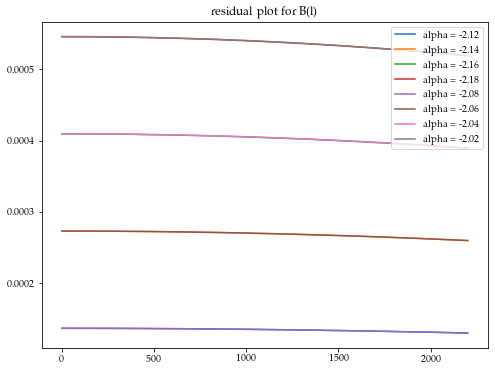

In [133]:
array21 = np.array(Bell21)
array212 = np.array(Bell212)
array214 = np.array(Bell214)
array216 = np.array(Bell216)
array218 = np.array(Bell218)
array208 = np.array(Bell208)
array206 = np.array(Bell206)
array204 = np.array(Bell204)
array202 = np.array(Bell202)

residual212 = (array212-array21)/array21
residual214 = (array214-array21)/array21
residual216 = (array216-array21)/array21
residual218 = (array218-array21)/array21
residual208 = (array208-array21)/array21
residual206 = (array206-array21)/array21
residual204 = (array204-array21)/array21
residual202 = (array202-array21)/array21

plt.plot(lvalues, np.abs(residual212), label = 'alpha = -2.12')
plt.plot(lvalues, np.abs(residual214), label = 'alpha = -2.14')
plt.plot(lvalues, np.abs(residual216), label = 'alpha = -2.16')
plt.plot(lvalues, np.abs(residual218), label = 'alpha = -2.18')
plt.plot(lvalues, np.abs(residual208), label = 'alpha = -2.08')
plt.plot(lvalues, np.abs(residual206), label = 'alpha = -2.06')
plt.plot(lvalues, np.abs(residual204), label = 'alpha = -2.04')
plt.plot(lvalues, np.abs(residual202), label = 'alpha = -2.02')

#plt.ylim([1, 2])
#plt.xlim([50,100])
#plt.yscale("log")
plt.title("residual plot for B(l)")
plt.legend()
plt.show()


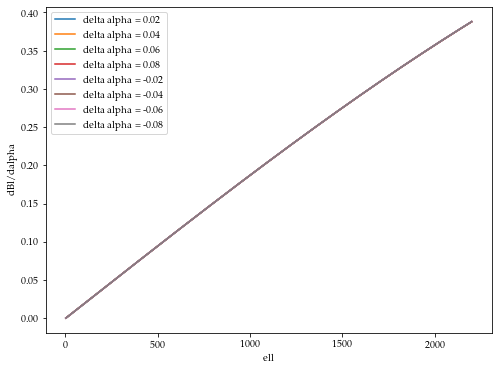

In [134]:
# manual deriv for delta Bl


deriv212 = []
deriv214 = []
deriv216 = []
deriv218 = []
deriv208 = []
deriv206 = []
deriv204 = []
deriv202 = []
deriv20 = []

for n in range(np.size(lvalues)):
    deriv212.append((Bell212[n]-Bell21[n])/.02)

    
for n in range(np.size(lvalues)):
    deriv214.append((Bell214[n]-Bell21[n])/.04)
    
    
for n in range(np.size(lvalues)):
    deriv216.append((Bell216[n]-Bell21[n])/.06)
    
    
for n in range(np.size(lvalues)):
    deriv218.append((Bell218[n]-Bell21[n])/.08)
    
    
for n in range(np.size(lvalues)):
    deriv208.append((Bell208[n]-Bell21[n])/-.02)
    
    
for n in range(np.size(lvalues)):
    deriv206.append((Bell206[n]-Bell21[n])/-.04)
    
    
for n in range(np.size(lvalues)):
    deriv204.append((Bell204[n]-Bell21[n])/-.06)
    
    
for n in range(np.size(lvalues)):
    deriv202.append((Bell202[n]-Bell21[n])/-.08)
    
  


plt.plot(lvalues, deriv212, label = "delta alpha = 0.02")
plt.plot(lvalues, deriv214, label = "delta alpha = 0.04")
plt.plot(lvalues, deriv216, label = "delta alpha = 0.06")
plt.plot(lvalues, deriv218, label = "delta alpha = 0.08")
plt.plot(lvalues, deriv208, label = "delta alpha = -0.02")
plt.plot(lvalues, deriv206, label = "delta alpha = -0.04")
plt.plot(lvalues, deriv204, label = "delta alpha = -0.06")
plt.plot(lvalues, deriv202, label = "delta alpha = -0.08")
plt.legend()
plt.xlabel("ell")
plt.ylabel("dBl/dalpha")
plt.show()

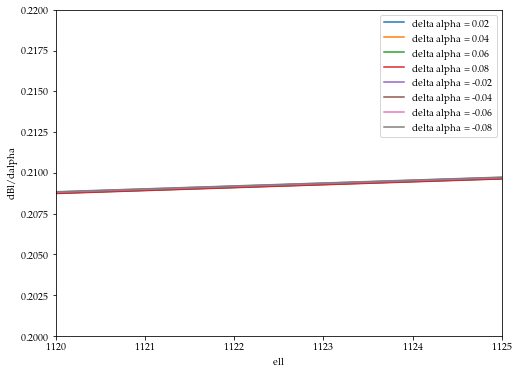

In [138]:
plt.plot(lvalues, deriv212, label = "delta alpha = 0.02")
plt.plot(lvalues, deriv214, label = "delta alpha = 0.04")
plt.plot(lvalues, deriv216, label = "delta alpha = 0.06")
plt.plot(lvalues, deriv218, label = "delta alpha = 0.08")
plt.plot(lvalues, deriv208, label = "delta alpha = -0.02")
plt.plot(lvalues, deriv206, label = "delta alpha = -0.04")
plt.plot(lvalues, deriv204, label = "delta alpha = -0.06")
plt.plot(lvalues, deriv202, label = "delta alpha = -0.08")
plt.legend()
plt.xlabel("ell")
plt.ylabel("dBl/dalpha")
plt.xlim([1120,1125])
plt.ylim([0.2,0.22])
plt.show()


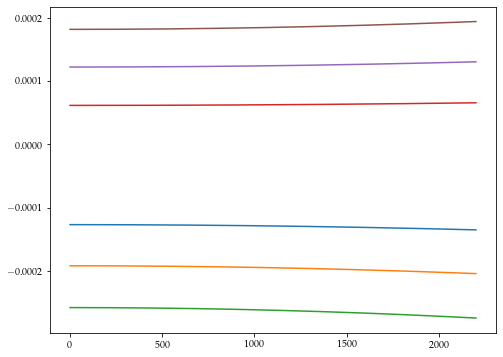

In [140]:
#residual 

res212 = np.array(deriv212)
res214 = np.array(deriv214)
res216 = np.array(deriv216)
res208 = np.array(deriv208)
res206 = np.array(deriv206)
res204 = np.array(deriv204)
res202 = np.array(deriv202)

res1 = (res212-res208)/res208
res2 = (res214-res208)/res208
res3 = (res216-res208)/res208
res4 = (res206-res208)/res208
res5 = (res204-res208)/res208
res6 = (res202-res208)/res208

plt.plot(lvalues, res1)
plt.plot(lvalues, res2)
plt.plot(lvalues, res3)
plt.plot(lvalues, res4)
plt.plot(lvalues, res5)
plt.plot(lvalues, res6)
plt.show()

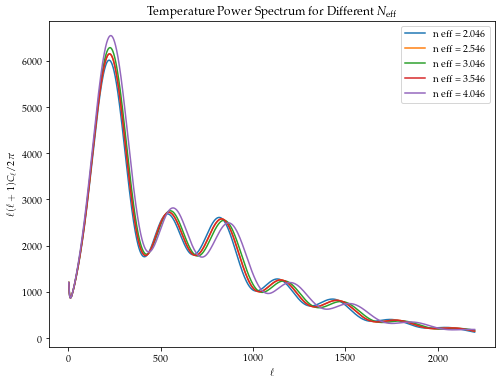

In [317]:
import matplotlib.pyplot as plt
import csv
import numpy as np

L = []
TT1 = []
TT2 = []
TT3 = []
TT4 = []
TT5 = []

for line in open('/Users/rosiesilvers/Documents/camb_neff_2046.txt','r'):
  values = [float(s) for s in line.split()]
  L.append(values[0])
  TT1.append(values[1])

for line in open('/Users/rosiesilvers/Documents/neff_2546.txt','r'):
  values = [float(s) for s in line.split()]
  TT2.append(values[1])

for line in open('/Users/rosiesilvers/Documents/neff_3046.txt','r'):
  values = [float(s) for s in line.split()]
  TT3.append(values[1])

for line in open('/Users/rosiesilvers/Documents/neff_3546.txt','r'):
  values = [float(s) for s in line.split()]
  TT4.append(values[1])
    
for line in open('/Users/rosiesilvers/Documents/neff_4046.txt','r'):
  values = [float(s) for s in line.split()]
  TT5.append(values[1])
    

plt.plot(L,TT1, label='n eff = 2.046')
plt.plot(L,TT2, label='n eff = 2.546')
plt.plot(L,TT3, label='n eff = 3.046')
plt.plot(L,TT2, label='n eff = 3.546')
plt.plot(L,TT5, label='n eff = 4.046')

plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell + 1) C_{\ell} / 2\pi$')
plt.title('Temperature Power Spectrum for Different ' + r'$N_{\rm eff}$')
plt.legend()
plt.savefig('powerspecneff.pdf')
plt.show()

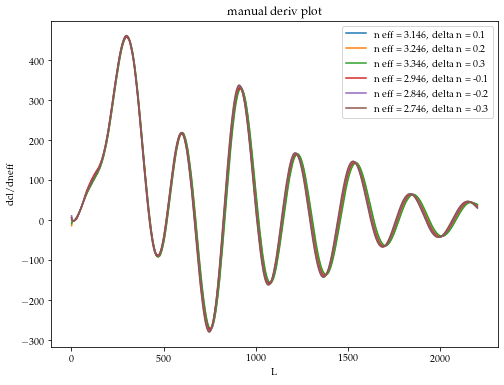

In [141]:
# cl neff manual derivative

import matplotlib.pyplot as plt
import csv
import numpy as np

L = []
cl_central = []

cl_3146 = []
dcl_3146 = []
deriv_3146 = []
cl_3246 = []
dcl_3246 = []
deriv_3246 = []
cl_3346 = []
dcl_3346 = []
deriv_3346 = []
cl_2946 = []
dcl_2946 = []
deriv_2946 = []
cl_2846 = []
dcl_2846 = []
deriv_2846 = []
cl_2746 = []
dcl_2746 = []
deriv_2746 = []

for line in open('/Users/rosiesilvers/Documents/Thesis/camb_neff_3046.txt','r'):
    values = [float(s) for s in line.split()]
    L.append(values[0])
    cl_central.append(values[1])

    
num = 0
for line in open('/Users/rosiesilvers/Documents/Thesis/camb_neff_3146.txt','r'):
    values = [float(s) for s in line.split()]
    cl_3146.append(values[1])
    dcl_3146.append(cl_3146[num] - cl_central[num])
    deriv_3146.append(dcl_3146[num]/0.1)
    num = num + 1
    
num = 0
for line in open('/Users/rosiesilvers/Documents/Thesis/camb_neff_3246.txt','r'):
    values = [float(s) for s in line.split()]
    cl_3246.append(values[1])
    dcl_3246.append(cl_3246[num] - cl_central[num])
    deriv_3246.append(dcl_3246[num]/0.2)
    num = num + 1
    
num = 0
for line in open('/Users/rosiesilvers/Documents/Thesis/camb_neff_3346.txt','r'):
    values = [float(s) for s in line.split()]
    cl_3346.append(values[1])
    dcl_3346.append(cl_3346[num] - cl_central[num])
    deriv_3346.append(dcl_3346[num]/0.3)
    num = num + 1
    
num = 0
for line in open('/Users/rosiesilvers/Documents/Thesis/camb_neff_2946.txt','r'):
    values = [float(s) for s in line.split()]
    cl_2946.append(values[1])
    dcl_2946.append(cl_2946[num] - cl_central[num])
    deriv_2946.append(dcl_2946[num]/-0.1)
    num = num + 1
    
num = 0
for line in open('/Users/rosiesilvers/Documents/Thesis/camb_neff_2846.txt','r'):
    values = [float(s) for s in line.split()]
    cl_2846.append(values[1])
    dcl_2846.append(cl_2846[num] - cl_central[num])
    deriv_2846.append(dcl_2846[num]/-0.2)
    num = num + 1

num = 0
for line in open('/Users/rosiesilvers/Documents/Thesis/camb_neff_2746.txt','r'):
    values = [float(s) for s in line.split()]
    cl_2746.append(values[1])
    dcl_2746.append(cl_2746[num] - cl_central[num])
    deriv_2746.append(dcl_2746[num]/-0.3)
    num = num + 1
    

plt.plot(L,deriv_3146, label='n eff = 3.146, delta n = 0.1')
plt.plot(L,deriv_3246, label='n eff = 3.246, delta n = 0.2')
plt.plot(L,deriv_3346, label='n eff = 3.346, delta n = 0.3')
plt.plot(L,deriv_2946, label='n eff = 2.946, delta n = -0.1')
plt.plot(L,deriv_2846, label='n eff = 2.846, delta n = -0.2')
plt.plot(L,deriv_2746, label='n eff = 2.746, delta n = -0.3')

plt.xlabel('L')
plt.ylabel('dcl/dneff')
plt.title('manual deriv plot')
#plt.xlim([200,210])
#plt.ylim([200,250])
plt.legend()

plt.show()
#print(deriv_3146)

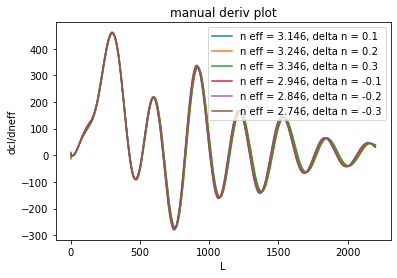

In [5]:
plt.plot(L,deriv_3146, label='n eff = 3.146, delta n = 0.1')
plt.plot(L,deriv_3246, label='n eff = 3.246, delta n = 0.2')
plt.plot(L,deriv_3346, label='n eff = 3.346, delta n = 0.3')
plt.plot(L,deriv_2946, label='n eff = 2.946, delta n = -0.1')
plt.plot(L,deriv_2846, label='n eff = 2.846, delta n = -0.2')
plt.plot(L,deriv_2746, label='n eff = 2.746, delta n = -0.3')

plt.xlabel('L')
plt.ylabel('dcl/dneff')
plt.title('manual deriv plot')
#plt.yscale('log')
#plt.xscale('log')
#plt.xlim([200,210])
#plt.ylim([200,250])
plt.legend()

plt.show()


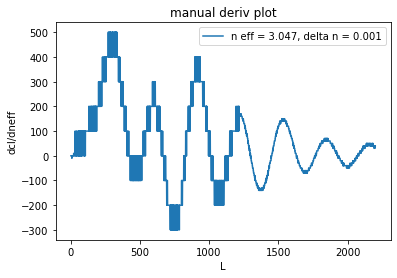

In [6]:
cl_3047 = []
dcl_3047 = []
deriv_3047 = []

num = 0
for line in open('/Users/rosiesilvers/Documents/Thesis/camb_neff_3047.txt','r'):
    values = [float(s) for s in line.split()]
    cl_3047.append(values[1])
    dcl_3047.append(cl_3047[num] - cl_central[num])
    deriv_3047.append(dcl_3047[num]/0.001)
    num = num + 1
    
plt.plot(L,deriv_3047, label='n eff = 3.047, delta n = 0.001')
plt.xlabel('L')
plt.ylabel('dcl/dneff')
plt.title('manual deriv plot')
#plt.xlim([200,210])
#plt.ylim([200,250])
plt.legend()

plt.show()

/var/folders/2w/zf6pxlvs2y1798_1xxp9wnd00000gn/T/ipykernel_35045/156699987.py:7: RuntimeWarning: divide by zero encountered in true_divide
  residual1 = ((d1-d2)/d2)
/var/folders/2w/zf6pxlvs2y1798_1xxp9wnd00000gn/T/ipykernel_35045/156699987.py:8: RuntimeWarning: divide by zero encountered in true_divide
  residual2 = ((d3-d2)/d2)
/var/folders/2w/zf6pxlvs2y1798_1xxp9wnd00000gn/T/ipykernel_35045/156699987.py:8: RuntimeWarning: invalid value encountered in true_divide
  residual2 = ((d3-d2)/d2)


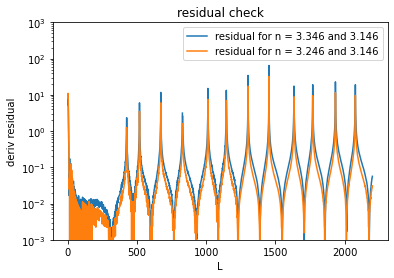

In [8]:
residual1 = []
residual2 = []

d1 = np.array(deriv_3346)
d2 = np.array(deriv_3146)
d3 = np.array(deriv_3246)
residual1 = ((d1-d2)/d2)
residual2 = ((d3-d2)/d2)
    
plt.plot(L,np.abs(residual1), label = "residual for n = 3.346 and 3.146")
plt.plot(L,np.abs(residual2), label = "residual for n = 3.246 and 3.146")
plt.xlabel('L')
plt.ylabel('deriv residual')
plt.title('residual check')
plt.legend()
plt.yscale("log")
plt.ylim([10.e-4, 10.e2])

plt.show()

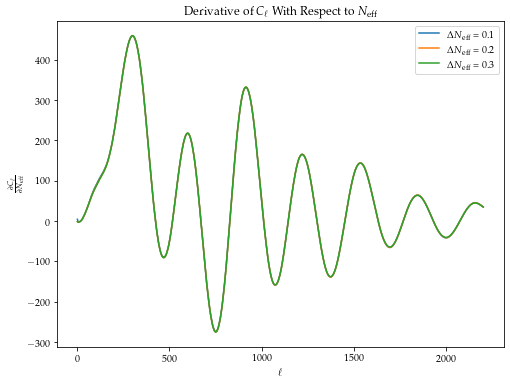

In [325]:
# cl neff manual derivative with two point stencil

import matplotlib.pyplot as plt
import csv
import numpy as np

L = []
cl_central = []

cl_3146 = []
cl_2946 = []
deriv1 = []
cl_3246 = []
cl_2846 = []
deriv2 = []
cl_3346 = []
cl_2746 = []
deriv3 = []


for line in open('/Users/rosiesilvers/Documents/Thesis/camb_neff_3046.txt','r'):
    values = [float(s) for s in line.split()]
    L.append(values[0])
    cl_central.append(values[1])

    
for line in open('/Users/rosiesilvers/Documents/Thesis/camb_neff_3146.txt','r'):
    values = [float(s) for s in line.split()]
    cl_3146.append(values[1])

for line in open('/Users/rosiesilvers/Documents/Thesis/camb_neff_2946.txt','r'):
    values = [float(s) for s in line.split()]
    cl_2946.append(values[1])

for n in range(np.size(L)):
    deriv1.append((cl_3146[n]-cl_2946[n])/(2*0.1))


for line in open('/Users/rosiesilvers/Documents/Thesis/camb_neff_3246.txt','r'):
    values = [float(s) for s in line.split()]
    cl_3246.append(values[1])
    
for line in open('/Users/rosiesilvers/Documents/Thesis/camb_neff_2846.txt','r'):
    values = [float(s) for s in line.split()]
    cl_2846.append(values[1])
    
for n in range(np.size(L)):
    deriv2.append((cl_3246[n]-cl_2846[n])/(2*0.2))


for line in open('/Users/rosiesilvers/Documents/Thesis/camb_neff_3346.txt','r'):
    values = [float(s) for s in line.split()]
    cl_3346.append(values[1])


for line in open('/Users/rosiesilvers/Documents/Thesis/camb_neff_2746.txt','r'):
    values = [float(s) for s in line.split()]
    cl_2746.append(values[1])
    
for n in range(np.size(L)):
    deriv3.append((cl_3346[n]-cl_2746[n])/(2*0.3))
    

plt.plot(L,deriv1, label= r'$\Delta N_{\rm eff}$' + ' = 0.1')
plt.plot(L,deriv2, label=r'$\Delta N_{\rm eff}$' + ' = 0.2')
plt.plot(L,deriv3, label=r'$\Delta N_{\rm eff}$' + ' = 0.3')

plt.xlabel('L')
plt.ylabel('dcl/dneff')
plt.title("Derivative of " + r'$C_{\ell}$' + " With Respect to "  r'$N_{\rm eff}$')
plt.ylabel(r'$\frac{ \partial C_{\ell}}{\partial N_{\rm eff}}$')
plt.xlabel(r'$\ell$')
plt.legend()

plt.savefig('dcldnefffig.pdf')
plt.show()


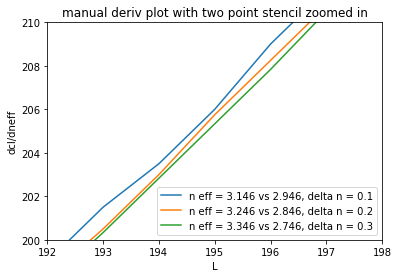

In [10]:
plt.plot(L,deriv1, label='n eff = 3.146 vs 2.946, delta n = 0.1')
plt.plot(L,deriv2, label='n eff = 3.246 vs 2.846, delta n = 0.2')
plt.plot(L,deriv3, label='n eff = 3.346 vs 2.746, delta n = 0.3')

plt.xlabel('L')
plt.ylabel('dcl/dneff')
plt.title('manual deriv plot with two point stencil zoomed in')
plt.ylim([200,210])
plt.xlim([192,198])
plt.legend()
#plt.yscale('log')
plt.show()


/var/folders/2w/zf6pxlvs2y1798_1xxp9wnd00000gn/T/ipykernel_35045/2078197288.py:4: RuntimeWarning: divide by zero encountered in true_divide
  residual3 = ((d1-d2)/d2)
/var/folders/2w/zf6pxlvs2y1798_1xxp9wnd00000gn/T/ipykernel_35045/2078197288.py:5: RuntimeWarning: invalid value encountered in true_divide
  residual4 = ((d3-d2)/d2)


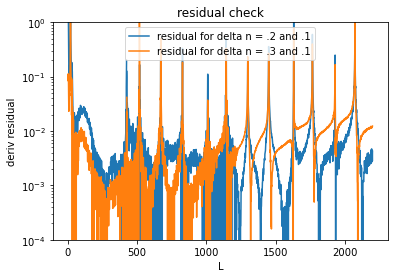

In [15]:
d1 = np.array(deriv1)
d2 = np.array(deriv2)
d3 = np.array(deriv3)
residual3 = ((d1-d2)/d2)
residual4 = ((d3-d2)/d2)
    
plt.plot(L,np.abs(residual3), label = "residual for delta n = .2 and .1")
plt.plot(L,np.abs(residual4), label = "residual for delta n = .3 and .1")
plt.xlabel('L')
plt.ylabel('deriv residual')
plt.title('residual check')
plt.legend()
plt.yscale("log")
plt.ylim([10.e-5,1])

plt.show()

In [13]:
#First Fisher Calculation !!
sigmaclsquared = []
Ftest = 0
for n in range(np.size(L)):
    sigmaclsquared.append(2*((cl_central[n])**2)/(2*n +1))
    
for n in range(np.size(L)):
    Ftest = Ftest + (1/sigmaclsquared[n])*(deriv_3146[n]**2)

print(Ftest)

sigmaNeff = np.sqrt(1/Ftest)
print(sigmaNeff)
    

50024.652897610584
0.004471033851435541


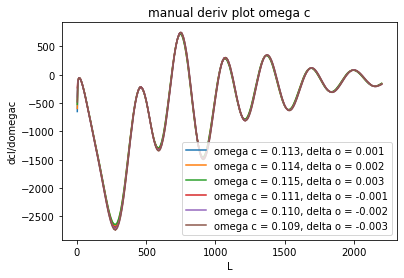

In [14]:
# cl omega c manual derivative

import matplotlib.pyplot as plt
import csv
import numpy as np

num = 0
L = []
cl_112 = []

cl_113 = []
dcl_113 = []
deriv_113 = []
cl_114 = []
dcl_114 = []
deriv_114 = []
cl_115 = []
dcl_115 = []
deriv_115 = []
cl_111 = []
dcl_111 = []
deriv_111 = []
cl_110 = []
dcl_110 = []
deriv_110 = []
cl_109 = []
dcl_109 = []
deriv_109 = []

for line in open('/Users/rosiesilvers/Documents/Thesis/camb_omega_112.txt','r'):
    values = [float(s) for s in line.split()]
    L.append(values[0])
    cl_112.append(values[1])

    
num = 0
for line in open('/Users/rosiesilvers/Documents/Thesis/camb_omega_113.txt','r'):
    values = [float(s) for s in line.split()]
    cl_113.append(values[1])
    dcl_113.append(cl_113[num] - cl_112[num])
    deriv_113.append(dcl_113[num]/0.01)
    num = num + 1
    
num = 0
for line in open('/Users/rosiesilvers/Documents/Thesis/camb_omega_114.txt','r'):
    values = [float(s) for s in line.split()]
    cl_114.append(values[1])
    dcl_114.append(cl_114[num] - cl_112[num])
    deriv_114.append(dcl_114[num]/0.02)
    num = num + 1
    
num = 0
for line in open('/Users/rosiesilvers/Documents/Thesis/camb_omega_115.txt','r'):
    values = [float(s) for s in line.split()]
    cl_115.append(values[1])
    dcl_115.append(cl_115[num] - cl_112[num])
    deriv_115.append(dcl_115[num]/0.03)
    num = num + 1
    
num = 0
for line in open('/Users/rosiesilvers/Documents/Thesis/camb_omega_111.txt','r'):
    values = [float(s) for s in line.split()]
    cl_111.append(values[1])
    dcl_111.append(cl_111[num] - cl_112[num])
    deriv_111.append(dcl_111[num]/-0.01)
    num = num + 1
    
num = 0
for line in open('/Users/rosiesilvers/Documents/Thesis/camb_omega_110.txt','r'):
    values = [float(s) for s in line.split()]
    cl_110.append(values[1])
    dcl_110.append(cl_110[num] - cl_112[num])
    deriv_110.append(dcl_110[num]/-0.02)
    num = num + 1

num = 0
for line in open('/Users/rosiesilvers/Documents/Thesis/camb_omega_109.txt','r'):
    values = [float(s) for s in line.split()]
    cl_109.append(values[1])
    dcl_109.append(cl_109[num] - cl_112[num])
    deriv_109.append(dcl_109[num]/-0.03)
    num = num + 1
    

plt.plot(L,deriv_113, label='omega c = 0.113, delta o = 0.001')
plt.plot(L,deriv_114, label='omega c = 0.114, delta o = 0.002')
plt.plot(L,deriv_115, label='omega c = 0.115, delta o = 0.003')
plt.plot(L,deriv_111, label='omega c = 0.111, delta o = -0.001')
plt.plot(L,deriv_110, label='omega c = 0.110, delta o = -0.002')
plt.plot(L,deriv_109, label='omega c = 0.109, delta o = -0.003')

plt.xlabel('L')
plt.ylabel('dcl/domegac')
plt.title('manual deriv plot omega c')
#plt.xlim([200,210])
#plt.ylim([200,250])
plt.legend()

plt.show()
#print(deriv_3146)

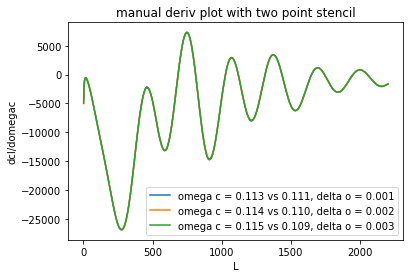

In [15]:
# cl omega c manual derivative with two point stencil

import matplotlib.pyplot as plt
import csv
import numpy as np

stencil1 = []
stencil2 = []
stencil3 = []



    
for n in range(np.size(L)):
    stencil1.append((cl_113[n]-cl_111[n])/(2*0.001))

for n in range(np.size(L)):
    stencil2.append((cl_114[n]-cl_110[n])/(2*0.002))
    
for n in range(np.size(L)):
    stencil3.append((cl_115[n]-cl_109[n])/(2*0.003))
    

plt.plot(L,stencil1, label='omega c = 0.113 vs 0.111, delta o = 0.001')
plt.plot(L,stencil2, label='omega c = 0.114 vs 0.110, delta o = 0.002')
plt.plot(L,stencil3, label='omega c = 0.115 vs 0.109, delta o = 0.003')

plt.xlabel('L')
plt.ylabel('dcl/domegac')
plt.title('manual deriv plot with two point stencil')
plt.legend()

plt.show()


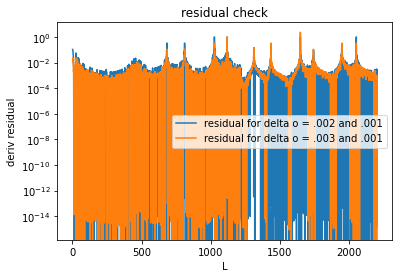

In [16]:
a1 = np.array(stencil1)
a2 = np.array(stencil2)
a3 = np.array(stencil3)
residual5 = ((a1-a2)/a2)
residual6 = ((a3-a2)/a2)
    
plt.plot(L,np.abs(residual5), label = "residual for delta o = .002 and .001")
plt.plot(L,np.abs(residual6), label = "residual for delta o = .003 and .001")
plt.xlabel('L')
plt.ylabel('deriv residual')
plt.title('residual check')
plt.legend()
plt.yscale("log")

plt.show()

In [17]:
#Second Fisher Calculation !!
sigmaclsquared = []
F00 = 0
F10 = 0
F01 = 0
F11 = 0

for n in range(np.size(L)):
    sigmaclsquared.append(2*((cl_central[n])**2)/(2*n +1))
    
for n in range(np.size(L)):
    F00 = F00 + (1/sigmaclsquared[n])*(deriv1[n]**2)

for n in range(np.size(L)):
    F11 = F11 + (1/sigmaclsquared[n])*(stencil1[n]**2)

for n in range(np.size(L)):
    F01 = F01 + (1/sigmaclsquared[n])*(deriv1[n])*(stencil1[n])
    
for n in range(np.size(L)):
    F10 = F10 + (1/sigmaclsquared[n])*(stencil1[n])*(deriv1[n])
    

Omatrix = np.array([[F00, F10],[F01, F11]])
print(Omatrix)

Ocovariance = np.linalg.inv(Omatrix)
print(Ocovariance)

sigmaneff = np.sqrt(3.19127240e-07)
sigmaO = np.sqrt(1.78485848e-10)
sigmaxy = np.sqrt(3.15437925e-06)

print(sigmaneff, sigmaO, sigmaxy)


[[ 4.91699055e+04 -1.92664310e+06]
 [-1.92664310e+06  8.79142876e+07]]
[[1.43936884e-04 3.15437925e-06]
 [3.15437925e-06 8.05029898e-08]]
0.0005649134801011568 1.3359859580100384e-05 0.0017760572203620018


0.0017762168803846267 0.0017758975746587785
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 3.0502315808198754, 3.0537202379559805, 3.056040223989747, 3.057895919975471, 3.0594803933825303, 3.0608805137625623, 3.0621443048310466, 3.0633016596993317, 3.0643726991357956, 3.0653717421617475, 3.066309414095944, 3.067193860508276, 3.068031491224752, 

/var/folders/2w/zf6pxlvs2y1798_1xxp9wnd00000gn/T/ipykernel_26551/2877532271.py:16: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(pa+pb- (2*(j-yellipse[n])**2)+ ((-pa+pb)*np.cos(2*rot)))+ \


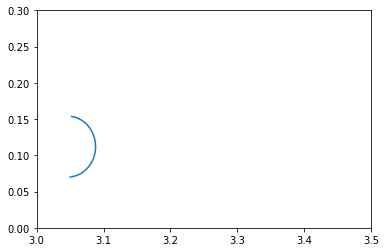

In [18]:
import math
pa = ((sigmaneff**2 + sigmaO**2)/2)+(np.sqrt((((sigmaneff**2 - sigmaO**2)**2)/4)+sigmaxy**2)) #a**2
pb = -(((sigmaneff**2 + sigmaO**2)/2)-(np.sqrt((((sigmaneff**2 - sigmaO**2)**2)/4)+sigmaxy**2))) #b**2
rot =  (math.atan((2*sigmaxy)/(sigmaneff**2 - sigmaO**2)))/2
#omegac = np.linspace(-.002, .002, 100)
#neff = parameter*(np.sqrt(1-((yellipse**2)/(parameter**2))))
j = 0.112 #j
i = 3.046 #i

xellipse = []
yellipse = np.linspace(0,.5,1000)
for n in range(np.size(yellipse)):
    xellipse.append(\
                   (\
                    2*pb*i*(np.cos(rot)**2)+ np.sqrt(pa)*(np.sqrt(2)*np.sqrt(pb)* \
                                                          np.sqrt(pa+pb- (2*(j-yellipse[n])**2)+ ((-pa+pb)*np.cos(2*rot)))+ \
                                                          2*np.sqrt(pa)*i*(np.sin(rot)**2) )- \
                    (np.sqrt(pa)-np.sqrt(pb))*(np.sqrt(pa)+np.sqrt(pb))* \
                    (j-yellipse[n])*(np.sin(2*rot)))/ (2*(pb*(np.cos(rot)**2)+pa*(np.sin(rot)**2))))

print(pa, pb)
print(xellipse)
plt.xlim(3, 3.5)
plt.ylim(0,.3)
plt.plot(xellipse, yellipse)

2199
2199


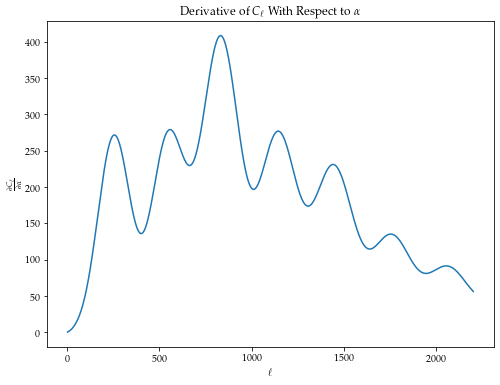

In [321]:
#computing dcl/dalpha
print(np.size(L))
print(np.size(deriv214))

#testL = np.linspace(0,1000,1000)
def Blg(ell):
    return np.exp(-1/2*ell*(ell+1)*(sigma**2))


dcldalpha = []

for n in range(np.size(L)):
    dcldalpha.append(deriv214[n]*(cl_central[n]/Blg(n)))
    
plt.plot(L,dcldalpha)
plt.title("Derivative of " + r'$C_{\ell}$' + " With Respect to "  r'$\alpha$')
plt.ylabel(r'$\frac{ \partial C_{\ell}}{\partial \alpha}$')
plt.xlabel(r'$\ell$')
plt.savefig('dcldalphafig.pdf')
plt.show()

#current issue: Bl functions go to ell = 10,000 but with 1000 values, cl data goes to ell = 2199 with 2199 values 
#really don't want to run Bl stuff again
#currently what this is doing is only plotting up to ell = 1000

In [179]:
sigmaclsquared = []
# a = dcl/dalpha b = dcl/dneff
Faa = 0
Fab = 0
Fba = 0
Fbb = 0

print(np.size(deriv1))
print(np.size(cl_central))

for n in range(0,2199):
    sigmaclsquared.append(2*((cl_central[n])**2)/(2*(n+1)+1))
    #print(deriv1[n])
    #print(2*((cl_central[n])**2)/(2*n +1))

print(np.size(sigmaclsquared))
for n in range(0,2199):
    Faa = Faa + (1/sigmaclsquared[n])*(deriv1[n]**2)
    #print(Faa)
    

for n in range(0,2199):
    Fbb = Fbb + (1/sigmaclsquared[n])*(dcldalpha[n]**2)

for n in range(0,2199):
    Fab = Fab + (1/sigmaclsquared[n])*(deriv1[n])*(dcldalpha[n])
    
for n in range(0,2199):
    Fba = Fba + (1/sigmaclsquared[n])*(dcldalpha[n])*(deriv1[n])
    
matrix = np.array([[Faa, Fba],[Fab, Fbb]])
print("Fisher Matrix (ab) for a --> alpha, b --> Neff")
print(matrix)

print("Covariance Matrix")
covariance = np.linalg.inv(matrix)
print(covariance)

print("sigma for alpha, neff, and ab respectively")
sigmaa = np.sqrt(0.00024135)
sigmab = np.sqrt(0.00069096)
sigmaab = np.sqrt(0.00019459)
print(sigmaa, sigmab, sigmaab)

2199
2199
2199
Fisher Matrix (ab) for a --> alpha, b --> Neff
[[ 49203.2156579   27845.26278729]
 [ 27845.26278729 210929.76750526]]
Covariance Matrix
[[ 2.19648399e-05 -2.89962269e-06]
 [-2.89962269e-06  5.12369955e-06]]
sigma for alpha, neff, and ab respectively
0.015535443347391152 0.026286118009321954 0.013949551964131321


In [193]:
correlation = 27845.26278729/(np.sqrt(49203.2156579*210929.76750526))
print(correlation)

0.2733289546887392


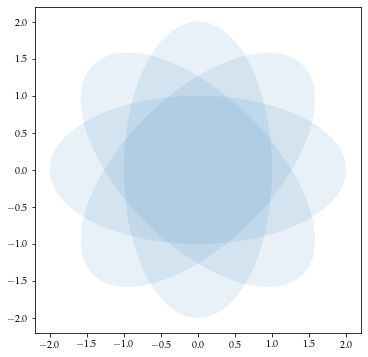

In [150]:
# example ellipse code
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse


angle_step = 45  # degrees
angles = np.arange(0, 180, angle_step)

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})

for angle in angles:
    ellipse = Ellipse((0, 0), 4, 2, angle=angle, alpha=0.1)
    ax.add_artist(ellipse)

ax.set_xlim(-2.2, 2.2)
ax.set_ylim(-2.2, 2.2)

plt.show()

0.014417518277043035
0.013485208277043036
0.12007297063470627 0.11612582949991374


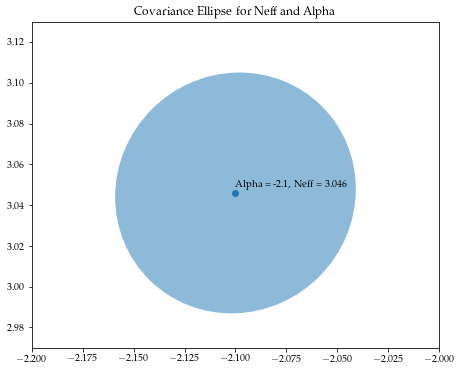

In [109]:
#actual ellipse
pa = ((sigmaa**2 + sigmab**2)/2)+(np.sqrt((((sigmaa**2 - sigmab**2)**2)/4)+sigmaab**2)) #a**2
pb = -(((sigmaa**2 + sigmab**2)/2)-(np.sqrt((((sigmaa**2 - sigmab**2)**2)/4)+sigmaab**2))) #b**2
rot =  (math.atan((2*sigmaab)/(sigmaa**2 - sigmab**2)))/2
rot_deg = rot*(180/math.pi)

print(pa)
print(pb)
length = math.sqrt(pa)
width = math.sqrt(pb)
print(length,width)
fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})

ellipse = Ellipse((-2.1, 3.046), width, length, angle=rot_deg, alpha=.5)
ax.add_artist(ellipse)

ax.set_xlim(-2.2, -2)
ax.set_ylim(2.97, 3.13)
plt.scatter(-2.1,3.046)
plt.text(-2.1,3.049, "Alpha = -2.1, Neff = 3.046")
plt.title("Covariance Ellipse for Neff and Alpha")
plt.show()

#ellipse.get_center()

In [59]:
print(rot)

-0.7773410751799086


In [240]:
f_sky = 1
nlev = 1
th_fwhm_rad=FWHM_rad
#list of cl's is "cl_central"

def get_inv_covar_tonly(L,Cl_tt,f_sky,nlev,th_fwhm):
    conv=np.pi/(60.*180.)
    nl_tt=np.power(nlev*conv,2.e0)
    fac=8.e0*np.log(2.e0)
    bfac=np.exp(L*(L+1)*np.power(th_fwhm_rad,2.e0)/fac)
    #for n in range(np.size(cl_central)):
        #Cl_tt_obs.append(cl_central[n]+nl_tt*bfac)
    Cl_tt_obs=Cl_tt+nl_tt*bfac #this is treating Cl as one number when really its a list? should i do a nested loop here?
    #print(L,Cl_tt,nl_tt,bfac)
    return f_sky*(2*L+1)*0.5/np.power(Cl_tt_obs,2.e0)
def get_inv_covar_eonly(L,Cl_ee,f_sky,nlev,th_fwhm):
    conv=np.pi/(60.*180.)
    nl_ee=2.e0*np.power(nlev*conv,2.e0)
    fac=8.e0*np.log(2.e0)
    bfac=np.exp(L*(L+1)*np.power(th_fwhm_rad,2.e0)/fac)
    Cl_ee_obs=Cl_ee+nl_ee*bfac
    return f_sky*(2*L+1)*0.5/np.power(Cl_ee_obs,2.e0)

In [241]:
#fisher with noise

# a = dcl/dalpha b = dcl/dneff
Faa1 = 0
Fab1 = 0
Fba1 = 0
Fbb1 = 0
    
print(Fbb1)

0


In [242]:
for n in range(1,2199):
    Faa1 = Faa1 + (get_inv_covar_tonly(n,cl_central[n]/(n*(n+1)),f_sky,nlev,FWHM))*((deriv1[n]/(n*(n+1)))**2)
    #print(Faa1)

for n in range(1,2199):
    Fbb1 = Fbb1 + (get_inv_covar_tonly(n,cl_central[n]/(n*(n+1)),f_sky,nlev,FWHM))*((dcldalpha[n]/(n*(n+1)))**2)

for n in range(1,2199):
    Fab1 = Fab1 + (get_inv_covar_tonly(n,cl_central[n]/(n*(n+1)),f_sky,nlev,FWHM))*(deriv1[n]/(n*(n+1)))*(dcldalpha[n]/(n*(n+1)))
    
for n in range(1,2199):
    Fba1 = Fba1 + (get_inv_covar_tonly(n,cl_central[n]/(n*(n+1)),f_sky,nlev,FWHM))*(dcldalpha[n]/(n*(n+1)))*(deriv1[n]/(n*(n+1)))
    
matrix1 = np.array([[Faa1, Fba1],[Fab1, Fbb1]])
print("Fisher Matrix (ab) for a --> alpha, b --> Neff")
print(matrix1)
print(Faa1)

print("old covariance")
print(covariance)

print("Covariance Matrix")
covariance1 = np.linalg.inv(matrix1)
print(covariance1)

print(Faa1)

print(get_inv_covar_tonly(n,cl_central[2],f_sky,nlev,FWHM))
print(1/sigmaclsquared[2])

Fisher Matrix (ab) for a --> alpha, b --> Neff
[[ 49056.03762301  27725.79720022]
 [ 27725.79720022 210296.03934026]]
49056.03762300845
old covariance
[[ 2.19648399e-05 -2.89962269e-06]
 [-2.89962269e-06  5.12369955e-06]]
Covariance Matrix
[[ 2.20261309e-05 -2.90396357e-06]
 [-2.90396357e-06  5.13806493e-06]]
49056.03762300845
0.0019994325736677893
3.183085744435903e-06


In [243]:
correlation2 = 12280.48185881/np.sqrt((28405.71185702*112752.55178329))
print(correlation2)

np.matmul(matrix1,covariance1)

0.21699482639034487


array([[1.00000000e+00, 0.00000000e+00],
       [1.11022302e-16, 1.00000000e+00]])

In [326]:
print("sigma for neff, alpha, and ab respectively")
sigmaa1 = np.sqrt(1.84718743e-05)
sigmab1 = np.sqrt(4.65361297e-06)
sigmaab1 = 2.01187036e-06
print(sigmaa1, sigmab1, sigmaab1)

sigma for neff, alpha, and ab respectively
0.004297891843683365 0.0021572234399801983 2.01187036e-06


8.117518138612176
1.8758833468478305e-05
-4.366653801521692e-06
0.00433114689989595 0.0020896539908610927


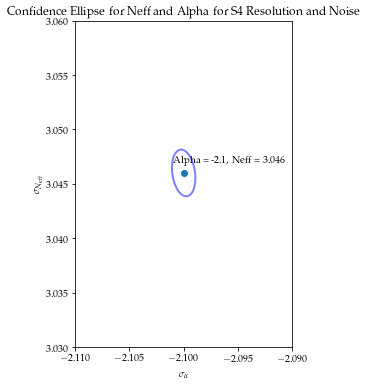

In [249]:
#actual ellipse with noise
pa1 = ((sigmaa1**2 + sigmab1**2)/2)+(np.sqrt((((sigmaa1**2 - sigmab1**2)**2)/4)+sigmaab1**2)) #a**2
pb1 = -(((sigmaa1**2 + sigmab1**2)/2)-(np.sqrt((((sigmaa1**2 - sigmab1**2)**2)/4)+sigmaab1**2))) #b**2
rot1 =  (math.atan((2*sigmaab1)/(sigmaa1**2 - sigmab1**2)))/2
rot_deg1 = rot1*(180/math.pi)
print(rot_deg1)

print(pa1)
print(pb1)
length1 = math.sqrt(pa1)
width1 = math.sqrt(np.absolute(pb1))
print(length1,width1)

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})

ellipse1 = Ellipse((-2.1, 3.046), width1, length1, angle=rot_deg1, alpha=.5, edgecolor='b', fc='None', lw=2)
ax.add_artist(ellipse1)

ax.set_xlim(-2.11, -2.09)
ax.set_ylim(3.03, 3.06)
plt.scatter(-2.1,3.046)
plt.ylabel(r'$\sigma_{N_{\rm eff}}$')
plt.xlabel(r'$\sigma_{\alpha}$')
plt.text(-2.101,3.047, "Alpha = -2.1, Neff = 3.046")
plt.title("Confidence Ellipse for Neff and Alpha for S4 Resolution and Noise")
plt.savefig('ellipseS4.pdf')
plt.show()


#ellipse.get_center()

In [229]:
#for planck

f_sky = 1
nlev = 20
th_fwhm_rad=0.00206531 #7.1 arcmin


def get_inv_covar_tonly(L,Cl_tt,f_sky,nlev,th_fwhm):
    conv=np.pi/(60.*180.)
    nl_tt=np.power(nlev*conv,2.e0)
    fac=8.e0*np.log(2.e0)
    bfac=np.exp(L*(L+1)*np.power(th_fwhm_rad,2.e0)/fac)
    #for n in range(np.size(cl_central)):
        #Cl_tt_obs.append(cl_central[n]+nl_tt*bfac)
    Cl_tt_obs=Cl_tt+nl_tt*bfac #this is treating Cl as one number when really its a list? should i do a nested loop here?
    #print(L,Cl_tt,nl_tt,bfac)
    return f_sky*(2*L+1)*0.5/np.power(Cl_tt_obs,2.e0)
def get_inv_covar_eonly(L,Cl_ee,f_sky,nlev,th_fwhm):
    conv=np.pi/(60.*180.)
    nl_ee=2.e0*np.power(nlev*conv,2.e0)
    fac=8.e0*np.log(2.e0)
    bfac=np.exp(L*(L+1)*np.power(th_fwhm_rad,2.e0)/fac)
    Cl_ee_obs=Cl_ee+nl_ee*bfac
    return f_sky*(2*L+1)*0.5/np.power(Cl_ee_obs,2.e0)


Faa2 = 0
Fab2 = 0
Fba2 = 0
Fbb2 = 0

for n in range(1,2199):
    Faa2 = Faa2 + (get_inv_covar_tonly(n,cl_central[n]/(n*(n+1)),f_sky,nlev,FWHM))*((deriv1[n]/(n*(n+1)))**2)
    #print(Faa1)

for n in range(1,2199):
    Fbb2 = Fbb2 + (get_inv_covar_tonly(n,cl_central[n]/(n*(n+1)),f_sky,nlev,FWHM))*((dcldalpha[n]/(n*(n+1)))**2)

for n in range(1,2199):
    Fab2 = Fab2 + (get_inv_covar_tonly(n,cl_central[n]/(n*(n+1)),f_sky,nlev,FWHM))*(deriv1[n]/(n*(n+1)))*(dcldalpha[n]/(n*(n+1)))
    
for n in range(1,2199):
    Fba2 = Fba2 + (get_inv_covar_tonly(n,cl_central[n]/(n*(n+1)),f_sky,nlev,FWHM))*(dcldalpha[n]/(n*(n+1)))*(deriv1[n]/(n*(n+1)))
    
matrix2 = np.array([[Faa2, Fba2],[Fab2, Fbb2]])
print("Fisher Matrix (ab) for a --> alpha, b --> Neff")
print(matrix2)
print(Faa2)

#print("old covariance")
#print(covariance)

print("Covariance Matrix")
covariance2 = np.linalg.inv(matrix2)
print(covariance2)

print(Faa2)

print(get_inv_covar_tonly(n,cl_central[2],f_sky,nlev,FWHM))
print(1/sigmaclsquared[2])



Fisher Matrix (ab) for a --> alpha, b --> Neff
[[13098.29227786  4218.7647756 ]
 [ 4218.7647756  39438.84318659]]
13098.2922778613
Covariance Matrix
[[ 7.90700608e-05 -8.45810781e-06]
 [-8.45810781e-06  2.62604753e-05]]
13098.2922778613
0.001999427258592736
3.183085744435903e-06


In [236]:
print("sigma for alpha, neff, and ab respectively")
sigmaa2 = np.sqrt(7.90700608e-05)
sigmab2 = np.sqrt(2.62604753e-05)
sigmaab2 = 8.45810781e-06
print(sigmaa2, sigmab2, sigmaab2)

sigma for alpha, neff, and ab respectively
0.008892134771808174 0.005124497565615579 8.45810781e-06


2.772638937719868e-05
5.266526805e-05
8.039165742719868e-05
2.4938878672801322e-05
0.008966139494074285 0.004993884126889742


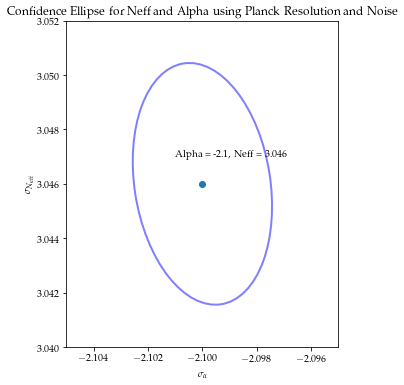

In [251]:
#actual ellipse with noise for planck
pa2 = ((sigmaa2**2 + sigmab2**2)/2)+(np.sqrt((((sigmaa2**2 - sigmab2**2)**2)/4)+sigmaab2**2)) #a**2
pb2 = (((sigmaa2**2 + sigmab2**2)/2)-(np.sqrt((((sigmaa2**2 - sigmab2**2)**2)/4)+sigmaab2**2))) #b**2
rot2 =  (math.atan((2*sigmaab2)/(sigmaa2**2 - sigmab2**2)))/2
rot_deg2 = rot2*(180/math.pi)
#print(rot_deg2)
print((np.sqrt((((sigmaa2**2 - sigmab2**2)**2)/4)+sigmaab2**2)))
print(((sigmaa2**2 + sigmab2**2)/2))


print(pa2)
print(pb2)
length2 = math.sqrt(pa2)
width2 = math.sqrt(np.absolute(pb2))
print(length2,width2)

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})

ellipse2 = Ellipse((-2.1, 3.046), width2, length2, angle=rot_deg2, alpha=.5, edgecolor='b', fc='None', lw=2)
ax.add_artist(ellipse2)

ax.set_xlim(-2.105, -2.095)
ax.set_ylim(3.04, 3.052)
plt.scatter(-2.1,3.046)
plt.ylabel(r'$\sigma_{N_{\rm eff}}$')
plt.xlabel(r'$\sigma_{\alpha}$')
plt.text(-2.101,3.047, "Alpha = -2.1, Neff = 3.046")
plt.title("Confidence Ellipse for Neff and Alpha using Planck Resolution and Noise")
plt.show()

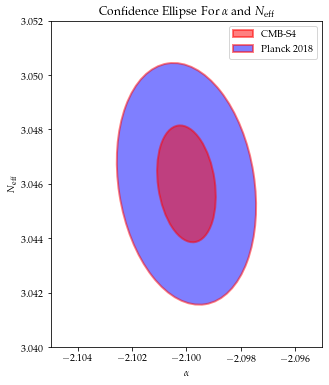

In [304]:

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})

ellipse2 = Ellipse((-2.1, 3.046), width2, length2, angle=rot_deg2, alpha=.5, edgecolor='r', fc='b', lw=2, label = "Planck 2018")
ax.add_artist(ellipse2)

ellipse1 = Ellipse((-2.1, 3.046), width1, length1, angle=rot_deg1, alpha=.5, edgecolor='r', fc='r', lw=2, label = "CMB-S4")
ax.add_artist(ellipse1)

ax.set_xlim(-2.105, -2.095)
ax.set_ylim(3.04, 3.052)

ax.legend(handles=[ellipse1, ellipse2])
plt.ylabel(r'$N_{\rm eff}$')
plt.xlabel(r'$\alpha$')
plt.title("Confidence Ellipse For " + r'$\alpha$' + " and " + r'$N_{\rm eff}$')
plt.savefig('ellipse_comp.pdf')
plt.show()